In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/MyDrive/'


In [3]:
import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
# from tensorflow.keras import layers, Model, Input
# from tensorflow.keras.applications import MobileNetV2
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from datetime import datetime
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input, Model
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.efficientnet import EfficientNetB2, EfficientNetB3
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet201
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50

from tensorflow.keras.layers import Add, AveragePooling2D, BatchNormalization, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D, Layer, MaxPool2D, ReLU, Resizing
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import L2
from tqdm import tqdm


In [4]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [5]:
# paths
proj_path = '/content/drive/MyDrive/DSA5204_FAP_Project'
dataset_path = proj_path + '/Datasets/SCUT-FBP'
image_path = dataset_path + '/Cleaned_Images/'
rate_path = dataset_path + '/Rating_Collection'
model_path =  proj_path + '/Codes/MT-Resnet/'
feature_path = dataset_path + '/features'

In [ ]:
# /content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/features

In [6]:
dir_path = '/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/'
files_exists = os.listdir(dir_path)
files_exists = [dir_path+v for v in files_exists]
# files_exists

In [ ]:
def load_data_and_features(img_dir, label_dir, feature_dir):
  all_ratings = pd.read_csv(label_dir, sep=' ', header=None)
  all_ratings.columns = ['img_path', 'rating']

  img_arr = np.zeros([len(all_ratings), 64, 64, 3])
  eye_arr = np.zeros([len(all_ratings), 64, 64, 3])
  nose_arr = np.zeros([len(all_ratings), 64, 64, 3])
  mouth_arr = np.zeros([len(all_ratings), 64, 64, 3])
  y_arr = np.zeros([len(all_ratings), 3])
  dir_path = '/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/'
  files_exists = os.listdir(dir_path)
  files_exists = [dir_path+v for v in files_exists]
  for i in tqdm(range(len(all_ratings))):
      file_name = all_ratings.iloc[i, 0]
      # print('img_dir + file_name',img_dir + file_name)
      # if img_dir + file_name == '/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1049.jpg':
      #   print('1!!!!!!!!!!!!!!1')
      #   break
      if (img_dir + file_name) not in files_exists:
        print(img_dir + file_name)
        continue
      try: 
        # print(file_name)
        feature_index = int(file_name[2:-4])  # 提取文件名中的数字索引

        race = file_name[0]
        gender = file_name[1]

        
        
        eye = tf.io.read_file(feature_dir + f"/eye/left_eye{feature_index}.jpg")
        eye = tf.image.decode_jpeg(eye, channels=3)
        eye = tf.keras.layers.Resizing(64, 64)(eye)
        eye = preprocess_input(eye)
        eye_arr[i] = eye

        nose = tf.io.read_file(feature_dir + f"/nose/nose{feature_index}.jpg")
        nose = tf.image.decode_jpeg(nose, channels=3)
        nose = tf.keras.layers.Resizing(64, 64)(nose)
        nose = preprocess_input(nose)
        nose_arr[i] = nose

        mouth = tf.io.read_file(feature_dir + f"/mouth/mouth{feature_index}.jpg")
        mouth = tf.image.decode_jpeg(mouth, channels=3)
        mouth = tf.keras.layers.Resizing(64, 64)(mouth)
        mouth = preprocess_input(mouth)
        mouth_arr[i] =mouth

        if race == 'A':
          y_arr[i, 1] = 0
        else:
            y_arr[i, 1] = 1

        if gender == 'M':
            y_arr[i, 2] = 0
        else:
            y_arr[i, 2] = 1

        y_arr[i, 0] = all_ratings.iloc[i, 1]
        print('all_ratings.iloc[i, 1]',all_ratings.iloc[i, 1])
        img = tf.io.read_file(img_dir + file_name)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.keras.layers.Resizing(64, 64)(img)
        # img = preprocess_input(img)
        img_arr[i] = img
      except:
        pass
  return img_arr,y_arr,eye_arr,mouth_arr,nose_arr
        
img_arr,y_arr,eye_arr,mouth_arr,nose_arr = load_data_and_features(image_path, rate_path + '/All_labels.txt',feature_path)

  0%|          | 3/5500 [00:00<04:14, 21.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF437.jpg
all_ratings.iloc[i, 1] 2.466667
all_ratings.iloc[i, 1] 2.15
all_ratings.iloc[i, 1] 3.75
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF215.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1899.jpg


  0%|          | 19/5500 [00:00<01:30, 60.36it/s]

all_ratings.iloc[i, 1] 2.483333
all_ratings.iloc[i, 1] 2.266667
all_ratings.iloc[i, 1] 3.033333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF228.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1179.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF64.jpg
all_ratings.iloc[i, 1] 2.25
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF734.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF280.jpg
all_ratings.iloc[i, 1] 3.133333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF54.jpg
all_ratings.iloc[i, 1] 3.833333
all_ratings.iloc[i, 1] 2.883333
all_ratings.iloc[i, 1] 2.466667
all_ratings.iloc[i, 1] 3.166667


  1%|          | 37/5500 [00:00<01:12, 75.30it/s]

all_ratings.iloc[i, 1] 2.716667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1934.jpg
all_ratings.iloc[i, 1] 2.166667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1142.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1883.jpg
all_ratings.iloc[i, 1] 2.433333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1649.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF23.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF505.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF318.jpg
all_ratings.iloc[i, 1] 2.683333
all_ratings.iloc[i, 1] 2.583333
all_ratings.iloc[i, 1] 2.516667
all_ratings.iloc[i, 1] 2.1
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1544.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1217.jpg
al

  1%|          | 53/5500 [00:00<01:24, 64.42it/s]

all_ratings.iloc[i, 1] 2.9
all_ratings.iloc[i, 1] 2.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF173.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF538.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF600.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF254.jpg
all_ratings.iloc[i, 1] 2.983333
all_ratings.iloc[i, 1] 2.533333
all_ratings.iloc[i, 1] 2.166667
all_ratings.iloc[i, 1] 2.85
all_ratings.iloc[i, 1] 1.733333
all_ratings.iloc[i, 1] 3.533333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF339.jpg
all_ratings.iloc[i, 1] 2.033333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1889.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1960.jpg


  1%|          | 63/5500 [00:00<01:16, 70.76it/s]

all_ratings.iloc[i, 1] 3.316667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF357.jpg
all_ratings.iloc[i, 1] 3.383333
all_ratings.iloc[i, 1] 4.033333
all_ratings.iloc[i, 1] 2.166667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF176.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF200.jpg
all_ratings.iloc[i, 1] 2.416667
all_ratings.iloc[i, 1] 2.583333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF736.jpg
all_ratings.iloc[i, 1] 2.7
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1013.jpg
all_ratings.iloc[i, 1] 2.35
all_ratings.iloc[i, 1] 2.433333


  1%|▏         | 79/5500 [00:01<01:21, 66.82it/s]

all_ratings.iloc[i, 1] 2.516667
all_ratings.iloc[i, 1] 4.016667
all_ratings.iloc[i, 1] 2.783333
all_ratings.iloc[i, 1] 4.1
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF113.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF49.jpg
all_ratings.iloc[i, 1] 2.483333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF446.jpg
all_ratings.iloc[i, 1] 2.45
all_ratings.iloc[i, 1] 3.983333
all_ratings.iloc[i, 1] 3.25
all_ratings.iloc[i, 1] 3.166667


  2%|▏         | 86/5500 [00:01<01:34, 57.33it/s]

all_ratings.iloc[i, 1] 2.416667
all_ratings.iloc[i, 1] 3.05
all_ratings.iloc[i, 1] 2.583333
all_ratings.iloc[i, 1] 3.0
all_ratings.iloc[i, 1] 2.733333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1163.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF472.jpg
all_ratings.iloc[i, 1] 2.566667
all_ratings.iloc[i, 1] 2.716667
all_ratings.iloc[i, 1] 2.533333
all_ratings.iloc[i, 1] 2.316667


  2%|▏         | 102/5500 [00:01<01:25, 63.25it/s]

all_ratings.iloc[i, 1] 2.05
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1895.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1106.jpg
all_ratings.iloc[i, 1] 3.05
all_ratings.iloc[i, 1] 3.533333
all_ratings.iloc[i, 1] 3.716667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF469.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF197.jpg
all_ratings.iloc[i, 1] 3.95
all_ratings.iloc[i, 1] 2.616667
all_ratings.iloc[i, 1] 2.366667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF641.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF40.jpg
all_ratings.iloc[i, 1] 2.866667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF24.jpg
all_ratings.iloc[i, 1] 2.666667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF24.jpg


  2%|▏         | 117/5500 [00:01<01:22, 64.86it/s]

all_ratings.iloc[i, 1] 2.316667
all_ratings.iloc[i, 1] 2.1
all_ratings.iloc[i, 1] 3.266667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF430.jpg
all_ratings.iloc[i, 1] 2.75
all_ratings.iloc[i, 1] 3.133333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF581.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1881.jpg
all_ratings.iloc[i, 1] 2.316667
all_ratings.iloc[i, 1] 2.666667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1798.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF614.jpg
all_ratings.iloc[i, 1] 2.6


  2%|▏         | 124/5500 [00:02<04:50, 18.50it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF734.jpg
all_ratings.iloc[i, 1] 2.916667
all_ratings.iloc[i, 1] 2.5


  2%|▏         | 129/5500 [00:04<11:35,  7.72it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF124.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1438.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF285.jpg
all_ratings.iloc[i, 1] 3.65
all_ratings.iloc[i, 1] 4.233333


  2%|▏         | 133/5500 [00:06<17:56,  4.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1170.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF462.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1975.jpg
all_ratings.iloc[i, 1] 4.083333
all_ratings.iloc[i, 1] 2.283333


  2%|▏         | 136/5500 [00:08<24:04,  3.71it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF194.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1087.jpg
all_ratings.iloc[i, 1] 2.733333


  3%|▎         | 139/5500 [00:09<25:48,  3.46it/s]

all_ratings.iloc[i, 1] 1.983333


  3%|▎         | 141/5500 [00:10<27:21,  3.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF422.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF516.jpg
all_ratings.iloc[i, 1] 2.666667


  3%|▎         | 144/5500 [00:12<35:28,  2.52it/s]

all_ratings.iloc[i, 1] 2.9
all_ratings.iloc[i, 1] 3.516667


  3%|▎         | 145/5500 [00:13<41:52,  2.13it/s]

all_ratings.iloc[i, 1] 3.033333


  3%|▎         | 146/5500 [00:14<49:42,  1.80it/s]

all_ratings.iloc[i, 1] 2.45


  3%|▎         | 147/5500 [00:15<55:17,  1.61it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF220.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1861.jpg
all_ratings.iloc[i, 1] 3.516667


  3%|▎         | 150/5500 [00:15<42:50,  2.08it/s]

all_ratings.iloc[i, 1] 2.4


  3%|▎         | 151/5500 [00:16<50:26,  1.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1047.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1962.jpg
all_ratings.iloc[i, 1] 2.266667


  3%|▎         | 154/5500 [00:17<39:30,  2.26it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF584.jpg
all_ratings.iloc[i, 1] 2.216667


  3%|▎         | 156/5500 [00:18<40:09,  2.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF7.jpg
all_ratings.iloc[i, 1] 2.666667


  3%|▎         | 158/5500 [00:19<39:56,  2.23it/s]

all_ratings.iloc[i, 1] 3.6


  3%|▎         | 159/5500 [00:20<47:37,  1.87it/s]

all_ratings.iloc[i, 1] 2.0


  3%|▎         | 160/5500 [00:21<52:54,  1.68it/s]

all_ratings.iloc[i, 1] 2.733333


  3%|▎         | 161/5500 [00:22<57:56,  1.54it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF551.jpg
all_ratings.iloc[i, 1] 2.75


  3%|▎         | 163/5500 [00:23<50:32,  1.76it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1799.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1205.jpg
all_ratings.iloc[i, 1] 3.683333


  3%|▎         | 166/5500 [00:23<38:38,  2.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF420.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF544.jpg
all_ratings.iloc[i, 1] 3.4


  3%|▎         | 169/5500 [00:24<34:58,  2.54it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF750.jpg
all_ratings.iloc[i, 1] 3.166667


  3%|▎         | 172/5500 [00:26<41:55,  2.12it/s]

all_ratings.iloc[i, 1] 2.016667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF71.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1730.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF467.jpg
all_ratings.iloc[i, 1] 2.666667


  3%|▎         | 176/5500 [00:27<32:30,  2.73it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF530.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1123.jpg
all_ratings.iloc[i, 1] 2.366667


  3%|▎         | 179/5500 [00:28<29:53,  2.97it/s]

all_ratings.iloc[i, 1] 3.416667


  3%|▎         | 180/5500 [00:29<39:15,  2.26it/s]

all_ratings.iloc[i, 1] 3.633333


  3%|▎         | 181/5500 [00:30<45:08,  1.96it/s]

all_ratings.iloc[i, 1] 3.233333


  3%|▎         | 182/5500 [00:31<50:26,  1.76it/s]

all_ratings.iloc[i, 1] 2.35


  3%|▎         | 184/5500 [00:33<1:05:05,  1.36it/s]

all_ratings.iloc[i, 1] 2.65
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF385.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1251.jpg
all_ratings.iloc[i, 1] 2.266667


  3%|▎         | 187/5500 [00:34<45:49,  1.93it/s]  

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1725.jpg
all_ratings.iloc[i, 1] 2.133333


  3%|▎         | 189/5500 [00:34<43:42,  2.02it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF504.jpg
all_ratings.iloc[i, 1] 3.683333


  3%|▎         | 191/5500 [00:35<43:16,  2.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF61.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1122.jpg
all_ratings.iloc[i, 1] 2.283333


  4%|▎         | 194/5500 [00:36<36:46,  2.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1441.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1450.jpg
all_ratings.iloc[i, 1] 2.916667


  4%|▎         | 197/5500 [00:37<32:40,  2.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF731.jpg
all_ratings.iloc[i, 1] 4.2


  4%|▎         | 199/5500 [00:38<36:07,  2.45it/s]

all_ratings.iloc[i, 1] 3.45


  4%|▎         | 200/5500 [00:39<44:02,  2.01it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF305.jpg
all_ratings.iloc[i, 1] 3.9


  4%|▎         | 203/5500 [00:41<48:14,  1.83it/s]

all_ratings.iloc[i, 1] 2.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF742.jpg
all_ratings.iloc[i, 1] 2.583333


  4%|▎         | 205/5500 [00:42<45:10,  1.95it/s]

all_ratings.iloc[i, 1] 2.866667


  4%|▍         | 207/5500 [00:43<43:31,  2.03it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF736.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1626.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1341.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1683.jpg


  4%|▍         | 213/5500 [00:44<25:25,  3.47it/s]

all_ratings.iloc[i, 1] 2.6
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF315.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1863.jpg
all_ratings.iloc[i, 1] 2.866667


  4%|▍         | 216/5500 [00:44<24:41,  3.57it/s]

all_ratings.iloc[i, 1] 4.316667


  4%|▍         | 217/5500 [00:45<31:14,  2.82it/s]

all_ratings.iloc[i, 1] 3.466667


  4%|▍         | 218/5500 [00:46<38:05,  2.31it/s]

all_ratings.iloc[i, 1] 3.0


  4%|▍         | 219/5500 [00:47<43:46,  2.01it/s]

all_ratings.iloc[i, 1] 2.666667


  4%|▍         | 220/5500 [00:48<49:04,  1.79it/s]

all_ratings.iloc[i, 1] 3.0


  4%|▍         | 221/5500 [00:49<58:44,  1.50it/s]

all_ratings.iloc[i, 1] 2.466667


  4%|▍         | 222/5500 [00:50<1:02:43,  1.40it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF36.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF62.jpg
all_ratings.iloc[i, 1] 3.066667


  4%|▍         | 226/5500 [00:51<51:00,  1.72it/s]

all_ratings.iloc[i, 1] 2.9
all_ratings.iloc[i, 1] 2.5


  4%|▍         | 227/5500 [00:52<56:02,  1.57it/s]

all_ratings.iloc[i, 1] 4.4


  4%|▍         | 229/5500 [00:54<1:03:23,  1.39it/s]

all_ratings.iloc[i, 1] 4.433333


  4%|▍         | 230/5500 [00:55<1:06:13,  1.33it/s]

all_ratings.iloc[i, 1] 2.766667
all_ratings.iloc[i, 1] 3.2


  4%|▍         | 231/5500 [00:56<1:15:47,  1.16it/s]

all_ratings.iloc[i, 1] 3.666667


  4%|▍         | 232/5500 [00:57<1:17:49,  1.13it/s]

all_ratings.iloc[i, 1] 2.633333


  4%|▍         | 233/5500 [00:58<1:17:21,  1.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF718.jpg


  4%|▍         | 235/5500 [00:59<58:39,  1.50it/s]  

all_ratings.iloc[i, 1] 1.983333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF570.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1959.jpg
all_ratings.iloc[i, 1] 4.35


  4%|▍         | 238/5500 [00:59<41:41,  2.10it/s]

all_ratings.iloc[i, 1] 4.316667


  4%|▍         | 239/5500 [01:00<48:25,  1.81it/s]

all_ratings.iloc[i, 1] 2.65


  4%|▍         | 240/5500 [01:01<42:25,  2.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF541.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1482.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1283.jpg
all_ratings.iloc[i, 1] 3.9


  4%|▍         | 244/5500 [01:01<22:28,  3.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF629.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1611.jpg
all_ratings.iloc[i, 1] 2.966667


  4%|▍         | 247/5500 [01:02<23:12,  3.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF174.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF44.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1761.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1463.jpg
all_ratings.iloc[i, 1] 2.966667


  5%|▍         | 252/5500 [01:03<20:54,  4.18it/s]

all_ratings.iloc[i, 1] 2.45


  5%|▍         | 253/5500 [01:04<29:14,  2.99it/s]

all_ratings.iloc[i, 1] 3.95


  5%|▍         | 254/5500 [01:05<46:19,  1.89it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1029.jpg
all_ratings.iloc[i, 1] 3.433333


  5%|▍         | 256/5500 [01:06<42:20,  2.06it/s]

all_ratings.iloc[i, 1] 2.016667


  5%|▍         | 257/5500 [01:07<47:23,  1.84it/s]

all_ratings.iloc[i, 1] 3.666667


  5%|▍         | 258/5500 [01:08<53:03,  1.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF495.jpg
all_ratings.iloc[i, 1] 2.366667


  5%|▍         | 260/5500 [01:09<51:38,  1.69it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF646.jpg


  5%|▍         | 262/5500 [01:10<47:49,  1.83it/s]

all_ratings.iloc[i, 1] 1.983333
all_ratings.iloc[i, 1] 4.35


  5%|▍         | 263/5500 [01:11<51:25,  1.70it/s]

all_ratings.iloc[i, 1] 2.733333


  5%|▍         | 264/5500 [01:12<55:24,  1.57it/s]

all_ratings.iloc[i, 1] 2.066667


  5%|▍         | 265/5500 [01:12<58:24,  1.49it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1875.jpg


  5%|▍         | 267/5500 [01:13<49:28,  1.76it/s]

all_ratings.iloc[i, 1] 2.716667
all_ratings.iloc[i, 1] 2.166667


  5%|▍         | 268/5500 [01:14<55:41,  1.57it/s]

all_ratings.iloc[i, 1] 2.05


  5%|▍         | 269/5500 [01:15<1:03:10,  1.38it/s]

all_ratings.iloc[i, 1] 2.2


  5%|▍         | 270/5500 [01:16<1:06:59,  1.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1243.jpg
all_ratings.iloc[i, 1] 2.416667


  5%|▍         | 272/5500 [01:17<58:42,  1.48it/s]  

all_ratings.iloc[i, 1] 4.033333


  5%|▍         | 273/5500 [01:18<1:03:19,  1.38it/s]

all_ratings.iloc[i, 1] 2.616667


  5%|▍         | 274/5500 [01:19<1:06:30,  1.31it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF689.jpg
all_ratings.iloc[i, 1] 3.25


  5%|▌         | 276/5500 [01:20<54:15,  1.60it/s]  

all_ratings.iloc[i, 1] 2.55


  5%|▌         | 277/5500 [01:21<1:02:04,  1.40it/s]

all_ratings.iloc[i, 1] 3.95


  5%|▌         | 278/5500 [01:22<1:07:30,  1.29it/s]

all_ratings.iloc[i, 1] 4.0


  5%|▌         | 279/5500 [01:23<1:11:32,  1.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF462.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF419.jpg
all_ratings.iloc[i, 1] 3.033333


  5%|▌         | 282/5500 [01:23<45:53,  1.89it/s]  

all_ratings.iloc[i, 1] 2.783333


  5%|▌         | 283/5500 [01:24<52:18,  1.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1672.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF561.jpg
all_ratings.iloc[i, 1] 2.85


  5%|▌         | 286/5500 [01:25<40:41,  2.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF342.jpg
all_ratings.iloc[i, 1] 2.8


  5%|▌         | 288/5500 [01:26<40:02,  2.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1371.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF707.jpg
all_ratings.iloc[i, 1] 2.466667


  5%|▌         | 291/5500 [01:27<33:50,  2.57it/s]

all_ratings.iloc[i, 1] 2.616667


  5%|▌         | 292/5500 [01:28<41:28,  2.09it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF212.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1039.jpg
all_ratings.iloc[i, 1] 4.1


  5%|▌         | 295/5500 [01:29<35:28,  2.45it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF415.jpg
all_ratings.iloc[i, 1] 2.466667


  5%|▌         | 297/5500 [01:30<36:41,  2.36it/s]

all_ratings.iloc[i, 1] 4.216667


  5%|▌         | 298/5500 [01:31<43:16,  2.00it/s]

all_ratings.iloc[i, 1] 2.583333


  5%|▌         | 299/5500 [01:32<50:42,  1.71it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1853.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF135.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF134.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF632.jpg
all_ratings.iloc[i, 1] 2.533333


  6%|▌         | 304/5500 [01:33<31:34,  2.74it/s]

all_ratings.iloc[i, 1] 2.283333


  6%|▌         | 305/5500 [01:33<37:55,  2.28it/s]

all_ratings.iloc[i, 1] 4.016667


  6%|▌         | 306/5500 [01:34<44:48,  1.93it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1597.jpg
all_ratings.iloc[i, 1] 3.783333


  6%|▌         | 308/5500 [01:35<43:52,  1.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1722.jpg
all_ratings.iloc[i, 1] 2.55


  6%|▌         | 310/5500 [01:36<42:37,  2.03it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1115.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF120.jpg
all_ratings.iloc[i, 1] 2.916667


  6%|▌         | 313/5500 [01:37<35:53,  2.41it/s]

all_ratings.iloc[i, 1] 3.266667


  6%|▌         | 314/5500 [01:38<46:23,  1.86it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1246.jpg


  6%|▌         | 316/5500 [01:39<43:11,  2.00it/s]

all_ratings.iloc[i, 1] 2.116667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1109.jpg
all_ratings.iloc[i, 1] 2.866667


  6%|▌         | 318/5500 [01:40<43:32,  1.98it/s]

all_ratings.iloc[i, 1] 1.966667


  6%|▌         | 319/5500 [01:41<50:29,  1.71it/s]

all_ratings.iloc[i, 1] 2.533333


  6%|▌         | 320/5500 [01:42<1:00:39,  1.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF229.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF499.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1103.jpg
all_ratings.iloc[i, 1] 3.966667


  6%|▌         | 324/5500 [01:43<38:21,  2.25it/s]  

all_ratings.iloc[i, 1] 3.683333


  6%|▌         | 325/5500 [01:44<45:10,  1.91it/s]

all_ratings.iloc[i, 1] 2.95


  6%|▌         | 326/5500 [01:45<50:19,  1.71it/s]

all_ratings.iloc[i, 1] 2.85


  6%|▌         | 327/5500 [01:46<59:44,  1.44it/s]

all_ratings.iloc[i, 1] 2.7


  6%|▌         | 328/5500 [01:47<1:02:00,  1.39it/s]

all_ratings.iloc[i, 1] 2.45


  6%|▌         | 329/5500 [01:48<1:04:57,  1.33it/s]

all_ratings.iloc[i, 1] 2.25


  6%|▌         | 331/5500 [01:50<1:11:33,  1.20it/s]

all_ratings.iloc[i, 1] 3.75
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF389.jpg
all_ratings.iloc[i, 1] 1.75


  6%|▌         | 333/5500 [01:51<58:43,  1.47it/s]  

all_ratings.iloc[i, 1] 3.333333


  6%|▌         | 334/5500 [01:51<1:03:40,  1.35it/s]

all_ratings.iloc[i, 1] 3.05


  6%|▌         | 335/5500 [01:52<1:06:25,  1.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1395.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF16.jpg
all_ratings.iloc[i, 1] 2.683333


  6%|▌         | 338/5500 [01:53<45:11,  1.90it/s]  

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1769.jpg
all_ratings.iloc[i, 1] 3.616667


  6%|▌         | 340/5500 [01:54<41:57,  2.05it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF562.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF876.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF494.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF426.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF277.jpg
all_ratings.iloc[i, 1] 2.3


  6%|▋         | 346/5500 [01:55<24:39,  3.48it/s]

all_ratings.iloc[i, 1] 1.883333


  6%|▋         | 347/5500 [01:56<33:55,  2.53it/s]

all_ratings.iloc[i, 1] 2.5


  6%|▋         | 348/5500 [01:57<41:32,  2.07it/s]

all_ratings.iloc[i, 1] 2.583333


  6%|▋         | 349/5500 [01:58<50:13,  1.71it/s]

all_ratings.iloc[i, 1] 2.25


  6%|▋         | 351/5500 [02:00<57:28,  1.49it/s]

all_ratings.iloc[i, 1] 3.966667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1541.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF38.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF224.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF507.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF540.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF244.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF634.jpg


  7%|▋         | 359/5500 [02:01<22:40,  3.78it/s]

all_ratings.iloc[i, 1] 2.283333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF643.jpg
all_ratings.iloc[i, 1] 2.516667


  7%|▋         | 361/5500 [02:01<20:42,  4.14it/s]

all_ratings.iloc[i, 1] 2.283333


  7%|▋         | 362/5500 [02:02<28:43,  2.98it/s]

all_ratings.iloc[i, 1] 3.2


  7%|▋         | 363/5500 [02:03<35:33,  2.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1942.jpg
all_ratings.iloc[i, 1] 2.716667


  7%|▋         | 365/5500 [02:04<36:21,  2.35it/s]

all_ratings.iloc[i, 1] 2.683333


  7%|▋         | 366/5500 [02:05<46:01,  1.86it/s]

all_ratings.iloc[i, 1] 2.516667


  7%|▋         | 367/5500 [02:06<53:18,  1.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1185.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF571.jpg
all_ratings.iloc[i, 1] 1.933333


  7%|▋         | 370/5500 [02:06<39:21,  2.17it/s]

all_ratings.iloc[i, 1] 2.5


  7%|▋         | 371/5500 [02:07<46:00,  1.86it/s]

all_ratings.iloc[i, 1] 1.85


  7%|▋         | 372/5500 [02:08<54:39,  1.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF112.jpg
all_ratings.iloc[i, 1] 2.816667


  7%|▋         | 374/5500 [02:09<50:01,  1.71it/s]

all_ratings.iloc[i, 1] 3.983333


  7%|▋         | 375/5500 [02:10<53:31,  1.60it/s]

all_ratings.iloc[i, 1] 3.95


  7%|▋         | 376/5500 [02:11<1:00:12,  1.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF359.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF676.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1252.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF219.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF13.jpg
all_ratings.iloc[i, 1] 2.616667


  7%|▋         | 382/5500 [02:12<29:40,  2.87it/s]  

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1220.jpg
all_ratings.iloc[i, 1] 2.666667


  7%|▋         | 384/5500 [02:13<30:52,  2.76it/s]

all_ratings.iloc[i, 1] 2.516667


  7%|▋         | 385/5500 [02:14<38:25,  2.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF425.jpg
all_ratings.iloc[i, 1] 3.0


  7%|▋         | 387/5500 [02:15<39:55,  2.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF60.jpg
all_ratings.iloc[i, 1] 2.7


  7%|▋         | 389/5500 [02:16<38:17,  2.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1204.jpg
all_ratings.iloc[i, 1] 2.55


  7%|▋         | 391/5500 [02:16<30:14,  2.82it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1080.jpg


  7%|▋         | 393/5500 [02:17<35:35,  2.39it/s]

all_ratings.iloc[i, 1] 2.2
all_ratings.iloc[i, 1] 2.516667


  7%|▋         | 394/5500 [02:18<42:44,  1.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1999.jpg
all_ratings.iloc[i, 1] 3.166667


  7%|▋         | 396/5500 [02:19<44:44,  1.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF470.jpg
all_ratings.iloc[i, 1] 2.666667


  7%|▋         | 398/5500 [02:20<40:57,  2.08it/s]

all_ratings.iloc[i, 1] 3.966667


  7%|▋         | 399/5500 [02:20<36:53,  2.30it/s]

all_ratings.iloc[i, 1] 3.25


  7%|▋         | 400/5500 [02:21<44:33,  1.91it/s]

all_ratings.iloc[i, 1] 2.733333


  7%|▋         | 401/5500 [02:22<52:13,  1.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1433.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1943.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1938.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF709.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF866.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF447.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF6.jpg
all_ratings.iloc[i, 1] 3.366667


  7%|▋         | 409/5500 [02:23<21:44,  3.90it/s]

all_ratings.iloc[i, 1] 2.883333


  7%|▋         | 410/5500 [02:24<29:03,  2.92it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1941.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF371.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF446.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1488.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1774.jpg
all_ratings.iloc[i, 1] 4.1


  8%|▊         | 416/5500 [02:25<20:37,  4.11it/s]

all_ratings.iloc[i, 1] 3.666667


  8%|▊         | 417/5500 [02:26<26:18,  3.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF149.jpg
all_ratings.iloc[i, 1] 3.166667


  8%|▊         | 419/5500 [02:27<28:19,  2.99it/s]

all_ratings.iloc[i, 1] 2.1


  8%|▊         | 420/5500 [02:27<33:57,  2.49it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF676.jpg
all_ratings.iloc[i, 1] 2.616667


  8%|▊         | 422/5500 [02:28<35:03,  2.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF56.jpg
all_ratings.iloc[i, 1] 2.483333


  8%|▊         | 424/5500 [02:29<34:44,  2.44it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF583.jpg
all_ratings.iloc[i, 1] 3.083333


  8%|▊         | 426/5500 [02:30<36:26,  2.32it/s]

all_ratings.iloc[i, 1] 3.05


  8%|▊         | 428/5500 [02:32<47:45,  1.77it/s]

all_ratings.iloc[i, 1] 3.2


  8%|▊         | 429/5500 [02:33<55:40,  1.52it/s]

all_ratings.iloc[i, 1] 2.55
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1131.jpg
all_ratings.iloc[i, 1] 3.016667


  8%|▊         | 431/5500 [02:33<39:04,  2.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1675.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF409.jpg
all_ratings.iloc[i, 1] 2.883333


  8%|▊         | 434/5500 [02:34<32:09,  2.63it/s]

all_ratings.iloc[i, 1] 2.183333


  8%|▊         | 435/5500 [02:35<39:50,  2.12it/s]

all_ratings.iloc[i, 1] 3.95


  8%|▊         | 436/5500 [02:36<47:43,  1.77it/s]

all_ratings.iloc[i, 1] 3.666667


  8%|▊         | 437/5500 [02:37<57:37,  1.46it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF670.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF22.jpg
all_ratings.iloc[i, 1] 1.816667


  8%|▊         | 440/5500 [02:38<42:00,  2.01it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1677.jpg
all_ratings.iloc[i, 1] 2.666667


  8%|▊         | 442/5500 [02:39<41:25,  2.04it/s]

all_ratings.iloc[i, 1] 3.116667


  8%|▊         | 444/5500 [02:40<52:25,  1.61it/s]

all_ratings.iloc[i, 1] 2.7
all_ratings.iloc[i, 1] 3.683333


  8%|▊         | 445/5500 [02:41<58:16,  1.45it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF11.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF735.jpg
all_ratings.iloc[i, 1] 2.85


  8%|▊         | 448/5500 [02:42<41:32,  2.03it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF530.jpg


  8%|▊         | 450/5500 [02:43<40:53,  2.06it/s]

all_ratings.iloc[i, 1] 2.3
all_ratings.iloc[i, 1] 2.85


  8%|▊         | 451/5500 [02:44<47:22,  1.78it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF526.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF11.jpg
all_ratings.iloc[i, 1] 3.0


  8%|▊         | 454/5500 [02:45<39:16,  2.14it/s]

all_ratings.iloc[i, 1] 2.866667


  8%|▊         | 455/5500 [02:46<49:22,  1.70it/s]

all_ratings.iloc[i, 1] 2.733333


  8%|▊         | 456/5500 [02:47<57:16,  1.47it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF626.jpg
all_ratings.iloc[i, 1] 2.183333


  8%|▊         | 458/5500 [02:48<51:09,  1.64it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1978.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF291.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1384.jpg
all_ratings.iloc[i, 1] 2.483333


  8%|▊         | 462/5500 [02:49<35:06,  2.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF316.jpg
all_ratings.iloc[i, 1] 4.066667


  8%|▊         | 464/5500 [02:49<28:49,  2.91it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF522.jpg
all_ratings.iloc[i, 1] 2.3


  8%|▊         | 466/5500 [02:50<31:01,  2.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1946.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF542.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF570.jpg
all_ratings.iloc[i, 1] 3.316667


  9%|▊         | 470/5500 [02:51<25:43,  3.26it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1692.jpg
all_ratings.iloc[i, 1] 2.916667


  9%|▊         | 472/5500 [02:51<22:00,  3.81it/s]

all_ratings.iloc[i, 1] 2.166667


  9%|▊         | 473/5500 [02:52<31:57,  2.62it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF612.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF211.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1527.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF439.jpg
all_ratings.iloc[i, 1] 3.683333


  9%|▊         | 478/5500 [02:53<23:26,  3.57it/s]

all_ratings.iloc[i, 1] 2.783333


  9%|▊         | 479/5500 [02:54<31:43,  2.64it/s]

all_ratings.iloc[i, 1] 3.416667


  9%|▊         | 480/5500 [02:55<40:00,  2.09it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF719.jpg
all_ratings.iloc[i, 1] 1.316667


  9%|▉         | 482/5500 [02:56<37:33,  2.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF458.jpg
all_ratings.iloc[i, 1] 2.133333


  9%|▉         | 484/5500 [02:57<38:12,  2.19it/s]

all_ratings.iloc[i, 1] 2.5


  9%|▉         | 485/5500 [02:58<43:48,  1.91it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1517.jpg
all_ratings.iloc[i, 1] 2.266667


  9%|▉         | 487/5500 [02:59<42:11,  1.98it/s]

all_ratings.iloc[i, 1] 2.833333


  9%|▉         | 488/5500 [03:00<48:52,  1.71it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF3.jpg
all_ratings.iloc[i, 1] 2.583333


  9%|▉         | 490/5500 [03:01<44:50,  1.86it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF158.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1897.jpg
all_ratings.iloc[i, 1] 2.916667


  9%|▉         | 493/5500 [03:02<35:14,  2.37it/s]

all_ratings.iloc[i, 1] 2.3


  9%|▉         | 494/5500 [03:02<41:19,  2.02it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF434.jpg
all_ratings.iloc[i, 1] 3.716667


  9%|▉         | 496/5500 [03:03<40:01,  2.08it/s]

all_ratings.iloc[i, 1] 3.416667


  9%|▉         | 497/5500 [03:04<47:13,  1.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF108.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF257.jpg
all_ratings.iloc[i, 1] 2.166667


  9%|▉         | 500/5500 [03:05<37:23,  2.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF309.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1642.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1738.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF586.jpg
all_ratings.iloc[i, 1] 4.1


  9%|▉         | 505/5500 [03:06<24:44,  3.36it/s]

all_ratings.iloc[i, 1] 4.45


  9%|▉         | 506/5500 [03:07<30:13,  2.75it/s]

all_ratings.iloc[i, 1] 2.016667


  9%|▉         | 507/5500 [03:08<36:33,  2.28it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF202.jpg


  9%|▉         | 510/5500 [03:08<31:08,  2.67it/s]

all_ratings.iloc[i, 1] 3.733333
all_ratings.iloc[i, 1] 3.733333


  9%|▉         | 511/5500 [03:09<38:16,  2.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF197.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1223.jpg
all_ratings.iloc[i, 1] 2.766667


  9%|▉         | 514/5500 [03:10<33:43,  2.46it/s]

all_ratings.iloc[i, 1] 2.883333


  9%|▉         | 515/5500 [03:11<41:10,  2.02it/s]

all_ratings.iloc[i, 1] 2.583333


  9%|▉         | 516/5500 [03:12<48:43,  1.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1464.jpg
all_ratings.iloc[i, 1] 4.4


  9%|▉         | 518/5500 [03:13<35:30,  2.34it/s]

all_ratings.iloc[i, 1] 1.95


  9%|▉         | 519/5500 [03:13<41:20,  2.01it/s]

all_ratings.iloc[i, 1] 3.066667


  9%|▉         | 520/5500 [03:14<48:24,  1.71it/s]

all_ratings.iloc[i, 1] 2.433333


  9%|▉         | 521/5500 [03:15<54:59,  1.51it/s]

all_ratings.iloc[i, 1] 3.616667


  9%|▉         | 522/5500 [03:16<1:01:16,  1.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1000.jpg


 10%|▉         | 524/5500 [03:17<49:36,  1.67it/s]  

all_ratings.iloc[i, 1] 4.433333
all_ratings.iloc[i, 1] 4.283333


 10%|▉         | 525/5500 [03:18<55:52,  1.48it/s]

all_ratings.iloc[i, 1] 2.583333


 10%|▉         | 526/5500 [03:19<58:17,  1.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF480.jpg
all_ratings.iloc[i, 1] 3.2


 10%|▉         | 528/5500 [03:19<48:29,  1.71it/s]

all_ratings.iloc[i, 1] 3.0


 10%|▉         | 529/5500 [03:20<54:01,  1.53it/s]

all_ratings.iloc[i, 1] 2.833333


 10%|▉         | 530/5500 [03:21<57:17,  1.45it/s]

all_ratings.iloc[i, 1] 3.666667


 10%|▉         | 531/5500 [03:22<1:01:07,  1.36it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF365.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1627.jpg
all_ratings.iloc[i, 1] 3.633333


 10%|▉         | 534/5500 [03:23<41:08,  2.01it/s]  

all_ratings.iloc[i, 1] 2.416667


 10%|▉         | 535/5500 [03:24<48:35,  1.70it/s]

all_ratings.iloc[i, 1] 2.466667


 10%|▉         | 536/5500 [03:25<52:13,  1.58it/s]

all_ratings.iloc[i, 1] 3.116667


 10%|▉         | 537/5500 [03:26<1:02:15,  1.33it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF672.jpg
all_ratings.iloc[i, 1] 3.883333


 10%|▉         | 540/5500 [03:28<57:18,  1.44it/s]

all_ratings.iloc[i, 1] 2.933333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1317.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF703.jpg
all_ratings.iloc[i, 1] 2.583333


 10%|▉         | 543/5500 [03:28<40:12,  2.06it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF241.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1297.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF695.jpg
all_ratings.iloc[i, 1] 2.983333


 10%|▉         | 547/5500 [03:29<29:34,  2.79it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1099.jpg
all_ratings.iloc[i, 1] 3.083333


 10%|▉         | 549/5500 [03:30<31:19,  2.63it/s]

all_ratings.iloc[i, 1] 3.083333


 10%|█         | 550/5500 [03:31<37:21,  2.21it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF549.jpg


 10%|█         | 552/5500 [03:32<36:40,  2.25it/s]

all_ratings.iloc[i, 1] 2.9
all_ratings.iloc[i, 1] 1.983333


 10%|█         | 553/5500 [03:33<42:27,  1.94it/s]

all_ratings.iloc[i, 1] 2.233333


 10%|█         | 554/5500 [03:33<48:01,  1.72it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1751.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1607.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF697.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF221.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF409.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1213.jpg
all_ratings.iloc[i, 1] 3.9


 10%|█         | 561/5500 [03:34<23:13,  3.54it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF567.jpg
all_ratings.iloc[i, 1] 2.383333


 10%|█         | 563/5500 [03:35<26:45,  3.08it/s]

all_ratings.iloc[i, 1] 2.816667


 10%|█         | 564/5500 [03:36<32:13,  2.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF327.jpg
all_ratings.iloc[i, 1] 2.15


 10%|█         | 566/5500 [03:37<34:08,  2.41it/s]

all_ratings.iloc[i, 1] 4.183333


 10%|█         | 568/5500 [03:39<44:00,  1.87it/s]

all_ratings.iloc[i, 1] 2.783333


 10%|█         | 569/5500 [03:40<48:19,  1.70it/s]

all_ratings.iloc[i, 1] 4.266667
all_ratings.iloc[i, 1] 3.05


 10%|█         | 570/5500 [03:40<53:44,  1.53it/s]

all_ratings.iloc[i, 1] 3.133333


 10%|█         | 571/5500 [03:41<1:00:40,  1.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1648.jpg
all_ratings.iloc[i, 1] 2.366667


 10%|█         | 573/5500 [03:42<52:23,  1.57it/s]  

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF215.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF208.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1346.jpg
all_ratings.iloc[i, 1] 2.466667


 10%|█         | 577/5500 [03:43<34:10,  2.40it/s]

all_ratings.iloc[i, 1] 3.7


 11%|█         | 578/5500 [03:44<39:06,  2.10it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF405.jpg
all_ratings.iloc[i, 1] 2.0


 11%|█         | 580/5500 [03:45<38:56,  2.11it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF240.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1343.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF501.jpg
all_ratings.iloc[i, 1] 4.0


 11%|█         | 584/5500 [03:46<28:56,  2.83it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF430.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF195.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF204.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1650.jpg
all_ratings.iloc[i, 1] 2.85


 11%|█         | 589/5500 [03:46<17:15,  4.74it/s]

all_ratings.iloc[i, 1] 2.65


 11%|█         | 590/5500 [03:47<23:27,  3.49it/s]

all_ratings.iloc[i, 1] 3.983333


 11%|█         | 591/5500 [03:48<29:13,  2.80it/s]

all_ratings.iloc[i, 1] 2.65


 11%|█         | 592/5500 [03:49<40:51,  2.00it/s]

all_ratings.iloc[i, 1] 3.133333


 11%|█         | 593/5500 [03:50<48:26,  1.69it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF106.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF489.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF310.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1570.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF262.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1149.jpg
all_ratings.iloc[i, 1] 2.766667


 11%|█         | 600/5500 [03:50<18:15,  4.47it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF728.jpg
all_ratings.iloc[i, 1] 2.516667


 11%|█         | 602/5500 [03:50<16:27,  4.96it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1785.jpg
all_ratings.iloc[i, 1] 2.666667


 11%|█         | 604/5500 [03:51<20:27,  3.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1034.jpg
all_ratings.iloc[i, 1] 2.516667


 11%|█         | 606/5500 [03:52<24:08,  3.38it/s]

all_ratings.iloc[i, 1] 3.05


 11%|█         | 607/5500 [03:53<30:50,  2.64it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1011.jpg
all_ratings.iloc[i, 1] 3.016667


 11%|█         | 609/5500 [03:54<32:04,  2.54it/s]

all_ratings.iloc[i, 1] 2.583333


 11%|█         | 610/5500 [03:55<39:33,  2.06it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF532.jpg
all_ratings.iloc[i, 1] 2.783333


 11%|█         | 612/5500 [03:55<29:53,  2.73it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF251.jpg
all_ratings.iloc[i, 1] 2.95


 11%|█         | 614/5500 [03:56<31:46,  2.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1981.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF180.jpg
all_ratings.iloc[i, 1] 2.383333


 11%|█         | 617/5500 [03:57<27:52,  2.92it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF28.jpg


 11%|█▏        | 619/5500 [03:57<28:45,  2.83it/s]

all_ratings.iloc[i, 1] 2.5
all_ratings.iloc[i, 1] 2.716667


 11%|█▏        | 620/5500 [03:58<36:14,  2.24it/s]

all_ratings.iloc[i, 1] 2.833333


 11%|█▏        | 621/5500 [03:59<42:27,  1.91it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF403.jpg
all_ratings.iloc[i, 1] 2.483333


 11%|█▏        | 623/5500 [04:00<40:26,  2.01it/s]

all_ratings.iloc[i, 1] 3.083333


 11%|█▏        | 624/5500 [04:01<46:45,  1.74it/s]

all_ratings.iloc[i, 1] 2.666667


 11%|█▏        | 625/5500 [04:01<41:20,  1.97it/s]

all_ratings.iloc[i, 1] 2.65


 11%|█▏        | 626/5500 [04:02<49:13,  1.65it/s]

all_ratings.iloc[i, 1] 4.1


 11%|█▏        | 627/5500 [04:03<54:36,  1.49it/s]

all_ratings.iloc[i, 1] 2.016667


 11%|█▏        | 628/5500 [04:04<59:15,  1.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1936.jpg
all_ratings.iloc[i, 1] 2.716667


 11%|█▏        | 630/5500 [04:05<52:47,  1.54it/s]

all_ratings.iloc[i, 1] 2.566667


 11%|█▏        | 631/5500 [04:06<1:00:00,  1.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF522.jpg
all_ratings.iloc[i, 1] 2.566667


 12%|█▏        | 633/5500 [04:07<50:15,  1.61it/s]  

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF12.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF136.jpg
all_ratings.iloc[i, 1] 2.35


 12%|█▏        | 637/5500 [04:09<42:57,  1.89it/s]

all_ratings.iloc[i, 1] 3.666667
all_ratings.iloc[i, 1] 2.433333


 12%|█▏        | 638/5500 [04:10<48:53,  1.66it/s]

all_ratings.iloc[i, 1] 2.666667


 12%|█▏        | 639/5500 [04:10<55:12,  1.47it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1215.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF461.jpg
all_ratings.iloc[i, 1] 2.6


 12%|█▏        | 642/5500 [04:11<40:18,  2.01it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1921.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF321.jpg


 12%|█▏        | 645/5500 [04:12<33:31,  2.41it/s]

all_ratings.iloc[i, 1] 3.183333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1421.jpg
all_ratings.iloc[i, 1] 3.65


 12%|█▏        | 648/5500 [04:14<39:24,  2.05it/s]

all_ratings.iloc[i, 1] 2.366667
all_ratings.iloc[i, 1] 2.9


 12%|█▏        | 649/5500 [04:15<46:01,  1.76it/s]

all_ratings.iloc[i, 1] 2.566667


 12%|█▏        | 650/5500 [04:16<50:53,  1.59it/s]

all_ratings.iloc[i, 1] 2.433333


 12%|█▏        | 651/5500 [04:17<55:33,  1.45it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF489.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF152.jpg
all_ratings.iloc[i, 1] 2.466667


 12%|█▏        | 654/5500 [04:17<31:31,  2.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF730.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1114.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF643.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF748.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1117.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1538.jpg


 12%|█▏        | 661/5500 [04:18<17:56,  4.50it/s]

all_ratings.iloc[i, 1] 2.633333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF575.jpg


 12%|█▏        | 663/5500 [04:19<22:26,  3.59it/s]

all_ratings.iloc[i, 1] 3.516667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF457.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1928.jpg


 12%|█▏        | 666/5500 [04:20<22:46,  3.54it/s]

all_ratings.iloc[i, 1] 2.266667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF696.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF78.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF584.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF330.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1272.jpg
all_ratings.iloc[i, 1] 1.833333


 12%|█▏        | 672/5500 [04:21<17:47,  4.52it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1289.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF477.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1184.jpg


 12%|█▏        | 676/5500 [04:21<18:05,  4.44it/s]

all_ratings.iloc[i, 1] 3.916667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF859.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF249.jpg


 12%|█▏        | 679/5500 [04:22<19:38,  4.09it/s]

all_ratings.iloc[i, 1] 2.783333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF712.jpg
all_ratings.iloc[i, 1] 2.583333


 12%|█▏        | 681/5500 [04:23<22:01,  3.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1757.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF334.jpg
all_ratings.iloc[i, 1] 2.666667


 12%|█▏        | 684/5500 [04:24<23:36,  3.40it/s]

all_ratings.iloc[i, 1] 3.666667


 12%|█▏        | 685/5500 [04:25<29:17,  2.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1849.jpg


 12%|█▏        | 687/5500 [04:26<30:34,  2.62it/s]

all_ratings.iloc[i, 1] 2.833333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1367.jpg


 13%|█▎        | 689/5500 [04:27<31:59,  2.51it/s]

all_ratings.iloc[i, 1] 3.583333
all_ratings.iloc[i, 1] 2.733333


 13%|█▎        | 690/5500 [04:28<39:17,  2.04it/s]

all_ratings.iloc[i, 1] 2.783333


 13%|█▎        | 691/5500 [04:29<45:49,  1.75it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF683.jpg
all_ratings.iloc[i, 1] 4.516667


 13%|█▎        | 693/5500 [04:30<41:17,  1.94it/s]

all_ratings.iloc[i, 1] 2.85


 13%|█▎        | 694/5500 [04:30<46:20,  1.73it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF636.jpg
all_ratings.iloc[i, 1] 2.916667


 13%|█▎        | 697/5500 [04:32<47:04,  1.70it/s]

all_ratings.iloc[i, 1] 2.283333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF340.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF389.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF95.jpg
all_ratings.iloc[i, 1] 2.816667


 13%|█▎        | 701/5500 [04:33<30:08,  2.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF319.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF261.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF21.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF339.jpg
all_ratings.iloc[i, 1] 2.533333


 13%|█▎        | 706/5500 [04:34<21:40,  3.69it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1445.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF261.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1577.jpg
all_ratings.iloc[i, 1] 1.35


 13%|█▎        | 710/5500 [04:34<19:46,  4.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF347.jpg


 13%|█▎        | 712/5500 [04:35<22:22,  3.57it/s]

all_ratings.iloc[i, 1] 2.55
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1426.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1416.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF492.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF514.jpg
all_ratings.iloc[i, 1] 2.066667


 13%|█▎        | 718/5500 [04:37<23:53,  3.33it/s]

all_ratings.iloc[i, 1] 4.283333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1659.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1500.jpg
all_ratings.iloc[i, 1] 3.85


 13%|█▎        | 721/5500 [04:38<23:23,  3.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1127.jpg
all_ratings.iloc[i, 1] 2.733333


 13%|█▎        | 725/5500 [04:39<22:33,  3.53it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF326.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF328.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1002.jpg
all_ratings.iloc[i, 1] 3.516667


 13%|█▎        | 729/5500 [04:40<20:50,  3.82it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF131.jpg
all_ratings.iloc[i, 1] 4.566667


 13%|█▎        | 731/5500 [04:41<25:09,  3.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF654.jpg


 13%|█▎        | 733/5500 [04:42<27:40,  2.87it/s]

all_ratings.iloc[i, 1] 4.016667


 13%|█▎        | 734/5500 [04:43<33:57,  2.34it/s]

all_ratings.iloc[i, 1] 1.85
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF279.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1085.jpg


 13%|█▎        | 737/5500 [04:44<30:10,  2.63it/s]

all_ratings.iloc[i, 1] 2.85


 13%|█▎        | 738/5500 [04:44<35:28,  2.24it/s]

all_ratings.iloc[i, 1] 2.333333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF178.jpg
all_ratings.iloc[i, 1] 3.95


 13%|█▎        | 740/5500 [04:45<34:43,  2.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF198.jpg
all_ratings.iloc[i, 1] 2.55


 13%|█▎        | 742/5500 [04:46<37:48,  2.10it/s]

all_ratings.iloc[i, 1] 2.866667


 14%|█▎        | 744/5500 [04:48<47:06,  1.68it/s]

all_ratings.iloc[i, 1] 2.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF591.jpg
all_ratings.iloc[i, 1] 3.133333


 14%|█▎        | 746/5500 [04:49<41:59,  1.89it/s]

all_ratings.iloc[i, 1] 3.05


 14%|█▎        | 747/5500 [04:50<47:02,  1.68it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1771.jpg
all_ratings.iloc[i, 1] 3.7


 14%|█▎        | 749/5500 [04:51<43:11,  1.83it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1948.jpg


 14%|█▎        | 751/5500 [04:52<42:01,  1.88it/s]

all_ratings.iloc[i, 1] 1.866667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF747.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF393.jpg
all_ratings.iloc[i, 1] 3.783333


 14%|█▎        | 754/5500 [04:53<34:51,  2.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF173.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF565.jpg
all_ratings.iloc[i, 1] 2.983333


 14%|█▍        | 757/5500 [04:53<23:59,  3.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF419.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF624.jpg
all_ratings.iloc[i, 1] 2.066667


 14%|█▍        | 760/5500 [04:54<22:43,  3.48it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF401.jpg
all_ratings.iloc[i, 1] 2.7


 14%|█▍        | 762/5500 [04:54<25:26,  3.10it/s]

all_ratings.iloc[i, 1] 4.433333


 14%|█▍        | 763/5500 [04:55<33:14,  2.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1803.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF382.jpg


 14%|█▍        | 766/5500 [04:56<28:06,  2.81it/s]

all_ratings.iloc[i, 1] 2.683333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1089.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF424.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1292.jpg
all_ratings.iloc[i, 1] 3.983333


 14%|█▍        | 770/5500 [04:57<22:21,  3.53it/s]

all_ratings.iloc[i, 1] 1.75


 14%|█▍        | 771/5500 [04:58<28:45,  2.74it/s]

all_ratings.iloc[i, 1] 4.166667


 14%|█▍        | 772/5500 [04:59<34:50,  2.26it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF195.jpg
all_ratings.iloc[i, 1] 4.3


 14%|█▍        | 774/5500 [05:00<35:13,  2.24it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF25.jpg
all_ratings.iloc[i, 1] 3.8


 14%|█▍        | 776/5500 [05:01<35:22,  2.23it/s]

all_ratings.iloc[i, 1] 2.766667


 14%|█▍        | 777/5500 [05:01<40:53,  1.93it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF42.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF149.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1391.jpg


 14%|█▍        | 781/5500 [05:02<30:04,  2.62it/s]

all_ratings.iloc[i, 1] 2.433333
all_ratings.iloc[i, 1] 2.333333


 14%|█▍        | 782/5500 [05:03<35:22,  2.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF396.jpg
all_ratings.iloc[i, 1] 3.833333


 14%|█▍        | 784/5500 [05:04<37:27,  2.10it/s]

all_ratings.iloc[i, 1] 3.766667


 14%|█▍        | 785/5500 [05:05<42:14,  1.86it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF382.jpg
all_ratings.iloc[i, 1] 2.6


 14%|█▍        | 787/5500 [05:05<32:30,  2.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF502.jpg


 14%|█▍        | 789/5500 [05:06<33:11,  2.37it/s]

all_ratings.iloc[i, 1] 2.916667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF720.jpg
all_ratings.iloc[i, 1] 4.233333


 14%|█▍        | 791/5500 [05:07<33:05,  2.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF57.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1542.jpg
all_ratings.iloc[i, 1] 2.8


 14%|█▍        | 794/5500 [05:08<30:26,  2.58it/s]

all_ratings.iloc[i, 1] 2.366667


 14%|█▍        | 795/5500 [05:09<35:12,  2.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF304.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1634.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1965.jpg
all_ratings.iloc[i, 1] 2.316667


 15%|█▍        | 799/5500 [05:10<25:47,  3.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF188.jpg
all_ratings.iloc[i, 1] 2.883333


 15%|█▍        | 801/5500 [05:11<28:29,  2.75it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF668.jpg
all_ratings.iloc[i, 1] 2.466667


 15%|█▍        | 803/5500 [05:12<32:31,  2.41it/s]

all_ratings.iloc[i, 1] 3.233333


 15%|█▍        | 804/5500 [05:12<31:03,  2.52it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF647.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF404.jpg
all_ratings.iloc[i, 1] 2.9


 15%|█▍        | 807/5500 [05:13<27:00,  2.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF270.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF503.jpg


 15%|█▍        | 810/5500 [05:14<24:42,  3.16it/s]

all_ratings.iloc[i, 1] 2.35
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1737.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF284.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF456.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1630.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF31.jpg
all_ratings.iloc[i, 1] 3.766667


 15%|█▍        | 817/5500 [05:15<20:11,  3.87it/s]

all_ratings.iloc[i, 1] 2.466667
all_ratings.iloc[i, 1] 1.583333


 15%|█▍        | 819/5500 [05:17<32:21,  2.41it/s]

all_ratings.iloc[i, 1] 2.916667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF45.jpg


 15%|█▍        | 821/5500 [05:17<33:09,  2.35it/s]

all_ratings.iloc[i, 1] 2.416667
all_ratings.iloc[i, 1] 2.816667


 15%|█▍        | 822/5500 [05:18<39:22,  1.98it/s]

all_ratings.iloc[i, 1] 3.266667


 15%|█▍        | 824/5500 [05:20<46:53,  1.66it/s]

all_ratings.iloc[i, 1] 2.25
all_ratings.iloc[i, 1] 2.766667


 15%|█▌        | 825/5500 [05:21<50:31,  1.54it/s]

all_ratings.iloc[i, 1] 2.45


 15%|█▌        | 826/5500 [05:22<55:19,  1.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF46.jpg
all_ratings.iloc[i, 1] 2.483333


 15%|█▌        | 828/5500 [05:22<44:50,  1.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF685.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1963.jpg
all_ratings.iloc[i, 1] 2.233333


 15%|█▌        | 831/5500 [05:23<35:04,  2.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF601.jpg
all_ratings.iloc[i, 1] 2.966667


 15%|█▌        | 833/5500 [05:24<34:52,  2.23it/s]

all_ratings.iloc[i, 1] 2.416667


 15%|█▌        | 834/5500 [05:25<39:32,  1.97it/s]

all_ratings.iloc[i, 1] 3.15


 15%|█▌        | 835/5500 [05:26<47:01,  1.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1622.jpg
all_ratings.iloc[i, 1] 2.666667


 15%|█▌        | 837/5500 [05:27<43:43,  1.78it/s]

all_ratings.iloc[i, 1] 3.583333


 15%|█▌        | 838/5500 [05:28<49:38,  1.57it/s]

all_ratings.iloc[i, 1] 2.4


 15%|█▌        | 839/5500 [05:29<57:08,  1.36it/s]

all_ratings.iloc[i, 1] 2.7


 15%|█▌        | 840/5500 [05:30<1:00:34,  1.28it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1576.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF493.jpg
all_ratings.iloc[i, 1] 2.3


 15%|█▌        | 843/5500 [05:31<42:56,  1.81it/s]  

all_ratings.iloc[i, 1] 3.016667


 15%|█▌        | 844/5500 [05:32<47:43,  1.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF258.jpg
all_ratings.iloc[i, 1] 2.216667


 15%|█▌        | 846/5500 [05:32<42:10,  1.84it/s]

all_ratings.iloc[i, 1] 2.3


 15%|█▌        | 847/5500 [05:33<48:20,  1.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF535.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF606.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF42.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF508.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF668.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF634.jpg
all_ratings.iloc[i, 1] 2.816667


 16%|█▌        | 854/5500 [05:34<23:39,  3.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1676.jpg
all_ratings.iloc[i, 1] 2.916667


 16%|█▌        | 856/5500 [05:35<25:53,  2.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF406.jpg


 16%|█▌        | 858/5500 [05:36<26:55,  2.87it/s]

all_ratings.iloc[i, 1] 4.0
all_ratings.iloc[i, 1] 2.366667


 16%|█▌        | 859/5500 [05:37<32:24,  2.39it/s]

all_ratings.iloc[i, 1] 2.633333


 16%|█▌        | 860/5500 [05:37<30:30,  2.54it/s]

all_ratings.iloc[i, 1] 4.083333


 16%|█▌        | 861/5500 [05:38<39:00,  1.98it/s]

all_ratings.iloc[i, 1] 2.016667


 16%|█▌        | 863/5500 [05:40<48:58,  1.58it/s]

all_ratings.iloc[i, 1] 2.5


 16%|█▌        | 864/5500 [05:41<51:29,  1.50it/s]

all_ratings.iloc[i, 1] 4.083333
all_ratings.iloc[i, 1] 2.783333


 16%|█▌        | 865/5500 [05:42<55:41,  1.39it/s]

all_ratings.iloc[i, 1] 2.5


 16%|█▌        | 866/5500 [05:42<57:43,  1.34it/s]

all_ratings.iloc[i, 1] 4.0


 16%|█▌        | 867/5500 [05:43<59:09,  1.31it/s]

all_ratings.iloc[i, 1] 2.783333


 16%|█▌        | 868/5500 [05:44<1:01:36,  1.25it/s]

all_ratings.iloc[i, 1] 2.95


 16%|█▌        | 869/5500 [05:45<1:03:22,  1.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF711.jpg


 16%|█▌        | 871/5500 [05:46<48:40,  1.58it/s]  

all_ratings.iloc[i, 1] 2.1
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1787.jpg
all_ratings.iloc[i, 1] 4.15


 16%|█▌        | 873/5500 [05:47<43:56,  1.76it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1406.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF609.jpg
all_ratings.iloc[i, 1] 2.8


 16%|█▌        | 876/5500 [05:47<32:31,  2.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1420.jpg


 16%|█▌        | 878/5500 [05:48<31:54,  2.41it/s]

all_ratings.iloc[i, 1] 3.65
all_ratings.iloc[i, 1] 3.616667


 16%|█▌        | 879/5500 [05:49<38:48,  1.98it/s]

all_ratings.iloc[i, 1] 2.516667


 16%|█▌        | 880/5500 [05:50<46:16,  1.66it/s]

all_ratings.iloc[i, 1] 3.6


 16%|█▌        | 881/5500 [05:51<50:31,  1.52it/s]

all_ratings.iloc[i, 1] 2.15


 16%|█▌        | 882/5500 [05:52<53:15,  1.45it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF495.jpg
all_ratings.iloc[i, 1] 4.066667


 16%|█▌        | 884/5500 [05:53<45:00,  1.71it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF107.jpg
all_ratings.iloc[i, 1] 4.166667


 16%|█▌        | 886/5500 [05:53<31:50,  2.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF67.jpg
all_ratings.iloc[i, 1] 2.816667


 16%|█▌        | 888/5500 [05:53<24:29,  3.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1020.jpg
all_ratings.iloc[i, 1] 1.966667


 16%|█▌        | 890/5500 [05:54<26:38,  2.88it/s]

all_ratings.iloc[i, 1] 2.65


 16%|█▌        | 891/5500 [05:55<36:14,  2.12it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1301.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1176.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1571.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF47.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF200.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF70.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1040.jpg
all_ratings.iloc[i, 1] 3.05


 16%|█▋        | 899/5500 [05:56<17:00,  4.51it/s]

all_ratings.iloc[i, 1] 2.5


 16%|█▋        | 900/5500 [05:57<24:30,  3.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF650.jpg
all_ratings.iloc[i, 1] 4.283333


 16%|█▋        | 902/5500 [05:58<30:31,  2.51it/s]

all_ratings.iloc[i, 1] 3.466667


 16%|█▋        | 903/5500 [05:59<35:29,  2.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1764.jpg
all_ratings.iloc[i, 1] 2.133333


 16%|█▋        | 905/5500 [06:00<36:34,  2.09it/s]

all_ratings.iloc[i, 1] 4.033333


 16%|█▋        | 906/5500 [06:01<41:59,  1.82it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF168.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1136.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF113.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF648.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF29.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF491.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1072.jpg
all_ratings.iloc[i, 1] 2.45


 17%|█▋        | 915/5500 [06:03<24:42,  3.09it/s]

all_ratings.iloc[i, 1] 2.9
all_ratings.iloc[i, 1] 4.133333


 17%|█▋        | 916/5500 [06:03<29:22,  2.60it/s]

all_ratings.iloc[i, 1] 2.7


 17%|█▋        | 917/5500 [06:04<35:23,  2.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF521.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF415.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF161.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1924.jpg
all_ratings.iloc[i, 1] 3.016667


 17%|█▋        | 922/5500 [06:06<26:53,  2.84it/s]

all_ratings.iloc[i, 1] 3.85


 17%|█▋        | 923/5500 [06:07<32:19,  2.36it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1638.jpg
all_ratings.iloc[i, 1] 3.833333


 17%|█▋        | 925/5500 [06:07<31:58,  2.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1995.jpg
all_ratings.iloc[i, 1] 4.083333


 17%|█▋        | 927/5500 [06:08<32:48,  2.32it/s]

all_ratings.iloc[i, 1] 2.333333


 17%|█▋        | 928/5500 [06:09<37:39,  2.02it/s]

all_ratings.iloc[i, 1] 2.366667


 17%|█▋        | 929/5500 [06:10<42:48,  1.78it/s]

all_ratings.iloc[i, 1] 2.733333


 17%|█▋        | 930/5500 [06:10<39:03,  1.95it/s]

all_ratings.iloc[i, 1] 3.616667


 17%|█▋        | 931/5500 [06:11<43:35,  1.75it/s]

all_ratings.iloc[i, 1] 2.216667


 17%|█▋        | 932/5500 [06:12<52:18,  1.46it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF508.jpg
all_ratings.iloc[i, 1] 2.383333


 17%|█▋        | 934/5500 [06:13<47:25,  1.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF649.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1545.jpg
all_ratings.iloc[i, 1] 2.85


 17%|█▋        | 937/5500 [06:14<36:52,  2.06it/s]

all_ratings.iloc[i, 1] 2.416667


 17%|█▋        | 938/5500 [06:14<33:27,  2.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1259.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF459.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF165.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF220.jpg
all_ratings.iloc[i, 1] 2.916667


 17%|█▋        | 943/5500 [06:15<22:48,  3.33it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1183.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1063.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF704.jpg
all_ratings.iloc[i, 1] 2.4


 17%|█▋        | 948/5500 [06:16<21:52,  3.47it/s]

all_ratings.iloc[i, 1] 2.55
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF368.jpg
all_ratings.iloc[i, 1] 2.683333


 17%|█▋        | 950/5500 [06:17<19:08,  3.96it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF268.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF371.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF196.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF514.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF525.jpg
all_ratings.iloc[i, 1] 4.083333


 17%|█▋        | 956/5500 [06:18<15:09,  5.00it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1230.jpg
all_ratings.iloc[i, 1] 2.616667


 17%|█▋        | 959/5500 [06:19<19:19,  3.92it/s]

all_ratings.iloc[i, 1] 3.333333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF575.jpg
all_ratings.iloc[i, 1] 2.316667


 17%|█▋        | 961/5500 [06:20<22:45,  3.32it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF54.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF313.jpg
all_ratings.iloc[i, 1] 2.983333


 18%|█▊        | 964/5500 [06:20<16:56,  4.46it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF688.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1126.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1228.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1447.jpg
all_ratings.iloc[i, 1] 2.416667


 18%|█▊        | 969/5500 [06:21<14:45,  5.12it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF751.jpg
all_ratings.iloc[i, 1] 2.933333


 18%|█▊        | 971/5500 [06:22<17:51,  4.23it/s]

all_ratings.iloc[i, 1] 2.766667


 18%|█▊        | 972/5500 [06:22<24:01,  3.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF404.jpg
all_ratings.iloc[i, 1] 3.05


 18%|█▊        | 974/5500 [06:23<26:58,  2.80it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF603.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF628.jpg


 18%|█▊        | 977/5500 [06:24<24:31,  3.07it/s]

all_ratings.iloc[i, 1] 4.066667
all_ratings.iloc[i, 1] 2.75


 18%|█▊        | 978/5500 [06:25<30:27,  2.47it/s]

all_ratings.iloc[i, 1] 2.75


 18%|█▊        | 979/5500 [06:26<35:26,  2.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF163.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1508.jpg
all_ratings.iloc[i, 1] 2.866667


 18%|█▊        | 983/5500 [06:27<29:11,  2.58it/s]

all_ratings.iloc[i, 1] 2.583333
all_ratings.iloc[i, 1] 2.116667


 18%|█▊        | 984/5500 [06:28<37:19,  2.02it/s]

all_ratings.iloc[i, 1] 2.133333


 18%|█▊        | 985/5500 [06:29<45:13,  1.66it/s]

all_ratings.iloc[i, 1] 3.116667


 18%|█▊        | 986/5500 [06:30<50:35,  1.49it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF743.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF124.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1249.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1461.jpg
all_ratings.iloc[i, 1] 2.7


 18%|█▊        | 991/5500 [06:31<28:57,  2.59it/s]

all_ratings.iloc[i, 1] 3.883333


 18%|█▊        | 992/5500 [06:31<27:35,  2.72it/s]

all_ratings.iloc[i, 1] 2.383333


 18%|█▊        | 993/5500 [06:32<33:47,  2.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1385.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1006.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1423.jpg
all_ratings.iloc[i, 1] 2.666667


 18%|█▊        | 997/5500 [06:33<25:32,  2.94it/s]

all_ratings.iloc[i, 1] 2.5


 18%|█▊        | 998/5500 [06:34<31:48,  2.36it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1956.jpg
all_ratings.iloc[i, 1] 3.0


 18%|█▊        | 1000/5500 [06:35<33:07,  2.26it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1093.jpg
all_ratings.iloc[i, 1] 2.566667


 18%|█▊        | 1002/5500 [06:35<32:30,  2.31it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF103.jpg
all_ratings.iloc[i, 1] 2.75


 18%|█▊        | 1004/5500 [06:36<32:12,  2.33it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1309.jpg
all_ratings.iloc[i, 1] 2.55


 18%|█▊        | 1006/5500 [06:37<32:25,  2.31it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF611.jpg
all_ratings.iloc[i, 1] 3.366667


 18%|█▊        | 1008/5500 [06:38<31:20,  2.39it/s]

all_ratings.iloc[i, 1] 4.133333


 18%|█▊        | 1009/5500 [06:39<36:36,  2.04it/s]

all_ratings.iloc[i, 1] 2.45


 18%|█▊        | 1010/5500 [06:40<41:27,  1.81it/s]

all_ratings.iloc[i, 1] 4.2


 18%|█▊        | 1012/5500 [06:41<48:46,  1.53it/s]

all_ratings.iloc[i, 1] 4.25
all_ratings.iloc[i, 1] 1.816667


 18%|█▊        | 1013/5500 [06:42<56:45,  1.32it/s]

all_ratings.iloc[i, 1] 3.25


 18%|█▊        | 1014/5500 [06:43<58:06,  1.29it/s]

all_ratings.iloc[i, 1] 2.333333


 18%|█▊        | 1015/5500 [06:44<59:13,  1.26it/s]

all_ratings.iloc[i, 1] 2.316667


 18%|█▊        | 1016/5500 [06:44<47:13,  1.58it/s]

all_ratings.iloc[i, 1] 2.383333


 18%|█▊        | 1017/5500 [06:45<51:14,  1.46it/s]

all_ratings.iloc[i, 1] 2.9


 19%|█▊        | 1019/5500 [06:47<57:31,  1.30it/s]

all_ratings.iloc[i, 1] 2.966667
all_ratings.iloc[i, 1] 2.566667


 19%|█▊        | 1020/5500 [06:47<45:50,  1.63it/s]

all_ratings.iloc[i, 1] 2.9


 19%|█▊        | 1021/5500 [06:48<50:54,  1.47it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF588.jpg
all_ratings.iloc[i, 1] 2.833333


 19%|█▊        | 1023/5500 [06:49<43:35,  1.71it/s]

all_ratings.iloc[i, 1] 2.616667


 19%|█▊        | 1024/5500 [06:50<49:23,  1.51it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF275.jpg
all_ratings.iloc[i, 1] 2.783333


 19%|█▊        | 1026/5500 [06:51<44:17,  1.68it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1033.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF485.jpg
all_ratings.iloc[i, 1] 2.6


 19%|█▊        | 1029/5500 [06:51<32:34,  2.29it/s]

all_ratings.iloc[i, 1] 1.85


 19%|█▊        | 1030/5500 [06:52<37:53,  1.97it/s]

all_ratings.iloc[i, 1] 4.283333


 19%|█▊        | 1031/5500 [06:53<44:25,  1.68it/s]

all_ratings.iloc[i, 1] 3.916667


 19%|█▉        | 1032/5500 [06:54<48:08,  1.55it/s]

all_ratings.iloc[i, 1] 2.566667


 19%|█▉        | 1033/5500 [06:55<51:43,  1.44it/s]

all_ratings.iloc[i, 1] 3.733333


 19%|█▉        | 1034/5500 [06:56<55:03,  1.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF722.jpg


 19%|█▉        | 1036/5500 [06:56<43:57,  1.69it/s]

all_ratings.iloc[i, 1] 2.966667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF186.jpg
all_ratings.iloc[i, 1] 3.35


 19%|█▉        | 1038/5500 [06:58<42:01,  1.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF456.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1796.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1286.jpg
all_ratings.iloc[i, 1] 2.25


 19%|█▉        | 1042/5500 [06:58<22:22,  3.32it/s]

all_ratings.iloc[i, 1] 2.8


 19%|█▉        | 1043/5500 [06:59<28:56,  2.57it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF163.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1586.jpg


 19%|█▉        | 1046/5500 [06:59<25:24,  2.92it/s]

all_ratings.iloc[i, 1] 2.95
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF352.jpg
all_ratings.iloc[i, 1] 4.333333


 19%|█▉        | 1048/5500 [07:00<21:14,  3.49it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF453.jpg
all_ratings.iloc[i, 1] 3.833333


 19%|█▉        | 1050/5500 [07:01<23:20,  3.18it/s]

all_ratings.iloc[i, 1] 2.833333


 19%|█▉        | 1051/5500 [07:01<29:15,  2.53it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1216.jpg
all_ratings.iloc[i, 1] 2.916667


 19%|█▉        | 1053/5500 [07:02<29:58,  2.47it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF334.jpg
all_ratings.iloc[i, 1] 1.866667


 19%|█▉        | 1055/5500 [07:03<36:16,  2.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF640.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF585.jpg
all_ratings.iloc[i, 1] 2.85


 19%|█▉        | 1058/5500 [07:04<29:39,  2.50it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF258.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF7.jpg
all_ratings.iloc[i, 1] 3.35


 19%|█▉        | 1061/5500 [07:05<27:44,  2.67it/s]

all_ratings.iloc[i, 1] 3.783333


 19%|█▉        | 1062/5500 [07:06<32:58,  2.24it/s]

all_ratings.iloc[i, 1] 2.85


 19%|█▉        | 1063/5500 [07:07<38:48,  1.91it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF637.jpg
all_ratings.iloc[i, 1] 3.516667


 19%|█▉        | 1066/5500 [07:09<40:15,  1.84it/s]

all_ratings.iloc[i, 1] 3.7
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF717.jpg
all_ratings.iloc[i, 1] 2.683333


 19%|█▉        | 1068/5500 [07:09<36:59,  2.00it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF483.jpg
all_ratings.iloc[i, 1] 2.616667


 19%|█▉        | 1070/5500 [07:10<27:06,  2.72it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1400.jpg
all_ratings.iloc[i, 1] 2.016667


 19%|█▉        | 1072/5500 [07:11<29:23,  2.51it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1719.jpg
all_ratings.iloc[i, 1] 2.733333


 20%|█▉        | 1074/5500 [07:12<31:06,  2.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF726.jpg
all_ratings.iloc[i, 1] 2.666667


 20%|█▉        | 1076/5500 [07:12<30:58,  2.38it/s]

all_ratings.iloc[i, 1] 4.066667


 20%|█▉        | 1077/5500 [07:13<36:36,  2.01it/s]

all_ratings.iloc[i, 1] 2.916667


 20%|█▉        | 1078/5500 [07:14<42:35,  1.73it/s]

all_ratings.iloc[i, 1] 2.466667


 20%|█▉        | 1080/5500 [07:16<51:37,  1.43it/s]

all_ratings.iloc[i, 1] 2.466667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF681.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1990.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF453.jpg


 20%|█▉        | 1084/5500 [07:17<31:12,  2.36it/s]

all_ratings.iloc[i, 1] 2.533333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1794.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF238.jpg
all_ratings.iloc[i, 1] 2.6


 20%|█▉        | 1087/5500 [07:18<27:41,  2.66it/s]

all_ratings.iloc[i, 1] 3.05


 20%|█▉        | 1088/5500 [07:19<33:19,  2.21it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1390.jpg
all_ratings.iloc[i, 1] 3.833333


 20%|█▉        | 1090/5500 [07:19<33:18,  2.21it/s]

all_ratings.iloc[i, 1] 2.616667


 20%|█▉        | 1091/5500 [07:20<37:43,  1.95it/s]

all_ratings.iloc[i, 1] 2.716667


 20%|█▉        | 1092/5500 [07:21<47:18,  1.55it/s]

all_ratings.iloc[i, 1] 3.216667


 20%|█▉        | 1093/5500 [07:22<41:12,  1.78it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF269.jpg
all_ratings.iloc[i, 1] 4.083333


 20%|█▉        | 1096/5500 [07:23<41:20,  1.78it/s]

all_ratings.iloc[i, 1] 2.216667
all_ratings.iloc[i, 1] 3.266667


 20%|█▉        | 1097/5500 [07:24<50:54,  1.44it/s]

all_ratings.iloc[i, 1] 1.783333


 20%|█▉        | 1098/5500 [07:26<58:26,  1.26it/s]

all_ratings.iloc[i, 1] 2.75


 20%|██        | 1101/5500 [07:27<50:54,  1.44it/s]

all_ratings.iloc[i, 1] 4.316667
all_ratings.iloc[i, 1] 2.633333


 20%|██        | 1102/5500 [07:28<42:40,  1.72it/s]

all_ratings.iloc[i, 1] 3.716667


 20%|██        | 1103/5500 [07:28<48:51,  1.50it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF276.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF597.jpg
all_ratings.iloc[i, 1] 2.816667


 20%|██        | 1106/5500 [07:29<34:01,  2.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1386.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF595.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1930.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1628.jpg
all_ratings.iloc[i, 1] 2.95


 20%|██        | 1111/5500 [07:30<23:28,  3.12it/s]

all_ratings.iloc[i, 1] 2.633333


 20%|██        | 1112/5500 [07:31<28:42,  2.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF107.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF497.jpg
all_ratings.iloc[i, 1] 2.616667


 20%|██        | 1115/5500 [07:32<26:20,  2.77it/s]

all_ratings.iloc[i, 1] 2.65


 20%|██        | 1116/5500 [07:33<31:20,  2.33it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF218.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1637.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF625.jpg
all_ratings.iloc[i, 1] 3.7


 20%|██        | 1120/5500 [07:34<25:29,  2.86it/s]

all_ratings.iloc[i, 1] 2.75


 20%|██        | 1121/5500 [07:35<31:10,  2.34it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF375.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF717.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF110.jpg


 20%|██        | 1125/5500 [07:36<24:32,  2.97it/s]

all_ratings.iloc[i, 1] 4.133333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1134.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF707.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF181.jpg
all_ratings.iloc[i, 1] 2.5


 21%|██        | 1129/5500 [07:37<21:14,  3.43it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1394.jpg
all_ratings.iloc[i, 1] 2.433333


 21%|██        | 1131/5500 [07:38<23:42,  3.07it/s]

all_ratings.iloc[i, 1] 3.133333


 21%|██        | 1133/5500 [07:39<33:54,  2.15it/s]

all_ratings.iloc[i, 1] 2.433333
all_ratings.iloc[i, 1] 2.716667


 21%|██        | 1134/5500 [07:40<40:19,  1.80it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF37.jpg
all_ratings.iloc[i, 1] 2.7


 21%|██        | 1137/5500 [07:41<31:59,  2.27it/s]

all_ratings.iloc[i, 1] 2.2


 21%|██        | 1138/5500 [07:42<40:03,  1.81it/s]

all_ratings.iloc[i, 1] 3.716667


 21%|██        | 1139/5500 [07:43<43:27,  1.67it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF22.jpg
all_ratings.iloc[i, 1] 2.533333


 21%|██        | 1141/5500 [07:44<41:09,  1.77it/s]

all_ratings.iloc[i, 1] 2.766667


 21%|██        | 1142/5500 [07:44<36:48,  1.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1477.jpg
all_ratings.iloc[i, 1] 2.7


 21%|██        | 1144/5500 [07:45<35:54,  2.02it/s]

all_ratings.iloc[i, 1] 3.3


 21%|██        | 1145/5500 [07:46<41:03,  1.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF523.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF52.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF48.jpg
all_ratings.iloc[i, 1] 2.6


 21%|██        | 1149/5500 [07:47<27:42,  2.62it/s]

all_ratings.iloc[i, 1] 2.6


 21%|██        | 1151/5500 [07:48<32:16,  2.25it/s]

all_ratings.iloc[i, 1] 2.966667
all_ratings.iloc[i, 1] 2.333333


 21%|██        | 1152/5500 [07:49<39:16,  1.84it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF217.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF673.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1617.jpg
all_ratings.iloc[i, 1] 2.35


 21%|██        | 1156/5500 [07:50<26:21,  2.75it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF350.jpg


 21%|██        | 1158/5500 [07:51<28:08,  2.57it/s]

all_ratings.iloc[i, 1] 4.066667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF38.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF235.jpg
all_ratings.iloc[i, 1] 2.633333


 21%|██        | 1161/5500 [07:51<19:34,  3.69it/s]

all_ratings.iloc[i, 1] 2.65


 21%|██        | 1162/5500 [07:52<25:25,  2.84it/s]

all_ratings.iloc[i, 1] 1.666667


 21%|██        | 1163/5500 [07:52<23:51,  3.03it/s]

all_ratings.iloc[i, 1] 2.583333


 21%|██        | 1164/5500 [07:52<23:00,  3.14it/s]

all_ratings.iloc[i, 1] 3.216667


 21%|██        | 1165/5500 [07:53<31:01,  2.33it/s]

all_ratings.iloc[i, 1] 2.466667


 21%|██        | 1166/5500 [07:54<38:55,  1.86it/s]

all_ratings.iloc[i, 1] 4.116667


 21%|██        | 1167/5500 [07:54<36:25,  1.98it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF718.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1372.jpg
all_ratings.iloc[i, 1] 2.35


 21%|██▏       | 1170/5500 [07:55<28:38,  2.52it/s]

all_ratings.iloc[i, 1] 2.7


 21%|██▏       | 1171/5500 [07:56<38:06,  1.89it/s]

all_ratings.iloc[i, 1] 3.033333


 21%|██▏       | 1172/5500 [07:57<44:01,  1.64it/s]

all_ratings.iloc[i, 1] 3.383333


 21%|██▏       | 1174/5500 [07:59<52:05,  1.38it/s]

all_ratings.iloc[i, 1] 3.516667
all_ratings.iloc[i, 1] 4.1


 21%|██▏       | 1175/5500 [08:00<53:36,  1.34it/s]

all_ratings.iloc[i, 1] 4.083333


 21%|██▏       | 1176/5500 [08:01<57:56,  1.24it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF463.jpg
all_ratings.iloc[i, 1] 2.633333


 21%|██▏       | 1178/5500 [08:01<45:05,  1.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF348.jpg
all_ratings.iloc[i, 1] 4.033333


 21%|██▏       | 1180/5500 [08:02<38:54,  1.85it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF66.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF338.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF737.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF300.jpg
all_ratings.iloc[i, 1] 4.433333


 22%|██▏       | 1185/5500 [08:03<24:02,  2.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF563.jpg
all_ratings.iloc[i, 1] 4.366667


 22%|██▏       | 1188/5500 [08:05<31:38,  2.27it/s]

all_ratings.iloc[i, 1] 2.033333
all_ratings.iloc[i, 1] 2.8


 22%|██▏       | 1189/5500 [08:06<38:47,  1.85it/s]

all_ratings.iloc[i, 1] 1.666667


 22%|██▏       | 1190/5500 [08:07<44:11,  1.63it/s]

all_ratings.iloc[i, 1] 2.183333


 22%|██▏       | 1191/5500 [08:08<47:09,  1.52it/s]

all_ratings.iloc[i, 1] 4.1


 22%|██▏       | 1192/5500 [08:09<50:25,  1.42it/s]

all_ratings.iloc[i, 1] 2.75


 22%|██▏       | 1193/5500 [08:10<56:30,  1.27it/s]

all_ratings.iloc[i, 1] 2.333333


 22%|██▏       | 1194/5500 [08:11<1:01:18,  1.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1752.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF641.jpg
all_ratings.iloc[i, 1] 2.85


 22%|██▏       | 1197/5500 [08:11<38:09,  1.88it/s]  

all_ratings.iloc[i, 1] 3.0


 22%|██▏       | 1198/5500 [08:12<42:32,  1.69it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF491.jpg
all_ratings.iloc[i, 1] 4.4


 22%|██▏       | 1200/5500 [08:13<38:07,  1.88it/s]

all_ratings.iloc[i, 1] 3.133333


 22%|██▏       | 1201/5500 [08:14<42:35,  1.68it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF28.jpg
all_ratings.iloc[i, 1] 2.433333


 22%|██▏       | 1203/5500 [08:14<29:40,  2.41it/s]

all_ratings.iloc[i, 1] 2.733333


 22%|██▏       | 1204/5500 [08:15<36:14,  1.98it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF682.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF346.jpg
all_ratings.iloc[i, 1] 2.633333


 22%|██▏       | 1207/5500 [08:15<22:21,  3.20it/s]

all_ratings.iloc[i, 1] 2.966667


 22%|██▏       | 1208/5500 [08:16<28:18,  2.53it/s]

all_ratings.iloc[i, 1] 2.083333


 22%|██▏       | 1209/5500 [08:17<34:31,  2.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF593.jpg
all_ratings.iloc[i, 1] 2.733333


 22%|██▏       | 1211/5500 [08:18<33:19,  2.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF69.jpg
all_ratings.iloc[i, 1] 4.016667


 22%|██▏       | 1213/5500 [08:19<32:00,  2.23it/s]

all_ratings.iloc[i, 1] 3.266667


 22%|██▏       | 1214/5500 [08:19<37:40,  1.90it/s]

all_ratings.iloc[i, 1] 2.2


 22%|██▏       | 1215/5500 [08:20<43:37,  1.64it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1071.jpg
all_ratings.iloc[i, 1] 2.133333


 22%|██▏       | 1217/5500 [08:21<40:16,  1.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF155.jpg


 22%|██▏       | 1219/5500 [08:22<38:32,  1.85it/s]

all_ratings.iloc[i, 1] 2.483333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1125.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF645.jpg


 22%|██▏       | 1222/5500 [08:23<30:52,  2.31it/s]

all_ratings.iloc[i, 1] 2.033333


 22%|██▏       | 1223/5500 [08:24<34:54,  2.04it/s]

all_ratings.iloc[i, 1] 2.3
all_ratings.iloc[i, 1] 4.233333


 22%|██▏       | 1224/5500 [08:25<40:59,  1.74it/s]

all_ratings.iloc[i, 1] 2.8


 22%|██▏       | 1225/5500 [08:25<35:45,  1.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF136.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1778.jpg
all_ratings.iloc[i, 1] 2.783333


 22%|██▏       | 1228/5500 [08:26<28:38,  2.49it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF370.jpg
all_ratings.iloc[i, 1] 2.766667


 22%|██▏       | 1230/5500 [08:27<29:26,  2.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1530.jpg
all_ratings.iloc[i, 1] 3.833333


 22%|██▏       | 1232/5500 [08:28<30:18,  2.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF189.jpg
all_ratings.iloc[i, 1] 3.533333


 22%|██▏       | 1234/5500 [08:29<29:54,  2.38it/s]

all_ratings.iloc[i, 1] 2.35


 22%|██▏       | 1235/5500 [08:29<35:59,  1.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF222.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF686.jpg
all_ratings.iloc[i, 1] 2.716667


 23%|██▎       | 1238/5500 [08:30<29:42,  2.39it/s]

all_ratings.iloc[i, 1] 2.183333


 23%|██▎       | 1239/5500 [08:31<27:49,  2.55it/s]

all_ratings.iloc[i, 1] 1.25


 23%|██▎       | 1240/5500 [08:31<33:46,  2.10it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1491.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF452.jpg


 23%|██▎       | 1243/5500 [08:32<26:36,  2.67it/s]

all_ratings.iloc[i, 1] 2.466667
all_ratings.iloc[i, 1] 1.883333


 23%|██▎       | 1244/5500 [08:33<34:02,  2.08it/s]

all_ratings.iloc[i, 1] 2.616667


 23%|██▎       | 1246/5500 [08:36<57:51,  1.23it/s]

all_ratings.iloc[i, 1] 2.7
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF667.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1118.jpg
all_ratings.iloc[i, 1] 2.816667


 23%|██▎       | 1249/5500 [08:37<40:05,  1.77it/s]

all_ratings.iloc[i, 1] 2.633333


 23%|██▎       | 1250/5500 [08:37<43:25,  1.63it/s]

all_ratings.iloc[i, 1] 4.216667


 23%|██▎       | 1251/5500 [08:38<45:59,  1.54it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF298.jpg
all_ratings.iloc[i, 1] 2.133333


 23%|██▎       | 1253/5500 [08:39<40:38,  1.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF580.jpg
all_ratings.iloc[i, 1] 3.05


 23%|██▎       | 1255/5500 [08:40<35:56,  1.97it/s]

all_ratings.iloc[i, 1] 2.7


 23%|██▎       | 1256/5500 [08:40<32:13,  2.20it/s]

all_ratings.iloc[i, 1] 3.633333


 23%|██▎       | 1257/5500 [08:41<38:45,  1.82it/s]

all_ratings.iloc[i, 1] 1.966667


 23%|██▎       | 1259/5500 [08:42<29:16,  2.41it/s]

all_ratings.iloc[i, 1] 2.383333
all_ratings.iloc[i, 1] 4.116667


 23%|██▎       | 1260/5500 [08:42<27:19,  2.59it/s]

all_ratings.iloc[i, 1] 2.116667


 23%|██▎       | 1261/5500 [08:43<39:12,  1.80it/s]

all_ratings.iloc[i, 1] 2.466667


 23%|██▎       | 1262/5500 [08:44<42:59,  1.64it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF688.jpg
all_ratings.iloc[i, 1] 2.6


 23%|██▎       | 1264/5500 [08:44<28:29,  2.48it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1937.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF307.jpg
all_ratings.iloc[i, 1] 3.8


 23%|██▎       | 1267/5500 [08:44<17:04,  4.13it/s]

all_ratings.iloc[i, 1] 4.016667


 23%|██▎       | 1268/5500 [08:44<17:12,  4.10it/s]

all_ratings.iloc[i, 1] 2.55


 23%|██▎       | 1269/5500 [08:45<26:07,  2.70it/s]

all_ratings.iloc[i, 1] 4.133333


 23%|██▎       | 1270/5500 [08:46<33:57,  2.08it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF283.jpg
all_ratings.iloc[i, 1] 1.533333


 23%|██▎       | 1273/5500 [08:48<37:06,  1.90it/s]

all_ratings.iloc[i, 1] 2.983333


 23%|██▎       | 1274/5500 [08:48<42:09,  1.67it/s]

all_ratings.iloc[i, 1] 2.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF93.jpg


 23%|██▎       | 1277/5500 [08:49<32:16,  2.18it/s]

all_ratings.iloc[i, 1] 1.916667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF10.jpg
all_ratings.iloc[i, 1] 2.583333


 23%|██▎       | 1279/5500 [08:50<31:31,  2.23it/s]

all_ratings.iloc[i, 1] 2.516667


 23%|██▎       | 1280/5500 [08:51<37:23,  1.88it/s]

all_ratings.iloc[i, 1] 3.216667


 23%|██▎       | 1281/5500 [08:52<42:07,  1.67it/s]

all_ratings.iloc[i, 1] 2.883333


 23%|██▎       | 1282/5500 [08:53<46:36,  1.51it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1887.jpg
all_ratings.iloc[i, 1] 2.333333


 23%|██▎       | 1284/5500 [08:54<41:34,  1.69it/s]

all_ratings.iloc[i, 1] 2.783333


 23%|██▎       | 1285/5500 [08:54<36:59,  1.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF457.jpg


 23%|██▎       | 1288/5500 [08:55<27:49,  2.52it/s]

all_ratings.iloc[i, 1] 4.216667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF88.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1154.jpg
all_ratings.iloc[i, 1] 2.883333


 23%|██▎       | 1291/5500 [08:55<19:10,  3.66it/s]

all_ratings.iloc[i, 1] 2.933333


 23%|██▎       | 1292/5500 [08:56<25:21,  2.77it/s]

all_ratings.iloc[i, 1] 2.2


 24%|██▎       | 1293/5500 [08:57<32:03,  2.19it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF614.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF293.jpg
all_ratings.iloc[i, 1] 2.633333


 24%|██▎       | 1296/5500 [08:58<28:33,  2.45it/s]

all_ratings.iloc[i, 1] 2.683333


 24%|██▎       | 1297/5500 [08:59<37:00,  1.89it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF211.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1969.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1984.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF387.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF730.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF314.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF60.jpg
all_ratings.iloc[i, 1] 2.966667


 24%|██▎       | 1305/5500 [09:00<17:26,  4.01it/s]

all_ratings.iloc[i, 1] 3.966667


 24%|██▎       | 1306/5500 [09:00<17:18,  4.04it/s]

all_ratings.iloc[i, 1] 2.65


 24%|██▍       | 1307/5500 [09:01<22:47,  3.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1432.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1285.jpg
all_ratings.iloc[i, 1] 2.283333


 24%|██▍       | 1310/5500 [09:02<21:39,  3.22it/s]

all_ratings.iloc[i, 1] 4.466667


 24%|██▍       | 1311/5500 [09:03<26:35,  2.63it/s]

all_ratings.iloc[i, 1] 2.516667


 24%|██▍       | 1312/5500 [09:04<34:00,  2.05it/s]

all_ratings.iloc[i, 1] 2.583333


 24%|██▍       | 1313/5500 [09:05<39:05,  1.79it/s]

all_ratings.iloc[i, 1] 4.116667


 24%|██▍       | 1314/5500 [09:05<42:23,  1.65it/s]

all_ratings.iloc[i, 1] 2.083333


 24%|██▍       | 1315/5500 [09:06<46:45,  1.49it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1489.jpg
all_ratings.iloc[i, 1] 2.666667


 24%|██▍       | 1317/5500 [09:07<42:04,  1.66it/s]

all_ratings.iloc[i, 1] 2.1


 24%|██▍       | 1318/5500 [09:08<45:26,  1.53it/s]

all_ratings.iloc[i, 1] 2.166667


 24%|██▍       | 1319/5500 [09:09<50:36,  1.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1097.jpg
all_ratings.iloc[i, 1] 2.05


 24%|██▍       | 1321/5500 [09:10<42:40,  1.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF555.jpg
all_ratings.iloc[i, 1] 3.866667


 24%|██▍       | 1323/5500 [09:11<37:14,  1.87it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF89.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF69.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1521.jpg
all_ratings.iloc[i, 1] 2.483333


 24%|██▍       | 1327/5500 [09:12<25:58,  2.68it/s]

all_ratings.iloc[i, 1] 2.616667


 24%|██▍       | 1328/5500 [09:12<31:17,  2.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF100.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF745.jpg
all_ratings.iloc[i, 1] 2.483333


 24%|██▍       | 1331/5500 [09:13<28:02,  2.48it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF414.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF619.jpg
all_ratings.iloc[i, 1] 2.65


 24%|██▍       | 1334/5500 [09:14<25:04,  2.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF385.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF428.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF300.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1403.jpg
all_ratings.iloc[i, 1] 2.55


 24%|██▍       | 1339/5500 [09:15<18:32,  3.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF158.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF746.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF520.jpg


 24%|██▍       | 1343/5500 [09:16<16:36,  4.17it/s]

all_ratings.iloc[i, 1] 2.183333
all_ratings.iloc[i, 1] 1.933333


 24%|██▍       | 1344/5500 [09:17<21:34,  3.21it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF543.jpg
all_ratings.iloc[i, 1] 2.883333


 24%|██▍       | 1346/5500 [09:17<18:47,  3.68it/s]

all_ratings.iloc[i, 1] 2.783333


 24%|██▍       | 1347/5500 [09:17<19:05,  3.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1137.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF55.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF282.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF582.jpg


 25%|██▍       | 1352/5500 [09:18<14:48,  4.67it/s]

all_ratings.iloc[i, 1] 2.35
all_ratings.iloc[i, 1] 2.7


 25%|██▍       | 1353/5500 [09:19<20:13,  3.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1657.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1854.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF190.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1288.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF259.jpg
all_ratings.iloc[i, 1] 3.766667


 25%|██▍       | 1359/5500 [09:20<15:03,  4.58it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1218.jpg


 25%|██▍       | 1361/5500 [09:21<17:20,  3.98it/s]

all_ratings.iloc[i, 1] 2.133333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF740.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF479.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF355.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1476.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF662.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1866.jpg
all_ratings.iloc[i, 1] 2.433333


 25%|██▍       | 1368/5500 [09:21<12:52,  5.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF511.jpg
all_ratings.iloc[i, 1] 2.433333


 25%|██▍       | 1370/5500 [09:22<15:31,  4.44it/s]

all_ratings.iloc[i, 1] 2.4


 25%|██▍       | 1371/5500 [09:23<20:47,  3.31it/s]

all_ratings.iloc[i, 1] 3.416667


 25%|██▍       | 1372/5500 [09:24<26:30,  2.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF74.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF468.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF536.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF583.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1381.jpg
all_ratings.iloc[i, 1] 2.866667


 25%|██▌       | 1378/5500 [09:24<14:14,  4.82it/s]

all_ratings.iloc[i, 1] 2.383333


 25%|██▌       | 1380/5500 [09:26<23:25,  2.93it/s]

all_ratings.iloc[i, 1] 4.166667
all_ratings.iloc[i, 1] 2.55


 25%|██▌       | 1382/5500 [09:28<34:39,  1.98it/s]

all_ratings.iloc[i, 1] 2.616667
all_ratings.iloc[i, 1] 4.116667


 25%|██▌       | 1383/5500 [09:28<30:46,  2.23it/s]

all_ratings.iloc[i, 1] 4.166667


 25%|██▌       | 1385/5500 [09:30<41:11,  1.67it/s]

all_ratings.iloc[i, 1] 2.333333
all_ratings.iloc[i, 1] 2.933333


 25%|██▌       | 1387/5500 [09:31<50:53,  1.35it/s]

all_ratings.iloc[i, 1] 2.883333
all_ratings.iloc[i, 1] 2.566667


 25%|██▌       | 1389/5500 [09:33<55:39,  1.23it/s]

all_ratings.iloc[i, 1] 2.516667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF274.jpg
all_ratings.iloc[i, 1] 2.433333


 25%|██▌       | 1391/5500 [09:34<42:49,  1.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF87.jpg
all_ratings.iloc[i, 1] 3.566667


 25%|██▌       | 1394/5500 [09:36<40:51,  1.68it/s]

all_ratings.iloc[i, 1] 3.4


 25%|██▌       | 1395/5500 [09:36<43:55,  1.56it/s]

all_ratings.iloc[i, 1] 2.416667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1870.jpg
all_ratings.iloc[i, 1] 2.5


 25%|██▌       | 1397/5500 [09:37<40:22,  1.69it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1303.jpg
all_ratings.iloc[i, 1] 2.4


 25%|██▌       | 1399/5500 [09:38<37:47,  1.81it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF33.jpg


 25%|██▌       | 1401/5500 [09:39<34:22,  1.99it/s]

all_ratings.iloc[i, 1] 2.683333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF723.jpg
all_ratings.iloc[i, 1] 2.8


 26%|██▌       | 1403/5500 [09:40<32:05,  2.13it/s]

all_ratings.iloc[i, 1] 2.45


 26%|██▌       | 1404/5500 [09:41<38:38,  1.77it/s]

all_ratings.iloc[i, 1] 2.666667


 26%|██▌       | 1406/5500 [09:42<41:52,  1.63it/s]

all_ratings.iloc[i, 1] 2.366667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF92.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF731.jpg
all_ratings.iloc[i, 1] 2.716667


 26%|██▌       | 1409/5500 [09:43<30:49,  2.21it/s]

all_ratings.iloc[i, 1] 2.9


 26%|██▌       | 1410/5500 [09:44<37:44,  1.81it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF165.jpg


 26%|██▌       | 1412/5500 [09:45<33:33,  2.03it/s]

all_ratings.iloc[i, 1] 2.95


 26%|██▌       | 1413/5500 [09:46<39:18,  1.73it/s]

all_ratings.iloc[i, 1] 1.983333
all_ratings.iloc[i, 1] 2.966667


 26%|██▌       | 1414/5500 [09:47<43:31,  1.56it/s]

all_ratings.iloc[i, 1] 2.366667


 26%|██▌       | 1415/5500 [09:48<48:49,  1.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1608.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF242.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1735.jpg
all_ratings.iloc[i, 1] 2.533333


 26%|██▌       | 1419/5500 [09:48<28:30,  2.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF645.jpg
all_ratings.iloc[i, 1] 2.016667


 26%|██▌       | 1421/5500 [09:49<30:55,  2.20it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF295.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF853.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1919.jpg
all_ratings.iloc[i, 1] 2.65


 26%|██▌       | 1425/5500 [09:50<23:31,  2.89it/s]

all_ratings.iloc[i, 1] 3.233333


 26%|██▌       | 1426/5500 [09:51<28:36,  2.37it/s]

all_ratings.iloc[i, 1] 2.75


 26%|██▌       | 1427/5500 [09:52<33:06,  2.05it/s]

all_ratings.iloc[i, 1] 2.1


 26%|██▌       | 1428/5500 [09:53<37:25,  1.81it/s]

all_ratings.iloc[i, 1] 2.216667


 26%|██▌       | 1429/5500 [09:54<42:00,  1.61it/s]

all_ratings.iloc[i, 1] 3.45


 26%|██▌       | 1430/5500 [09:55<46:36,  1.46it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1302.jpg
all_ratings.iloc[i, 1] 2.7


 26%|██▌       | 1432/5500 [09:55<38:43,  1.75it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF605.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1078.jpg
all_ratings.iloc[i, 1] 2.733333


 26%|██▌       | 1435/5500 [09:56<29:45,  2.28it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1665.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1739.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1405.jpg


 26%|██▌       | 1439/5500 [09:57<22:03,  3.07it/s]

all_ratings.iloc[i, 1] 2.7
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1132.jpg


 26%|██▌       | 1441/5500 [09:58<23:13,  2.91it/s]

all_ratings.iloc[i, 1] 4.333333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF539.jpg
all_ratings.iloc[i, 1] 2.75


 26%|██▋       | 1445/5500 [09:59<26:19,  2.57it/s]

all_ratings.iloc[i, 1] 3.15
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1745.jpg
all_ratings.iloc[i, 1] 2.35


 26%|██▋       | 1448/5500 [10:00<23:31,  2.87it/s]

all_ratings.iloc[i, 1] 2.383333


 26%|██▋       | 1449/5500 [10:01<29:13,  2.31it/s]

all_ratings.iloc[i, 1] 2.966667


 26%|██▋       | 1450/5500 [10:01<26:55,  2.51it/s]

all_ratings.iloc[i, 1] 2.816667


 26%|██▋       | 1451/5500 [10:02<34:04,  1.98it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1410.jpg
all_ratings.iloc[i, 1] 2.633333


 26%|██▋       | 1453/5500 [10:03<34:00,  1.98it/s]

all_ratings.iloc[i, 1] 2.716667


 26%|██▋       | 1455/5500 [10:05<43:58,  1.53it/s]

all_ratings.iloc[i, 1] 4.2
all_ratings.iloc[i, 1] 2.183333


 26%|██▋       | 1456/5500 [10:06<46:40,  1.44it/s]

all_ratings.iloc[i, 1] 2.983333


 26%|██▋       | 1457/5500 [10:06<40:03,  1.68it/s]

all_ratings.iloc[i, 1] 3.0


 27%|██▋       | 1458/5500 [10:07<45:12,  1.49it/s]

all_ratings.iloc[i, 1] 2.416667


 27%|██▋       | 1459/5500 [10:07<37:10,  1.81it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF506.jpg
all_ratings.iloc[i, 1] 3.216667


 27%|██▋       | 1462/5500 [10:08<27:09,  2.48it/s]

all_ratings.iloc[i, 1] 2.583333


 27%|██▋       | 1463/5500 [10:09<35:09,  1.91it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF493.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1762.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1101.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF62.jpg


 27%|██▋       | 1468/5500 [10:10<20:15,  3.32it/s]

all_ratings.iloc[i, 1] 1.166667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF484.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF487.jpg


 27%|██▋       | 1472/5500 [10:11<17:18,  3.88it/s]

all_ratings.iloc[i, 1] 4.216667
all_ratings.iloc[i, 1] 2.716667


 27%|██▋       | 1474/5500 [10:13<28:18,  2.37it/s]

all_ratings.iloc[i, 1] 4.233333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF682.jpg
all_ratings.iloc[i, 1] 2.533333


 27%|██▋       | 1476/5500 [10:13<28:08,  2.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF326.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF175.jpg
all_ratings.iloc[i, 1] 3.15


 27%|██▋       | 1479/5500 [10:14<24:05,  2.78it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1633.jpg
all_ratings.iloc[i, 1] 3.133333


 27%|██▋       | 1481/5500 [10:15<25:18,  2.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1457.jpg


 27%|██▋       | 1483/5500 [10:16<25:57,  2.58it/s]

all_ratings.iloc[i, 1] 3.066667


 27%|██▋       | 1484/5500 [10:17<32:01,  2.09it/s]

all_ratings.iloc[i, 1] 2.866667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1453.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1195.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF86.jpg


 27%|██▋       | 1489/5500 [10:18<20:22,  3.28it/s]

all_ratings.iloc[i, 1] 3.0
all_ratings.iloc[i, 1] 2.366667


 27%|██▋       | 1490/5500 [10:18<24:52,  2.69it/s]

all_ratings.iloc[i, 1] 3.8


 27%|██▋       | 1491/5500 [10:19<30:43,  2.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF406.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1473.jpg
all_ratings.iloc[i, 1] 3.2


 27%|██▋       | 1495/5500 [10:21<31:04,  2.15it/s]

all_ratings.iloc[i, 1] 3.6
all_ratings.iloc[i, 1] 3.616667


 27%|██▋       | 1496/5500 [10:22<35:35,  1.88it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF591.jpg


 27%|██▋       | 1498/5500 [10:23<33:08,  2.01it/s]

all_ratings.iloc[i, 1] 3.1
all_ratings.iloc[i, 1] 3.983333


 27%|██▋       | 1500/5500 [10:24<41:51,  1.59it/s]

all_ratings.iloc[i, 1] 2.083333
all_ratings.iloc[i, 1] 2.683333


 27%|██▋       | 1501/5500 [10:25<35:25,  1.88it/s]

all_ratings.iloc[i, 1] 3.566667


 27%|██▋       | 1502/5500 [10:26<41:10,  1.62it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1166.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1279.jpg
all_ratings.iloc[i, 1] 2.75


 27%|██▋       | 1505/5500 [10:26<23:07,  2.88it/s]

all_ratings.iloc[i, 1] 2.816667


 27%|██▋       | 1506/5500 [10:27<32:16,  2.06it/s]

all_ratings.iloc[i, 1] 3.15


 27%|██▋       | 1507/5500 [10:28<37:02,  1.80it/s]

all_ratings.iloc[i, 1] 4.05


 27%|██▋       | 1508/5500 [10:29<44:17,  1.50it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF343.jpg
all_ratings.iloc[i, 1] 3.566667


 27%|██▋       | 1510/5500 [10:30<39:15,  1.69it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF713.jpg
all_ratings.iloc[i, 1] 2.283333


 27%|██▋       | 1512/5500 [10:30<27:32,  2.41it/s]

all_ratings.iloc[i, 1] 3.983333


 28%|██▊       | 1516/5500 [10:31<19:22,  3.43it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1105.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1546.jpg
all_ratings.iloc[i, 1] 2.566667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1581.jpg
all_ratings.iloc[i, 1] 2.666667


 28%|██▊       | 1519/5500 [10:33<28:58,  2.29it/s]

all_ratings.iloc[i, 1] 2.65
all_ratings.iloc[i, 1] 2.083333


 28%|██▊       | 1520/5500 [10:34<36:30,  1.82it/s]

all_ratings.iloc[i, 1] 3.933333


 28%|██▊       | 1521/5500 [10:35<42:15,  1.57it/s]

all_ratings.iloc[i, 1] 2.983333


 28%|██▊       | 1522/5500 [10:35<45:24,  1.46it/s]

all_ratings.iloc[i, 1] 3.766667


 28%|██▊       | 1523/5500 [10:36<50:37,  1.31it/s]

all_ratings.iloc[i, 1] 3.25


 28%|██▊       | 1525/5500 [10:37<41:33,  1.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF644.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1613.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF237.jpg
all_ratings.iloc[i, 1] 2.05


 28%|██▊       | 1531/5500 [10:39<27:39,  2.39it/s]

all_ratings.iloc[i, 1] 2.25
all_ratings.iloc[i, 1] 2.233333


 28%|██▊       | 1532/5500 [10:40<32:02,  2.06it/s]

all_ratings.iloc[i, 1] 2.666667


 28%|██▊       | 1533/5500 [10:40<35:10,  1.88it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF186.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1968.jpg
all_ratings.iloc[i, 1] 2.383333


 28%|██▊       | 1536/5500 [10:41<27:48,  2.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF287.jpg
all_ratings.iloc[i, 1] 2.983333


 28%|██▊       | 1538/5500 [10:42<28:18,  2.33it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF185.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF559.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1383.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF445.jpg
all_ratings.iloc[i, 1] 4.183333


 28%|██▊       | 1543/5500 [10:43<19:33,  3.37it/s]

all_ratings.iloc[i, 1] 2.716667


 28%|██▊       | 1544/5500 [10:44<23:16,  2.83it/s]

all_ratings.iloc[i, 1] 2.833333


 28%|██▊       | 1545/5500 [10:45<28:17,  2.33it/s]

all_ratings.iloc[i, 1] 2.966667


 28%|██▊       | 1546/5500 [10:46<34:49,  1.89it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1890.jpg
all_ratings.iloc[i, 1] 3.783333


 28%|██▊       | 1548/5500 [10:46<25:41,  2.56it/s]

all_ratings.iloc[i, 1] 3.45


 28%|██▊       | 1549/5500 [10:47<32:18,  2.04it/s]

all_ratings.iloc[i, 1] 4.016667


 28%|██▊       | 1550/5500 [10:48<36:55,  1.78it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1318.jpg
all_ratings.iloc[i, 1] 2.616667


 28%|██▊       | 1552/5500 [10:48<32:14,  2.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF391.jpg
all_ratings.iloc[i, 1] 2.45


 28%|██▊       | 1554/5500 [10:49<24:02,  2.73it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF499.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF268.jpg
all_ratings.iloc[i, 1] 2.75


 28%|██▊       | 1557/5500 [10:49<21:33,  3.05it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF701.jpg
all_ratings.iloc[i, 1] 2.6


 28%|██▊       | 1559/5500 [10:51<25:10,  2.61it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF531.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF868.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF651.jpg
all_ratings.iloc[i, 1] 2.166667


 28%|██▊       | 1563/5500 [10:51<19:57,  3.29it/s]

all_ratings.iloc[i, 1] 2.383333


 28%|██▊       | 1564/5500 [10:52<25:05,  2.61it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF407.jpg
all_ratings.iloc[i, 1] 2.85


 28%|██▊       | 1567/5500 [10:53<22:09,  2.96it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1862.jpg
all_ratings.iloc[i, 1] 3.716667


 29%|██▊       | 1569/5500 [10:53<18:45,  3.49it/s]

all_ratings.iloc[i, 1] 2.3


 29%|██▊       | 1571/5500 [10:55<30:47,  2.13it/s]

all_ratings.iloc[i, 1] 2.916667
all_ratings.iloc[i, 1] 2.783333


 29%|██▊       | 1572/5500 [10:55<28:33,  2.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1671.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF193.jpg
all_ratings.iloc[i, 1] 4.0


 29%|██▊       | 1575/5500 [10:56<23:42,  2.76it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF147.jpg
all_ratings.iloc[i, 1] 2.2


 29%|██▊       | 1577/5500 [10:57<25:04,  2.61it/s]

all_ratings.iloc[i, 1] 2.233333


 29%|██▊       | 1578/5500 [10:58<32:19,  2.02it/s]

all_ratings.iloc[i, 1] 3.833333


 29%|██▊       | 1579/5500 [10:58<28:43,  2.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1656.jpg
all_ratings.iloc[i, 1] 2.6


 29%|██▊       | 1581/5500 [10:59<30:13,  2.16it/s]

all_ratings.iloc[i, 1] 2.85


 29%|██▉       | 1582/5500 [11:00<35:24,  1.84it/s]

all_ratings.iloc[i, 1] 3.066667


 29%|██▉       | 1584/5500 [11:02<44:03,  1.48it/s]

all_ratings.iloc[i, 1] 2.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1944.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF849.jpg
all_ratings.iloc[i, 1] 4.0


 29%|██▉       | 1587/5500 [11:03<31:52,  2.05it/s]

all_ratings.iloc[i, 1] 2.35


 29%|██▉       | 1588/5500 [11:04<36:03,  1.81it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1974.jpg
all_ratings.iloc[i, 1] 3.3


 29%|██▉       | 1590/5500 [11:04<33:26,  1.95it/s]

all_ratings.iloc[i, 1] 2.583333


 29%|██▉       | 1591/5500 [11:05<37:22,  1.74it/s]

all_ratings.iloc[i, 1] 3.483333


 29%|██▉       | 1592/5500 [11:06<41:30,  1.57it/s]

all_ratings.iloc[i, 1] 2.433333


 29%|██▉       | 1593/5500 [11:07<44:57,  1.45it/s]

all_ratings.iloc[i, 1] 2.233333


 29%|██▉       | 1594/5500 [11:08<46:16,  1.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1523.jpg


 29%|██▉       | 1596/5500 [11:09<37:28,  1.74it/s]

all_ratings.iloc[i, 1] 4.666667
all_ratings.iloc[i, 1] 3.883333


 29%|██▉       | 1597/5500 [11:09<41:38,  1.56it/s]

all_ratings.iloc[i, 1] 1.666667


 29%|██▉       | 1598/5500 [11:10<44:43,  1.45it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF436.jpg
all_ratings.iloc[i, 1] 2.833333


 29%|██▉       | 1600/5500 [11:11<37:29,  1.73it/s]

all_ratings.iloc[i, 1] 2.933333


 29%|██▉       | 1601/5500 [11:11<33:01,  1.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF644.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF441.jpg
all_ratings.iloc[i, 1] 4.05


 29%|██▉       | 1604/5500 [11:12<26:45,  2.43it/s]

all_ratings.iloc[i, 1] 2.85


 29%|██▉       | 1605/5500 [11:13<32:25,  2.00it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF617.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF871.jpg
all_ratings.iloc[i, 1] 2.1


 29%|██▉       | 1608/5500 [11:13<20:23,  3.18it/s]

all_ratings.iloc[i, 1] 2.666667


 29%|██▉       | 1609/5500 [11:14<28:35,  2.27it/s]

all_ratings.iloc[i, 1] 2.883333


 29%|██▉       | 1610/5500 [11:15<35:46,  1.81it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1041.jpg
all_ratings.iloc[i, 1] 2.666667


 29%|██▉       | 1613/5500 [11:17<30:59,  2.09it/s]

all_ratings.iloc[i, 1] 2.133333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF858.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF105.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1194.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1315.jpg
all_ratings.iloc[i, 1] 2.733333


 29%|██▉       | 1618/5500 [11:17<18:46,  3.45it/s]

all_ratings.iloc[i, 1] 2.6


 29%|██▉       | 1619/5500 [11:18<18:20,  3.53it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF160.jpg
all_ratings.iloc[i, 1] 4.466667


 29%|██▉       | 1621/5500 [11:18<15:22,  4.20it/s]

all_ratings.iloc[i, 1] 1.783333


 29%|██▉       | 1622/5500 [11:19<21:35,  2.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF617.jpg
all_ratings.iloc[i, 1] 2.15


 30%|██▉       | 1624/5500 [11:20<24:09,  2.67it/s]

all_ratings.iloc[i, 1] 2.883333


 30%|██▉       | 1625/5500 [11:21<32:37,  1.98it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1211.jpg


 30%|██▉       | 1627/5500 [11:21<30:30,  2.12it/s]

all_ratings.iloc[i, 1] 3.266667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF256.jpg
all_ratings.iloc[i, 1] 2.9


 30%|██▉       | 1629/5500 [11:22<30:40,  2.10it/s]

all_ratings.iloc[i, 1] 2.716667


 30%|██▉       | 1630/5500 [11:23<27:48,  2.32it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF448.jpg


 30%|██▉       | 1632/5500 [11:23<27:08,  2.38it/s]

all_ratings.iloc[i, 1] 1.9
all_ratings.iloc[i, 1] 2.216667


 30%|██▉       | 1633/5500 [11:24<35:12,  1.83it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1983.jpg
all_ratings.iloc[i, 1] 2.283333


 30%|██▉       | 1636/5500 [11:25<28:50,  2.23it/s]

all_ratings.iloc[i, 1] 2.316667


 30%|██▉       | 1637/5500 [11:26<34:15,  1.88it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF660.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1076.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF490.jpg
all_ratings.iloc[i, 1] 2.583333


 30%|██▉       | 1641/5500 [11:27<23:49,  2.70it/s]

all_ratings.iloc[i, 1] 2.3


 30%|██▉       | 1642/5500 [11:28<27:42,  2.32it/s]

all_ratings.iloc[i, 1] 2.3


 30%|██▉       | 1643/5500 [11:29<32:28,  1.98it/s]

all_ratings.iloc[i, 1] 2.866667


 30%|██▉       | 1644/5500 [11:29<29:51,  2.15it/s]

all_ratings.iloc[i, 1] 2.716667


 30%|██▉       | 1645/5500 [11:30<34:38,  1.85it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1273.jpg
all_ratings.iloc[i, 1] 3.083333


 30%|██▉       | 1647/5500 [11:30<24:09,  2.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1685.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF335.jpg
all_ratings.iloc[i, 1] 2.4


 30%|███       | 1650/5500 [11:31<20:59,  3.06it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF647.jpg
all_ratings.iloc[i, 1] 2.85


 30%|███       | 1652/5500 [11:32<22:44,  2.82it/s]

all_ratings.iloc[i, 1] 2.0


 30%|███       | 1653/5500 [11:33<28:09,  2.28it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF362.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1532.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1248.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF568.jpg
all_ratings.iloc[i, 1] 2.266667


 30%|███       | 1658/5500 [11:33<18:09,  3.53it/s]

all_ratings.iloc[i, 1] 2.383333


 30%|███       | 1660/5500 [11:35<27:24,  2.34it/s]

all_ratings.iloc[i, 1] 2.4
all_ratings.iloc[i, 1] 2.35


 30%|███       | 1661/5500 [11:36<32:51,  1.95it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF178.jpg
all_ratings.iloc[i, 1] 2.166667


 30%|███       | 1663/5500 [11:37<31:44,  2.02it/s]

all_ratings.iloc[i, 1] 3.183333


 30%|███       | 1664/5500 [11:38<36:19,  1.76it/s]

all_ratings.iloc[i, 1] 2.416667


 30%|███       | 1665/5500 [11:38<38:39,  1.65it/s]

all_ratings.iloc[i, 1] 3.45


 30%|███       | 1666/5500 [11:39<42:31,  1.50it/s]

all_ratings.iloc[i, 1] 2.583333


 30%|███       | 1667/5500 [11:40<45:38,  1.40it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF102.jpg
all_ratings.iloc[i, 1] 2.566667


 30%|███       | 1669/5500 [11:41<36:33,  1.75it/s]

all_ratings.iloc[i, 1] 2.4


 30%|███       | 1670/5500 [11:42<39:52,  1.60it/s]

all_ratings.iloc[i, 1] 3.983333


 30%|███       | 1671/5500 [11:43<43:17,  1.47it/s]

all_ratings.iloc[i, 1] 2.316667


 30%|███       | 1672/5500 [11:43<46:13,  1.38it/s]

all_ratings.iloc[i, 1] 2.8


 30%|███       | 1673/5500 [11:44<47:32,  1.34it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF854.jpg
all_ratings.iloc[i, 1] 3.416667


 30%|███       | 1675/5500 [11:45<42:37,  1.50it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF669.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1874.jpg
all_ratings.iloc[i, 1] 2.6


 31%|███       | 1678/5500 [11:46<31:28,  2.02it/s]

all_ratings.iloc[i, 1] 3.333333


 31%|███       | 1679/5500 [11:47<36:05,  1.76it/s]

all_ratings.iloc[i, 1] 3.666667


 31%|███       | 1680/5500 [11:48<39:37,  1.61it/s]

all_ratings.iloc[i, 1] 3.266667


 31%|███       | 1681/5500 [11:49<43:57,  1.45it/s]

all_ratings.iloc[i, 1] 3.183333


 31%|███       | 1682/5500 [11:50<46:57,  1.36it/s]

all_ratings.iloc[i, 1] 4.15


 31%|███       | 1683/5500 [11:51<47:54,  1.33it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF317.jpg
all_ratings.iloc[i, 1] 2.75


 31%|███       | 1685/5500 [11:51<37:58,  1.67it/s]

all_ratings.iloc[i, 1] 2.816667


 31%|███       | 1687/5500 [11:53<44:50,  1.42it/s]

all_ratings.iloc[i, 1] 2.416667
all_ratings.iloc[i, 1] 3.816667


 31%|███       | 1689/5500 [11:55<48:44,  1.30it/s]

all_ratings.iloc[i, 1] 2.15
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1513.jpg
all_ratings.iloc[i, 1] 2.633333


 31%|███       | 1691/5500 [11:55<31:31,  2.01it/s]

all_ratings.iloc[i, 1] 2.7


 31%|███       | 1692/5500 [11:56<35:54,  1.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1857.jpg
all_ratings.iloc[i, 1] 2.616667


 31%|███       | 1695/5500 [11:56<20:19,  3.12it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1429.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF257.jpg
all_ratings.iloc[i, 1] 3.183333


 31%|███       | 1698/5500 [11:57<20:12,  3.13it/s]

all_ratings.iloc[i, 1] 2.366667


 31%|███       | 1700/5500 [11:59<30:31,  2.07it/s]

all_ratings.iloc[i, 1] 4.083333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1210.jpg
all_ratings.iloc[i, 1] 4.3


 31%|███       | 1702/5500 [12:00<31:00,  2.04it/s]

all_ratings.iloc[i, 1] 2.2


 31%|███       | 1703/5500 [12:01<36:40,  1.73it/s]

all_ratings.iloc[i, 1] 2.683333


 31%|███       | 1705/5500 [12:02<35:12,  1.80it/s]

all_ratings.iloc[i, 1] 2.15


 31%|███       | 1706/5500 [12:02<38:32,  1.64it/s]

all_ratings.iloc[i, 1] 3.666667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF203.jpg
all_ratings.iloc[i, 1] 2.466667


 31%|███       | 1708/5500 [12:03<34:15,  1.84it/s]

all_ratings.iloc[i, 1] 2.2


 31%|███       | 1709/5500 [12:04<38:46,  1.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF577.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF447.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF537.jpg


 31%|███       | 1713/5500 [12:05<23:32,  2.68it/s]

all_ratings.iloc[i, 1] 2.35
all_ratings.iloc[i, 1] 4.183333


 31%|███       | 1714/5500 [12:06<28:21,  2.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF589.jpg
all_ratings.iloc[i, 1] 2.1


 31%|███       | 1716/5500 [12:07<27:26,  2.30it/s]

all_ratings.iloc[i, 1] 2.833333


 31%|███       | 1717/5500 [12:07<25:00,  2.52it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF386.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1275.jpg
all_ratings.iloc[i, 1] 2.6


 31%|███▏      | 1720/5500 [12:07<15:50,  3.98it/s]

all_ratings.iloc[i, 1] 3.6


 31%|███▏      | 1721/5500 [12:08<22:16,  2.83it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF692.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF616.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1379.jpg
all_ratings.iloc[i, 1] 2.6


 31%|███▏      | 1725/5500 [12:09<17:14,  3.65it/s]

all_ratings.iloc[i, 1] 2.85


 31%|███▏      | 1726/5500 [12:10<23:10,  2.71it/s]

all_ratings.iloc[i, 1] 2.833333


 31%|███▏      | 1727/5500 [12:10<28:19,  2.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1947.jpg
all_ratings.iloc[i, 1] 2.4


 31%|███▏      | 1729/5500 [12:11<27:40,  2.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF80.jpg
all_ratings.iloc[i, 1] 2.85


 31%|███▏      | 1731/5500 [12:11<21:27,  2.93it/s]

all_ratings.iloc[i, 1] 2.85


 31%|███▏      | 1732/5500 [12:12<26:55,  2.33it/s]

all_ratings.iloc[i, 1] 4.316667


 32%|███▏      | 1733/5500 [12:13<36:46,  1.71it/s]

all_ratings.iloc[i, 1] 2.233333


 32%|███▏      | 1734/5500 [12:14<40:59,  1.53it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1349.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1308.jpg
all_ratings.iloc[i, 1] 2.666667


 32%|███▏      | 1737/5500 [12:15<28:50,  2.17it/s]

all_ratings.iloc[i, 1] 2.9


 32%|███▏      | 1738/5500 [12:16<32:55,  1.90it/s]

all_ratings.iloc[i, 1] 2.616667


 32%|███▏      | 1739/5500 [12:17<39:43,  1.58it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1588.jpg
all_ratings.iloc[i, 1] 4.15


 32%|███▏      | 1741/5500 [12:17<27:49,  2.25it/s]

all_ratings.iloc[i, 1] 2.5


 32%|███▏      | 1742/5500 [12:17<25:15,  2.48it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF157.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1253.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1856.jpg
all_ratings.iloc[i, 1] 2.283333


 32%|███▏      | 1746/5500 [12:18<19:48,  3.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF749.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF590.jpg
all_ratings.iloc[i, 1] 2.216667


 32%|███▏      | 1749/5500 [12:19<18:46,  3.33it/s]

all_ratings.iloc[i, 1] 2.6


 32%|███▏      | 1750/5500 [12:20<18:39,  3.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1344.jpg
all_ratings.iloc[i, 1] 4.116667


 32%|███▏      | 1752/5500 [12:20<21:01,  2.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF218.jpg
all_ratings.iloc[i, 1] 3.216667


 32%|███▏      | 1754/5500 [12:21<16:49,  3.71it/s]

all_ratings.iloc[i, 1] 3.483333


 32%|███▏      | 1755/5500 [12:21<22:54,  2.73it/s]

all_ratings.iloc[i, 1] 3.116667


 32%|███▏      | 1756/5500 [12:22<28:17,  2.21it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1196.jpg
all_ratings.iloc[i, 1] 3.116667


 32%|███▏      | 1758/5500 [12:23<28:41,  2.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF350.jpg
all_ratings.iloc[i, 1] 2.766667


 32%|███▏      | 1760/5500 [12:23<21:27,  2.90it/s]

all_ratings.iloc[i, 1] 3.766667


 32%|███▏      | 1761/5500 [12:24<20:16,  3.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF460.jpg
all_ratings.iloc[i, 1] 4.316667


 32%|███▏      | 1764/5500 [12:24<15:27,  4.03it/s]

all_ratings.iloc[i, 1] 3.016667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1759.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF201.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF675.jpg
all_ratings.iloc[i, 1] 3.116667


 32%|███▏      | 1769/5500 [12:25<12:48,  4.86it/s]

all_ratings.iloc[i, 1] 2.7


 32%|███▏      | 1771/5500 [12:27<23:35,  2.63it/s]

all_ratings.iloc[i, 1] 1.933333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF294.jpg
all_ratings.iloc[i, 1] 3.8


 32%|███▏      | 1773/5500 [12:27<18:23,  3.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF323.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF437.jpg
all_ratings.iloc[i, 1] 2.75


 32%|███▏      | 1777/5500 [12:29<24:44,  2.51it/s]

all_ratings.iloc[i, 1] 3.966667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1693.jpg


 32%|███▏      | 1779/5500 [12:30<24:34,  2.52it/s]

all_ratings.iloc[i, 1] 2.15
all_ratings.iloc[i, 1] 2.95


 32%|███▏      | 1781/5500 [12:31<36:16,  1.71it/s]

all_ratings.iloc[i, 1] 4.3
all_ratings.iloc[i, 1] 2.533333


 32%|███▏      | 1782/5500 [12:32<41:03,  1.51it/s]

all_ratings.iloc[i, 1] 2.5


 32%|███▏      | 1783/5500 [12:33<34:59,  1.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1264.jpg
all_ratings.iloc[i, 1] 4.3


 32%|███▏      | 1786/5500 [12:34<26:31,  2.33it/s]

all_ratings.iloc[i, 1] 2.516667
all_ratings.iloc[i, 1] 3.6


 32%|███▏      | 1787/5500 [12:34<32:01,  1.93it/s]

all_ratings.iloc[i, 1] 2.8


 33%|███▎      | 1788/5500 [12:35<40:39,  1.52it/s]

all_ratings.iloc[i, 1] 4.183333


 33%|███▎      | 1790/5500 [12:37<40:59,  1.51it/s]

all_ratings.iloc[i, 1] 2.666667
all_ratings.iloc[i, 1] 3.9


 33%|███▎      | 1791/5500 [12:37<43:42,  1.41it/s]

all_ratings.iloc[i, 1] 2.433333


 33%|███▎      | 1792/5500 [12:38<43:55,  1.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1374.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF162.jpg
all_ratings.iloc[i, 1] 2.766667


 33%|███▎      | 1795/5500 [12:38<23:11,  2.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF5.jpg
all_ratings.iloc[i, 1] 4.016667


 33%|███▎      | 1797/5500 [12:39<22:54,  2.69it/s]

all_ratings.iloc[i, 1] 2.933333


 33%|███▎      | 1798/5500 [12:40<28:11,  2.19it/s]

all_ratings.iloc[i, 1] 2.6


 33%|███▎      | 1800/5500 [12:42<36:55,  1.67it/s]

all_ratings.iloc[i, 1] 2.433333
all_ratings.iloc[i, 1] 4.133333


 33%|███▎      | 1801/5500 [12:42<39:50,  1.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF377.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF481.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1428.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1404.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF127.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1961.jpg
all_ratings.iloc[i, 1] 2.6


 33%|███▎      | 1808/5500 [12:43<17:36,  3.49it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF6.jpg


 33%|███▎      | 1810/5500 [12:44<19:31,  3.15it/s]

all_ratings.iloc[i, 1] 3.716667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF516.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF501.jpg


 33%|███▎      | 1813/5500 [12:45<17:38,  3.48it/s]

all_ratings.iloc[i, 1] 1.933333
all_ratings.iloc[i, 1] 2.983333


 33%|███▎      | 1814/5500 [12:45<17:51,  3.44it/s]

all_ratings.iloc[i, 1] 3.95


 33%|███▎      | 1815/5500 [12:46<24:04,  2.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1165.jpg
all_ratings.iloc[i, 1] 2.633333


 33%|███▎      | 1817/5500 [12:47<25:02,  2.45it/s]

all_ratings.iloc[i, 1] 3.15


 33%|███▎      | 1818/5500 [12:48<29:39,  2.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF455.jpg
all_ratings.iloc[i, 1] 3.266667


 33%|███▎      | 1820/5500 [12:48<21:51,  2.81it/s]

all_ratings.iloc[i, 1] 2.916667


 33%|███▎      | 1821/5500 [12:49<26:50,  2.28it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF383.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1619.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF390.jpg
all_ratings.iloc[i, 1] 3.533333


 33%|███▎      | 1825/5500 [12:50<20:01,  3.06it/s]

all_ratings.iloc[i, 1] 4.4


 33%|███▎      | 1826/5500 [12:51<26:55,  2.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF322.jpg
all_ratings.iloc[i, 1] 3.683333


 33%|███▎      | 1828/5500 [12:51<23:05,  2.65it/s]

all_ratings.iloc[i, 1] 2.883333


 33%|███▎      | 1829/5500 [12:52<28:43,  2.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF229.jpg
all_ratings.iloc[i, 1] 3.316667


 33%|███▎      | 1831/5500 [12:53<27:57,  2.19it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF398.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF376.jpg
all_ratings.iloc[i, 1] 2.983333


 33%|███▎      | 1834/5500 [12:53<18:12,  3.35it/s]

all_ratings.iloc[i, 1] 2.466667


 33%|███▎      | 1835/5500 [12:54<18:00,  3.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF252.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1342.jpg
all_ratings.iloc[i, 1] 2.883333


 33%|███▎      | 1838/5500 [12:54<17:53,  3.41it/s]

all_ratings.iloc[i, 1] 2.616667


 33%|███▎      | 1839/5500 [12:55<19:26,  3.14it/s]

all_ratings.iloc[i, 1] 2.833333


 33%|███▎      | 1840/5500 [12:56<27:33,  2.21it/s]

all_ratings.iloc[i, 1] 2.583333


 33%|███▎      | 1841/5500 [12:57<36:44,  1.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1609.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF471.jpg
all_ratings.iloc[i, 1] 2.5


 34%|███▎      | 1844/5500 [12:58<28:58,  2.10it/s]

all_ratings.iloc[i, 1] 2.866667


 34%|███▎      | 1845/5500 [12:59<34:51,  1.75it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF131.jpg
all_ratings.iloc[i, 1] 2.9


 34%|███▎      | 1847/5500 [13:00<32:40,  1.86it/s]

all_ratings.iloc[i, 1] 2.85


 34%|███▎      | 1848/5500 [13:01<36:01,  1.69it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1763.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF369.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1575.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF679.jpg
all_ratings.iloc[i, 1] 2.95


 34%|███▎      | 1853/5500 [13:02<21:40,  2.80it/s]

all_ratings.iloc[i, 1] 2.5


 34%|███▎      | 1854/5500 [13:02<20:52,  2.91it/s]

all_ratings.iloc[i, 1] 2.55


 34%|███▎      | 1855/5500 [13:03<26:01,  2.33it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF319.jpg


 34%|███▍      | 1857/5500 [13:04<24:58,  2.43it/s]

all_ratings.iloc[i, 1] 2.666667
all_ratings.iloc[i, 1] 2.366667


 34%|███▍      | 1858/5500 [13:04<23:26,  2.59it/s]

all_ratings.iloc[i, 1] 2.283333


 34%|███▍      | 1859/5500 [13:05<29:19,  2.07it/s]

all_ratings.iloc[i, 1] 3.016667


 34%|███▍      | 1860/5500 [13:06<35:01,  1.73it/s]

all_ratings.iloc[i, 1] 2.833333


 34%|███▍      | 1862/5500 [13:07<40:01,  1.51it/s]

all_ratings.iloc[i, 1] 3.466667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF450.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF101.jpg
all_ratings.iloc[i, 1] 3.616667


 34%|███▍      | 1865/5500 [13:08<28:51,  2.10it/s]

all_ratings.iloc[i, 1] 2.833333


 34%|███▍      | 1866/5500 [13:09<32:53,  1.84it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF475.jpg
all_ratings.iloc[i, 1] 2.8


 34%|███▍      | 1868/5500 [13:09<23:38,  2.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF413.jpg
all_ratings.iloc[i, 1] 2.733333


 34%|███▍      | 1870/5500 [13:10<25:05,  2.41it/s]

all_ratings.iloc[i, 1] 3.783333


 34%|███▍      | 1871/5500 [13:10<24:01,  2.52it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1460.jpg
all_ratings.iloc[i, 1] 2.75


 34%|███▍      | 1873/5500 [13:11<24:21,  2.48it/s]

all_ratings.iloc[i, 1] 1.883333


 34%|███▍      | 1874/5500 [13:12<22:56,  2.63it/s]

all_ratings.iloc[i, 1] 2.616667


 34%|███▍      | 1875/5500 [13:12<21:10,  2.85it/s]

all_ratings.iloc[i, 1] 2.533333


 34%|███▍      | 1876/5500 [13:13<30:53,  1.95it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1012.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF599.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF632.jpg
all_ratings.iloc[i, 1] 3.666667


 34%|███▍      | 1881/5500 [13:13<14:42,  4.10it/s]

all_ratings.iloc[i, 1] 3.3
all_ratings.iloc[i, 1] 3.216667


 34%|███▍      | 1882/5500 [13:14<15:05,  3.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF289.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF466.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF454.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1401.jpg
all_ratings.iloc[i, 1] 2.116667


 34%|███▍      | 1888/5500 [13:15<12:55,  4.66it/s]

all_ratings.iloc[i, 1] 2.7


 34%|███▍      | 1889/5500 [13:15<18:21,  3.28it/s]

all_ratings.iloc[i, 1] 2.95
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF401.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF159.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF269.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF122.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1714.jpg
all_ratings.iloc[i, 1] 2.55


 34%|███▍      | 1895/5500 [13:16<12:41,  4.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1498.jpg
all_ratings.iloc[i, 1] 2.283333


 35%|███▍      | 1898/5500 [13:18<20:00,  3.00it/s]

all_ratings.iloc[i, 1] 2.816667


 35%|███▍      | 1899/5500 [13:19<25:44,  2.33it/s]

all_ratings.iloc[i, 1] 1.683333
all_ratings.iloc[i, 1] 3.533333


 35%|███▍      | 1900/5500 [13:20<30:27,  1.97it/s]

all_ratings.iloc[i, 1] 2.3


 35%|███▍      | 1901/5500 [13:21<36:06,  1.66it/s]

all_ratings.iloc[i, 1] 2.066667


 35%|███▍      | 1902/5500 [13:22<39:15,  1.53it/s]

all_ratings.iloc[i, 1] 4.383333


 35%|███▍      | 1904/5500 [13:22<27:46,  2.16it/s]

all_ratings.iloc[i, 1] 1.95
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1770.jpg
all_ratings.iloc[i, 1] 3.416667


 35%|███▍      | 1906/5500 [13:23<28:49,  2.08it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF642.jpg
all_ratings.iloc[i, 1] 2.6


 35%|███▍      | 1908/5500 [13:24<27:39,  2.16it/s]

all_ratings.iloc[i, 1] 2.233333


 35%|███▍      | 1909/5500 [13:24<24:38,  2.43it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF260.jpg
all_ratings.iloc[i, 1] 2.266667


 35%|███▍      | 1911/5500 [13:24<18:18,  3.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF83.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF357.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1950.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF512.jpg
all_ratings.iloc[i, 1] 3.083333


 35%|███▍      | 1916/5500 [13:25<09:34,  6.24it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF661.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1885.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1236.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF465.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1446.jpg


 35%|███▍      | 1922/5500 [13:25<09:09,  6.52it/s]

all_ratings.iloc[i, 1] 3.833333
all_ratings.iloc[i, 1] 2.65


 35%|███▍      | 1923/5500 [13:26<09:51,  6.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1485.jpg
all_ratings.iloc[i, 1] 3.033333


 35%|███▌      | 1925/5500 [13:27<14:40,  4.06it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF102.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF23.jpg


 35%|███▌      | 1928/5500 [13:28<15:08,  3.93it/s]

all_ratings.iloc[i, 1] 3.016667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF103.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF29.jpg
all_ratings.iloc[i, 1] 2.883333


 35%|███▌      | 1931/5500 [13:28<15:41,  3.79it/s]

all_ratings.iloc[i, 1] 2.6


 35%|███▌      | 1933/5500 [13:30<24:05,  2.47it/s]

all_ratings.iloc[i, 1] 3.033333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1767.jpg
all_ratings.iloc[i, 1] 2.866667


 35%|███▌      | 1936/5500 [13:32<30:41,  1.94it/s]

all_ratings.iloc[i, 1] 4.533333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1793.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF451.jpg


 35%|███▌      | 1939/5500 [13:33<25:13,  2.35it/s]

all_ratings.iloc[i, 1] 2.9
all_ratings.iloc[i, 1] 3.05


 35%|███▌      | 1940/5500 [13:34<29:06,  2.04it/s]

all_ratings.iloc[i, 1] 2.55


 35%|███▌      | 1941/5500 [13:34<26:10,  2.27it/s]

all_ratings.iloc[i, 1] 3.2


 35%|███▌      | 1942/5500 [13:35<30:12,  1.96it/s]

all_ratings.iloc[i, 1] 2.366667


 35%|███▌      | 1944/5500 [13:36<39:06,  1.52it/s]

all_ratings.iloc[i, 1] 3.216667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF310.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1141.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1356.jpg
all_ratings.iloc[i, 1] 4.433333


 35%|███▌      | 1948/5500 [13:37<17:57,  3.30it/s]

all_ratings.iloc[i, 1] 2.983333


 35%|███▌      | 1949/5500 [13:38<24:04,  2.46it/s]

all_ratings.iloc[i, 1] 3.016667


 35%|███▌      | 1950/5500 [13:38<30:19,  1.95it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF196.jpg
all_ratings.iloc[i, 1] 2.683333


 35%|███▌      | 1952/5500 [13:39<27:42,  2.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF8.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1339.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1623.jpg
all_ratings.iloc[i, 1] 2.0


 36%|███▌      | 1956/5500 [13:40<21:15,  2.78it/s]

all_ratings.iloc[i, 1] 2.15


 36%|███▌      | 1957/5500 [13:41<20:21,  2.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1043.jpg
all_ratings.iloc[i, 1] 4.6


 36%|███▌      | 1960/5500 [13:42<21:22,  2.76it/s]

all_ratings.iloc[i, 1] 2.783333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF613.jpg
all_ratings.iloc[i, 1] 3.25


 36%|███▌      | 1962/5500 [13:42<23:18,  2.53it/s]

all_ratings.iloc[i, 1] 3.05


 36%|███▌      | 1964/5500 [13:44<32:44,  1.80it/s]

all_ratings.iloc[i, 1] 2.15
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF847.jpg
all_ratings.iloc[i, 1] 2.566667


 36%|███▌      | 1966/5500 [13:45<30:01,  1.96it/s]

all_ratings.iloc[i, 1] 3.583333


 36%|███▌      | 1967/5500 [13:46<33:55,  1.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF460.jpg
all_ratings.iloc[i, 1] 2.433333


 36%|███▌      | 1969/5500 [13:47<30:48,  1.91it/s]

all_ratings.iloc[i, 1] 3.05


 36%|███▌      | 1970/5500 [13:48<36:14,  1.62it/s]

all_ratings.iloc[i, 1] 2.766667


 36%|███▌      | 1971/5500 [13:49<39:40,  1.48it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF251.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF571.jpg
all_ratings.iloc[i, 1] 2.8


 36%|███▌      | 1974/5500 [13:49<28:38,  2.05it/s]

all_ratings.iloc[i, 1] 4.133333


 36%|███▌      | 1975/5500 [13:50<32:40,  1.80it/s]

all_ratings.iloc[i, 1] 2.75


 36%|███▌      | 1976/5500 [13:52<43:39,  1.35it/s]

all_ratings.iloc[i, 1] 3.133333


 36%|███▌      | 1977/5500 [13:52<36:44,  1.60it/s]

all_ratings.iloc[i, 1] 4.116667


 36%|███▌      | 1978/5500 [13:53<40:18,  1.46it/s]

all_ratings.iloc[i, 1] 3.666667


 36%|███▌      | 1979/5500 [13:54<42:32,  1.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF247.jpg


 36%|███▌      | 1981/5500 [13:54<33:53,  1.73it/s]

all_ratings.iloc[i, 1] 2.65
all_ratings.iloc[i, 1] 4.183333


 36%|███▌      | 1982/5500 [13:55<37:05,  1.58it/s]

all_ratings.iloc[i, 1] 2.75


 36%|███▌      | 1983/5500 [13:55<31:19,  1.87it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF128.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF213.jpg
all_ratings.iloc[i, 1] 2.35


 36%|███▌      | 1986/5500 [13:56<23:29,  2.49it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF367.jpg
all_ratings.iloc[i, 1] 2.35


 36%|███▌      | 1989/5500 [13:58<28:56,  2.02it/s]

all_ratings.iloc[i, 1] 2.333333
all_ratings.iloc[i, 1] 3.633333


 36%|███▌      | 1990/5500 [13:59<33:06,  1.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1031.jpg
all_ratings.iloc[i, 1] 2.883333


 36%|███▌      | 1992/5500 [13:59<23:54,  2.44it/s]

all_ratings.iloc[i, 1] 2.733333


 36%|███▌      | 1993/5500 [14:00<28:12,  2.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1791.jpg
all_ratings.iloc[i, 1] 4.066667


 36%|███▋      | 1995/5500 [14:01<25:57,  2.25it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF500.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1929.jpg
all_ratings.iloc[i, 1] 1.716667


 36%|███▋      | 1998/5500 [14:01<16:48,  3.47it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF463.jpg


 36%|███▋      | 2000/5500 [14:02<18:15,  3.19it/s]

all_ratings.iloc[i, 1] 2.45
all_ratings.iloc[i, 1] 3.416667


 36%|███▋      | 2001/5500 [14:03<24:37,  2.37it/s]

all_ratings.iloc[i, 1] 3.6


 36%|███▋      | 2002/5500 [14:04<31:45,  1.84it/s]

all_ratings.iloc[i, 1] 3.233333


 36%|███▋      | 2003/5500 [14:04<34:35,  1.68it/s]

all_ratings.iloc[i, 1] 3.266667


 36%|███▋      | 2004/5500 [14:05<37:25,  1.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF741.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF372.jpg
all_ratings.iloc[i, 1] 3.183333


 36%|███▋      | 2007/5500 [14:05<20:50,  2.79it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1092.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1456.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF91.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1716.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF492.jpg
all_ratings.iloc[i, 1] 4.166667


 37%|███▋      | 2013/5500 [14:06<12:43,  4.57it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF373.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1641.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF278.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF585.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF192.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF292.jpg
all_ratings.iloc[i, 1] 2.1


 37%|███▋      | 2022/5500 [14:08<12:10,  4.76it/s]

all_ratings.iloc[i, 1] 2.216667
all_ratings.iloc[i, 1] 2.633333


 37%|███▋      | 2023/5500 [14:08<12:26,  4.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF716.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF529.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1496.jpg
all_ratings.iloc[i, 1] 3.0


 37%|███▋      | 2028/5500 [14:10<16:38,  3.48it/s]

all_ratings.iloc[i, 1] 2.65
all_ratings.iloc[i, 1] 3.933333


 37%|███▋      | 2029/5500 [14:11<20:41,  2.79it/s]

all_ratings.iloc[i, 1] 2.616667


 37%|███▋      | 2031/5500 [14:12<31:22,  1.84it/s]

all_ratings.iloc[i, 1] 3.5
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF231.jpg
all_ratings.iloc[i, 1] 2.216667


 37%|███▋      | 2034/5500 [14:13<26:36,  2.17it/s]

all_ratings.iloc[i, 1] 3.033333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF449.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF140.jpg
all_ratings.iloc[i, 1] 2.6


 37%|███▋      | 2037/5500 [14:14<17:02,  3.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1338.jpg
all_ratings.iloc[i, 1] 4.066667


 37%|███▋      | 2039/5500 [14:14<14:30,  3.98it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF423.jpg
all_ratings.iloc[i, 1] 2.483333


 37%|███▋      | 2041/5500 [14:15<17:29,  3.30it/s]

all_ratings.iloc[i, 1] 2.416667


 37%|███▋      | 2042/5500 [14:16<22:39,  2.54it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1670.jpg
all_ratings.iloc[i, 1] 2.566667


 37%|███▋      | 2044/5500 [14:16<23:48,  2.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF539.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1797.jpg
all_ratings.iloc[i, 1] 2.1


 37%|███▋      | 2048/5500 [14:18<25:54,  2.22it/s]

all_ratings.iloc[i, 1] 3.216667
all_ratings.iloc[i, 1] 2.816667


 37%|███▋      | 2049/5500 [14:19<29:59,  1.92it/s]

all_ratings.iloc[i, 1] 2.583333


 37%|███▋      | 2050/5500 [14:20<34:43,  1.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1408.jpg
all_ratings.iloc[i, 1] 2.3


 37%|███▋      | 2052/5500 [14:21<32:14,  1.78it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF108.jpg
all_ratings.iloc[i, 1] 2.466667


 37%|███▋      | 2054/5500 [14:21<23:46,  2.42it/s]

all_ratings.iloc[i, 1] 2.983333


 37%|███▋      | 2055/5500 [14:21<22:09,  2.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF263.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF413.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF509.jpg
all_ratings.iloc[i, 1] 3.1


 37%|███▋      | 2059/5500 [14:22<12:40,  4.52it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1431.jpg
all_ratings.iloc[i, 1] 2.833333


 37%|███▋      | 2061/5500 [14:22<11:16,  5.09it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1998.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF104.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF381.jpg
all_ratings.iloc[i, 1] 3.933333


 38%|███▊      | 2065/5500 [14:23<11:25,  5.01it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF663.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF117.jpg
all_ratings.iloc[i, 1] 2.8


 38%|███▊      | 2068/5500 [14:24<12:43,  4.49it/s]

all_ratings.iloc[i, 1] 2.433333


 38%|███▊      | 2071/5500 [14:25<15:44,  3.63it/s]

all_ratings.iloc[i, 1] 2.4
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF743.jpg
all_ratings.iloc[i, 1] 3.316667


 38%|███▊      | 2073/5500 [14:25<13:25,  4.25it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1435.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF244.jpg
all_ratings.iloc[i, 1] 2.983333


 38%|███▊      | 2077/5500 [14:26<15:37,  3.65it/s]

all_ratings.iloc[i, 1] 3.166667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF748.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1222.jpg
all_ratings.iloc[i, 1] 2.383333


 38%|███▊      | 2081/5500 [14:27<11:24,  4.99it/s]

all_ratings.iloc[i, 1] 4.433333
all_ratings.iloc[i, 1] 3.433333


 38%|███▊      | 2082/5500 [14:28<18:25,  3.09it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1440.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1920.jpg


 38%|███▊      | 2085/5500 [14:28<16:49,  3.38it/s]

all_ratings.iloc[i, 1] 2.833333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF432.jpg
all_ratings.iloc[i, 1] 2.15


 38%|███▊      | 2087/5500 [14:29<19:37,  2.90it/s]

all_ratings.iloc[i, 1] 2.433333


 38%|███▊      | 2088/5500 [14:30<25:30,  2.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF524.jpg
all_ratings.iloc[i, 1] 2.133333


 38%|███▊      | 2090/5500 [14:31<20:00,  2.84it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF669.jpg
all_ratings.iloc[i, 1] 3.816667


 38%|███▊      | 2093/5500 [14:33<27:40,  2.05it/s]

all_ratings.iloc[i, 1] 3.566667


 38%|███▊      | 2094/5500 [14:33<24:37,  2.31it/s]

all_ratings.iloc[i, 1] 2.716667
all_ratings.iloc[i, 1] 2.65


 38%|███▊      | 2095/5500 [14:33<22:45,  2.49it/s]

all_ratings.iloc[i, 1] 3.766667


 38%|███▊      | 2096/5500 [14:33<21:31,  2.64it/s]

all_ratings.iloc[i, 1] 3.283333


 38%|███▊      | 2097/5500 [14:34<31:30,  1.80it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF182.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1967.jpg
all_ratings.iloc[i, 1] 2.5


 38%|███▊      | 2101/5500 [14:35<22:00,  2.57it/s]

all_ratings.iloc[i, 1] 2.883333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF369.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF318.jpg
all_ratings.iloc[i, 1] 3.8


 38%|███▊      | 2104/5500 [14:36<19:25,  2.91it/s]

all_ratings.iloc[i, 1] 2.716667


 38%|███▊      | 2105/5500 [14:37<24:55,  2.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF359.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF515.jpg


 38%|███▊      | 2109/5500 [14:38<18:32,  3.05it/s]

all_ratings.iloc[i, 1] 1.883333
all_ratings.iloc[i, 1] 2.8


 38%|███▊      | 2110/5500 [14:38<18:09,  3.11it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF623.jpg
all_ratings.iloc[i, 1] 3.266667


 38%|███▊      | 2113/5500 [14:41<34:03,  1.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1901.jpg


 38%|███▊      | 2115/5500 [14:42<30:38,  1.84it/s]

all_ratings.iloc[i, 1] 3.333333


 38%|███▊      | 2116/5500 [14:43<33:16,  1.69it/s]

all_ratings.iloc[i, 1] 2.666667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF698.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF552.jpg
all_ratings.iloc[i, 1] 4.066667


 39%|███▊      | 2119/5500 [14:43<21:46,  2.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF652.jpg
all_ratings.iloc[i, 1] 2.783333


 39%|███▊      | 2121/5500 [14:44<17:26,  3.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1644.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1996.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF601.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF427.jpg


 39%|███▊      | 2126/5500 [14:44<12:46,  4.40it/s]

all_ratings.iloc[i, 1] 2.716667
all_ratings.iloc[i, 1] 3.033333


 39%|███▊      | 2127/5500 [14:45<16:59,  3.31it/s]

all_ratings.iloc[i, 1] 2.75


 39%|███▊      | 2129/5500 [14:46<22:09,  2.54it/s]

all_ratings.iloc[i, 1] 2.316667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1454.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF179.jpg


 39%|███▉      | 2133/5500 [14:47<16:25,  3.42it/s]

all_ratings.iloc[i, 1] 2.516667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1578.jpg
all_ratings.iloc[i, 1] 1.716667


 39%|███▉      | 2135/5500 [14:48<18:43,  3.00it/s]

all_ratings.iloc[i, 1] 3.9


 39%|███▉      | 2136/5500 [14:49<23:26,  2.39it/s]

all_ratings.iloc[i, 1] 2.516667


 39%|███▉      | 2137/5500 [14:50<28:38,  1.96it/s]

all_ratings.iloc[i, 1] 4.016667


 39%|███▉      | 2138/5500 [14:50<26:06,  2.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF162.jpg
all_ratings.iloc[i, 1] 3.75


 39%|███▉      | 2140/5500 [14:51<24:23,  2.30it/s]

all_ratings.iloc[i, 1] 3.716667


 39%|███▉      | 2141/5500 [14:51<22:37,  2.47it/s]

all_ratings.iloc[i, 1] 2.25


 39%|███▉      | 2143/5500 [14:53<31:20,  1.78it/s]

all_ratings.iloc[i, 1] 2.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF94.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF486.jpg
all_ratings.iloc[i, 1] 3.05


 39%|███▉      | 2146/5500 [14:53<17:49,  3.13it/s]

all_ratings.iloc[i, 1] 2.483333


 39%|███▉      | 2147/5500 [14:54<25:56,  2.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF653.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF210.jpg
all_ratings.iloc[i, 1] 2.8


 39%|███▉      | 2150/5500 [14:55<21:10,  2.64it/s]

all_ratings.iloc[i, 1] 3.35


 39%|███▉      | 2151/5500 [14:56<25:23,  2.20it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF72.jpg


 39%|███▉      | 2153/5500 [14:56<24:07,  2.31it/s]

all_ratings.iloc[i, 1] 1.766667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1387.jpg


 39%|███▉      | 2155/5500 [14:57<18:12,  3.06it/s]

all_ratings.iloc[i, 1] 4.466667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1237.jpg
all_ratings.iloc[i, 1] 2.783333


 39%|███▉      | 2157/5500 [14:57<14:37,  3.81it/s]

all_ratings.iloc[i, 1] 4.2


 39%|███▉      | 2158/5500 [14:58<20:20,  2.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1859.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1612.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF212.jpg
all_ratings.iloc[i, 1] 4.283333


 39%|███▉      | 2162/5500 [14:58<15:24,  3.61it/s]

all_ratings.iloc[i, 1] 2.6


 39%|███▉      | 2163/5500 [15:00<25:20,  2.19it/s]

all_ratings.iloc[i, 1] 2.733333


 39%|███▉      | 2165/5500 [15:01<25:18,  2.20it/s]

all_ratings.iloc[i, 1] 2.466667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF708.jpg
all_ratings.iloc[i, 1] 2.833333


 39%|███▉      | 2167/5500 [15:01<18:23,  3.02it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1661.jpg
all_ratings.iloc[i, 1] 3.933333


 39%|███▉      | 2169/5500 [15:02<20:05,  2.76it/s]

all_ratings.iloc[i, 1] 3.183333


 39%|███▉      | 2170/5500 [15:03<24:56,  2.23it/s]

all_ratings.iloc[i, 1] 2.583333


 39%|███▉      | 2171/5500 [15:04<29:40,  1.87it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1257.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF70.jpg
all_ratings.iloc[i, 1] 2.616667


 40%|███▉      | 2174/5500 [15:04<22:44,  2.44it/s]

all_ratings.iloc[i, 1] 3.366667


 40%|███▉      | 2175/5500 [15:05<27:15,  2.03it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF127.jpg
all_ratings.iloc[i, 1] 4.283333


 40%|███▉      | 2177/5500 [15:05<20:01,  2.77it/s]

all_ratings.iloc[i, 1] 2.683333


 40%|███▉      | 2178/5500 [15:06<25:49,  2.14it/s]

all_ratings.iloc[i, 1] 3.866667


 40%|███▉      | 2180/5500 [15:08<34:11,  1.62it/s]

all_ratings.iloc[i, 1] 3.966667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1306.jpg


 40%|███▉      | 2182/5500 [15:09<29:21,  1.88it/s]

all_ratings.iloc[i, 1] 2.9
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1733.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF288.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF604.jpg
all_ratings.iloc[i, 1] 4.116667


 40%|███▉      | 2186/5500 [15:10<21:54,  2.52it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF555.jpg
all_ratings.iloc[i, 1] 1.816667


 40%|███▉      | 2188/5500 [15:11<22:44,  2.43it/s]

all_ratings.iloc[i, 1] 2.6


 40%|███▉      | 2189/5500 [15:12<26:27,  2.09it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF535.jpg
all_ratings.iloc[i, 1] 2.333333


 40%|███▉      | 2192/5500 [15:13<22:16,  2.48it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF233.jpg
all_ratings.iloc[i, 1] 2.516667


 40%|███▉      | 2194/5500 [15:13<18:31,  2.98it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1688.jpg
all_ratings.iloc[i, 1] 2.75


 40%|███▉      | 2196/5500 [15:13<15:16,  3.61it/s]

all_ratings.iloc[i, 1] 2.733333


 40%|███▉      | 2198/5500 [15:15<26:53,  2.05it/s]

all_ratings.iloc[i, 1] 2.716667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1046.jpg
all_ratings.iloc[i, 1] 2.866667


 40%|████      | 2200/5500 [15:16<24:59,  2.20it/s]

all_ratings.iloc[i, 1] 3.066667


 40%|████      | 2201/5500 [15:17<28:55,  1.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF58.jpg


 40%|████      | 2203/5500 [15:17<26:42,  2.06it/s]

all_ratings.iloc[i, 1] 4.066667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF234.jpg
all_ratings.iloc[i, 1] 2.283333


 40%|████      | 2206/5500 [15:19<24:35,  2.23it/s]

all_ratings.iloc[i, 1] 2.416667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1427.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1595.jpg
all_ratings.iloc[i, 1] 2.616667


 40%|████      | 2209/5500 [15:19<21:00,  2.61it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1732.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF118.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1880.jpg


 40%|████      | 2213/5500 [15:20<17:06,  3.20it/s]

all_ratings.iloc[i, 1] 2.516667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF677.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1077.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF728.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1520.jpg
all_ratings.iloc[i, 1] 2.833333


 40%|████      | 2219/5500 [15:21<09:55,  5.51it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF464.jpg
all_ratings.iloc[i, 1] 3.583333


 40%|████      | 2221/5500 [15:21<09:27,  5.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF600.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1471.jpg
all_ratings.iloc[i, 1] 2.25


 40%|████      | 2224/5500 [15:21<07:59,  6.83it/s]

all_ratings.iloc[i, 1] 3.566667


 40%|████      | 2225/5500 [15:21<08:37,  6.32it/s]

all_ratings.iloc[i, 1] 3.966667


 40%|████      | 2226/5500 [15:22<14:54,  3.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF349.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF440.jpg
all_ratings.iloc[i, 1] 3.183333


 41%|████      | 2229/5500 [15:23<15:25,  3.54it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1540.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1436.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF267.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF397.jpg
all_ratings.iloc[i, 1] 3.1


 41%|████      | 2234/5500 [15:24<12:58,  4.20it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF435.jpg
all_ratings.iloc[i, 1] 2.966667


 41%|████      | 2236/5500 [15:25<14:52,  3.66it/s]

all_ratings.iloc[i, 1] 4.25


 41%|████      | 2237/5500 [15:26<19:37,  2.77it/s]

all_ratings.iloc[i, 1] 2.5


 41%|████      | 2238/5500 [15:27<24:50,  2.19it/s]

all_ratings.iloc[i, 1] 2.95


 41%|████      | 2239/5500 [15:27<23:08,  2.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF431.jpg
all_ratings.iloc[i, 1] 2.466667


 41%|████      | 2241/5500 [15:28<18:39,  2.91it/s]

all_ratings.iloc[i, 1] 2.633333


 41%|████      | 2242/5500 [15:28<17:59,  3.02it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1148.jpg


 41%|████      | 2244/5500 [15:29<18:41,  2.90it/s]

all_ratings.iloc[i, 1] 2.716667


 41%|████      | 2245/5500 [15:29<24:01,  2.26it/s]

all_ratings.iloc[i, 1] 2.133333
all_ratings.iloc[i, 1] 2.366667


 41%|████      | 2246/5500 [15:30<28:01,  1.94it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1596.jpg


 41%|████      | 2248/5500 [15:31<25:36,  2.12it/s]

all_ratings.iloc[i, 1] 3.3
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF714.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF119.jpg
all_ratings.iloc[i, 1] 2.9


 41%|████      | 2251/5500 [15:32<21:57,  2.47it/s]

all_ratings.iloc[i, 1] 2.75


 41%|████      | 2252/5500 [15:33<26:32,  2.04it/s]

all_ratings.iloc[i, 1] 2.6


 41%|████      | 2253/5500 [15:33<24:03,  2.25it/s]

all_ratings.iloc[i, 1] 2.916667


 41%|████      | 2254/5500 [15:34<30:57,  1.75it/s]

all_ratings.iloc[i, 1] 2.5


 41%|████      | 2255/5500 [15:34<26:25,  2.05it/s]

all_ratings.iloc[i, 1] 2.633333


 41%|████      | 2256/5500 [15:35<31:13,  1.73it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1780.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF466.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF235.jpg
all_ratings.iloc[i, 1] 2.866667


 41%|████      | 2260/5500 [15:36<19:38,  2.75it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF402.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF496.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF150.jpg
all_ratings.iloc[i, 1] 2.833333


 41%|████      | 2264/5500 [15:37<16:46,  3.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF755.jpg
all_ratings.iloc[i, 1] 2.433333


 41%|████      | 2266/5500 [15:38<18:19,  2.94it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF303.jpg
all_ratings.iloc[i, 1] 2.1


 41%|████      | 2268/5500 [15:38<15:31,  3.47it/s]

all_ratings.iloc[i, 1] 2.666667


 41%|████▏     | 2269/5500 [15:39<19:49,  2.72it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF581.jpg
all_ratings.iloc[i, 1] 2.65


 41%|████▏     | 2271/5500 [15:39<15:41,  3.43it/s]

all_ratings.iloc[i, 1] 2.666667


 41%|████▏     | 2272/5500 [15:40<21:38,  2.49it/s]

all_ratings.iloc[i, 1] 2.883333


 41%|████▏     | 2273/5500 [15:41<27:05,  1.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF141.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF26.jpg


 41%|████▏     | 2276/5500 [15:42<21:38,  2.48it/s]

all_ratings.iloc[i, 1] 3.7
all_ratings.iloc[i, 1] 3.533333


 41%|████▏     | 2277/5500 [15:43<27:01,  1.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF307.jpg
all_ratings.iloc[i, 1] 2.816667


 41%|████▏     | 2280/5500 [15:44<21:46,  2.46it/s]

all_ratings.iloc[i, 1] 2.533333


 41%|████▏     | 2281/5500 [15:44<20:29,  2.62it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF548.jpg
all_ratings.iloc[i, 1] 3.233333


 42%|████▏     | 2283/5500 [15:45<20:56,  2.56it/s]

all_ratings.iloc[i, 1] 2.016667


 42%|████▏     | 2284/5500 [15:45<19:24,  2.76it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1313.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF13.jpg


 42%|████▏     | 2287/5500 [15:46<17:03,  3.14it/s]

all_ratings.iloc[i, 1] 2.05
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF727.jpg


 42%|████▏     | 2289/5500 [15:46<13:36,  3.93it/s]

all_ratings.iloc[i, 1] 2.633333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1110.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1484.jpg


 42%|████▏     | 2292/5500 [15:46<09:50,  5.43it/s]

all_ratings.iloc[i, 1] 2.766667
all_ratings.iloc[i, 1] 2.283333


 42%|████▏     | 2294/5500 [15:48<20:28,  2.61it/s]

all_ratings.iloc[i, 1] 4.25
all_ratings.iloc[i, 1] 2.35


 42%|████▏     | 2295/5500 [15:48<19:19,  2.76it/s]

all_ratings.iloc[i, 1] 1.966667


 42%|████▏     | 2296/5500 [15:49<23:39,  2.26it/s]

all_ratings.iloc[i, 1] 2.483333


 42%|████▏     | 2297/5500 [15:50<28:43,  1.86it/s]

all_ratings.iloc[i, 1] 2.783333


 42%|████▏     | 2298/5500 [15:51<33:03,  1.61it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF610.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1654.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1411.jpg


 42%|████▏     | 2302/5500 [15:52<21:33,  2.47it/s]

all_ratings.iloc[i, 1] 2.583333
all_ratings.iloc[i, 1] 3.566667


 42%|████▏     | 2303/5500 [15:52<25:50,  2.06it/s]

all_ratings.iloc[i, 1] 3.083333


 42%|████▏     | 2304/5500 [15:54<31:47,  1.68it/s]

all_ratings.iloc[i, 1] 3.016667


 42%|████▏     | 2306/5500 [15:55<38:33,  1.38it/s]

all_ratings.iloc[i, 1] 4.416667
all_ratings.iloc[i, 1] 2.75


 42%|████▏     | 2307/5500 [15:56<40:01,  1.33it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF55.jpg
all_ratings.iloc[i, 1] 2.716667


 42%|████▏     | 2310/5500 [15:57<28:52,  1.84it/s]

all_ratings.iloc[i, 1] 2.7
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1232.jpg
all_ratings.iloc[i, 1] 4.266667


 42%|████▏     | 2312/5500 [15:58<19:51,  2.68it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1848.jpg


 42%|████▏     | 2314/5500 [15:58<19:51,  2.67it/s]

all_ratings.iloc[i, 1] 2.333333
all_ratings.iloc[i, 1] 3.733333


 42%|████▏     | 2316/5500 [15:59<24:07,  2.20it/s]

all_ratings.iloc[i, 1] 1.716667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1455.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1490.jpg
all_ratings.iloc[i, 1] 4.133333


 42%|████▏     | 2319/5500 [16:00<14:33,  3.64it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF341.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF39.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1504.jpg
all_ratings.iloc[i, 1] 3.116667


 42%|████▏     | 2323/5500 [16:01<13:30,  3.92it/s]

all_ratings.iloc[i, 1] 3.5


 42%|████▏     | 2325/5500 [16:02<18:13,  2.90it/s]

all_ratings.iloc[i, 1] 2.85
all_ratings.iloc[i, 1] 2.85


 42%|████▏     | 2326/5500 [16:03<23:51,  2.22it/s]

all_ratings.iloc[i, 1] 3.733333


 42%|████▏     | 2327/5500 [16:03<27:54,  1.89it/s]

all_ratings.iloc[i, 1] 3.483333


 42%|████▏     | 2328/5500 [16:04<24:43,  2.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF855.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1640.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF850.jpg
all_ratings.iloc[i, 1] 4.1


 42%|████▏     | 2332/5500 [16:04<16:35,  3.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1495.jpg
all_ratings.iloc[i, 1] 2.633333


 42%|████▏     | 2334/5500 [16:05<19:05,  2.76it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF37.jpg
all_ratings.iloc[i, 1] 4.5


 42%|████▏     | 2336/5500 [16:06<20:14,  2.61it/s]

all_ratings.iloc[i, 1] 2.683333


 43%|████▎     | 2338/5500 [16:07<21:45,  2.42it/s]

all_ratings.iloc[i, 1] 2.316667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF184.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1096.jpg
all_ratings.iloc[i, 1] 2.383333


 43%|████▎     | 2341/5500 [16:08<17:45,  2.96it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF594.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF364.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF461.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF298.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF635.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1305.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1516.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF331.jpg
all_ratings.iloc[i, 1] 3.916667


 43%|████▎     | 2350/5500 [16:09<09:48,  5.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF726.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF698.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF248.jpg
all_ratings.iloc[i, 1] 2.883333


 43%|████▎     | 2354/5500 [16:10<11:07,  4.71it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1032.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF842.jpg
all_ratings.iloc[i, 1] 2.616667


 43%|████▎     | 2357/5500 [16:10<09:26,  5.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF225.jpg
all_ratings.iloc[i, 1] 2.933333


 43%|████▎     | 2360/5500 [16:11<09:18,  5.62it/s]

all_ratings.iloc[i, 1] 2.45


 43%|████▎     | 2361/5500 [16:12<14:18,  3.66it/s]

all_ratings.iloc[i, 1] 2.75
all_ratings.iloc[i, 1] 2.383333


 43%|████▎     | 2362/5500 [16:12<14:23,  3.63it/s]

all_ratings.iloc[i, 1] 2.516667


 43%|████▎     | 2363/5500 [16:13<19:34,  2.67it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1801.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF171.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF324.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF684.jpg
all_ratings.iloc[i, 1] 3.016667


 43%|████▎     | 2368/5500 [16:13<09:49,  5.32it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF239.jpg


 43%|████▎     | 2370/5500 [16:14<13:01,  4.00it/s]

all_ratings.iloc[i, 1] 2.566667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1413.jpg
all_ratings.iloc[i, 1] 2.783333


 43%|████▎     | 2373/5500 [16:15<13:43,  3.80it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1162.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF710.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF63.jpg
all_ratings.iloc[i, 1] 4.483333


 43%|████▎     | 2377/5500 [16:16<13:21,  3.90it/s]

all_ratings.iloc[i, 1] 2.5


 43%|████▎     | 2378/5500 [16:17<17:00,  3.06it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1994.jpg
all_ratings.iloc[i, 1] 2.616667


 43%|████▎     | 2380/5500 [16:17<14:23,  3.61it/s]

all_ratings.iloc[i, 1] 2.966667


 43%|████▎     | 2381/5500 [16:17<14:08,  3.68it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1855.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1145.jpg
all_ratings.iloc[i, 1] 2.266667


 43%|████▎     | 2385/5500 [16:19<18:13,  2.85it/s]

all_ratings.iloc[i, 1] 4.416667
all_ratings.iloc[i, 1] 2.65


 43%|████▎     | 2386/5500 [16:20<23:14,  2.23it/s]

all_ratings.iloc[i, 1] 2.1


 43%|████▎     | 2387/5500 [16:20<27:13,  1.91it/s]

all_ratings.iloc[i, 1] 3.533333


 43%|████▎     | 2388/5500 [16:21<23:57,  2.16it/s]

all_ratings.iloc[i, 1] 2.983333


 43%|████▎     | 2389/5500 [16:21<21:25,  2.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF305.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF433.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF274.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF386.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF199.jpg
all_ratings.iloc[i, 1] 2.316667


 44%|████▎     | 2395/5500 [16:21<08:21,  6.20it/s]

all_ratings.iloc[i, 1] 4.1


 44%|████▎     | 2396/5500 [16:22<13:52,  3.73it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1098.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1280.jpg
all_ratings.iloc[i, 1] 2.5


 44%|████▎     | 2399/5500 [16:22<10:11,  5.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF706.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1140.jpg


 44%|████▎     | 2402/5500 [16:23<12:33,  4.11it/s]

all_ratings.iloc[i, 1] 2.916667


 44%|████▎     | 2403/5500 [16:24<16:51,  3.06it/s]

all_ratings.iloc[i, 1] 2.75
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1255.jpg
all_ratings.iloc[i, 1] 2.866667


 44%|████▎     | 2405/5500 [16:24<14:00,  3.68it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF667.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF693.jpg


 44%|████▍     | 2408/5500 [16:25<14:41,  3.51it/s]

all_ratings.iloc[i, 1] 3.05
all_ratings.iloc[i, 1] 2.716667


 44%|████▍     | 2409/5500 [16:26<14:00,  3.68it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1120.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF240.jpg
all_ratings.iloc[i, 1] 3.75


 44%|████▍     | 2413/5500 [16:27<14:39,  3.51it/s]

all_ratings.iloc[i, 1] 2.45
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1010.jpg


 44%|████▍     | 2415/5500 [16:27<11:53,  4.32it/s]

all_ratings.iloc[i, 1] 2.55


 44%|████▍     | 2416/5500 [16:27<11:54,  4.31it/s]

all_ratings.iloc[i, 1] 2.016667
all_ratings.iloc[i, 1] 2.433333


 44%|████▍     | 2418/5500 [16:29<26:08,  1.97it/s]

all_ratings.iloc[i, 1] 2.683333
all_ratings.iloc[i, 1] 4.2


 44%|████▍     | 2419/5500 [16:30<31:45,  1.62it/s]

all_ratings.iloc[i, 1] 4.366667


 44%|████▍     | 2420/5500 [16:31<34:01,  1.51it/s]

all_ratings.iloc[i, 1] 2.566667


 44%|████▍     | 2422/5500 [16:32<29:30,  1.74it/s]

all_ratings.iloc[i, 1] 2.433333
all_ratings.iloc[i, 1] 4.233333


 44%|████▍     | 2423/5500 [16:32<24:44,  2.07it/s]

all_ratings.iloc[i, 1] 3.35


 44%|████▍     | 2424/5500 [16:32<21:19,  2.40it/s]

all_ratings.iloc[i, 1] 2.55


 44%|████▍     | 2425/5500 [16:33<29:07,  1.76it/s]

all_ratings.iloc[i, 1] 2.816667


 44%|████▍     | 2426/5500 [16:34<32:55,  1.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1005.jpg


 44%|████▍     | 2428/5500 [16:35<26:58,  1.90it/s]

all_ratings.iloc[i, 1] 2.75
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1225.jpg


 44%|████▍     | 2430/5500 [16:36<24:32,  2.08it/s]

all_ratings.iloc[i, 1] 3.166667


 44%|████▍     | 2431/5500 [16:36<21:43,  2.35it/s]

all_ratings.iloc[i, 1] 4.316667
all_ratings.iloc[i, 1] 3.516667


 44%|████▍     | 2433/5500 [16:37<24:27,  2.09it/s]

all_ratings.iloc[i, 1] 2.683333


 44%|████▍     | 2434/5500 [16:38<27:54,  1.83it/s]

all_ratings.iloc[i, 1] 4.066667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF15.jpg
all_ratings.iloc[i, 1] 3.516667


 44%|████▍     | 2436/5500 [16:39<24:29,  2.09it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF434.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1345.jpg


 44%|████▍     | 2439/5500 [16:39<19:04,  2.67it/s]

all_ratings.iloc[i, 1] 2.25
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF254.jpg
all_ratings.iloc[i, 1] 2.666667


 44%|████▍     | 2441/5500 [16:40<19:27,  2.62it/s]

all_ratings.iloc[i, 1] 2.266667


 44%|████▍     | 2442/5500 [16:40<18:34,  2.74it/s]

all_ratings.iloc[i, 1] 2.916667


 44%|████▍     | 2443/5500 [16:41<24:55,  2.04it/s]

all_ratings.iloc[i, 1] 2.716667


 44%|████▍     | 2444/5500 [16:42<22:07,  2.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1277.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF280.jpg
all_ratings.iloc[i, 1] 3.183333


 45%|████▍     | 2448/5500 [16:43<17:35,  2.89it/s]

all_ratings.iloc[i, 1] 4.016667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF366.jpg
all_ratings.iloc[i, 1] 2.6


 45%|████▍     | 2450/5500 [16:43<13:52,  3.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF236.jpg
all_ratings.iloc[i, 1] 2.283333


 45%|████▍     | 2452/5500 [16:44<16:13,  3.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF353.jpg
all_ratings.iloc[i, 1] 2.4


 45%|████▍     | 2454/5500 [16:45<19:33,  2.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF442.jpg
all_ratings.iloc[i, 1] 1.866667


 45%|████▍     | 2456/5500 [16:46<19:51,  2.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF642.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1197.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF674.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1976.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF540.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1175.jpg
all_ratings.iloc[i, 1] 3.016667


 45%|████▍     | 2464/5500 [16:47<10:31,  4.81it/s]

all_ratings.iloc[i, 1] 2.533333


 45%|████▍     | 2465/5500 [16:48<14:38,  3.45it/s]

all_ratings.iloc[i, 1] 2.0


 45%|████▍     | 2466/5500 [16:48<17:47,  2.84it/s]

all_ratings.iloc[i, 1] 1.6


 45%|████▍     | 2467/5500 [16:49<21:55,  2.31it/s]

all_ratings.iloc[i, 1] 2.6


 45%|████▍     | 2468/5500 [16:50<20:10,  2.50it/s]

all_ratings.iloc[i, 1] 3.783333


 45%|████▍     | 2469/5500 [16:50<25:00,  2.02it/s]

all_ratings.iloc[i, 1] 2.633333


 45%|████▍     | 2470/5500 [16:51<29:04,  1.74it/s]

all_ratings.iloc[i, 1] 3.216667


 45%|████▍     | 2471/5500 [16:52<32:52,  1.54it/s]

all_ratings.iloc[i, 1] 4.133333


 45%|████▍     | 2472/5500 [16:52<28:12,  1.79it/s]

all_ratings.iloc[i, 1] 2.866667


 45%|████▍     | 2473/5500 [16:53<31:40,  1.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1989.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1158.jpg
all_ratings.iloc[i, 1] 2.75


 45%|████▌     | 2477/5500 [16:54<20:40,  2.44it/s]

all_ratings.iloc[i, 1] 2.816667
all_ratings.iloc[i, 1] 3.266667


 45%|████▌     | 2479/5500 [16:55<23:19,  2.16it/s]

all_ratings.iloc[i, 1] 2.2
all_ratings.iloc[i, 1] 3.116667


 45%|████▌     | 2480/5500 [16:56<30:04,  1.67it/s]

all_ratings.iloc[i, 1] 2.65


 45%|████▌     | 2481/5500 [16:56<25:21,  1.98it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1678.jpg
all_ratings.iloc[i, 1] 3.9


 45%|████▌     | 2484/5500 [16:57<20:06,  2.50it/s]

all_ratings.iloc[i, 1] 3.183333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1276.jpg
all_ratings.iloc[i, 1] 2.233333


 45%|████▌     | 2486/5500 [16:58<19:51,  2.53it/s]

all_ratings.iloc[i, 1] 2.6


 45%|████▌     | 2487/5500 [16:59<24:06,  2.08it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1487.jpg
all_ratings.iloc[i, 1] 4.266667


 45%|████▌     | 2489/5500 [17:00<22:55,  2.19it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF408.jpg
all_ratings.iloc[i, 1] 1.433333


 45%|████▌     | 2491/5500 [17:01<23:16,  2.15it/s]

all_ratings.iloc[i, 1] 2.95


 45%|████▌     | 2493/5500 [17:02<25:20,  1.98it/s]

all_ratings.iloc[i, 1] 2.733333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF242.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF560.jpg
all_ratings.iloc[i, 1] 2.3


 45%|████▌     | 2496/5500 [17:03<20:04,  2.49it/s]

all_ratings.iloc[i, 1] 2.816667


 45%|████▌     | 2497/5500 [17:04<24:22,  2.05it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF579.jpg
all_ratings.iloc[i, 1] 2.766667


 45%|████▌     | 2499/5500 [17:04<17:49,  2.80it/s]

all_ratings.iloc[i, 1] 3.033333


 45%|████▌     | 2500/5500 [17:05<22:29,  2.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF569.jpg
all_ratings.iloc[i, 1] 3.866667


 45%|████▌     | 2502/5500 [17:05<21:38,  2.31it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF664.jpg
all_ratings.iloc[i, 1] 2.9


 46%|████▌     | 2504/5500 [17:06<23:20,  2.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF497.jpg
all_ratings.iloc[i, 1] 2.633333


 46%|████▌     | 2506/5500 [17:07<17:46,  2.81it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF505.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF164.jpg
all_ratings.iloc[i, 1] 2.4


 46%|████▌     | 2509/5500 [17:07<15:37,  3.19it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF722.jpg
all_ratings.iloc[i, 1] 1.816667


 46%|████▌     | 2512/5500 [17:09<21:37,  2.30it/s]

all_ratings.iloc[i, 1] 4.183333
all_ratings.iloc[i, 1] 1.966667


 46%|████▌     | 2513/5500 [17:10<26:16,  1.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF301.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF189.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF263.jpg
all_ratings.iloc[i, 1] 2.616667


 46%|████▌     | 2517/5500 [17:11<18:21,  2.71it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF672.jpg


 46%|████▌     | 2519/5500 [17:12<19:09,  2.59it/s]

all_ratings.iloc[i, 1] 2.766667
all_ratings.iloc[i, 1] 2.95


 46%|████▌     | 2520/5500 [17:13<24:01,  2.07it/s]

all_ratings.iloc[i, 1] 2.716667


 46%|████▌     | 2521/5500 [17:13<21:52,  2.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1539.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF296.jpg
all_ratings.iloc[i, 1] 3.366667


 46%|████▌     | 2524/5500 [17:14<17:48,  2.78it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF370.jpg
all_ratings.iloc[i, 1] 2.35


 46%|████▌     | 2526/5500 [17:14<14:11,  3.49it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF553.jpg
all_ratings.iloc[i, 1] 2.333333


 46%|████▌     | 2529/5500 [17:15<11:23,  4.34it/s]

all_ratings.iloc[i, 1] 2.65
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF336.jpg
all_ratings.iloc[i, 1] 2.3


 46%|████▌     | 2531/5500 [17:15<09:46,  5.06it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF110.jpg
all_ratings.iloc[i, 1] 3.466667


 46%|████▌     | 2533/5500 [17:15<08:30,  5.82it/s]

all_ratings.iloc[i, 1] 4.183333


 46%|████▌     | 2534/5500 [17:16<14:50,  3.33it/s]

all_ratings.iloc[i, 1] 2.55


 46%|████▌     | 2535/5500 [17:17<20:09,  2.45it/s]

all_ratings.iloc[i, 1] 2.85


 46%|████▌     | 2537/5500 [17:18<24:33,  2.01it/s]

all_ratings.iloc[i, 1] 3.6
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF621.jpg
all_ratings.iloc[i, 1] 2.416667


 46%|████▌     | 2540/5500 [17:21<48:19,  1.02it/s]

all_ratings.iloc[i, 1] 3.983333
all_ratings.iloc[i, 1] 3.616667


 46%|████▌     | 2542/5500 [17:22<37:18,  1.32it/s]

all_ratings.iloc[i, 1] 2.3
all_ratings.iloc[i, 1] 2.9


 46%|████▌     | 2543/5500 [17:23<38:17,  1.29it/s]

all_ratings.iloc[i, 1] 2.833333


 46%|████▋     | 2544/5500 [17:24<39:43,  1.24it/s]

all_ratings.iloc[i, 1] 2.95


 46%|████▋     | 2545/5500 [17:24<31:52,  1.55it/s]

all_ratings.iloc[i, 1] 2.183333


 46%|████▋     | 2546/5500 [17:25<35:51,  1.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF665.jpg
all_ratings.iloc[i, 1] 2.716667


 46%|████▋     | 2548/5500 [17:26<22:52,  2.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF443.jpg
all_ratings.iloc[i, 1] 4.033333


 46%|████▋     | 2551/5500 [17:27<24:40,  1.99it/s]

all_ratings.iloc[i, 1] 4.0
all_ratings.iloc[i, 1] 4.25


 46%|████▋     | 2552/5500 [17:28<28:55,  1.70it/s]

all_ratings.iloc[i, 1] 2.633333


 46%|████▋     | 2553/5500 [17:29<32:18,  1.52it/s]

all_ratings.iloc[i, 1] 2.916667


 46%|████▋     | 2554/5500 [17:30<33:55,  1.45it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1121.jpg


 46%|████▋     | 2556/5500 [17:30<27:53,  1.76it/s]

all_ratings.iloc[i, 1] 2.066667
all_ratings.iloc[i, 1] 2.783333


 46%|████▋     | 2557/5500 [17:31<32:38,  1.50it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF657.jpg
all_ratings.iloc[i, 1] 3.016667


 47%|████▋     | 2559/5500 [17:32<22:08,  2.21it/s]

all_ratings.iloc[i, 1] 3.75


 47%|████▋     | 2560/5500 [17:33<27:23,  1.79it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1689.jpg


 47%|████▋     | 2562/5500 [17:34<26:22,  1.86it/s]

all_ratings.iloc[i, 1] 2.383333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF479.jpg
all_ratings.iloc[i, 1] 3.733333


 47%|████▋     | 2565/5500 [17:34<17:29,  2.80it/s]

all_ratings.iloc[i, 1] 2.066667
all_ratings.iloc[i, 1] 4.083333


 47%|████▋     | 2566/5500 [17:35<24:36,  1.99it/s]

all_ratings.iloc[i, 1] 2.816667


 47%|████▋     | 2567/5500 [17:36<29:57,  1.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF515.jpg
all_ratings.iloc[i, 1] 3.75


 47%|████▋     | 2569/5500 [17:36<20:12,  2.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1366.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF264.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF681.jpg
all_ratings.iloc[i, 1] 3.183333


 47%|████▋     | 2573/5500 [17:37<10:52,  4.49it/s]

all_ratings.iloc[i, 1] 3.866667


 47%|████▋     | 2574/5500 [17:37<15:24,  3.16it/s]

all_ratings.iloc[i, 1] 2.333333


 47%|████▋     | 2575/5500 [17:38<20:46,  2.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1518.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1869.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1202.jpg
all_ratings.iloc[i, 1] 4.15


 47%|████▋     | 2579/5500 [17:39<15:10,  3.21it/s]

all_ratings.iloc[i, 1] 2.933333


 47%|████▋     | 2580/5500 [17:40<21:51,  2.23it/s]

all_ratings.iloc[i, 1] 2.033333


 47%|████▋     | 2583/5500 [17:41<17:49,  2.73it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1419.jpg
all_ratings.iloc[i, 1] 3.083333
all_ratings.iloc[i, 1] 2.666667


 47%|████▋     | 2584/5500 [17:42<23:33,  2.06it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF43.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF738.jpg
all_ratings.iloc[i, 1] 2.216667


 47%|████▋     | 2587/5500 [17:43<20:04,  2.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF867.jpg
all_ratings.iloc[i, 1] 2.633333


 47%|████▋     | 2589/5500 [17:44<20:31,  2.36it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF427.jpg
all_ratings.iloc[i, 1] 3.6


 47%|████▋     | 2591/5500 [17:44<16:05,  3.01it/s]

all_ratings.iloc[i, 1] 2.85


 47%|████▋     | 2592/5500 [17:45<20:54,  2.32it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF390.jpg


 47%|████▋     | 2594/5500 [17:46<19:54,  2.43it/s]

all_ratings.iloc[i, 1] 3.183333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1748.jpg
all_ratings.iloc[i, 1] 2.316667


 47%|████▋     | 2598/5500 [17:48<20:51,  2.32it/s]

all_ratings.iloc[i, 1] 3.3
all_ratings.iloc[i, 1] 2.1


 47%|████▋     | 2599/5500 [17:48<19:37,  2.46it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1244.jpg
all_ratings.iloc[i, 1] 2.733333


 47%|████▋     | 2602/5500 [17:49<22:52,  2.11it/s]

all_ratings.iloc[i, 1] 2.1
all_ratings.iloc[i, 1] 1.716667


 47%|████▋     | 2603/5500 [17:50<26:29,  1.82it/s]

all_ratings.iloc[i, 1] 2.616667


 47%|████▋     | 2604/5500 [17:50<22:46,  2.12it/s]

all_ratings.iloc[i, 1] 2.883333


 47%|████▋     | 2605/5500 [17:51<20:02,  2.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1389.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1625.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1003.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF416.jpg
all_ratings.iloc[i, 1] 3.183333


 47%|████▋     | 2610/5500 [17:51<08:44,  5.51it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF715.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF210.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF267.jpg
all_ratings.iloc[i, 1] 4.433333


 48%|████▊     | 2617/5500 [17:52<07:16,  6.61it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF558.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF848.jpg
all_ratings.iloc[i, 1] 3.7


 48%|████▊     | 2618/5500 [17:53<11:18,  4.25it/s]

all_ratings.iloc[i, 1] 4.233333
all_ratings.iloc[i, 1] 1.9


 48%|████▊     | 2619/5500 [17:53<11:18,  4.25it/s]

all_ratings.iloc[i, 1] 2.266667


 48%|████▊     | 2620/5500 [17:54<16:40,  2.88it/s]

all_ratings.iloc[i, 1] 2.366667


 48%|████▊     | 2622/5500 [17:55<22:42,  2.11it/s]

all_ratings.iloc[i, 1] 1.933333


 48%|████▊     | 2623/5500 [17:56<27:14,  1.76it/s]

all_ratings.iloc[i, 1] 2.283333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1740.jpg
all_ratings.iloc[i, 1] 2.65


 48%|████▊     | 2625/5500 [17:57<24:15,  1.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1747.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF504.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1514.jpg
all_ratings.iloc[i, 1] 1.766667


 48%|████▊     | 2629/5500 [17:57<12:35,  3.80it/s]

all_ratings.iloc[i, 1] 3.316667


 48%|████▊     | 2630/5500 [17:58<16:57,  2.82it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF518.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF452.jpg
all_ratings.iloc[i, 1] 3.6


 48%|████▊     | 2633/5500 [17:59<15:02,  3.18it/s]

all_ratings.iloc[i, 1] 2.766667


 48%|████▊     | 2635/5500 [17:59<15:52,  3.01it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF177.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF126.jpg
all_ratings.iloc[i, 1] 2.333333


 48%|████▊     | 2638/5500 [18:00<11:16,  4.23it/s]

all_ratings.iloc[i, 1] 2.85


 48%|████▊     | 2639/5500 [18:00<11:14,  4.24it/s]

all_ratings.iloc[i, 1] 3.033333


 48%|████▊     | 2640/5500 [18:01<15:59,  2.98it/s]

all_ratings.iloc[i, 1] 2.216667


 48%|████▊     | 2641/5500 [18:01<20:23,  2.34it/s]

all_ratings.iloc[i, 1] 2.883333


 48%|████▊     | 2642/5500 [18:02<18:32,  2.57it/s]

all_ratings.iloc[i, 1] 1.9


 48%|████▊     | 2643/5500 [18:02<23:13,  2.05it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF636.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1026.jpg
all_ratings.iloc[i, 1] 2.15


 48%|████▊     | 2646/5500 [18:03<18:05,  2.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF219.jpg
all_ratings.iloc[i, 1] 2.133333


 48%|████▊     | 2649/5500 [18:05<22:33,  2.11it/s]

all_ratings.iloc[i, 1] 4.066667


 48%|████▊     | 2650/5500 [18:06<27:29,  1.73it/s]

all_ratings.iloc[i, 1] 2.6


 48%|████▊     | 2651/5500 [18:07<29:36,  1.60it/s]

all_ratings.iloc[i, 1] 3.833333
all_ratings.iloc[i, 1] 2.8


 48%|████▊     | 2652/5500 [18:08<33:35,  1.41it/s]

all_ratings.iloc[i, 1] 2.766667


 48%|████▊     | 2653/5500 [18:09<35:36,  1.33it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF234.jpg
all_ratings.iloc[i, 1] 2.933333


 48%|████▊     | 2655/5500 [18:10<30:17,  1.57it/s]

all_ratings.iloc[i, 1] 2.85


 48%|████▊     | 2657/5500 [18:11<28:40,  1.65it/s]

all_ratings.iloc[i, 1] 2.783333


 48%|████▊     | 2658/5500 [18:11<31:09,  1.52it/s]

all_ratings.iloc[i, 1] 2.066667


 48%|████▊     | 2659/5500 [18:12<25:30,  1.86it/s]

all_ratings.iloc[i, 1] 4.183333
all_ratings.iloc[i, 1] 2.766667


 48%|████▊     | 2660/5500 [18:13<31:13,  1.52it/s]

all_ratings.iloc[i, 1] 2.366667


 48%|████▊     | 2661/5500 [18:13<35:04,  1.35it/s]

all_ratings.iloc[i, 1] 3.4


 48%|████▊     | 2662/5500 [18:14<36:28,  1.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1268.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF673.jpg
all_ratings.iloc[i, 1] 2.75


 48%|████▊     | 2665/5500 [18:15<18:27,  2.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF147.jpg
all_ratings.iloc[i, 1] 3.683333


 48%|████▊     | 2667/5500 [18:15<18:18,  2.58it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF151.jpg
all_ratings.iloc[i, 1] 3.15


 49%|████▊     | 2669/5500 [18:16<14:09,  3.33it/s]

all_ratings.iloc[i, 1] 3.916667


 49%|████▊     | 2671/5500 [18:17<22:49,  2.07it/s]

all_ratings.iloc[i, 1] 3.183333
all_ratings.iloc[i, 1] 1.916667


 49%|████▊     | 2672/5500 [18:18<25:59,  1.81it/s]

all_ratings.iloc[i, 1] 2.716667


 49%|████▊     | 2673/5500 [18:19<28:27,  1.66it/s]

all_ratings.iloc[i, 1] 2.366667


 49%|████▊     | 2674/5500 [18:19<23:51,  1.97it/s]

all_ratings.iloc[i, 1] 3.1


 49%|████▊     | 2676/5500 [18:21<32:58,  1.43it/s]

all_ratings.iloc[i, 1] 4.5


 49%|████▊     | 2677/5500 [18:21<26:21,  1.79it/s]

all_ratings.iloc[i, 1] 4.033333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1891.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF400.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF725.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF57.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF509.jpg
all_ratings.iloc[i, 1] 4.033333


 49%|████▉     | 2684/5500 [18:22<09:23,  5.00it/s]

all_ratings.iloc[i, 1] 2.55
all_ratings.iloc[i, 1] 2.55


 49%|████▉     | 2685/5500 [18:22<14:27,  3.25it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF627.jpg
all_ratings.iloc[i, 1] 2.75


 49%|████▉     | 2687/5500 [18:23<17:20,  2.70it/s]

all_ratings.iloc[i, 1] 2.366667


 49%|████▉     | 2688/5500 [18:24<20:53,  2.24it/s]

all_ratings.iloc[i, 1] 2.816667


 49%|████▉     | 2689/5500 [18:25<24:07,  1.94it/s]

all_ratings.iloc[i, 1] 2.483333


 49%|████▉     | 2692/5500 [18:25<15:44,  2.97it/s]

all_ratings.iloc[i, 1] 2.416667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1282.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF368.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1261.jpg
all_ratings.iloc[i, 1] 4.15


 49%|████▉     | 2696/5500 [18:26<11:57,  3.91it/s]

all_ratings.iloc[i, 1] 2.983333


 49%|████▉     | 2697/5500 [18:26<12:03,  3.88it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF410.jpg
all_ratings.iloc[i, 1] 2.75


 49%|████▉     | 2699/5500 [18:27<14:45,  3.16it/s]

all_ratings.iloc[i, 1] 2.3


 49%|████▉     | 2700/5500 [18:28<14:21,  3.25it/s]

all_ratings.iloc[i, 1] 2.383333


 49%|████▉     | 2701/5500 [18:28<20:24,  2.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF708.jpg


 49%|████▉     | 2703/5500 [18:29<19:44,  2.36it/s]

all_ratings.iloc[i, 1] 2.45
all_ratings.iloc[i, 1] 2.1


 49%|████▉     | 2704/5500 [18:30<24:49,  1.88it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF727.jpg
all_ratings.iloc[i, 1] 4.283333


 49%|████▉     | 2707/5500 [18:31<19:39,  2.37it/s]

all_ratings.iloc[i, 1] 2.233333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF374.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF471.jpg
all_ratings.iloc[i, 1] 4.333333


 49%|████▉     | 2710/5500 [18:32<16:29,  2.82it/s]

all_ratings.iloc[i, 1] 2.683333


 49%|████▉     | 2711/5500 [18:33<20:23,  2.28it/s]

all_ratings.iloc[i, 1] 2.633333


 49%|████▉     | 2713/5500 [18:34<20:31,  2.26it/s]

all_ratings.iloc[i, 1] 2.266667
all_ratings.iloc[i, 1] 3.066667


 49%|████▉     | 2714/5500 [18:35<26:33,  1.75it/s]

all_ratings.iloc[i, 1] 3.933333


 49%|████▉     | 2715/5500 [18:36<29:52,  1.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF141.jpg
all_ratings.iloc[i, 1] 2.733333


 49%|████▉     | 2717/5500 [18:37<26:39,  1.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1610.jpg
all_ratings.iloc[i, 1] 2.416667


 49%|████▉     | 2719/5500 [18:38<24:05,  1.92it/s]

all_ratings.iloc[i, 1] 2.566667


 49%|████▉     | 2720/5500 [18:38<21:22,  2.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1472.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF715.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1267.jpg
all_ratings.iloc[i, 1] 2.983333


 50%|████▉     | 2724/5500 [18:38<11:09,  4.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF2.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF465.jpg
all_ratings.iloc[i, 1] 2.433333


 50%|████▉     | 2727/5500 [18:38<08:21,  5.53it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1512.jpg


 50%|████▉     | 2729/5500 [18:39<10:44,  4.30it/s]

all_ratings.iloc[i, 1] 2.6
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF857.jpg
all_ratings.iloc[i, 1] 2.616667


 50%|████▉     | 2731/5500 [18:40<13:03,  3.53it/s]

all_ratings.iloc[i, 1] 3.866667


 50%|████▉     | 2732/5500 [18:41<17:29,  2.64it/s]

all_ratings.iloc[i, 1] 2.333333


 50%|████▉     | 2733/5500 [18:42<23:08,  1.99it/s]

all_ratings.iloc[i, 1] 3.95


 50%|████▉     | 2734/5500 [18:43<26:38,  1.73it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF469.jpg
all_ratings.iloc[i, 1] 2.966667


 50%|████▉     | 2736/5500 [18:43<23:46,  1.94it/s]

all_ratings.iloc[i, 1] 1.6


 50%|████▉     | 2737/5500 [18:44<20:59,  2.19it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1422.jpg
all_ratings.iloc[i, 1] 1.816667


 50%|████▉     | 2739/5500 [18:45<20:31,  2.24it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF356.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1265.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF637.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF58.jpg


 50%|████▉     | 2744/5500 [18:45<13:10,  3.49it/s]

all_ratings.iloc[i, 1] 2.733333
all_ratings.iloc[i, 1] 2.266667


 50%|████▉     | 2746/5500 [18:46<15:55,  2.88it/s]

all_ratings.iloc[i, 1] 3.15
all_ratings.iloc[i, 1] 2.2


 50%|████▉     | 2748/5500 [18:47<17:08,  2.68it/s]

all_ratings.iloc[i, 1] 1.883333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF536.jpg


 50%|█████     | 2750/5500 [18:48<18:34,  2.47it/s]

all_ratings.iloc[i, 1] 2.0
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1872.jpg
all_ratings.iloc[i, 1] 2.333333


 50%|█████     | 2752/5500 [18:49<19:53,  2.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF480.jpg
all_ratings.iloc[i, 1] 2.45


 50%|█████     | 2754/5500 [18:50<15:23,  2.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF21.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1715.jpg
all_ratings.iloc[i, 1] 2.433333


 50%|█████     | 2757/5500 [18:51<14:53,  3.07it/s]

all_ratings.iloc[i, 1] 3.883333


 50%|█████     | 2758/5500 [18:51<18:47,  2.43it/s]

all_ratings.iloc[i, 1] 3.133333


 50%|█████     | 2759/5500 [18:52<23:01,  1.98it/s]

all_ratings.iloc[i, 1] 3.25


 50%|█████     | 2760/5500 [18:53<27:23,  1.67it/s]

all_ratings.iloc[i, 1] 3.8


 50%|█████     | 2761/5500 [18:53<23:37,  1.93it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1069.jpg
all_ratings.iloc[i, 1] 2.316667


 50%|█████     | 2763/5500 [18:54<23:21,  1.95it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1743.jpg
all_ratings.iloc[i, 1] 2.3


 50%|█████     | 2765/5500 [18:55<16:45,  2.72it/s]

all_ratings.iloc[i, 1] 3.95


 50%|█████     | 2766/5500 [18:55<20:45,  2.20it/s]

all_ratings.iloc[i, 1] 3.016667


 50%|█████     | 2767/5500 [18:56<18:39,  2.44it/s]

all_ratings.iloc[i, 1] 3.833333


 50%|█████     | 2768/5500 [18:57<24:56,  1.83it/s]

all_ratings.iloc[i, 1] 2.933333


 50%|█████     | 2769/5500 [18:57<21:08,  2.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF356.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF296.jpg
all_ratings.iloc[i, 1] 2.833333


 50%|█████     | 2772/5500 [18:57<12:25,  3.66it/s]

all_ratings.iloc[i, 1] 3.183333


 50%|█████     | 2773/5500 [18:58<16:54,  2.69it/s]

all_ratings.iloc[i, 1] 2.4


 50%|█████     | 2775/5500 [18:59<19:04,  2.38it/s]

all_ratings.iloc[i, 1] 3.316667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF705.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1415.jpg


 51%|█████     | 2778/5500 [18:59<10:58,  4.14it/s]

all_ratings.iloc[i, 1] 2.85
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF199.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1851.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1957.jpg


 51%|█████     | 2782/5500 [19:00<10:03,  4.50it/s]

all_ratings.iloc[i, 1] 2.133333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1882.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1765.jpg
all_ratings.iloc[i, 1] 3.116667


 51%|█████     | 2785/5500 [19:01<11:05,  4.08it/s]

all_ratings.iloc[i, 1] 2.6


 51%|█████     | 2787/5500 [19:02<12:46,  3.54it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF213.jpg
all_ratings.iloc[i, 1] 2.55


 51%|█████     | 2789/5500 [19:02<10:58,  4.11it/s]

all_ratings.iloc[i, 1] 3.066667


 51%|█████     | 2790/5500 [19:03<15:05,  2.99it/s]

all_ratings.iloc[i, 1] 2.6


 51%|█████     | 2791/5500 [19:03<15:03,  3.00it/s]

all_ratings.iloc[i, 1] 1.983333


 51%|█████     | 2792/5500 [19:04<19:32,  2.31it/s]

all_ratings.iloc[i, 1] 2.766667


 51%|█████     | 2793/5500 [19:04<18:16,  2.47it/s]

all_ratings.iloc[i, 1] 4.366667


 51%|█████     | 2794/5500 [19:05<26:04,  1.73it/s]

all_ratings.iloc[i, 1] 3.9


 51%|█████     | 2795/5500 [19:06<30:20,  1.49it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF99.jpg
all_ratings.iloc[i, 1] 2.566667


 51%|█████     | 2797/5500 [19:07<24:47,  1.82it/s]

all_ratings.iloc[i, 1] 2.483333


 51%|█████     | 2798/5500 [19:08<28:14,  1.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF313.jpg
all_ratings.iloc[i, 1] 2.616667


 51%|█████     | 2800/5500 [19:09<24:09,  1.86it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1452.jpg
all_ratings.iloc[i, 1] 2.583333


 51%|█████     | 2802/5500 [19:09<17:19,  2.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF101.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1357.jpg
all_ratings.iloc[i, 1] 2.833333


 51%|█████     | 2805/5500 [19:10<15:40,  2.87it/s]

all_ratings.iloc[i, 1] 4.1


 51%|█████     | 2806/5500 [19:10<15:24,  2.92it/s]

all_ratings.iloc[i, 1] 2.35


 51%|█████     | 2807/5500 [19:11<20:20,  2.21it/s]

all_ratings.iloc[i, 1] 2.55


 51%|█████     | 2808/5500 [19:12<24:00,  1.87it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF253.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF4.jpg
all_ratings.iloc[i, 1] 2.533333


 51%|█████     | 2811/5500 [19:12<14:11,  3.16it/s]

all_ratings.iloc[i, 1] 2.166667


 51%|█████     | 2812/5500 [19:13<20:08,  2.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF725.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF458.jpg
all_ratings.iloc[i, 1] 4.333333


 51%|█████     | 2815/5500 [19:14<16:55,  2.64it/s]

all_ratings.iloc[i, 1] 4.383333


 51%|█████     | 2816/5500 [19:15<20:10,  2.22it/s]

all_ratings.iloc[i, 1] 2.466667


 51%|█████     | 2817/5500 [19:16<23:38,  1.89it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF654.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF273.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF482.jpg
all_ratings.iloc[i, 1] 1.85


 51%|█████▏    | 2821/5500 [19:16<12:34,  3.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1800.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1157.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF554.jpg
all_ratings.iloc[i, 1] 3.033333


 51%|█████▏    | 2825/5500 [19:16<08:27,  5.27it/s]

all_ratings.iloc[i, 1] 2.9


 51%|█████▏    | 2826/5500 [19:17<08:49,  5.05it/s]

all_ratings.iloc[i, 1] 3.933333


 51%|█████▏    | 2827/5500 [19:17<09:13,  4.83it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1133.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1129.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF98.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1038.jpg
all_ratings.iloc[i, 1] 2.15


 51%|█████▏    | 2832/5500 [19:18<08:15,  5.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF405.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1620.jpg


 52%|█████▏    | 2835/5500 [19:18<08:57,  4.96it/s]

all_ratings.iloc[i, 1] 2.45
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF139.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1664.jpg
all_ratings.iloc[i, 1] 3.233333


 52%|█████▏    | 2838/5500 [19:19<10:42,  4.14it/s]

all_ratings.iloc[i, 1] 2.916667


 52%|█████▏    | 2839/5500 [19:20<13:37,  3.26it/s]

all_ratings.iloc[i, 1] 4.5


 52%|█████▏    | 2840/5500 [19:20<13:07,  3.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF383.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF345.jpg
all_ratings.iloc[i, 1] 2.6


 52%|█████▏    | 2843/5500 [19:21<09:15,  4.78it/s]

all_ratings.iloc[i, 1] 3.05


 52%|█████▏    | 2845/5500 [19:21<09:17,  4.76it/s]

all_ratings.iloc[i, 1] 3.183333


 52%|█████▏    | 2846/5500 [19:22<14:25,  3.07it/s]

all_ratings.iloc[i, 1] 2.716667


 52%|█████▏    | 2847/5500 [19:23<19:18,  2.29it/s]

all_ratings.iloc[i, 1] 2.933333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF342.jpg


 52%|█████▏    | 2849/5500 [19:23<18:44,  2.36it/s]

all_ratings.iloc[i, 1] 2.2
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF507.jpg
all_ratings.iloc[i, 1] 3.7


 52%|█████▏    | 2852/5500 [19:25<22:07,  2.00it/s]

all_ratings.iloc[i, 1] 2.0
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1645.jpg
all_ratings.iloc[i, 1] 3.2


 52%|█████▏    | 2854/5500 [19:25<16:19,  2.70it/s]

all_ratings.iloc[i, 1] 4.416667


 52%|█████▏    | 2855/5500 [19:26<20:30,  2.15it/s]

all_ratings.iloc[i, 1] 3.933333


 52%|█████▏    | 2856/5500 [19:26<18:38,  2.36it/s]

all_ratings.iloc[i, 1] 2.466667


 52%|█████▏    | 2857/5500 [19:27<22:19,  1.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1599.jpg
all_ratings.iloc[i, 1] 2.483333


 52%|█████▏    | 2859/5500 [19:28<20:53,  2.11it/s]

all_ratings.iloc[i, 1] 2.116667


 52%|█████▏    | 2860/5500 [19:29<26:01,  1.69it/s]

all_ratings.iloc[i, 1] 2.9


 52%|█████▏    | 2861/5500 [19:30<30:57,  1.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1582.jpg
all_ratings.iloc[i, 1] 3.683333


 52%|█████▏    | 2863/5500 [19:31<25:39,  1.71it/s]

all_ratings.iloc[i, 1] 2.1


 52%|█████▏    | 2864/5500 [19:31<22:48,  1.93it/s]

all_ratings.iloc[i, 1] 2.45


 52%|█████▏    | 2865/5500 [19:32<25:47,  1.70it/s]

all_ratings.iloc[i, 1] 2.7


 52%|█████▏    | 2866/5500 [19:33<29:20,  1.50it/s]

all_ratings.iloc[i, 1] 2.9


 52%|█████▏    | 2867/5500 [19:33<24:20,  1.80it/s]

all_ratings.iloc[i, 1] 2.75


 52%|█████▏    | 2869/5500 [19:35<31:52,  1.38it/s]

all_ratings.iloc[i, 1] 2.583333
all_ratings.iloc[i, 1] 3.25


 52%|█████▏    | 2870/5500 [19:36<33:16,  1.32it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF82.jpg
all_ratings.iloc[i, 1] 3.033333


 52%|█████▏    | 2873/5500 [19:36<16:43,  2.62it/s]

all_ratings.iloc[i, 1] 2.433333


 52%|█████▏    | 2875/5500 [19:37<19:54,  2.20it/s]

all_ratings.iloc[i, 1] 3.083333
all_ratings.iloc[i, 1] 2.766667


 52%|█████▏    | 2876/5500 [19:37<18:09,  2.41it/s]

all_ratings.iloc[i, 1] 2.916667


 52%|█████▏    | 2878/5500 [19:38<18:31,  2.36it/s]

all_ratings.iloc[i, 1] 3.3


 52%|█████▏    | 2879/5500 [19:39<16:53,  2.59it/s]

all_ratings.iloc[i, 1] 2.45


 52%|█████▏    | 2880/5500 [19:39<21:31,  2.03it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF607.jpg
all_ratings.iloc[i, 1] 2.866667


 52%|█████▏    | 2882/5500 [19:41<22:52,  1.91it/s]

all_ratings.iloc[i, 1] 2.933333


 52%|█████▏    | 2883/5500 [19:41<20:35,  2.12it/s]

all_ratings.iloc[i, 1] 2.316667


 52%|█████▏    | 2884/5500 [19:42<26:27,  1.65it/s]

all_ratings.iloc[i, 1] 3.8


 52%|█████▏    | 2885/5500 [19:43<28:20,  1.54it/s]

all_ratings.iloc[i, 1] 2.666667


 52%|█████▏    | 2886/5500 [19:43<23:32,  1.85it/s]

all_ratings.iloc[i, 1] 2.383333


 52%|█████▏    | 2887/5500 [19:44<27:15,  1.60it/s]

all_ratings.iloc[i, 1] 2.266667


 53%|█████▎    | 2888/5500 [19:44<22:27,  1.94it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF694.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1598.jpg
all_ratings.iloc[i, 1] 3.166667


 53%|█████▎    | 2891/5500 [19:45<16:50,  2.58it/s]

all_ratings.iloc[i, 1] 2.0


 53%|█████▎    | 2892/5500 [19:45<16:05,  2.70it/s]

all_ratings.iloc[i, 1] 2.95


 53%|█████▎    | 2893/5500 [19:46<20:20,  2.14it/s]

all_ratings.iloc[i, 1] 3.066667


 53%|█████▎    | 2894/5500 [19:47<24:16,  1.79it/s]

all_ratings.iloc[i, 1] 3.916667


 53%|█████▎    | 2895/5500 [19:48<27:09,  1.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF655.jpg
all_ratings.iloc[i, 1] 3.083333


 53%|█████▎    | 2898/5500 [19:48<15:44,  2.75it/s]

all_ratings.iloc[i, 1] 2.833333


 53%|█████▎    | 2899/5500 [19:49<20:15,  2.14it/s]

all_ratings.iloc[i, 1] 2.083333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF752.jpg


 53%|█████▎    | 2901/5500 [19:49<18:06,  2.39it/s]

all_ratings.iloc[i, 1] 2.466667


 53%|█████▎    | 2902/5500 [19:50<22:01,  1.97it/s]

all_ratings.iloc[i, 1] 2.716667


 53%|█████▎    | 2903/5500 [19:51<24:43,  1.75it/s]

all_ratings.iloc[i, 1] 3.366667


 53%|█████▎    | 2904/5500 [19:51<20:51,  2.07it/s]

all_ratings.iloc[i, 1] 2.65


 53%|█████▎    | 2905/5500 [19:52<17:42,  2.44it/s]

all_ratings.iloc[i, 1] 2.5


 53%|█████▎    | 2906/5500 [19:52<22:55,  1.89it/s]

all_ratings.iloc[i, 1] 2.75
all_ratings.iloc[i, 1] 2.483333


 53%|█████▎    | 2907/5500 [19:53<19:12,  2.25it/s]

all_ratings.iloc[i, 1] 2.25


 53%|█████▎    | 2908/5500 [19:53<16:53,  2.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1206.jpg
all_ratings.iloc[i, 1] 2.566667


 53%|█████▎    | 2910/5500 [19:53<11:53,  3.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1602.jpg
all_ratings.iloc[i, 1] 2.916667


 53%|█████▎    | 2912/5500 [19:53<08:55,  4.83it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF154.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1160.jpg
all_ratings.iloc[i, 1] 3.716667


 53%|█████▎    | 2915/5500 [19:54<09:43,  4.43it/s]

all_ratings.iloc[i, 1] 2.9


 53%|█████▎    | 2916/5500 [19:55<14:24,  2.99it/s]

all_ratings.iloc[i, 1] 2.983333


 53%|█████▎    | 2917/5500 [19:56<18:16,  2.36it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF665.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF241.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF285.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF671.jpg
all_ratings.iloc[i, 1] 2.95


 53%|█████▎    | 2922/5500 [19:56<08:44,  4.91it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF51.jpg
all_ratings.iloc[i, 1] 4.15


 53%|█████▎    | 2924/5500 [19:56<07:58,  5.38it/s]

all_ratings.iloc[i, 1] 3.066667


 53%|█████▎    | 2925/5500 [19:56<08:24,  5.10it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1502.jpg
all_ratings.iloc[i, 1] 4.05


 53%|█████▎    | 2927/5500 [19:57<07:14,  5.93it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1970.jpg
all_ratings.iloc[i, 1] 3.066667


 53%|█████▎    | 2929/5500 [19:57<10:25,  4.11it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1536.jpg


 53%|█████▎    | 2931/5500 [19:58<12:10,  3.52it/s]

all_ratings.iloc[i, 1] 3.083333
all_ratings.iloc[i, 1] 2.6


 53%|█████▎    | 2933/5500 [20:00<20:10,  2.12it/s]

all_ratings.iloc[i, 1] 2.133333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF609.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF729.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1601.jpg
all_ratings.iloc[i, 1] 2.533333


 53%|█████▎    | 2937/5500 [20:01<13:54,  3.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1478.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1188.jpg
all_ratings.iloc[i, 1] 2.516667


 53%|█████▎    | 2940/5500 [20:01<09:55,  4.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1503.jpg
all_ratings.iloc[i, 1] 2.9


 53%|█████▎    | 2942/5500 [20:01<08:32,  4.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF132.jpg


 54%|█████▎    | 2944/5500 [20:02<11:22,  3.74it/s]

all_ratings.iloc[i, 1] 2.5


 54%|█████▎    | 2945/5500 [20:03<17:35,  2.42it/s]

all_ratings.iloc[i, 1] 2.683333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF228.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF68.jpg


 54%|█████▎    | 2948/5500 [20:04<14:58,  2.84it/s]

all_ratings.iloc[i, 1] 2.65


 54%|█████▎    | 2950/5500 [20:05<14:51,  2.86it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF355.jpg
all_ratings.iloc[i, 1] 2.166667
all_ratings.iloc[i, 1] 4.45


 54%|█████▎    | 2951/5500 [20:05<13:55,  3.05it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1655.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF130.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF732.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1007.jpg
all_ratings.iloc[i, 1] 2.9


 54%|█████▍    | 2957/5500 [20:05<06:40,  6.35it/s]

all_ratings.iloc[i, 1] 4.3
all_ratings.iloc[i, 1] 2.066667


 54%|█████▍    | 2959/5500 [20:07<13:10,  3.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1177.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF46.jpg
all_ratings.iloc[i, 1] 4.133333


 54%|█████▍    | 2962/5500 [20:08<13:40,  3.09it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1310.jpg


 54%|█████▍    | 2964/5500 [20:09<14:19,  2.95it/s]

all_ratings.iloc[i, 1] 3.616667
all_ratings.iloc[i, 1] 4.216667


 54%|█████▍    | 2965/5500 [20:09<13:42,  3.08it/s]

all_ratings.iloc[i, 1] 1.9


 54%|█████▍    | 2969/5500 [20:10<10:49,  3.89it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF709.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1270.jpg
all_ratings.iloc[i, 1] 3.866667
all_ratings.iloc[i, 1] 2.3


 54%|█████▍    | 2970/5500 [20:11<14:11,  2.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF511.jpg


 54%|█████▍    | 2972/5500 [20:11<15:12,  2.77it/s]

all_ratings.iloc[i, 1] 4.166667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1673.jpg


 54%|█████▍    | 2974/5500 [20:12<15:13,  2.77it/s]

all_ratings.iloc[i, 1] 4.0
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF572.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF560.jpg
all_ratings.iloc[i, 1] 4.383333


 54%|█████▍    | 2977/5500 [20:13<13:51,  3.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF723.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1102.jpg
all_ratings.iloc[i, 1] 4.15


 54%|█████▍    | 2981/5500 [20:14<13:09,  3.19it/s]

all_ratings.iloc[i, 1] 1.816667


 54%|█████▍    | 2982/5500 [20:14<12:28,  3.37it/s]

all_ratings.iloc[i, 1] 3.633333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1878.jpg
all_ratings.iloc[i, 1] 2.8


 54%|█████▍    | 2984/5500 [20:14<09:51,  4.25it/s]

all_ratings.iloc[i, 1] 2.75


 54%|█████▍    | 2985/5500 [20:15<16:01,  2.62it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1364.jpg
all_ratings.iloc[i, 1] 2.75


 54%|█████▍    | 2989/5500 [20:17<15:52,  2.64it/s]

all_ratings.iloc[i, 1] 2.866667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF739.jpg
all_ratings.iloc[i, 1] 3.133333


 54%|█████▍    | 2992/5500 [20:18<20:31,  2.04it/s]

all_ratings.iloc[i, 1] 4.3
all_ratings.iloc[i, 1] 2.433333


 54%|█████▍    | 2993/5500 [20:19<24:49,  1.68it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF118.jpg
all_ratings.iloc[i, 1] 3.583333


 54%|█████▍    | 2997/5500 [20:21<20:58,  1.99it/s]

all_ratings.iloc[i, 1] 2.416667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1497.jpg


 55%|█████▍    | 2999/5500 [20:22<19:43,  2.11it/s]

all_ratings.iloc[i, 1] 4.233333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1067.jpg
all_ratings.iloc[i, 1] 2.483333


 55%|█████▍    | 3001/5500 [20:23<19:29,  2.14it/s]

all_ratings.iloc[i, 1] 2.366667


 55%|█████▍    | 3003/5500 [20:23<15:53,  2.62it/s]

all_ratings.iloc[i, 1] 2.516667


 55%|█████▍    | 3004/5500 [20:24<19:19,  2.15it/s]

all_ratings.iloc[i, 1] 3.15
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1174.jpg
all_ratings.iloc[i, 1] 3.283333


 55%|█████▍    | 3006/5500 [20:25<18:40,  2.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF588.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF276.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF392.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1271.jpg
all_ratings.iloc[i, 1] 1.916667


 55%|█████▍    | 3012/5500 [20:26<11:22,  3.65it/s]

all_ratings.iloc[i, 1] 2.983333


 55%|█████▍    | 3014/5500 [20:27<14:29,  2.86it/s]

all_ratings.iloc[i, 1] 2.1
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF167.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF433.jpg
all_ratings.iloc[i, 1] 4.0


 55%|█████▍    | 3017/5500 [20:28<10:10,  4.07it/s]

all_ratings.iloc[i, 1] 2.7


 55%|█████▍    | 3018/5500 [20:28<10:24,  3.97it/s]

all_ratings.iloc[i, 1] 2.783333


 55%|█████▍    | 3019/5500 [20:29<14:39,  2.82it/s]

all_ratings.iloc[i, 1] 3.633333


 55%|█████▍    | 3020/5500 [20:30<19:27,  2.12it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1241.jpg
all_ratings.iloc[i, 1] 2.433333


 55%|█████▍    | 3022/5500 [20:30<14:04,  2.93it/s]

all_ratings.iloc[i, 1] 4.033333


 55%|█████▍    | 3024/5500 [20:31<18:39,  2.21it/s]

all_ratings.iloc[i, 1] 2.116667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1281.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF426.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1084.jpg
all_ratings.iloc[i, 1] 2.616667


 55%|█████▌    | 3028/5500 [20:32<13:53,  2.96it/s]

all_ratings.iloc[i, 1] 3.45


 55%|█████▌    | 3029/5500 [20:32<13:28,  3.06it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF577.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1466.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1871.jpg
all_ratings.iloc[i, 1] 2.1


 55%|█████▌    | 3033/5500 [20:33<11:04,  3.71it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF100.jpg
all_ratings.iloc[i, 1] 2.6


 55%|█████▌    | 3035/5500 [20:33<09:44,  4.22it/s]

all_ratings.iloc[i, 1] 2.566667


 55%|█████▌    | 3036/5500 [20:34<09:44,  4.21it/s]

all_ratings.iloc[i, 1] 2.65


 55%|█████▌    | 3037/5500 [20:34<14:00,  2.93it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF587.jpg
all_ratings.iloc[i, 1] 3.783333


 55%|█████▌    | 3039/5500 [20:35<10:38,  3.85it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1988.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF238.jpg
all_ratings.iloc[i, 1] 2.883333


 55%|█████▌    | 3042/5500 [20:36<12:06,  3.39it/s]

all_ratings.iloc[i, 1] 2.466667


 55%|█████▌    | 3043/5500 [20:36<15:22,  2.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1760.jpg


 55%|█████▌    | 3045/5500 [20:37<15:28,  2.64it/s]

all_ratings.iloc[i, 1] 2.15
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1786.jpg
all_ratings.iloc[i, 1] 3.783333


 55%|█████▌    | 3047/5500 [20:38<17:12,  2.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF686.jpg
all_ratings.iloc[i, 1] 2.4


 55%|█████▌    | 3049/5500 [20:38<13:16,  3.08it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF325.jpg
all_ratings.iloc[i, 1] 2.6


 55%|█████▌    | 3051/5500 [20:39<14:38,  2.79it/s]

all_ratings.iloc[i, 1] 4.2


 55%|█████▌    | 3052/5500 [20:40<19:07,  2.13it/s]

all_ratings.iloc[i, 1] 3.583333


 56%|█████▌    | 3053/5500 [20:41<21:42,  1.88it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF243.jpg


 56%|█████▌    | 3056/5500 [20:42<16:07,  2.53it/s]

all_ratings.iloc[i, 1] 3.866667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF27.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF510.jpg
all_ratings.iloc[i, 1] 2.716667


 56%|█████▌    | 3061/5500 [20:43<14:54,  2.73it/s]

all_ratings.iloc[i, 1] 2.466667


 56%|█████▌    | 3062/5500 [20:44<13:55,  2.92it/s]

all_ratings.iloc[i, 1] 2.65
all_ratings.iloc[i, 1] 3.216667


 56%|█████▌    | 3063/5500 [20:44<18:23,  2.21it/s]

all_ratings.iloc[i, 1] 3.983333


 56%|█████▌    | 3064/5500 [20:45<21:39,  1.87it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF129.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF845.jpg
all_ratings.iloc[i, 1] 2.566667


 56%|█████▌    | 3067/5500 [20:46<12:53,  3.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1239.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF183.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1629.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1355.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1636.jpg
all_ratings.iloc[i, 1] 4.283333


 56%|█████▌    | 3073/5500 [20:47<09:35,  4.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1647.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF347.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1024.jpg
all_ratings.iloc[i, 1] 3.05


 56%|█████▌    | 3078/5500 [20:48<09:46,  4.13it/s]

all_ratings.iloc[i, 1] 2.466667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF121.jpg
all_ratings.iloc[i, 1] 2.333333


 56%|█████▌    | 3080/5500 [20:48<08:47,  4.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1618.jpg
all_ratings.iloc[i, 1] 4.016667


 56%|█████▌    | 3082/5500 [20:48<08:05,  4.98it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1459.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF194.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1529.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF340.jpg
all_ratings.iloc[i, 1] 2.5


 56%|█████▌    | 3087/5500 [20:49<07:40,  5.24it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1164.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF399.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF297.jpg
all_ratings.iloc[i, 1] 3.916667


 56%|█████▌    | 3092/5500 [20:50<07:44,  5.19it/s]

all_ratings.iloc[i, 1] 3.116667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF576.jpg


 56%|█████▋    | 3094/5500 [20:51<10:05,  3.98it/s]

all_ratings.iloc[i, 1] 3.516667
all_ratings.iloc[i, 1] 3.083333


 56%|█████▋    | 3095/5500 [20:52<13:10,  3.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1580.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1042.jpg
all_ratings.iloc[i, 1] 4.066667


 56%|█████▋    | 3099/5500 [20:53<15:39,  2.56it/s]

all_ratings.iloc[i, 1] 2.266667
all_ratings.iloc[i, 1] 4.216667


 56%|█████▋    | 3100/5500 [20:54<19:52,  2.01it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF187.jpg
all_ratings.iloc[i, 1] 2.833333


 56%|█████▋    | 3102/5500 [20:55<19:56,  2.00it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF395.jpg
all_ratings.iloc[i, 1] 2.983333


 56%|█████▋    | 3104/5500 [20:56<18:34,  2.15it/s]

all_ratings.iloc[i, 1] 3.433333


 56%|█████▋    | 3105/5500 [20:57<22:40,  1.76it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF380.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF293.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF747.jpg
all_ratings.iloc[i, 1] 2.6


 57%|█████▋    | 3110/5500 [20:58<11:35,  3.43it/s]

all_ratings.iloc[i, 1] 2.466667


 57%|█████▋    | 3111/5500 [20:58<15:10,  2.62it/s]

all_ratings.iloc[i, 1] 2.75


 57%|█████▋    | 3112/5500 [20:59<18:21,  2.17it/s]

all_ratings.iloc[i, 1] 3.033333
all_ratings.iloc[i, 1] 3.466667


 57%|█████▋    | 3113/5500 [20:59<16:23,  2.43it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF737.jpg
all_ratings.iloc[i, 1] 2.4


 57%|█████▋    | 3115/5500 [21:00<11:43,  3.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1971.jpg
all_ratings.iloc[i, 1] 2.116667


 57%|█████▋    | 3117/5500 [21:01<13:25,  2.96it/s]

all_ratings.iloc[i, 1] 2.666667


 57%|█████▋    | 3118/5500 [21:01<12:40,  3.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF377.jpg
all_ratings.iloc[i, 1] 3.433333


 57%|█████▋    | 3120/5500 [21:02<13:52,  2.86it/s]

all_ratings.iloc[i, 1] 3.766667


 57%|█████▋    | 3121/5500 [21:02<17:16,  2.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF428.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1153.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1997.jpg
all_ratings.iloc[i, 1] 4.083333


 57%|█████▋    | 3125/5500 [21:03<12:25,  3.19it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF387.jpg
all_ratings.iloc[i, 1] 3.833333


 57%|█████▋    | 3127/5500 [21:04<14:40,  2.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF187.jpg
all_ratings.iloc[i, 1] 2.5


 57%|█████▋    | 3129/5500 [21:05<15:20,  2.58it/s]

all_ratings.iloc[i, 1] 2.3


 57%|█████▋    | 3130/5500 [21:06<18:25,  2.14it/s]

all_ratings.iloc[i, 1] 2.85


 57%|█████▋    | 3131/5500 [21:06<17:00,  2.32it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1028.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1782.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF153.jpg
all_ratings.iloc[i, 1] 2.25


 57%|█████▋    | 3136/5500 [21:08<15:04,  2.61it/s]

all_ratings.iloc[i, 1] 2.616667
all_ratings.iloc[i, 1] 4.2


 57%|█████▋    | 3137/5500 [21:08<13:53,  2.84it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF646.jpg
all_ratings.iloc[i, 1] 2.8


 57%|█████▋    | 3139/5500 [21:09<14:18,  2.75it/s]

all_ratings.iloc[i, 1] 4.416667


 57%|█████▋    | 3140/5500 [21:09<13:20,  2.95it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF148.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1159.jpg
all_ratings.iloc[i, 1] 2.6


 57%|█████▋    | 3143/5500 [21:09<08:31,  4.61it/s]

all_ratings.iloc[i, 1] 2.533333


 57%|█████▋    | 3144/5500 [21:10<12:51,  3.05it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF177.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF362.jpg
all_ratings.iloc[i, 1] 2.6


 57%|█████▋    | 3147/5500 [21:10<08:45,  4.48it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1180.jpg
all_ratings.iloc[i, 1] 2.616667


 57%|█████▋    | 3149/5500 [21:11<08:08,  4.81it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1350.jpg


 57%|█████▋    | 3151/5500 [21:11<10:11,  3.84it/s]

all_ratings.iloc[i, 1] 4.133333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF574.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1111.jpg


 57%|█████▋    | 3154/5500 [21:12<10:15,  3.81it/s]

all_ratings.iloc[i, 1] 2.55
all_ratings.iloc[i, 1] 2.783333


 57%|█████▋    | 3155/5500 [21:13<10:29,  3.73it/s]

all_ratings.iloc[i, 1] 2.55


 57%|█████▋    | 3157/5500 [21:14<15:06,  2.58it/s]

all_ratings.iloc[i, 1] 4.016667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF414.jpg


 57%|█████▋    | 3159/5500 [21:14<15:25,  2.53it/s]

all_ratings.iloc[i, 1] 4.133333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF207.jpg
all_ratings.iloc[i, 1] 2.75


 57%|█████▋    | 3161/5500 [21:15<15:52,  2.46it/s]

all_ratings.iloc[i, 1] 3.983333


 57%|█████▋    | 3162/5500 [21:16<14:48,  2.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF648.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF531.jpg
all_ratings.iloc[i, 1] 3.633333


 58%|█████▊    | 3165/5500 [21:16<09:35,  4.05it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1064.jpg


 58%|█████▊    | 3167/5500 [21:17<11:17,  3.45it/s]

all_ratings.iloc[i, 1] 1.833333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1294.jpg
all_ratings.iloc[i, 1] 2.633333


 58%|█████▊    | 3170/5500 [21:18<17:15,  2.25it/s]

all_ratings.iloc[i, 1] 3.1
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF565.jpg
all_ratings.iloc[i, 1] 3.5


 58%|█████▊    | 3172/5500 [21:19<13:10,  2.95it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1203.jpg
all_ratings.iloc[i, 1] 2.85


 58%|█████▊    | 3174/5500 [21:19<10:23,  3.73it/s]

all_ratings.iloc[i, 1] 2.666667


 58%|█████▊    | 3175/5500 [21:19<10:06,  3.83it/s]

all_ratings.iloc[i, 1] 2.75


 58%|█████▊    | 3176/5500 [21:20<15:04,  2.57it/s]

all_ratings.iloc[i, 1] 4.0


 58%|█████▊    | 3177/5500 [21:20<13:45,  2.81it/s]

all_ratings.iloc[i, 1] 2.516667


 58%|█████▊    | 3178/5500 [21:21<19:59,  1.94it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF843.jpg


 58%|█████▊    | 3180/5500 [21:22<17:48,  2.17it/s]

all_ratings.iloc[i, 1] 2.183333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1922.jpg
all_ratings.iloc[i, 1] 4.133333


 58%|█████▊    | 3183/5500 [21:23<14:22,  2.69it/s]

all_ratings.iloc[i, 1] 2.016667


 58%|█████▊    | 3184/5500 [21:24<17:32,  2.20it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1015.jpg
all_ratings.iloc[i, 1] 2.35


 58%|█████▊    | 3186/5500 [21:24<13:01,  2.96it/s]

all_ratings.iloc[i, 1] 2.916667


 58%|█████▊    | 3187/5500 [21:25<17:43,  2.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF556.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1311.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF513.jpg


 58%|█████▊    | 3191/5500 [21:26<12:21,  3.11it/s]

all_ratings.iloc[i, 1] 4.433333
all_ratings.iloc[i, 1] 2.85


 58%|█████▊    | 3192/5500 [21:27<15:34,  2.47it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF104.jpg
all_ratings.iloc[i, 1] 2.916667


 58%|█████▊    | 3194/5500 [21:27<15:14,  2.52it/s]

all_ratings.iloc[i, 1] 2.683333


 58%|█████▊    | 3195/5500 [21:28<14:07,  2.72it/s]

all_ratings.iloc[i, 1] 2.033333


 58%|█████▊    | 3196/5500 [21:28<17:48,  2.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF391.jpg
all_ratings.iloc[i, 1] 2.866667


 58%|█████▊    | 3198/5500 [21:29<13:23,  2.86it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1030.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF455.jpg
all_ratings.iloc[i, 1] 3.4


 58%|█████▊    | 3202/5500 [21:30<11:19,  3.38it/s]

all_ratings.iloc[i, 1] 2.933333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1736.jpg
all_ratings.iloc[i, 1] 2.65


 58%|█████▊    | 3204/5500 [21:30<09:02,  4.23it/s]

all_ratings.iloc[i, 1] 3.2


 58%|█████▊    | 3206/5500 [21:32<19:07,  2.00it/s]

all_ratings.iloc[i, 1] 2.316667
all_ratings.iloc[i, 1] 3.016667


 58%|█████▊    | 3207/5500 [21:33<21:33,  1.77it/s]

all_ratings.iloc[i, 1] 2.766667


 58%|█████▊    | 3208/5500 [21:33<18:29,  2.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1954.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1424.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1100.jpg
all_ratings.iloc[i, 1] 2.616667


 58%|█████▊    | 3212/5500 [21:33<09:00,  4.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1168.jpg
all_ratings.iloc[i, 1] 3.666667


 58%|█████▊    | 3216/5500 [21:35<14:28,  2.63it/s]

all_ratings.iloc[i, 1] 2.216667
all_ratings.iloc[i, 1] 2.466667


 59%|█████▊    | 3218/5500 [21:36<12:39,  3.00it/s]

all_ratings.iloc[i, 1] 4.033333
all_ratings.iloc[i, 1] 2.466667


 59%|█████▊    | 3219/5500 [21:36<11:48,  3.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF343.jpg
all_ratings.iloc[i, 1] 3.816667


 59%|█████▊    | 3221/5500 [21:36<09:10,  4.14it/s]

all_ratings.iloc[i, 1] 2.133333


 59%|█████▊    | 3222/5500 [21:36<09:05,  4.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF140.jpg
all_ratings.iloc[i, 1] 2.633333


 59%|█████▊    | 3225/5500 [21:38<16:33,  2.29it/s]

all_ratings.iloc[i, 1] 2.016667


 59%|█████▊    | 3226/5500 [21:38<14:35,  2.60it/s]

all_ratings.iloc[i, 1] 2.45
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF402.jpg
all_ratings.iloc[i, 1] 3.816667


 59%|█████▊    | 3228/5500 [21:39<15:22,  2.46it/s]

all_ratings.iloc[i, 1] 4.55


 59%|█████▊    | 3229/5500 [21:40<14:23,  2.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1624.jpg


 59%|█████▊    | 3231/5500 [21:40<14:53,  2.54it/s]

all_ratings.iloc[i, 1] 4.033333
all_ratings.iloc[i, 1] 2.8


 59%|█████▉    | 3233/5500 [21:41<16:12,  2.33it/s]

all_ratings.iloc[i, 1] 2.433333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1734.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF602.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF138.jpg
all_ratings.iloc[i, 1] 4.15


 59%|█████▉    | 3237/5500 [21:42<08:37,  4.37it/s]

all_ratings.iloc[i, 1] 2.916667


 59%|█████▉    | 3238/5500 [21:43<12:06,  3.12it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF675.jpg


 59%|█████▉    | 3241/5500 [21:43<11:19,  3.32it/s]

all_ratings.iloc[i, 1] 2.516667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF53.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1263.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF750.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF169.jpg
all_ratings.iloc[i, 1] 2.733333


 59%|█████▉    | 3246/5500 [21:44<08:39,  4.34it/s]

all_ratings.iloc[i, 1] 2.716667


 59%|█████▉    | 3247/5500 [21:45<11:24,  3.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1119.jpg
all_ratings.iloc[i, 1] 2.583333


 59%|█████▉    | 3250/5500 [21:46<12:48,  2.93it/s]

all_ratings.iloc[i, 1] 3.8
all_ratings.iloc[i, 1] 1.433333


 59%|█████▉    | 3252/5500 [21:47<14:42,  2.55it/s]

all_ratings.iloc[i, 1] 2.6
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF133.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF281.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF314.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF664.jpg


 59%|█████▉    | 3257/5500 [21:47<06:56,  5.39it/s]

all_ratings.iloc[i, 1] 2.066667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF733.jpg
all_ratings.iloc[i, 1] 2.633333


 59%|█████▉    | 3260/5500 [21:49<12:25,  3.01it/s]

all_ratings.iloc[i, 1] 4.216667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1531.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1173.jpg
all_ratings.iloc[i, 1] 3.2


 59%|█████▉    | 3263/5500 [21:49<08:52,  4.20it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF115.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF498.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF696.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF308.jpg
all_ratings.iloc[i, 1] 2.916667


 59%|█████▉    | 3268/5500 [21:50<05:28,  6.79it/s]

all_ratings.iloc[i, 1] 2.483333
all_ratings.iloc[i, 1] 3.1


 59%|█████▉    | 3270/5500 [21:51<10:41,  3.48it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF61.jpg
all_ratings.iloc[i, 1] 2.7


 59%|█████▉    | 3272/5500 [21:51<09:12,  4.03it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF689.jpg
all_ratings.iloc[i, 1] 2.833333


 60%|█████▉    | 3274/5500 [21:52<10:43,  3.46it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1207.jpg
all_ratings.iloc[i, 1] 4.283333


 60%|█████▉    | 3276/5500 [21:53<12:55,  2.87it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF687.jpg
all_ratings.iloc[i, 1] 3.1


 60%|█████▉    | 3278/5500 [21:54<13:44,  2.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF473.jpg
all_ratings.iloc[i, 1] 2.9


 60%|█████▉    | 3280/5500 [21:54<11:12,  3.30it/s]

all_ratings.iloc[i, 1] 4.033333


 60%|█████▉    | 3281/5500 [21:55<14:10,  2.61it/s]

all_ratings.iloc[i, 1] 2.0


 60%|█████▉    | 3282/5500 [21:56<17:14,  2.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF602.jpg
all_ratings.iloc[i, 1] 2.45


 60%|█████▉    | 3284/5500 [21:56<12:37,  2.92it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF557.jpg
all_ratings.iloc[i, 1] 2.916667


 60%|█████▉    | 3286/5500 [21:56<09:44,  3.79it/s]

all_ratings.iloc[i, 1] 2.666667


 60%|█████▉    | 3287/5500 [21:57<09:43,  3.80it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1958.jpg
all_ratings.iloc[i, 1] 2.583333


 60%|█████▉    | 3289/5500 [21:57<11:10,  3.30it/s]

all_ratings.iloc[i, 1] 2.883333


 60%|█████▉    | 3290/5500 [21:58<15:51,  2.32it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF618.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF36.jpg
all_ratings.iloc[i, 1] 2.366667


 60%|█████▉    | 3293/5500 [21:59<09:52,  3.73it/s]

all_ratings.iloc[i, 1] 2.4


 60%|█████▉    | 3295/5500 [21:59<09:16,  3.96it/s]

all_ratings.iloc[i, 1] 3.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF209.jpg
all_ratings.iloc[i, 1] 3.9


 60%|█████▉    | 3298/5500 [22:00<12:01,  3.05it/s]

all_ratings.iloc[i, 1] 2.55
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1443.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF320.jpg
all_ratings.iloc[i, 1] 1.633333


 60%|██████    | 3301/5500 [22:01<10:37,  3.45it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1658.jpg
all_ratings.iloc[i, 1] 2.833333


 60%|██████    | 3303/5500 [22:02<11:46,  3.11it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF550.jpg
all_ratings.iloc[i, 1] 2.466667


 60%|██████    | 3305/5500 [22:02<12:28,  2.93it/s]

all_ratings.iloc[i, 1] 2.316667


 60%|██████    | 3306/5500 [22:03<15:45,  2.32it/s]

all_ratings.iloc[i, 1] 2.116667


 60%|██████    | 3307/5500 [22:04<17:54,  2.04it/s]

all_ratings.iloc[i, 1] 2.516667


 60%|██████    | 3308/5500 [22:05<20:09,  1.81it/s]

all_ratings.iloc[i, 1] 3.05


 60%|██████    | 3309/5500 [22:06<22:08,  1.65it/s]

all_ratings.iloc[i, 1] 3.7


 60%|██████    | 3310/5500 [22:06<18:36,  1.96it/s]

all_ratings.iloc[i, 1] 4.016667


 60%|██████    | 3311/5500 [22:06<15:55,  2.29it/s]

all_ratings.iloc[i, 1] 2.866667


 60%|██████    | 3312/5500 [22:06<14:30,  2.51it/s]

all_ratings.iloc[i, 1] 3.733333


 60%|██████    | 3314/5500 [22:07<11:26,  3.18it/s]

all_ratings.iloc[i, 1] 2.416667
all_ratings.iloc[i, 1] 2.683333


 60%|██████    | 3316/5500 [22:08<15:34,  2.34it/s]

all_ratings.iloc[i, 1] 2.683333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1594.jpg
all_ratings.iloc[i, 1] 2.283333


 60%|██████    | 3318/5500 [22:08<10:38,  3.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF65.jpg
all_ratings.iloc[i, 1] 3.033333


 60%|██████    | 3321/5500 [22:10<16:55,  2.15it/s]

all_ratings.iloc[i, 1] 2.483333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1025.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1448.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1727.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF142.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF550.jpg
all_ratings.iloc[i, 1] 3.7


 61%|██████    | 3328/5500 [22:10<06:08,  5.89it/s]

all_ratings.iloc[i, 1] 2.666667
all_ratings.iloc[i, 1] 3.016667


 61%|██████    | 3330/5500 [22:12<11:23,  3.17it/s]

all_ratings.iloc[i, 1] 2.683333


 61%|██████    | 3331/5500 [22:12<11:05,  3.26it/s]

all_ratings.iloc[i, 1] 2.7


 61%|██████    | 3332/5500 [22:12<10:50,  3.33it/s]

all_ratings.iloc[i, 1] 3.5


 61%|██████    | 3333/5500 [22:12<10:25,  3.47it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1139.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF81.jpg
all_ratings.iloc[i, 1] 3.95


 61%|██████    | 3336/5500 [22:13<07:04,  5.10it/s]

all_ratings.iloc[i, 1] 2.5


 61%|██████    | 3337/5500 [22:13<10:49,  3.33it/s]

all_ratings.iloc[i, 1] 3.3


 61%|██████    | 3338/5500 [22:14<15:12,  2.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF711.jpg
all_ratings.iloc[i, 1] 4.1


 61%|██████    | 3340/5500 [22:15<11:51,  3.04it/s]

all_ratings.iloc[i, 1] 3.066667


 61%|██████    | 3341/5500 [22:15<11:17,  3.19it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1643.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1646.jpg
all_ratings.iloc[i, 1] 2.433333


 61%|██████    | 3345/5500 [22:15<07:42,  4.66it/s]

all_ratings.iloc[i, 1] 2.2
all_ratings.iloc[i, 1] 2.633333


 61%|██████    | 3346/5500 [22:16<08:21,  4.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF59.jpg
all_ratings.iloc[i, 1] 2.55


 61%|██████    | 3348/5500 [22:16<06:57,  5.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF656.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF279.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1019.jpg
all_ratings.iloc[i, 1] 2.35


 61%|██████    | 3352/5500 [22:16<04:22,  8.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF562.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF422.jpg
all_ratings.iloc[i, 1] 2.633333


 61%|██████    | 3355/5500 [22:17<06:34,  5.43it/s]

all_ratings.iloc[i, 1] 3.3


 61%|██████    | 3356/5500 [22:17<07:05,  5.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF349.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1233.jpg
all_ratings.iloc[i, 1] 2.533333


 61%|██████    | 3359/5500 [22:18<05:20,  6.68it/s]

all_ratings.iloc[i, 1] 2.816667


 61%|██████    | 3361/5500 [22:18<06:14,  5.71it/s]

all_ratings.iloc[i, 1] 2.883333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1150.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF538.jpg
all_ratings.iloc[i, 1] 3.6


 61%|██████    | 3364/5500 [22:19<07:24,  4.80it/s]

all_ratings.iloc[i, 1] 2.466667


 61%|██████    | 3365/5500 [22:20<11:29,  3.10it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1987.jpg
all_ratings.iloc[i, 1] 2.55


 61%|██████    | 3368/5500 [22:21<15:13,  2.33it/s]

all_ratings.iloc[i, 1] 2.533333
all_ratings.iloc[i, 1] 3.65


 61%|██████▏   | 3369/5500 [22:22<14:17,  2.48it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1720.jpg
all_ratings.iloc[i, 1] 3.066667


 61%|██████▏   | 3371/5500 [22:22<10:43,  3.31it/s]

all_ratings.iloc[i, 1] 2.816667


 61%|██████▏   | 3372/5500 [22:22<10:31,  3.37it/s]

all_ratings.iloc[i, 1] 2.366667


 61%|██████▏   | 3373/5500 [22:22<10:18,  3.44it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1245.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF566.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1467.jpg
all_ratings.iloc[i, 1] 2.516667


 61%|██████▏   | 3377/5500 [22:23<08:20,  4.24it/s]

all_ratings.iloc[i, 1] 2.566667


 61%|██████▏   | 3378/5500 [22:23<08:25,  4.20it/s]

all_ratings.iloc[i, 1] 1.65


 61%|██████▏   | 3380/5500 [22:24<12:39,  2.79it/s]

all_ratings.iloc[i, 1] 4.033333


 61%|██████▏   | 3381/5500 [22:25<16:54,  2.09it/s]

all_ratings.iloc[i, 1] 2.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF510.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF283.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1146.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF2.jpg
all_ratings.iloc[i, 1] 2.183333


 62%|██████▏   | 3386/5500 [22:26<07:24,  4.76it/s]

all_ratings.iloc[i, 1] 2.983333


 62%|██████▏   | 3388/5500 [22:27<13:49,  2.55it/s]

all_ratings.iloc[i, 1] 3.733333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF394.jpg
all_ratings.iloc[i, 1] 2.5


 62%|██████▏   | 3392/5500 [22:28<11:15,  3.12it/s]

all_ratings.iloc[i, 1] 2.733333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF153.jpg


 62%|██████▏   | 3394/5500 [22:29<12:03,  2.91it/s]

all_ratings.iloc[i, 1] 3.7
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1442.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF483.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF684.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF552.jpg
all_ratings.iloc[i, 1] 2.6


 62%|██████▏   | 3399/5500 [22:30<09:05,  3.85it/s]

all_ratings.iloc[i, 1] 2.633333


 62%|██████▏   | 3400/5500 [22:30<09:10,  3.82it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF10.jpg
all_ratings.iloc[i, 1] 3.55


 62%|██████▏   | 3402/5500 [22:31<10:39,  3.28it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF421.jpg
all_ratings.iloc[i, 1] 2.7


 62%|██████▏   | 3404/5500 [22:31<08:44,  4.00it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1746.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF713.jpg
all_ratings.iloc[i, 1] 1.966667


 62%|██████▏   | 3407/5500 [22:32<09:00,  3.87it/s]

all_ratings.iloc[i, 1] 4.033333


 62%|██████▏   | 3408/5500 [22:33<12:10,  2.86it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1494.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1290.jpg


 62%|██████▏   | 3411/5500 [22:34<11:30,  3.03it/s]

all_ratings.iloc[i, 1] 2.566667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF622.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF844.jpg
all_ratings.iloc[i, 1] 2.2


 62%|██████▏   | 3414/5500 [22:34<08:32,  4.07it/s]

all_ratings.iloc[i, 1] 3.266667


 62%|██████▏   | 3415/5500 [22:34<08:43,  3.98it/s]

all_ratings.iloc[i, 1] 2.366667


 62%|██████▏   | 3416/5500 [22:35<08:35,  4.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF262.jpg
all_ratings.iloc[i, 1] 2.9


 62%|██████▏   | 3418/5500 [22:35<10:10,  3.41it/s]

all_ratings.iloc[i, 1] 2.533333


 62%|██████▏   | 3419/5500 [22:36<13:31,  2.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF116.jpg
all_ratings.iloc[i, 1] 2.016667


 62%|██████▏   | 3421/5500 [22:37<13:17,  2.61it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF563.jpg
all_ratings.iloc[i, 1] 2.4


 62%|██████▏   | 3423/5500 [22:37<10:20,  3.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF545.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF423.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1783.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF548.jpg
all_ratings.iloc[i, 1] 3.516667


 62%|██████▏   | 3428/5500 [22:37<05:30,  6.27it/s]

all_ratings.iloc[i, 1] 3.1


 62%|██████▏   | 3430/5500 [22:38<05:11,  6.64it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1398.jpg
all_ratings.iloc[i, 1] 2.566667


 62%|██████▏   | 3431/5500 [22:38<05:46,  5.96it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1481.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1777.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF470.jpg


 62%|██████▏   | 3435/5500 [22:39<06:02,  5.70it/s]

all_ratings.iloc[i, 1] 2.45
all_ratings.iloc[i, 1] 2.5


 62%|██████▏   | 3436/5500 [22:40<09:06,  3.78it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF273.jpg
all_ratings.iloc[i, 1] 2.316667


 63%|██████▎   | 3440/5500 [22:40<06:22,  5.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1260.jpg
all_ratings.iloc[i, 1] 3.55
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1018.jpg
all_ratings.iloc[i, 1] 2.733333


 63%|██████▎   | 3442/5500 [22:41<09:05,  3.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF116.jpg
all_ratings.iloc[i, 1] 3.016667


 63%|██████▎   | 3444/5500 [22:41<07:41,  4.45it/s]

all_ratings.iloc[i, 1] 2.766667


 63%|██████▎   | 3445/5500 [22:42<11:19,  3.02it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1397.jpg
all_ratings.iloc[i, 1] 2.15


 63%|██████▎   | 3447/5500 [22:42<09:02,  3.79it/s]

all_ratings.iloc[i, 1] 2.716667


 63%|██████▎   | 3448/5500 [22:43<12:40,  2.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF596.jpg
all_ratings.iloc[i, 1] 2.8


 63%|██████▎   | 3450/5500 [22:44<12:50,  2.66it/s]

all_ratings.iloc[i, 1] 2.8


 63%|██████▎   | 3451/5500 [22:45<15:54,  2.15it/s]

all_ratings.iloc[i, 1] 4.483333


 63%|██████▎   | 3452/5500 [22:45<14:28,  2.36it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF56.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1186.jpg
all_ratings.iloc[i, 1] 3.833333


 63%|██████▎   | 3456/5500 [22:45<08:27,  4.03it/s]

all_ratings.iloc[i, 1] 3.766667


 63%|██████▎   | 3457/5500 [22:46<12:30,  2.72it/s]

all_ratings.iloc[i, 1] 2.416667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF361.jpg
all_ratings.iloc[i, 1] 3.5


 63%|██████▎   | 3459/5500 [22:46<09:21,  3.64it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF846.jpg
all_ratings.iloc[i, 1] 2.1


 63%|██████▎   | 3462/5500 [22:47<09:33,  3.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF746.jpg
all_ratings.iloc[i, 1] 2.816667


 63%|██████▎   | 3464/5500 [22:48<08:00,  4.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF119.jpg
all_ratings.iloc[i, 1] 2.45


 63%|██████▎   | 3466/5500 [22:48<06:47,  5.00it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF633.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1417.jpg
all_ratings.iloc[i, 1] 3.816667


 63%|██████▎   | 3469/5500 [22:48<05:05,  6.65it/s]

all_ratings.iloc[i, 1] 2.733333


 63%|██████▎   | 3470/5500 [22:48<06:01,  5.62it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1066.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1789.jpg
all_ratings.iloc[i, 1] 3.5


 63%|██████▎   | 3474/5500 [22:49<04:10,  8.10it/s]

all_ratings.iloc[i, 1] 2.616667


 63%|██████▎   | 3475/5500 [22:50<08:06,  4.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF607.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF246.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF114.jpg
all_ratings.iloc[i, 1] 2.883333


 63%|██████▎   | 3479/5500 [22:51<08:50,  3.81it/s]

all_ratings.iloc[i, 1] 4.183333


 63%|██████▎   | 3480/5500 [22:52<11:40,  2.88it/s]

all_ratings.iloc[i, 1] 2.35


 63%|██████▎   | 3481/5500 [22:52<11:30,  2.92it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1742.jpg
all_ratings.iloc[i, 1] 2.083333


 63%|██████▎   | 3483/5500 [22:52<09:13,  3.65it/s]

all_ratings.iloc[i, 1] 1.9


 63%|██████▎   | 3484/5500 [22:53<12:48,  2.62it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF97.jpg
all_ratings.iloc[i, 1] 2.666667


 63%|██████▎   | 3486/5500 [22:53<10:00,  3.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF454.jpg
all_ratings.iloc[i, 1] 3.983333


 63%|██████▎   | 3488/5500 [22:54<11:03,  3.03it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1680.jpg
all_ratings.iloc[i, 1] 3.733333


 63%|██████▎   | 3490/5500 [22:54<08:51,  3.78it/s]

all_ratings.iloc[i, 1] 2.05


 63%|██████▎   | 3491/5500 [22:55<08:46,  3.81it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF2000.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF529.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF523.jpg
all_ratings.iloc[i, 1] 2.616667


 64%|██████▎   | 3495/5500 [22:55<05:18,  6.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1991.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1027.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF628.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1380.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1923.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1291.jpg
all_ratings.iloc[i, 1] 2.65


 64%|██████▎   | 3504/5500 [22:56<04:34,  7.28it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1986.jpg
all_ratings.iloc[i, 1] 2.616667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF659.jpg
all_ratings.iloc[i, 1] 4.383333


 64%|██████▎   | 3506/5500 [22:57<06:31,  5.09it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF198.jpg
all_ratings.iloc[i, 1] 4.483333


 64%|██████▍   | 3508/5500 [22:57<06:06,  5.44it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF735.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1144.jpg
all_ratings.iloc[i, 1] 2.116667


 64%|██████▍   | 3511/5500 [22:57<04:55,  6.73it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF250.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF335.jpg
all_ratings.iloc[i, 1] 2.75


 64%|██████▍   | 3514/5500 [22:58<04:15,  7.78it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF631.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1299.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1377.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1113.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF379.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF59.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF578.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF411.jpg
all_ratings.iloc[i, 1] 2.75


 64%|██████▍   | 3523/5500 [22:58<02:15, 14.57it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF666.jpg
all_ratings.iloc[i, 1] 2.533333


 64%|██████▍   | 3525/5500 [22:58<02:26, 13.45it/s]

all_ratings.iloc[i, 1] 2.85
all_ratings.iloc[i, 1] 3.35


 64%|██████▍   | 3527/5500 [22:59<05:37,  5.85it/s]

all_ratings.iloc[i, 1] 2.816667
all_ratings.iloc[i, 1] 3.283333


 64%|██████▍   | 3530/5500 [23:01<10:31,  3.12it/s]

all_ratings.iloc[i, 1] 2.6
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF353.jpg


 64%|██████▍   | 3532/5500 [23:02<08:37,  3.81it/s]

all_ratings.iloc[i, 1] 2.783333
all_ratings.iloc[i, 1] 2.4


 64%|██████▍   | 3533/5500 [23:02<11:19,  2.89it/s]

all_ratings.iloc[i, 1] 2.3


 64%|██████▍   | 3534/5500 [23:03<15:22,  2.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF608.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1023.jpg
all_ratings.iloc[i, 1] 2.583333


 64%|██████▍   | 3537/5500 [23:04<12:45,  2.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF19.jpg
all_ratings.iloc[i, 1] 2.6


 64%|██████▍   | 3539/5500 [23:05<12:55,  2.53it/s]

all_ratings.iloc[i, 1] 1.866667


 64%|██████▍   | 3540/5500 [23:05<12:06,  2.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF378.jpg
all_ratings.iloc[i, 1] 3.8


 64%|██████▍   | 3542/5500 [23:06<09:30,  3.43it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF623.jpg
all_ratings.iloc[i, 1] 3.866667


 64%|██████▍   | 3544/5500 [23:06<10:24,  3.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF337.jpg
all_ratings.iloc[i, 1] 3.033333


 64%|██████▍   | 3546/5500 [23:07<12:03,  2.70it/s]

all_ratings.iloc[i, 1] 2.9


 64%|██████▍   | 3547/5500 [23:08<11:19,  2.87it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF328.jpg
all_ratings.iloc[i, 1] 3.083333


 65%|██████▍   | 3550/5500 [23:09<13:03,  2.49it/s]

all_ratings.iloc[i, 1] 3.2
all_ratings.iloc[i, 1] 4.366667


 65%|██████▍   | 3551/5500 [23:10<17:44,  1.83it/s]

all_ratings.iloc[i, 1] 2.9


 65%|██████▍   | 3552/5500 [23:11<19:43,  1.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF333.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF32.jpg
all_ratings.iloc[i, 1] 4.033333


 65%|██████▍   | 3555/5500 [23:11<11:10,  2.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF438.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1347.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1790.jpg
all_ratings.iloc[i, 1] 2.733333


 65%|██████▍   | 3559/5500 [23:12<08:48,  3.67it/s]

all_ratings.iloc[i, 1] 3.2


 65%|██████▍   | 3560/5500 [23:13<11:45,  2.75it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF290.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1021.jpg
all_ratings.iloc[i, 1] 2.183333


 65%|██████▍   | 3563/5500 [23:14<11:31,  2.80it/s]

all_ratings.iloc[i, 1] 2.15


 65%|██████▍   | 3565/5500 [23:15<13:33,  2.38it/s]

all_ratings.iloc[i, 1] 2.7


 65%|██████▍   | 3566/5500 [23:15<12:12,  2.64it/s]

all_ratings.iloc[i, 1] 2.333333
all_ratings.iloc[i, 1] 1.816667


 65%|██████▍   | 3567/5500 [23:15<11:04,  2.91it/s]

all_ratings.iloc[i, 1] 2.733333


 65%|██████▍   | 3568/5500 [23:16<16:49,  1.91it/s]

all_ratings.iloc[i, 1] 2.583333


 65%|██████▍   | 3569/5500 [23:17<14:25,  2.23it/s]

all_ratings.iloc[i, 1] 2.816667


 65%|██████▍   | 3570/5500 [23:17<12:50,  2.50it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF616.jpg
all_ratings.iloc[i, 1] 2.9


 65%|██████▍   | 3572/5500 [23:17<08:52,  3.62it/s]

all_ratings.iloc[i, 1] 2.8


 65%|██████▍   | 3573/5500 [23:17<08:40,  3.70it/s]

all_ratings.iloc[i, 1] 2.616667


 65%|██████▍   | 3574/5500 [23:18<13:13,  2.43it/s]

all_ratings.iloc[i, 1] 2.433333


 65%|██████▌   | 3575/5500 [23:19<16:50,  1.91it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF299.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF519.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF666.jpg


 65%|██████▌   | 3579/5500 [23:20<10:17,  3.11it/s]

all_ratings.iloc[i, 1] 3.85


 65%|██████▌   | 3580/5500 [23:21<12:57,  2.47it/s]

all_ratings.iloc[i, 1] 2.0
all_ratings.iloc[i, 1] 2.7


 65%|██████▌   | 3581/5500 [23:21<12:21,  2.59it/s]

all_ratings.iloc[i, 1] 3.883333


 65%|██████▌   | 3582/5500 [23:22<16:19,  1.96it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF691.jpg
all_ratings.iloc[i, 1] 2.25


 65%|██████▌   | 3584/5500 [23:23<14:37,  2.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1879.jpg
all_ratings.iloc[i, 1] 4.033333


 65%|██████▌   | 3586/5500 [23:23<10:44,  2.97it/s]

all_ratings.iloc[i, 1] 2.666667


 65%|██████▌   | 3587/5500 [23:24<14:28,  2.20it/s]

all_ratings.iloc[i, 1] 2.216667


 65%|██████▌   | 3588/5500 [23:24<13:00,  2.45it/s]

all_ratings.iloc[i, 1] 3.383333


 65%|██████▌   | 3589/5500 [23:25<15:45,  2.02it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF216.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF144.jpg
all_ratings.iloc[i, 1] 2.4


 65%|██████▌   | 3592/5500 [23:25<08:59,  3.53it/s]

all_ratings.iloc[i, 1] 3.5


 65%|██████▌   | 3594/5500 [23:26<14:35,  2.18it/s]

all_ratings.iloc[i, 1] 4.016667
all_ratings.iloc[i, 1] 2.616667


 65%|██████▌   | 3595/5500 [23:27<12:49,  2.48it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF472.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF321.jpg
all_ratings.iloc[i, 1] 3.316667


 65%|██████▌   | 3598/5500 [23:28<10:54,  2.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1741.jpg


 65%|██████▌   | 3600/5500 [23:28<11:29,  2.75it/s]

all_ratings.iloc[i, 1] 3.3
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF161.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1209.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1877.jpg


 66%|██████▌   | 3604/5500 [23:29<08:54,  3.55it/s]

all_ratings.iloc[i, 1] 3.066667
all_ratings.iloc[i, 1] 3.7


 66%|██████▌   | 3605/5500 [23:29<08:49,  3.58it/s]

all_ratings.iloc[i, 1] 1.716667


 66%|██████▌   | 3606/5500 [23:30<11:56,  2.64it/s]

all_ratings.iloc[i, 1] 3.65


 66%|██████▌   | 3607/5500 [23:31<14:35,  2.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF159.jpg
all_ratings.iloc[i, 1] 2.15


 66%|██████▌   | 3609/5500 [23:32<14:29,  2.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF308.jpg
all_ratings.iloc[i, 1] 3.616667


 66%|██████▌   | 3611/5500 [23:33<13:46,  2.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF640.jpg
all_ratings.iloc[i, 1] 3.0


 66%|██████▌   | 3613/5500 [23:33<10:36,  2.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF166.jpg
all_ratings.iloc[i, 1] 3.716667


 66%|██████▌   | 3616/5500 [23:34<12:36,  2.49it/s]

all_ratings.iloc[i, 1] 2.816667
all_ratings.iloc[i, 1] 3.15


 66%|██████▌   | 3617/5500 [23:35<14:46,  2.12it/s]

all_ratings.iloc[i, 1] 2.966667


 66%|██████▌   | 3618/5500 [23:36<17:22,  1.81it/s]

all_ratings.iloc[i, 1] 2.5


 66%|██████▌   | 3619/5500 [23:37<20:08,  1.56it/s]

all_ratings.iloc[i, 1] 2.9


 66%|██████▌   | 3622/5500 [23:37<11:50,  2.64it/s]

all_ratings.iloc[i, 1] 4.183333
all_ratings.iloc[i, 1] 2.833333


 66%|██████▌   | 3623/5500 [23:38<11:09,  2.80it/s]

all_ratings.iloc[i, 1] 2.0


 66%|██████▌   | 3624/5500 [23:38<14:33,  2.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1572.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1773.jpg
all_ratings.iloc[i, 1] 2.65


 66%|██████▌   | 3629/5500 [23:39<06:01,  5.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF502.jpg
all_ratings.iloc[i, 1] 4.0


 66%|██████▌   | 3631/5500 [23:39<05:15,  5.92it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF253.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1590.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF185.jpg
all_ratings.iloc[i, 1] 3.2


 66%|██████▌   | 3635/5500 [23:40<05:37,  5.53it/s]

all_ratings.iloc[i, 1] 3.1


 66%|██████▌   | 3637/5500 [23:41<10:48,  2.87it/s]

all_ratings.iloc[i, 1] 3.933333


 66%|██████▌   | 3638/5500 [23:41<09:54,  3.13it/s]

all_ratings.iloc[i, 1] 2.3
all_ratings.iloc[i, 1] 2.55


 66%|██████▌   | 3639/5500 [23:42<13:33,  2.29it/s]

all_ratings.iloc[i, 1] 2.466667


 66%|██████▌   | 3640/5500 [23:42<12:07,  2.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF721.jpg
all_ratings.iloc[i, 1] 2.733333


 66%|██████▌   | 3642/5500 [23:43<08:44,  3.54it/s]

all_ratings.iloc[i, 1] 3.416667


 66%|██████▌   | 3643/5500 [23:43<11:58,  2.59it/s]

all_ratings.iloc[i, 1] 4.483333


 66%|██████▋   | 3644/5500 [23:44<14:48,  2.09it/s]

all_ratings.iloc[i, 1] 2.85


 66%|██████▋   | 3645/5500 [23:44<13:12,  2.34it/s]

all_ratings.iloc[i, 1] 2.25


 66%|██████▋   | 3646/5500 [23:45<11:45,  2.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF52.jpg
all_ratings.iloc[i, 1] 2.366667


 66%|██████▋   | 3648/5500 [23:46<12:53,  2.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1468.jpg
all_ratings.iloc[i, 1] 2.833333


 66%|██████▋   | 3651/5500 [23:47<11:41,  2.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1632.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF344.jpg
all_ratings.iloc[i, 1] 2.433333


 66%|██████▋   | 3654/5500 [23:48<10:28,  2.94it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1247.jpg
all_ratings.iloc[i, 1] 3.95


 66%|██████▋   | 3657/5500 [23:49<13:47,  2.23it/s]

all_ratings.iloc[i, 1] 4.333333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF72.jpg
all_ratings.iloc[i, 1] 2.85


 67%|██████▋   | 3659/5500 [23:50<10:38,  2.88it/s]

all_ratings.iloc[i, 1] 2.6


 67%|██████▋   | 3661/5500 [23:51<16:07,  1.90it/s]

all_ratings.iloc[i, 1] 2.7
all_ratings.iloc[i, 1] 2.333333


 67%|██████▋   | 3663/5500 [23:52<17:24,  1.76it/s]

all_ratings.iloc[i, 1] 4.483333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1867.jpg


 67%|██████▋   | 3665/5500 [23:53<11:37,  2.63it/s]

all_ratings.iloc[i, 1] 2.066667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF438.jpg
all_ratings.iloc[i, 1] 4.266667


 67%|██████▋   | 3667/5500 [23:53<09:03,  3.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF678.jpg
all_ratings.iloc[i, 1] 3.516667


 67%|██████▋   | 3669/5500 [23:53<07:19,  4.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1865.jpg


 67%|██████▋   | 3671/5500 [23:54<09:09,  3.33it/s]

all_ratings.iloc[i, 1] 2.433333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF745.jpg
all_ratings.iloc[i, 1] 4.283333


 67%|██████▋   | 3673/5500 [23:55<10:17,  2.96it/s]

all_ratings.iloc[i, 1] 2.966667


 67%|██████▋   | 3674/5500 [23:55<09:40,  3.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1392.jpg
all_ratings.iloc[i, 1] 2.766667


 67%|██████▋   | 3677/5500 [23:56<07:24,  4.10it/s]

all_ratings.iloc[i, 1] 2.35
all_ratings.iloc[i, 1] 2.616667


 67%|██████▋   | 3678/5500 [23:56<11:15,  2.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1278.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF660.jpg
all_ratings.iloc[i, 1] 2.666667


 67%|██████▋   | 3681/5500 [23:57<07:19,  4.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1044.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1753.jpg
all_ratings.iloc[i, 1] 2.666667


 67%|██████▋   | 3684/5500 [23:57<05:23,  5.61it/s]

all_ratings.iloc[i, 1] 2.483333


 67%|██████▋   | 3685/5500 [23:57<05:51,  5.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF494.jpg


 67%|██████▋   | 3688/5500 [23:58<06:23,  4.72it/s]

all_ratings.iloc[i, 1] 2.45
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF214.jpg
all_ratings.iloc[i, 1] 2.35


 67%|██████▋   | 3690/5500 [23:58<05:52,  5.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF271.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1507.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF130.jpg
all_ratings.iloc[i, 1] 2.466667


 67%|██████▋   | 3695/5500 [23:59<05:58,  5.04it/s]

all_ratings.iloc[i, 1] 2.95
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1860.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF467.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1352.jpg
all_ratings.iloc[i, 1] 2.583333


 67%|██████▋   | 3700/5500 [24:01<08:58,  3.34it/s]

all_ratings.iloc[i, 1] 2.416667
all_ratings.iloc[i, 1] 2.866667


 67%|██████▋   | 3701/5500 [24:02<11:51,  2.53it/s]

all_ratings.iloc[i, 1] 2.783333


 67%|██████▋   | 3702/5500 [24:02<11:05,  2.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1242.jpg
all_ratings.iloc[i, 1] 2.366667


 67%|██████▋   | 3704/5500 [24:03<11:36,  2.58it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1256.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF393.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF354.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF205.jpg
all_ratings.iloc[i, 1] 3.066667


 67%|██████▋   | 3709/5500 [24:03<06:31,  4.58it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF74.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1781.jpg
all_ratings.iloc[i, 1] 2.65


 67%|██████▋   | 3712/5500 [24:04<07:12,  4.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF611.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1361.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1037.jpg


 68%|██████▊   | 3716/5500 [24:05<06:30,  4.56it/s]

all_ratings.iloc[i, 1] 3.366667
all_ratings.iloc[i, 1] 1.766667


 68%|██████▊   | 3717/5500 [24:05<06:34,  4.52it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF281.jpg
all_ratings.iloc[i, 1] 3.35


 68%|██████▊   | 3719/5500 [24:05<05:50,  5.09it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF12.jpg
all_ratings.iloc[i, 1] 2.833333


 68%|██████▊   | 3721/5500 [24:06<05:11,  5.71it/s]

all_ratings.iloc[i, 1] 2.35


 68%|██████▊   | 3722/5500 [24:07<08:29,  3.49it/s]

all_ratings.iloc[i, 1] 1.85


 68%|██████▊   | 3723/5500 [24:07<08:14,  3.59it/s]

all_ratings.iloc[i, 1] 2.633333


 68%|██████▊   | 3724/5500 [24:08<12:20,  2.40it/s]

all_ratings.iloc[i, 1] 2.716667


 68%|██████▊   | 3725/5500 [24:08<11:37,  2.54it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF619.jpg
all_ratings.iloc[i, 1] 2.983333


 68%|██████▊   | 3728/5500 [24:09<07:59,  3.69it/s]

all_ratings.iloc[i, 1] 2.95
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF245.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF527.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1486.jpg
all_ratings.iloc[i, 1] 2.116667


 68%|██████▊   | 3732/5500 [24:09<04:27,  6.60it/s]

all_ratings.iloc[i, 1] 3.05


 68%|██████▊   | 3733/5500 [24:09<05:40,  5.19it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1004.jpg


 68%|██████▊   | 3735/5500 [24:10<07:26,  3.95it/s]

all_ratings.iloc[i, 1] 4.05
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1992.jpg
all_ratings.iloc[i, 1] 2.9


 68%|██████▊   | 3737/5500 [24:10<06:42,  4.39it/s]

all_ratings.iloc[i, 1] 1.866667


 68%|██████▊   | 3738/5500 [24:11<09:42,  3.02it/s]

all_ratings.iloc[i, 1] 2.066667


 68%|██████▊   | 3740/5500 [24:13<16:42,  1.76it/s]

all_ratings.iloc[i, 1] 2.583333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF53.jpg
all_ratings.iloc[i, 1] 1.983333


 68%|██████▊   | 3742/5500 [24:13<11:29,  2.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1684.jpg
all_ratings.iloc[i, 1] 1.8


 68%|██████▊   | 3744/5500 [24:13<08:48,  3.33it/s]

all_ratings.iloc[i, 1] 2.25


 68%|██████▊   | 3746/5500 [24:15<10:52,  2.69it/s]

all_ratings.iloc[i, 1] 2.1
all_ratings.iloc[i, 1] 2.516667


 68%|██████▊   | 3747/5500 [24:15<14:07,  2.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF45.jpg
all_ratings.iloc[i, 1] 2.55


 68%|██████▊   | 3749/5500 [24:16<12:56,  2.25it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1293.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF658.jpg
all_ratings.iloc[i, 1] 3.1


 68%|██████▊   | 3753/5500 [24:17<07:32,  3.86it/s]

all_ratings.iloc[i, 1] 2.4
all_ratings.iloc[i, 1] 2.366667


 68%|██████▊   | 3755/5500 [24:17<07:11,  4.04it/s]

all_ratings.iloc[i, 1] 2.7
all_ratings.iloc[i, 1] 2.1


 68%|██████▊   | 3756/5500 [24:17<07:24,  3.93it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1543.jpg
all_ratings.iloc[i, 1] 2.933333


 68%|██████▊   | 3758/5500 [24:18<09:49,  2.96it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1124.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1524.jpg
all_ratings.iloc[i, 1] 4.45


 68%|██████▊   | 3761/5500 [24:18<06:17,  4.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF193.jpg
all_ratings.iloc[i, 1] 3.483333


 68%|██████▊   | 3763/5500 [24:19<05:20,  5.42it/s]

all_ratings.iloc[i, 1] 2.816667


 68%|██████▊   | 3765/5500 [24:21<13:11,  2.19it/s]

all_ratings.iloc[i, 1] 2.15


 68%|██████▊   | 3766/5500 [24:21<11:30,  2.51it/s]

all_ratings.iloc[i, 1] 4.15
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF354.jpg
all_ratings.iloc[i, 1] 3.1


 69%|██████▊   | 3768/5500 [24:21<08:17,  3.48it/s]

all_ratings.iloc[i, 1] 2.633333


 69%|██████▊   | 3769/5500 [24:21<08:07,  3.55it/s]

all_ratings.iloc[i, 1] 2.6


 69%|██████▊   | 3772/5500 [24:22<09:04,  3.17it/s]

all_ratings.iloc[i, 1] 2.733333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1082.jpg
all_ratings.iloc[i, 1] 2.883333


 69%|██████▊   | 3774/5500 [24:23<06:59,  4.11it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1238.jpg
all_ratings.iloc[i, 1] 2.916667


 69%|██████▊   | 3776/5500 [24:23<05:42,  5.03it/s]

all_ratings.iloc[i, 1] 2.916667


 69%|██████▊   | 3777/5500 [24:23<05:59,  4.80it/s]

all_ratings.iloc[i, 1] 2.75


 69%|██████▊   | 3778/5500 [24:23<06:51,  4.19it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1152.jpg
all_ratings.iloc[i, 1] 2.433333


 69%|██████▊   | 3780/5500 [24:24<05:45,  4.98it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1070.jpg


 69%|██████▉   | 3782/5500 [24:24<07:39,  3.74it/s]

all_ratings.iloc[i, 1] 3.383333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF250.jpg


 69%|██████▉   | 3784/5500 [24:25<08:20,  3.43it/s]

all_ratings.iloc[i, 1] 3.466667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1973.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF324.jpg
all_ratings.iloc[i, 1] 2.6


 69%|██████▉   | 3787/5500 [24:26<08:51,  3.22it/s]

all_ratings.iloc[i, 1] 2.0


 69%|██████▉   | 3788/5500 [24:27<11:23,  2.50it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF90.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF403.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF233.jpg
all_ratings.iloc[i, 1] 3.75


 69%|██████▉   | 3792/5500 [24:27<06:46,  4.20it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF561.jpg
all_ratings.iloc[i, 1] 2.983333


 69%|██████▉   | 3794/5500 [24:28<07:59,  3.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF292.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1932.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1017.jpg
all_ratings.iloc[i, 1] 2.916667


 69%|██████▉   | 3799/5500 [24:29<05:40,  4.99it/s]

all_ratings.iloc[i, 1] 2.85
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF255.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1091.jpg


 69%|██████▉   | 3802/5500 [24:29<04:20,  6.52it/s]

all_ratings.iloc[i, 1] 1.966667
all_ratings.iloc[i, 1] 2.416667


 69%|██████▉   | 3804/5500 [24:30<07:19,  3.86it/s]

all_ratings.iloc[i, 1] 2.766667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF482.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF18.jpg


 69%|██████▉   | 3807/5500 [24:30<05:02,  5.60it/s]

all_ratings.iloc[i, 1] 4.133333
all_ratings.iloc[i, 1] 2.516667


 69%|██████▉   | 3808/5500 [24:31<08:02,  3.51it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF40.jpg
all_ratings.iloc[i, 1] 4.683333


 69%|██████▉   | 3810/5500 [24:32<09:21,  3.01it/s]

all_ratings.iloc[i, 1] 3.333333


 69%|██████▉   | 3811/5500 [24:33<12:47,  2.20it/s]

all_ratings.iloc[i, 1] 2.7


 69%|██████▉   | 3812/5500 [24:33<11:31,  2.44it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1358.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1016.jpg
all_ratings.iloc[i, 1] 2.583333


 69%|██████▉   | 3815/5500 [24:33<07:00,  4.01it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF506.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF534.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF327.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF43.jpg
all_ratings.iloc[i, 1] 2.983333


 69%|██████▉   | 3820/5500 [24:34<04:00,  6.99it/s]

all_ratings.iloc[i, 1] 2.966667


 69%|██████▉   | 3822/5500 [24:34<04:29,  6.22it/s]

all_ratings.iloc[i, 1] 3.216667
all_ratings.iloc[i, 1] 2.733333


 70%|██████▉   | 3823/5500 [24:35<08:50,  3.16it/s]

all_ratings.iloc[i, 1] 3.3


 70%|██████▉   | 3824/5500 [24:36<08:28,  3.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF373.jpg
all_ratings.iloc[i, 1] 2.716667


 70%|██████▉   | 3827/5500 [24:37<08:46,  3.18it/s]

all_ratings.iloc[i, 1] 2.8
all_ratings.iloc[i, 1] 2.983333


 70%|██████▉   | 3828/5500 [24:37<08:27,  3.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF635.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1592.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1593.jpg
all_ratings.iloc[i, 1] 2.716667


 70%|██████▉   | 3832/5500 [24:37<04:37,  6.02it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1340.jpg


 70%|██████▉   | 3834/5500 [24:38<06:10,  4.50it/s]

all_ratings.iloc[i, 1] 2.783333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF289.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1927.jpg


 70%|██████▉   | 3837/5500 [24:38<04:39,  5.95it/s]

all_ratings.iloc[i, 1] 2.883333
all_ratings.iloc[i, 1] 4.35


 70%|██████▉   | 3838/5500 [24:39<07:21,  3.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF657.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1430.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF687.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF363.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1143.jpg
all_ratings.iloc[i, 1] 2.75


 70%|██████▉   | 3844/5500 [24:39<03:47,  7.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF683.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1316.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF67.jpg
all_ratings.iloc[i, 1] 1.916667


 70%|██████▉   | 3848/5500 [24:39<03:01,  9.09it/s]

all_ratings.iloc[i, 1] 2.733333
all_ratings.iloc[i, 1] 2.666667


 70%|███████   | 3850/5500 [24:41<05:59,  4.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF315.jpg
all_ratings.iloc[i, 1] 1.766667


 70%|███████   | 3853/5500 [24:41<05:19,  5.16it/s]

all_ratings.iloc[i, 1] 2.5
all_ratings.iloc[i, 1] 3.25


 70%|███████   | 3854/5500 [24:42<08:01,  3.42it/s]

all_ratings.iloc[i, 1] 3.466667


 70%|███████   | 3855/5500 [24:43<11:10,  2.45it/s]

all_ratings.iloc[i, 1] 2.45


 70%|███████   | 3856/5500 [24:44<13:35,  2.02it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF606.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1980.jpg
all_ratings.iloc[i, 1] 3.3


 70%|███████   | 3859/5500 [24:44<10:58,  2.49it/s]

all_ratings.iloc[i, 1] 3.283333


 70%|███████   | 3860/5500 [24:45<10:20,  2.64it/s]

all_ratings.iloc[i, 1] 2.766667


 70%|███████   | 3861/5500 [24:45<09:32,  2.86it/s]

all_ratings.iloc[i, 1] 2.5


 70%|███████   | 3863/5500 [24:45<08:10,  3.34it/s]

all_ratings.iloc[i, 1] 2.633333


 70%|███████   | 3864/5500 [24:46<11:36,  2.35it/s]

all_ratings.iloc[i, 1] 3.216667
all_ratings.iloc[i, 1] 2.35


 70%|███████   | 3865/5500 [24:46<10:09,  2.68it/s]

all_ratings.iloc[i, 1] 1.416667


 70%|███████   | 3867/5500 [24:47<11:31,  2.36it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1151.jpg
all_ratings.iloc[i, 1] 3.566667


 70%|███████   | 3869/5500 [24:48<08:35,  3.16it/s]

all_ratings.iloc[i, 1] 2.25


 70%|███████   | 3870/5500 [24:48<08:21,  3.25it/s]

all_ratings.iloc[i, 1] 3.933333


 70%|███████   | 3871/5500 [24:49<12:08,  2.24it/s]

all_ratings.iloc[i, 1] 2.833333


 70%|███████   | 3872/5500 [24:50<14:48,  1.83it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF73.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF65.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF237.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF429.jpg
all_ratings.iloc[i, 1] 2.766667


 70%|███████   | 3877/5500 [24:51<09:12,  2.94it/s]

all_ratings.iloc[i, 1] 2.216667


 71%|███████   | 3878/5500 [24:52<11:13,  2.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1589.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1533.jpg
all_ratings.iloc[i, 1] 3.333333


 71%|███████   | 3881/5500 [24:53<10:06,  2.67it/s]

all_ratings.iloc[i, 1] 2.766667


 71%|███████   | 3882/5500 [24:53<11:54,  2.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF151.jpg
all_ratings.iloc[i, 1] 2.716667


 71%|███████   | 3884/5500 [24:54<09:04,  2.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF33.jpg
all_ratings.iloc[i, 1] 2.95


 71%|███████   | 3887/5500 [24:55<09:22,  2.87it/s]

all_ratings.iloc[i, 1] 2.866667
all_ratings.iloc[i, 1] 2.65


 71%|███████   | 3888/5500 [24:55<08:53,  3.02it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1505.jpg


 71%|███████   | 3890/5500 [24:56<09:19,  2.88it/s]

all_ratings.iloc[i, 1] 2.883333
all_ratings.iloc[i, 1] 1.95


 71%|███████   | 3891/5500 [24:56<11:49,  2.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1888.jpg
all_ratings.iloc[i, 1] 2.25


 71%|███████   | 3894/5500 [24:57<07:13,  3.71it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF694.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1726.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF232.jpg
all_ratings.iloc[i, 1] 3.35


 71%|███████   | 3898/5500 [24:57<06:33,  4.08it/s]

all_ratings.iloc[i, 1] 3.3


 71%|███████   | 3899/5500 [24:58<08:51,  3.01it/s]

all_ratings.iloc[i, 1] 2.983333


 71%|███████   | 3900/5500 [24:59<08:22,  3.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF301.jpg
all_ratings.iloc[i, 1] 2.533333


 71%|███████   | 3902/5500 [24:59<06:36,  4.03it/s]

all_ratings.iloc[i, 1] 2.933333


 71%|███████   | 3903/5500 [24:59<06:36,  4.02it/s]

all_ratings.iloc[i, 1] 4.116667


 71%|███████   | 3904/5500 [25:00<10:22,  2.56it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF678.jpg
all_ratings.iloc[i, 1] 2.333333


 71%|███████   | 3906/5500 [25:01<11:10,  2.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1604.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF545.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1964.jpg
all_ratings.iloc[i, 1] 2.483333


 71%|███████   | 3910/5500 [25:02<08:17,  3.20it/s]

all_ratings.iloc[i, 1] 2.2


 71%|███████   | 3911/5500 [25:03<10:21,  2.56it/s]

all_ratings.iloc[i, 1] 3.566667


 71%|███████   | 3912/5500 [25:03<09:42,  2.72it/s]

all_ratings.iloc[i, 1] 2.166667


 71%|███████   | 3913/5500 [25:03<09:13,  2.87it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1312.jpg
all_ratings.iloc[i, 1] 2.9


 71%|███████   | 3915/5500 [25:04<10:17,  2.57it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF167.jpg
all_ratings.iloc[i, 1] 2.966667


 71%|███████   | 3917/5500 [25:04<08:00,  3.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1198.jpg


 71%|███████▏  | 3919/5500 [25:05<09:39,  2.73it/s]

all_ratings.iloc[i, 1] 2.316667
all_ratings.iloc[i, 1] 3.133333


 71%|███████▏  | 3920/5500 [25:06<09:19,  2.82it/s]

all_ratings.iloc[i, 1] 3.416667


 71%|███████▏  | 3922/5500 [25:07<14:12,  1.85it/s]

all_ratings.iloc[i, 1] 3.433333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1667.jpg
all_ratings.iloc[i, 1] 2.9


 71%|███████▏  | 3924/5500 [25:08<10:07,  2.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF400.jpg
all_ratings.iloc[i, 1] 3.466667


 71%|███████▏  | 3926/5500 [25:08<07:46,  3.37it/s]

all_ratings.iloc[i, 1] 2.416667


 71%|███████▏  | 3927/5500 [25:08<07:35,  3.46it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1492.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF30.jpg
all_ratings.iloc[i, 1] 2.95


 71%|███████▏  | 3930/5500 [25:09<07:35,  3.45it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF302.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1068.jpg
all_ratings.iloc[i, 1] 3.9


 72%|███████▏  | 3933/5500 [25:10<07:16,  3.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1982.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF372.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF700.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF286.jpg


 72%|███████▏  | 3938/5500 [25:11<05:42,  4.56it/s]

all_ratings.iloc[i, 1] 3.966667


 72%|███████▏  | 3939/5500 [25:11<07:48,  3.33it/s]

all_ratings.iloc[i, 1] 2.533333
all_ratings.iloc[i, 1] 2.483333


 72%|███████▏  | 3941/5500 [25:12<09:37,  2.70it/s]

all_ratings.iloc[i, 1] 2.533333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF659.jpg
all_ratings.iloc[i, 1] 2.233333


 72%|███████▏  | 3943/5500 [25:13<07:27,  3.48it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF96.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1729.jpg


 72%|███████▏  | 3946/5500 [25:13<07:10,  3.61it/s]

all_ratings.iloc[i, 1] 2.833333
all_ratings.iloc[i, 1] 2.65


 72%|███████▏  | 3947/5500 [25:14<09:35,  2.70it/s]

all_ratings.iloc[i, 1] 2.416667


 72%|███████▏  | 3948/5500 [25:15<09:00,  2.87it/s]

all_ratings.iloc[i, 1] 4.416667


 72%|███████▏  | 3949/5500 [25:15<08:39,  2.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1192.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1075.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF474.jpg
all_ratings.iloc[i, 1] 2.95


 72%|███████▏  | 3953/5500 [25:15<04:46,  5.40it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF485.jpg
all_ratings.iloc[i, 1] 3.066667


 72%|███████▏  | 3955/5500 [25:15<04:26,  5.79it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF559.jpg


 72%|███████▏  | 3957/5500 [25:16<06:49,  3.76it/s]

all_ratings.iloc[i, 1] 2.533333
all_ratings.iloc[i, 1] 2.083333


 72%|███████▏  | 3958/5500 [25:17<09:28,  2.71it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1128.jpg
all_ratings.iloc[i, 1] 2.166667


 72%|███████▏  | 3960/5500 [25:18<09:50,  2.61it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1086.jpg
all_ratings.iloc[i, 1] 2.566667


 72%|███████▏  | 3963/5500 [25:19<09:43,  2.63it/s]

all_ratings.iloc[i, 1] 4.416667
all_ratings.iloc[i, 1] 2.9


 72%|███████▏  | 3965/5500 [25:20<11:26,  2.24it/s]

all_ratings.iloc[i, 1] 2.6
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF439.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1660.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1525.jpg
all_ratings.iloc[i, 1] 2.633333


 72%|███████▏  | 3969/5500 [25:21<08:31,  2.99it/s]

all_ratings.iloc[i, 1] 2.95


 72%|███████▏  | 3971/5500 [25:22<09:19,  2.73it/s]

all_ratings.iloc[i, 1] 2.883333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1766.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF567.jpg
all_ratings.iloc[i, 1] 3.15


 72%|███████▏  | 3974/5500 [25:22<06:03,  4.20it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1605.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1653.jpg
all_ratings.iloc[i, 1] 3.85


 72%|███████▏  | 3977/5500 [25:22<04:36,  5.52it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF41.jpg


 72%|███████▏  | 3979/5500 [25:23<05:59,  4.23it/s]

all_ratings.iloc[i, 1] 2.533333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF295.jpg


 72%|███████▏  | 3981/5500 [25:24<07:09,  3.54it/s]

all_ratings.iloc[i, 1] 2.533333
all_ratings.iloc[i, 1] 3.95


 72%|███████▏  | 3982/5500 [25:25<09:45,  2.59it/s]

all_ratings.iloc[i, 1] 3.25


 72%|███████▏  | 3984/5500 [25:26<11:28,  2.20it/s]

all_ratings.iloc[i, 1] 2.9
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1212.jpg
all_ratings.iloc[i, 1] 2.916667


 72%|███████▏  | 3987/5500 [25:28<14:10,  1.78it/s]

all_ratings.iloc[i, 1] 2.366667
all_ratings.iloc[i, 1] 3.95


 73%|███████▎  | 3988/5500 [25:29<15:24,  1.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF207.jpg
all_ratings.iloc[i, 1] 2.716667


 73%|███████▎  | 3990/5500 [25:29<10:36,  2.37it/s]

all_ratings.iloc[i, 1] 4.0


 73%|███████▎  | 3992/5500 [25:30<13:48,  1.82it/s]

all_ratings.iloc[i, 1] 2.35
all_ratings.iloc[i, 1] 3.95


 73%|███████▎  | 3994/5500 [25:31<10:08,  2.47it/s]

all_ratings.iloc[i, 1] 2.8
all_ratings.iloc[i, 1] 2.883333


 73%|███████▎  | 3995/5500 [25:32<13:31,  1.85it/s]

all_ratings.iloc[i, 1] 4.0


 73%|███████▎  | 3997/5500 [25:33<12:18,  2.04it/s]

all_ratings.iloc[i, 1] 3.116667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF527.jpg
all_ratings.iloc[i, 1] 2.783333


 73%|███████▎  | 3999/5500 [25:33<08:07,  3.08it/s]

all_ratings.iloc[i, 1] 2.183333


 73%|███████▎  | 4000/5500 [25:33<07:36,  3.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF720.jpg
all_ratings.iloc[i, 1] 4.5


 73%|███████▎  | 4002/5500 [25:34<09:06,  2.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF576.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1493.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF323.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF572.jpg
all_ratings.iloc[i, 1] 3.3


 73%|███████▎  | 4007/5500 [25:35<05:59,  4.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1639.jpg
all_ratings.iloc[i, 1] 1.55


 73%|███████▎  | 4009/5500 [25:36<07:13,  3.44it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF19.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1393.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1147.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF658.jpg
all_ratings.iloc[i, 1] 4.066667


 73%|███████▎  | 4014/5500 [25:36<04:16,  5.79it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF226.jpg


 73%|███████▎  | 4016/5500 [25:37<05:15,  4.71it/s]

all_ratings.iloc[i, 1] 2.95
all_ratings.iloc[i, 1] 2.983333


 73%|███████▎  | 4018/5500 [25:37<05:14,  4.71it/s]

all_ratings.iloc[i, 1] 4.016667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF114.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF685.jpg
all_ratings.iloc[i, 1] 3.033333


 73%|███████▎  | 4021/5500 [25:37<03:54,  6.31it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF732.jpg
all_ratings.iloc[i, 1] 2.916667


 73%|███████▎  | 4023/5500 [25:38<05:50,  4.21it/s]

all_ratings.iloc[i, 1] 2.683333


 73%|███████▎  | 4024/5500 [25:39<05:51,  4.20it/s]

all_ratings.iloc[i, 1] 3.066667


 73%|███████▎  | 4025/5500 [25:39<05:49,  4.22it/s]

all_ratings.iloc[i, 1] 3.816667


 73%|███████▎  | 4026/5500 [25:40<09:10,  2.68it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1414.jpg
all_ratings.iloc[i, 1] 2.716667


 73%|███████▎  | 4028/5500 [25:41<10:11,  2.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1193.jpg
all_ratings.iloc[i, 1] 2.166667


 73%|███████▎  | 4030/5500 [25:41<07:50,  3.12it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF311.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1214.jpg
all_ratings.iloc[i, 1] 4.316667


 73%|███████▎  | 4033/5500 [25:42<07:18,  3.34it/s]

all_ratings.iloc[i, 1] 3.05


 73%|███████▎  | 4035/5500 [25:42<06:50,  3.57it/s]

all_ratings.iloc[i, 1] 3.466667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF50.jpg
all_ratings.iloc[i, 1] 3.4


 73%|███████▎  | 4037/5500 [25:42<05:24,  4.50it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1591.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF534.jpg


 73%|███████▎  | 4041/5500 [25:43<05:09,  4.71it/s]

all_ratings.iloc[i, 1] 2.366667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF714.jpg
all_ratings.iloc[i, 1] 2.383333


 74%|███████▎  | 4043/5500 [25:43<04:37,  5.25it/s]

all_ratings.iloc[i, 1] 2.766667


 74%|███████▎  | 4044/5500 [25:44<07:02,  3.44it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1509.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF598.jpg
all_ratings.iloc[i, 1] 3.066667


 74%|███████▎  | 4047/5500 [25:45<05:06,  4.73it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1993.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF443.jpg
all_ratings.iloc[i, 1] 2.6


 74%|███████▎  | 4050/5500 [25:45<05:31,  4.38it/s]

all_ratings.iloc[i, 1] 3.866667


 74%|███████▎  | 4051/5500 [25:46<08:02,  3.00it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1583.jpg
all_ratings.iloc[i, 1] 2.666667


 74%|███████▎  | 4054/5500 [25:47<06:19,  3.81it/s]

all_ratings.iloc[i, 1] 2.783333
all_ratings.iloc[i, 1] 2.6


 74%|███████▎  | 4055/5500 [25:48<09:16,  2.60it/s]

all_ratings.iloc[i, 1] 4.5


 74%|███████▍  | 4057/5500 [25:49<12:26,  1.93it/s]

all_ratings.iloc[i, 1] 2.616667


 74%|███████▍  | 4058/5500 [25:50<13:49,  1.74it/s]

all_ratings.iloc[i, 1] 2.933333
all_ratings.iloc[i, 1] 4.216667


 74%|███████▍  | 4059/5500 [25:50<15:23,  1.56it/s]

all_ratings.iloc[i, 1] 4.466667


 74%|███████▍  | 4060/5500 [25:51<16:58,  1.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF170.jpg
all_ratings.iloc[i, 1] 2.566667


 74%|███████▍  | 4062/5500 [25:52<11:05,  2.16it/s]

all_ratings.iloc[i, 1] 3.633333


 74%|███████▍  | 4064/5500 [25:52<07:50,  3.05it/s]

all_ratings.iloc[i, 1] 2.783333


 74%|███████▍  | 4065/5500 [25:52<07:20,  3.26it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF206.jpg
all_ratings.iloc[i, 1] 3.833333


 74%|███████▍  | 4067/5500 [25:52<05:33,  4.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF142.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1615.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF243.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF554.jpg
all_ratings.iloc[i, 1] 2.25


 74%|███████▍  | 4072/5500 [25:53<04:36,  5.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1112.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF364.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF317.jpg
all_ratings.iloc[i, 1] 3.016667


 74%|███████▍  | 4076/5500 [25:53<03:20,  7.11it/s]

all_ratings.iloc[i, 1] 2.416667


 74%|███████▍  | 4077/5500 [25:54<05:13,  4.54it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1893.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF260.jpg


 74%|███████▍  | 4080/5500 [25:55<05:59,  3.95it/s]

all_ratings.iloc[i, 1] 3.883333
all_ratings.iloc[i, 1] 2.483333


 74%|███████▍  | 4081/5500 [25:56<08:20,  2.84it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1083.jpg
all_ratings.iloc[i, 1] 2.583333


 74%|███████▍  | 4083/5500 [25:56<06:41,  3.53it/s]

all_ratings.iloc[i, 1] 4.45


 74%|███████▍  | 4084/5500 [25:57<09:17,  2.54it/s]

all_ratings.iloc[i, 1] 2.3


 74%|███████▍  | 4085/5500 [25:58<11:04,  2.13it/s]

all_ratings.iloc[i, 1] 2.783333


 74%|███████▍  | 4086/5500 [25:58<09:54,  2.38it/s]

all_ratings.iloc[i, 1] 3.65


 74%|███████▍  | 4087/5500 [25:59<09:04,  2.60it/s]

all_ratings.iloc[i, 1] 2.133333


 74%|███████▍  | 4089/5500 [26:00<10:03,  2.34it/s]

all_ratings.iloc[i, 1] 2.2
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1898.jpg
all_ratings.iloc[i, 1] 2.95


 74%|███████▍  | 4091/5500 [26:00<06:54,  3.40it/s]

all_ratings.iloc[i, 1] 3.55


 74%|███████▍  | 4092/5500 [26:01<09:41,  2.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF573.jpg
all_ratings.iloc[i, 1] 2.816667


 74%|███████▍  | 4094/5500 [26:01<06:48,  3.44it/s]

all_ratings.iloc[i, 1] 3.316667


 74%|███████▍  | 4095/5500 [26:01<06:49,  3.43it/s]

all_ratings.iloc[i, 1] 3.4


 74%|███████▍  | 4096/5500 [26:01<07:05,  3.30it/s]

all_ratings.iloc[i, 1] 2.25


 74%|███████▍  | 4097/5500 [26:02<06:55,  3.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1691.jpg
all_ratings.iloc[i, 1] 4.4


 75%|███████▍  | 4099/5500 [26:03<08:32,  2.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF740.jpg
all_ratings.iloc[i, 1] 2.566667


 75%|███████▍  | 4101/5500 [26:03<06:26,  3.62it/s]

all_ratings.iloc[i, 1] 2.233333


 75%|███████▍  | 4102/5500 [26:03<06:25,  3.62it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF204.jpg
all_ratings.iloc[i, 1] 4.016667


 75%|███████▍  | 4105/5500 [26:04<05:12,  4.47it/s]

all_ratings.iloc[i, 1] 2.833333
all_ratings.iloc[i, 1] 2.633333


 75%|███████▍  | 4106/5500 [26:04<05:25,  4.28it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1274.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF15.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF225.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1600.jpg
all_ratings.iloc[i, 1] 4.5


 75%|███████▍  | 4111/5500 [26:04<02:38,  8.74it/s]

all_ratings.iloc[i, 1] 3.916667


 75%|███████▍  | 4113/5500 [26:04<02:40,  8.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1199.jpg


 75%|███████▍  | 4115/5500 [26:05<04:33,  5.06it/s]

all_ratings.iloc[i, 1] 2.816667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF478.jpg
all_ratings.iloc[i, 1] 3.8


 75%|███████▍  | 4117/5500 [26:06<06:13,  3.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF39.jpg


 75%|███████▍  | 4119/5500 [26:07<07:35,  3.03it/s]

all_ratings.iloc[i, 1] 2.533333


 75%|███████▍  | 4120/5500 [26:07<07:10,  3.20it/s]

all_ratings.iloc[i, 1] 2.45
all_ratings.iloc[i, 1] 3.95


 75%|███████▍  | 4122/5500 [26:08<07:46,  2.95it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1894.jpg
all_ratings.iloc[i, 1] 2.566667


 75%|███████▌  | 4125/5500 [26:09<07:33,  3.03it/s]

all_ratings.iloc[i, 1] 2.683333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1686.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1501.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1009.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1266.jpg
all_ratings.iloc[i, 1] 1.6


 75%|███████▌  | 4130/5500 [26:10<05:33,  4.11it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF34.jpg
all_ratings.iloc[i, 1] 3.9


 75%|███████▌  | 4133/5500 [26:12<08:18,  2.74it/s]

all_ratings.iloc[i, 1] 3.533333


 75%|███████▌  | 4134/5500 [26:13<10:05,  2.26it/s]

all_ratings.iloc[i, 1] 2.216667


 75%|███████▌  | 4135/5500 [26:13<08:55,  2.55it/s]

all_ratings.iloc[i, 1] 3.733333
all_ratings.iloc[i, 1] 2.45


 75%|███████▌  | 4137/5500 [26:14<10:33,  2.15it/s]

all_ratings.iloc[i, 1] 3.2
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1226.jpg


 75%|███████▌  | 4139/5500 [26:14<07:13,  3.14it/s]

all_ratings.iloc[i, 1] 2.6
all_ratings.iloc[i, 1] 3.833333


 75%|███████▌  | 4140/5500 [26:15<09:33,  2.37it/s]

all_ratings.iloc[i, 1] 3.1


 75%|███████▌  | 4142/5500 [26:15<06:52,  3.29it/s]

all_ratings.iloc[i, 1] 1.65


 75%|███████▌  | 4143/5500 [26:16<09:22,  2.41it/s]

all_ratings.iloc[i, 1] 1.9


 75%|███████▌  | 4144/5500 [26:17<11:28,  1.97it/s]

all_ratings.iloc[i, 1] 1.533333


 75%|███████▌  | 4146/5500 [26:18<15:35,  1.45it/s]

all_ratings.iloc[i, 1] 2.8
all_ratings.iloc[i, 1] 2.95


 75%|███████▌  | 4147/5500 [26:19<12:50,  1.76it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF533.jpg
all_ratings.iloc[i, 1] 2.85


 75%|███████▌  | 4149/5500 [26:19<11:05,  2.03it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1669.jpg
all_ratings.iloc[i, 1] 4.016667


 75%|███████▌  | 4152/5500 [26:20<07:04,  3.17it/s]

all_ratings.iloc[i, 1] 3.883333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF320.jpg
all_ratings.iloc[i, 1] 3.116667


 76%|███████▌  | 4154/5500 [26:20<05:19,  4.21it/s]

all_ratings.iloc[i, 1] 2.65


 76%|███████▌  | 4155/5500 [26:20<05:25,  4.13it/s]

all_ratings.iloc[i, 1] 2.466667


 76%|███████▌  | 4156/5500 [26:21<09:00,  2.49it/s]

all_ratings.iloc[i, 1] 4.05


 76%|███████▌  | 4157/5500 [26:22<11:26,  1.96it/s]

all_ratings.iloc[i, 1] 2.35


 76%|███████▌  | 4158/5500 [26:23<13:37,  1.64it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1469.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF417.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1526.jpg
all_ratings.iloc[i, 1] 2.5


 76%|███████▌  | 4163/5500 [26:24<05:57,  3.74it/s]

all_ratings.iloc[i, 1] 3.85
all_ratings.iloc[i, 1] 2.35


 76%|███████▌  | 4164/5500 [26:24<05:50,  3.82it/s]

all_ratings.iloc[i, 1] 2.083333


 76%|███████▌  | 4165/5500 [26:24<05:58,  3.72it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF444.jpg
all_ratings.iloc[i, 1] 2.666667


 76%|███████▌  | 4167/5500 [26:25<07:10,  3.10it/s]

all_ratings.iloc[i, 1] 2.3


 76%|███████▌  | 4168/5500 [26:26<09:22,  2.37it/s]

all_ratings.iloc[i, 1] 2.916667


 76%|███████▌  | 4169/5500 [26:26<08:32,  2.60it/s]

all_ratings.iloc[i, 1] 2.65


 76%|███████▌  | 4170/5500 [26:26<07:39,  2.89it/s]

all_ratings.iloc[i, 1] 2.55


 76%|███████▌  | 4171/5500 [26:26<07:01,  3.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1631.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF245.jpg
all_ratings.iloc[i, 1] 3.4


 76%|███████▌  | 4174/5500 [26:27<04:11,  5.27it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF32.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1378.jpg
all_ratings.iloc[i, 1] 2.716667


 76%|███████▌  | 4177/5500 [26:27<03:17,  6.70it/s]

all_ratings.iloc[i, 1] 2.983333


 76%|███████▌  | 4178/5500 [26:27<03:42,  5.94it/s]

all_ratings.iloc[i, 1] 4.266667


 76%|███████▌  | 4179/5500 [26:27<04:00,  5.49it/s]

all_ratings.iloc[i, 1] 2.483333


 76%|███████▌  | 4180/5500 [26:28<04:26,  4.96it/s]

all_ratings.iloc[i, 1] 2.533333


 76%|███████▌  | 4181/5500 [26:29<09:05,  2.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF380.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF232.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1579.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1001.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF420.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF551.jpg
all_ratings.iloc[i, 1] 2.3


 76%|███████▌  | 4188/5500 [26:30<04:48,  4.54it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF146.jpg
all_ratings.iloc[i, 1] 3.283333


 76%|███████▌  | 4190/5500 [26:30<04:16,  5.11it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1231.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF863.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF367.jpg
all_ratings.iloc[i, 1] 2.516667


 76%|███████▋  | 4195/5500 [26:30<03:16,  6.63it/s]

all_ratings.iloc[i, 1] 4.033333


 76%|███████▋  | 4196/5500 [26:31<05:56,  3.66it/s]

all_ratings.iloc[i, 1] 2.75
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF123.jpg
all_ratings.iloc[i, 1] 4.283333


 76%|███████▋  | 4198/5500 [26:32<06:39,  3.26it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1792.jpg
all_ratings.iloc[i, 1] 2.466667


 76%|███████▋  | 4200/5500 [26:33<07:20,  2.95it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF252.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF622.jpg
all_ratings.iloc[i, 1] 1.75


 76%|███████▋  | 4204/5500 [26:34<07:15,  2.97it/s]

all_ratings.iloc[i, 1] 3.35
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF695.jpg
all_ratings.iloc[i, 1] 2.65


 76%|███████▋  | 4206/5500 [26:34<05:49,  3.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF578.jpg
all_ratings.iloc[i, 1] 2.55


 77%|███████▋  | 4208/5500 [26:35<04:44,  4.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF73.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF284.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF674.jpg


 77%|███████▋  | 4212/5500 [26:35<04:27,  4.81it/s]

all_ratings.iloc[i, 1] 2.0
all_ratings.iloc[i, 1] 2.55


 77%|███████▋  | 4213/5500 [26:36<04:35,  4.68it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1679.jpg
all_ratings.iloc[i, 1] 2.233333


 77%|███████▋  | 4215/5500 [26:36<05:49,  3.68it/s]

all_ratings.iloc[i, 1] 3.166667


 77%|███████▋  | 4216/5500 [26:37<07:57,  2.69it/s]

all_ratings.iloc[i, 1] 3.333333


 77%|███████▋  | 4217/5500 [26:38<10:14,  2.09it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF512.jpg
all_ratings.iloc[i, 1] 4.65


 77%|███████▋  | 4219/5500 [26:38<07:21,  2.90it/s]

all_ratings.iloc[i, 1] 2.666667


 77%|███████▋  | 4221/5500 [26:39<06:27,  3.30it/s]

all_ratings.iloc[i, 1] 2.833333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1896.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF547.jpg
all_ratings.iloc[i, 1] 2.5


 77%|███████▋  | 4224/5500 [26:39<04:04,  5.22it/s]

all_ratings.iloc[i, 1] 3.75


 77%|███████▋  | 4225/5500 [26:40<06:25,  3.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1045.jpg
all_ratings.iloc[i, 1] 2.666667


 77%|███████▋  | 4228/5500 [26:40<05:07,  4.14it/s]

all_ratings.iloc[i, 1] 2.1
all_ratings.iloc[i, 1] 3.15


 77%|███████▋  | 4229/5500 [26:41<08:51,  2.39it/s]

all_ratings.iloc[i, 1] 2.483333


 77%|███████▋  | 4232/5500 [26:42<05:41,  3.71it/s]

all_ratings.iloc[i, 1] 2.016667
all_ratings.iloc[i, 1] 2.733333


 77%|███████▋  | 4233/5500 [26:43<08:34,  2.46it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF412.jpg
all_ratings.iloc[i, 1] 2.35


 77%|███████▋  | 4235/5500 [26:43<06:13,  3.39it/s]

all_ratings.iloc[i, 1] 2.8


 77%|███████▋  | 4236/5500 [26:43<05:59,  3.52it/s]

all_ratings.iloc[i, 1] 3.133333


 77%|███████▋  | 4237/5500 [26:43<05:51,  3.59it/s]

all_ratings.iloc[i, 1] 2.683333


 77%|███████▋  | 4238/5500 [26:44<08:38,  2.44it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1510.jpg
all_ratings.iloc[i, 1] 4.216667


 77%|███████▋  | 4241/5500 [26:45<08:28,  2.47it/s]

all_ratings.iloc[i, 1] 4.216667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1224.jpg
all_ratings.iloc[i, 1] 2.25


 77%|███████▋  | 4243/5500 [26:46<06:05,  3.44it/s]

all_ratings.iloc[i, 1] 2.533333


 77%|███████▋  | 4244/5500 [26:46<06:37,  3.16it/s]

all_ratings.iloc[i, 1] 4.15


 77%|███████▋  | 4245/5500 [26:47<09:48,  2.13it/s]

all_ratings.iloc[i, 1] 2.816667


 77%|███████▋  | 4246/5500 [26:47<08:34,  2.44it/s]

all_ratings.iloc[i, 1] 3.0


 77%|███████▋  | 4247/5500 [26:47<07:37,  2.74it/s]

all_ratings.iloc[i, 1] 4.183333


 77%|███████▋  | 4248/5500 [26:48<07:07,  2.93it/s]

all_ratings.iloc[i, 1] 3.583333


 77%|███████▋  | 4251/5500 [26:48<05:00,  4.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1754.jpg
all_ratings.iloc[i, 1] 2.983333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1439.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF431.jpg
all_ratings.iloc[i, 1] 2.8


 77%|███████▋  | 4254/5500 [26:49<03:26,  6.03it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1167.jpg
all_ratings.iloc[i, 1] 2.533333


 77%|███████▋  | 4257/5500 [26:49<03:24,  6.06it/s]

all_ratings.iloc[i, 1] 4.016667
all_ratings.iloc[i, 1] 3.5


 77%|███████▋  | 4259/5500 [26:50<06:15,  3.30it/s]

all_ratings.iloc[i, 1] 2.666667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF201.jpg


 77%|███████▋  | 4261/5500 [26:50<04:43,  4.37it/s]

all_ratings.iloc[i, 1] 3.116667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF546.jpg
all_ratings.iloc[i, 1] 2.65


 78%|███████▊  | 4263/5500 [26:51<03:52,  5.31it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF247.jpg
all_ratings.iloc[i, 1] 4.116667


 78%|███████▊  | 4266/5500 [26:53<08:51,  2.32it/s]

all_ratings.iloc[i, 1] 2.733333
all_ratings.iloc[i, 1] 3.583333


 78%|███████▊  | 4267/5500 [26:53<10:15,  2.00it/s]

all_ratings.iloc[i, 1] 2.783333


 78%|███████▊  | 4269/5500 [26:55<11:50,  1.73it/s]

all_ratings.iloc[i, 1] 2.6
all_ratings.iloc[i, 1] 4.45


 78%|███████▊  | 4270/5500 [26:55<13:21,  1.53it/s]

all_ratings.iloc[i, 1] 2.933333


 78%|███████▊  | 4271/5500 [26:56<14:09,  1.45it/s]

all_ratings.iloc[i, 1] 3.833333


 78%|███████▊  | 4272/5500 [26:57<15:02,  1.36it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF278.jpg
all_ratings.iloc[i, 1] 2.85


 78%|███████▊  | 4274/5500 [26:58<12:15,  1.67it/s]

all_ratings.iloc[i, 1] 4.4


 78%|███████▊  | 4275/5500 [26:58<10:46,  1.89it/s]

all_ratings.iloc[i, 1] 2.433333


 78%|███████▊  | 4276/5500 [26:59<09:20,  2.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1073.jpg
all_ratings.iloc[i, 1] 4.7


 78%|███████▊  | 4278/5500 [26:59<09:15,  2.20it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF331.jpg
all_ratings.iloc[i, 1] 2.683333


 78%|███████▊  | 4280/5500 [27:00<08:58,  2.26it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF558.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF590.jpg
all_ratings.iloc[i, 1] 2.433333


 78%|███████▊  | 4283/5500 [27:01<05:45,  3.52it/s]

all_ratings.iloc[i, 1] 3.766667


 78%|███████▊  | 4284/5500 [27:01<05:51,  3.46it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF18.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1353.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF541.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF123.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF375.jpg
all_ratings.iloc[i, 1] 4.233333


 78%|███████▊  | 4290/5500 [27:02<04:23,  4.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF322.jpg


 78%|███████▊  | 4292/5500 [27:03<05:11,  3.88it/s]

all_ratings.iloc[i, 1] 2.666667
all_ratings.iloc[i, 1] 2.55


 78%|███████▊  | 4293/5500 [27:04<07:23,  2.72it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1985.jpg
all_ratings.iloc[i, 1] 2.133333


 78%|███████▊  | 4295/5500 [27:04<06:01,  3.33it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1254.jpg
all_ratings.iloc[i, 1] 3.783333


 78%|███████▊  | 4298/5500 [27:04<04:55,  4.06it/s]

all_ratings.iloc[i, 1] 4.05
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1955.jpg
all_ratings.iloc[i, 1] 2.533333


 78%|███████▊  | 4300/5500 [27:05<04:07,  4.85it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1130.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF330.jpg
all_ratings.iloc[i, 1] 4.416667


 78%|███████▊  | 4303/5500 [27:05<03:05,  6.46it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF14.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF862.jpg
all_ratings.iloc[i, 1] 2.3


 78%|███████▊  | 4306/5500 [27:06<03:55,  5.08it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF259.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1412.jpg
all_ratings.iloc[i, 1] 2.95


 78%|███████▊  | 4309/5500 [27:06<03:03,  6.47it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1187.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1616.jpg
all_ratings.iloc[i, 1] 2.666667


 78%|███████▊  | 4312/5500 [27:07<03:47,  5.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF851.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1868.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF316.jpg
all_ratings.iloc[i, 1] 3.383333


 78%|███████▊  | 4316/5500 [27:08<03:46,  5.24it/s]

all_ratings.iloc[i, 1] 3.683333


 78%|███████▊  | 4317/5500 [27:08<05:16,  3.74it/s]

all_ratings.iloc[i, 1] 2.383333


 79%|███████▊  | 4318/5500 [27:09<05:12,  3.78it/s]

all_ratings.iloc[i, 1] 2.333333


 79%|███████▊  | 4319/5500 [27:09<05:14,  3.76it/s]

all_ratings.iloc[i, 1] 2.633333


 79%|███████▊  | 4320/5500 [27:09<05:11,  3.79it/s]

all_ratings.iloc[i, 1] 3.333333


 79%|███████▊  | 4322/5500 [27:10<05:05,  3.86it/s]

all_ratings.iloc[i, 1] 3.233333
all_ratings.iloc[i, 1] 2.566667


 79%|███████▊  | 4324/5500 [27:11<07:14,  2.71it/s]

all_ratings.iloc[i, 1] 4.116667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1182.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF598.jpg
all_ratings.iloc[i, 1] 2.583333


 79%|███████▊  | 4327/5500 [27:12<06:16,  3.12it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF49.jpg
all_ratings.iloc[i, 1] 2.65


 79%|███████▊  | 4330/5500 [27:13<06:35,  2.96it/s]

all_ratings.iloc[i, 1] 2.566667
all_ratings.iloc[i, 1] 2.25


 79%|███████▊  | 4331/5500 [27:14<08:30,  2.29it/s]

all_ratings.iloc[i, 1] 3.116667


 79%|███████▉  | 4332/5500 [27:14<10:14,  1.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1749.jpg
all_ratings.iloc[i, 1] 2.883333


 79%|███████▉  | 4334/5500 [27:15<06:56,  2.80it/s]

all_ratings.iloc[i, 1] 2.116667


 79%|███████▉  | 4335/5500 [27:15<08:52,  2.19it/s]

all_ratings.iloc[i, 1] 2.3


 79%|███████▉  | 4336/5500 [27:16<10:41,  1.82it/s]

all_ratings.iloc[i, 1] 2.166667


 79%|███████▉  | 4337/5500 [27:16<09:05,  2.13it/s]

all_ratings.iloc[i, 1] 3.083333


 79%|███████▉  | 4338/5500 [27:17<08:14,  2.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF223.jpg
all_ratings.iloc[i, 1] 4.333333


 79%|███████▉  | 4340/5500 [27:18<08:00,  2.41it/s]

all_ratings.iloc[i, 1] 4.366667


 79%|███████▉  | 4341/5500 [27:18<07:14,  2.67it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1900.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF474.jpg
all_ratings.iloc[i, 1] 3.383333


 79%|███████▉  | 4345/5500 [27:18<03:48,  5.06it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF64.jpg
all_ratings.iloc[i, 1] 3.016667


 79%|███████▉  | 4347/5500 [27:19<05:39,  3.40it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF224.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF208.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1074.jpg
all_ratings.iloc[i, 1] 2.7


 79%|███████▉  | 4351/5500 [27:19<03:33,  5.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF524.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF429.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1258.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF475.jpg
all_ratings.iloc[i, 1] 2.9


 79%|███████▉  | 4356/5500 [27:20<02:19,  8.20it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1396.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF639.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF620.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF481.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF31.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF603.jpg
all_ratings.iloc[i, 1] 3.25


 79%|███████▉  | 4363/5500 [27:20<01:31, 12.40it/s]

all_ratings.iloc[i, 1] 3.0


 79%|███████▉  | 4365/5500 [27:20<01:57,  9.68it/s]

all_ratings.iloc[i, 1] 2.7
all_ratings.iloc[i, 1] 2.633333


 79%|███████▉  | 4367/5500 [27:21<03:03,  6.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF631.jpg
all_ratings.iloc[i, 1] 2.483333


 79%|███████▉  | 4369/5500 [27:21<02:51,  6.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF537.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF388.jpg
all_ratings.iloc[i, 1] 4.5


 79%|███████▉  | 4371/5500 [27:22<03:49,  4.91it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF594.jpg
all_ratings.iloc[i, 1] 2.666667


 80%|███████▉  | 4373/5500 [27:22<03:30,  5.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF287.jpg


 80%|███████▉  | 4375/5500 [27:23<04:30,  4.16it/s]

all_ratings.iloc[i, 1] 3.233333
all_ratings.iloc[i, 1] 2.483333


 80%|███████▉  | 4376/5500 [27:23<04:28,  4.18it/s]

all_ratings.iloc[i, 1] 3.283333


 80%|███████▉  | 4377/5500 [27:24<07:14,  2.58it/s]

all_ratings.iloc[i, 1] 2.533333


 80%|███████▉  | 4378/5500 [27:25<08:50,  2.11it/s]

all_ratings.iloc[i, 1] 2.483333


 80%|███████▉  | 4379/5500 [27:26<10:03,  1.86it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF337.jpg
all_ratings.iloc[i, 1] 3.566667


 80%|███████▉  | 4381/5500 [27:26<06:55,  2.69it/s]

all_ratings.iloc[i, 1] 2.733333


 80%|███████▉  | 4382/5500 [27:26<06:44,  2.76it/s]

all_ratings.iloc[i, 1] 3.1


 80%|███████▉  | 4383/5500 [27:27<06:16,  2.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1470.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF84.jpg
all_ratings.iloc[i, 1] 2.683333


 80%|███████▉  | 4386/5500 [27:28<05:50,  3.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1614.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF379.jpg
all_ratings.iloc[i, 1] 3.416667


 80%|███████▉  | 4389/5500 [27:28<04:05,  4.52it/s]

all_ratings.iloc[i, 1] 2.283333


 80%|███████▉  | 4390/5500 [27:28<04:15,  4.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF265.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF351.jpg
all_ratings.iloc[i, 1] 3.083333


 80%|███████▉  | 4394/5500 [27:29<05:20,  3.45it/s]

all_ratings.iloc[i, 1] 2.416667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF5.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF513.jpg
all_ratings.iloc[i, 1] 1.95


 80%|███████▉  | 4398/5500 [27:30<03:47,  4.84it/s]

all_ratings.iloc[i, 1] 3.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF655.jpg
all_ratings.iloc[i, 1] 2.633333


 80%|████████  | 4400/5500 [27:31<04:57,  3.70it/s]

all_ratings.iloc[i, 1] 2.85


 80%|████████  | 4401/5500 [27:32<07:02,  2.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF517.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1382.jpg
all_ratings.iloc[i, 1] 2.866667


 80%|████████  | 4404/5500 [27:32<04:33,  4.01it/s]

all_ratings.iloc[i, 1] 4.316667


 80%|████████  | 4405/5500 [27:32<04:32,  4.02it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF618.jpg
all_ratings.iloc[i, 1] 2.716667


 80%|████████  | 4407/5500 [27:33<05:23,  3.38it/s]

all_ratings.iloc[i, 1] 2.883333


 80%|████████  | 4408/5500 [27:33<05:23,  3.37it/s]

all_ratings.iloc[i, 1] 2.8


 80%|████████  | 4409/5500 [27:33<05:24,  3.36it/s]

all_ratings.iloc[i, 1] 3.883333


 80%|████████  | 4410/5500 [27:34<07:57,  2.28it/s]

all_ratings.iloc[i, 1] 2.483333


 80%|████████  | 4411/5500 [27:35<07:12,  2.52it/s]

all_ratings.iloc[i, 1] 4.416667


 80%|████████  | 4412/5500 [27:35<09:37,  1.88it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF865.jpg
all_ratings.iloc[i, 1] 2.7


 80%|████████  | 4414/5500 [27:36<06:20,  2.86it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1515.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1755.jpg
all_ratings.iloc[i, 1] 2.75


 80%|████████  | 4417/5500 [27:37<05:59,  3.01it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF604.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF230.jpg
all_ratings.iloc[i, 1] 4.116667


 80%|████████  | 4421/5500 [27:37<04:02,  4.45it/s]

all_ratings.iloc[i, 1] 4.233333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF25.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1744.jpg
all_ratings.iloc[i, 1] 2.966667


 80%|████████  | 4424/5500 [27:37<02:58,  6.03it/s]

all_ratings.iloc[i, 1] 2.35


 80%|████████  | 4425/5500 [27:38<05:32,  3.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1979.jpg
all_ratings.iloc[i, 1] 2.783333


 80%|████████  | 4427/5500 [27:39<06:05,  2.93it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1181.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF302.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF408.jpg
all_ratings.iloc[i, 1] 3.516667


 81%|████████  | 4431/5500 [27:39<03:41,  4.84it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF421.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF661.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF651.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF333.jpg
all_ratings.iloc[i, 1] 2.7


 81%|████████  | 4436/5500 [27:40<02:22,  7.45it/s]

all_ratings.iloc[i, 1] 2.833333
all_ratings.iloc[i, 1] 4.233333


 81%|████████  | 4439/5500 [27:41<03:43,  4.75it/s]

all_ratings.iloc[i, 1] 3.933333


 81%|████████  | 4440/5500 [27:41<03:45,  4.71it/s]

all_ratings.iloc[i, 1] 2.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF169.jpg
all_ratings.iloc[i, 1] 2.666667


 81%|████████  | 4442/5500 [27:41<03:19,  5.30it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF20.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1444.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF593.jpg
all_ratings.iloc[i, 1] 2.766667


 81%|████████  | 4446/5500 [27:42<02:14,  7.85it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF221.jpg


 81%|████████  | 4448/5500 [27:42<03:25,  5.12it/s]

all_ratings.iloc[i, 1] 2.583333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF662.jpg
all_ratings.iloc[i, 1] 2.783333


 81%|████████  | 4450/5500 [27:43<03:07,  5.59it/s]

all_ratings.iloc[i, 1] 2.616667


 81%|████████  | 4452/5500 [27:44<06:32,  2.67it/s]

all_ratings.iloc[i, 1] 2.85


 81%|████████  | 4453/5500 [27:44<06:01,  2.90it/s]

all_ratings.iloc[i, 1] 2.3


 81%|████████  | 4454/5500 [27:45<05:32,  3.15it/s]

all_ratings.iloc[i, 1] 1.783333
all_ratings.iloc[i, 1] 2.833333


 81%|████████  | 4455/5500 [27:45<05:23,  3.23it/s]

all_ratings.iloc[i, 1] 3.133333


 81%|████████  | 4456/5500 [27:46<07:24,  2.35it/s]

all_ratings.iloc[i, 1] 2.783333


 81%|████████  | 4457/5500 [27:47<09:09,  1.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF120.jpg
all_ratings.iloc[i, 1] 3.566667


 81%|████████  | 4459/5500 [27:47<06:08,  2.83it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF311.jpg
all_ratings.iloc[i, 1] 2.733333


 81%|████████  | 4462/5500 [27:48<06:31,  2.65it/s]

all_ratings.iloc[i, 1] 2.883333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF277.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF691.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF202.jpg
all_ratings.iloc[i, 1] 3.95


 81%|████████  | 4466/5500 [27:48<03:36,  4.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF526.jpg
all_ratings.iloc[i, 1] 2.566667


 81%|████████  | 4468/5500 [27:49<04:29,  3.83it/s]

all_ratings.iloc[i, 1] 4.05


 81%|████████▏ | 4469/5500 [27:49<04:27,  3.85it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF533.jpg


 81%|████████▏ | 4471/5500 [27:50<05:01,  3.42it/s]

all_ratings.iloc[i, 1] 2.433333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF399.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1172.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF143.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF44.jpg
all_ratings.iloc[i, 1] 2.7


 81%|████████▏ | 4476/5500 [27:51<03:55,  4.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF365.jpg


 81%|████████▏ | 4478/5500 [27:52<04:41,  3.63it/s]

all_ratings.iloc[i, 1] 4.2
all_ratings.iloc[i, 1] 3.433333


 81%|████████▏ | 4479/5500 [27:52<04:44,  3.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF592.jpg
all_ratings.iloc[i, 1] 2.183333


 81%|████████▏ | 4481/5500 [27:52<03:51,  4.39it/s]

all_ratings.iloc[i, 1] 3.7


 81%|████████▏ | 4482/5500 [27:52<03:52,  4.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF418.jpg
all_ratings.iloc[i, 1] 2.533333


 82%|████████▏ | 4484/5500 [27:53<04:56,  3.42it/s]

all_ratings.iloc[i, 1] 2.216667


 82%|████████▏ | 4485/5500 [27:54<06:40,  2.53it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF478.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1287.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF352.jpg
all_ratings.iloc[i, 1] 4.033333


 82%|████████▏ | 4489/5500 [27:54<03:44,  4.51it/s]

all_ratings.iloc[i, 1] 2.716667


 82%|████████▏ | 4490/5500 [27:55<05:20,  3.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1666.jpg


 82%|████████▏ | 4492/5500 [27:56<05:34,  3.01it/s]

all_ratings.iloc[i, 1] 4.233333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1402.jpg
all_ratings.iloc[i, 1] 3.233333


 82%|████████▏ | 4494/5500 [27:56<04:32,  3.69it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF16.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF468.jpg
all_ratings.iloc[i, 1] 2.3


 82%|████████▏ | 4497/5500 [27:56<03:22,  4.95it/s]

all_ratings.iloc[i, 1] 2.466667


 82%|████████▏ | 4498/5500 [27:57<05:15,  3.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF852.jpg
all_ratings.iloc[i, 1] 3.116667


 82%|████████▏ | 4500/5500 [27:58<05:46,  2.89it/s]

all_ratings.iloc[i, 1] 2.783333


 82%|████████▏ | 4502/5500 [27:59<07:01,  2.37it/s]

all_ratings.iloc[i, 1] 2.633333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF652.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF358.jpg


 82%|████████▏ | 4505/5500 [27:59<04:17,  3.86it/s]

all_ratings.iloc[i, 1] 4.066667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF122.jpg
all_ratings.iloc[i, 1] 2.616667


 82%|████████▏ | 4508/5500 [28:00<03:04,  5.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF76.jpg
all_ratings.iloc[i, 1] 4.1


 82%|████████▏ | 4512/5500 [28:01<03:31,  4.67it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1926.jpg
all_ratings.iloc[i, 1] 3.516667


 82%|████████▏ | 4513/5500 [28:01<03:32,  4.65it/s]

all_ratings.iloc[i, 1] 2.9
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF172.jpg


 82%|████████▏ | 4515/5500 [28:01<02:56,  5.58it/s]

all_ratings.iloc[i, 1] 2.666667
all_ratings.iloc[i, 1] 2.483333


 82%|████████▏ | 4516/5500 [28:01<03:11,  5.14it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF625.jpg


 82%|████████▏ | 4518/5500 [28:02<04:23,  3.72it/s]

all_ratings.iloc[i, 1] 3.25
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF487.jpg
all_ratings.iloc[i, 1] 4.183333


 82%|████████▏ | 4520/5500 [28:03<05:32,  2.95it/s]

all_ratings.iloc[i, 1] 2.766667


 82%|████████▏ | 4522/5500 [28:04<06:03,  2.69it/s]

all_ratings.iloc[i, 1] 2.583333
all_ratings.iloc[i, 1] 2.4


 82%|████████▏ | 4523/5500 [28:04<05:29,  2.97it/s]

all_ratings.iloc[i, 1] 2.25


 82%|████████▏ | 4524/5500 [28:05<05:04,  3.21it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1534.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF528.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1262.jpg
all_ratings.iloc[i, 1] 3.0


 82%|████████▏ | 4528/5500 [28:05<02:42,  5.96it/s]

all_ratings.iloc[i, 1] 2.4


 82%|████████▏ | 4529/5500 [28:06<04:31,  3.58it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF47.jpg
all_ratings.iloc[i, 1] 2.166667


 82%|████████▏ | 4532/5500 [28:06<03:36,  4.47it/s]

all_ratings.iloc[i, 1] 3.066667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF663.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF231.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF690.jpg
all_ratings.iloc[i, 1] 2.85


 82%|████████▏ | 4536/5500 [28:07<03:26,  4.68it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF272.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF589.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF693.jpg
all_ratings.iloc[i, 1] 2.65


 83%|████████▎ | 4540/5500 [28:08<03:43,  4.29it/s]

all_ratings.iloc[i, 1] 2.883333


 83%|████████▎ | 4541/5500 [28:08<03:50,  4.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF464.jpg
all_ratings.iloc[i, 1] 3.05


 83%|████████▎ | 4543/5500 [28:09<04:37,  3.45it/s]

all_ratings.iloc[i, 1] 3.083333


 83%|████████▎ | 4544/5500 [28:10<05:56,  2.68it/s]

all_ratings.iloc[i, 1] 2.183333


 83%|████████▎ | 4546/5500 [28:11<08:23,  1.90it/s]

all_ratings.iloc[i, 1] 2.983333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1229.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF620.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF223.jpg


 83%|████████▎ | 4550/5500 [28:12<05:20,  2.97it/s]

all_ratings.iloc[i, 1] 2.85
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF191.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1399.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF152.jpg
all_ratings.iloc[i, 1] 3.35


 83%|████████▎ | 4555/5500 [28:13<04:24,  3.57it/s]

all_ratings.iloc[i, 1] 2.95


 83%|████████▎ | 4556/5500 [28:14<05:35,  2.81it/s]

all_ratings.iloc[i, 1] 3.666667
all_ratings.iloc[i, 1] 2.266667


 83%|████████▎ | 4557/5500 [28:15<07:37,  2.06it/s]

all_ratings.iloc[i, 1] 2.633333


 83%|████████▎ | 4558/5500 [28:16<08:53,  1.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF712.jpg
all_ratings.iloc[i, 1] 2.833333


 83%|████████▎ | 4560/5500 [28:16<06:33,  2.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF719.jpg


 83%|████████▎ | 4562/5500 [28:17<06:39,  2.35it/s]

all_ratings.iloc[i, 1] 3.05
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1668.jpg
all_ratings.iloc[i, 1] 2.9


 83%|████████▎ | 4564/5500 [28:18<05:18,  2.94it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF749.jpg
all_ratings.iloc[i, 1] 2.766667


 83%|████████▎ | 4566/5500 [28:18<04:10,  3.72it/s]

all_ratings.iloc[i, 1] 2.366667


 83%|████████▎ | 4567/5500 [28:18<04:10,  3.72it/s]

all_ratings.iloc[i, 1] 4.133333


 83%|████████▎ | 4568/5500 [28:18<04:02,  3.84it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1721.jpg
all_ratings.iloc[i, 1] 2.166667


 83%|████████▎ | 4570/5500 [28:19<03:09,  4.90it/s]

all_ratings.iloc[i, 1] 2.666667


 83%|████████▎ | 4571/5500 [28:19<03:23,  4.57it/s]

all_ratings.iloc[i, 1] 2.9


 83%|████████▎ | 4572/5500 [28:20<05:22,  2.88it/s]

all_ratings.iloc[i, 1] 3.3


 83%|████████▎ | 4574/5500 [28:21<06:48,  2.27it/s]

all_ratings.iloc[i, 1] 4.066667
all_ratings.iloc[i, 1] 4.083333


 83%|████████▎ | 4575/5500 [28:22<09:00,  1.71it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1528.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF872.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF699.jpg
all_ratings.iloc[i, 1] 2.95


 83%|████████▎ | 4579/5500 [28:22<04:10,  3.67it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF864.jpg
all_ratings.iloc[i, 1] 1.916667


 83%|████████▎ | 4581/5500 [28:22<03:24,  4.50it/s]

all_ratings.iloc[i, 1] 2.466667


 83%|████████▎ | 4582/5500 [28:22<03:27,  4.43it/s]

all_ratings.iloc[i, 1] 2.35


 83%|████████▎ | 4583/5500 [28:23<05:17,  2.89it/s]

all_ratings.iloc[i, 1] 2.5


 83%|████████▎ | 4585/5500 [28:24<04:32,  3.36it/s]

all_ratings.iloc[i, 1] 2.633333


 83%|████████▎ | 4586/5500 [28:24<04:13,  3.60it/s]

all_ratings.iloc[i, 1] 3.1
all_ratings.iloc[i, 1] 2.566667


 83%|████████▎ | 4587/5500 [28:25<06:21,  2.40it/s]

all_ratings.iloc[i, 1] 2.216667


 83%|████████▎ | 4589/5500 [28:25<04:55,  3.08it/s]

all_ratings.iloc[i, 1] 2.366667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF630.jpg
all_ratings.iloc[i, 1] 2.716667


 83%|████████▎ | 4591/5500 [28:26<05:29,  2.76it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1606.jpg
all_ratings.iloc[i, 1] 2.383333


 84%|████████▎ | 4593/5500 [28:26<04:14,  3.56it/s]

all_ratings.iloc[i, 1] 4.166667


 84%|████████▎ | 4594/5500 [28:26<04:13,  3.57it/s]

all_ratings.iloc[i, 1] 3.483333


 84%|████████▎ | 4595/5500 [28:28<06:58,  2.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1651.jpg
all_ratings.iloc[i, 1] 2.9


 84%|████████▎ | 4597/5500 [28:28<04:59,  3.01it/s]

all_ratings.iloc[i, 1] 3.05


 84%|████████▎ | 4598/5500 [28:28<04:42,  3.20it/s]

all_ratings.iloc[i, 1] 4.216667


 84%|████████▎ | 4601/5500 [28:28<03:12,  4.67it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF525.jpg
all_ratings.iloc[i, 1] 2.316667
all_ratings.iloc[i, 1] 4.016667


 84%|████████▎ | 4602/5500 [28:29<05:22,  2.79it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1269.jpg


 84%|████████▎ | 4604/5500 [28:30<05:14,  2.84it/s]

all_ratings.iloc[i, 1] 2.7
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1573.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1480.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1750.jpg
all_ratings.iloc[i, 1] 2.266667


 84%|████████▍ | 4608/5500 [28:30<02:59,  4.97it/s]

all_ratings.iloc[i, 1] 2.383333


 84%|████████▍ | 4609/5500 [28:31<04:25,  3.35it/s]

all_ratings.iloc[i, 1] 2.5


 84%|████████▍ | 4612/5500 [28:32<04:47,  3.09it/s]

all_ratings.iloc[i, 1] 4.266667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF544.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF332.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1951.jpg
all_ratings.iloc[i, 1] 3.783333


 84%|████████▍ | 4616/5500 [28:33<03:50,  3.83it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF425.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF605.jpg
all_ratings.iloc[i, 1] 3.15


 84%|████████▍ | 4619/5500 [28:33<02:56,  4.99it/s]

all_ratings.iloc[i, 1] 2.383333


 84%|████████▍ | 4620/5500 [28:33<03:10,  4.61it/s]

all_ratings.iloc[i, 1] 3.6


 84%|████████▍ | 4622/5500 [28:34<03:14,  4.51it/s]

all_ratings.iloc[i, 1] 3.566667


 84%|████████▍ | 4623/5500 [28:34<03:15,  4.48it/s]

all_ratings.iloc[i, 1] 2.983333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF34.jpg
all_ratings.iloc[i, 1] 2.383333


 84%|████████▍ | 4625/5500 [28:35<04:14,  3.43it/s]

all_ratings.iloc[i, 1] 3.883333


 84%|████████▍ | 4626/5500 [28:35<04:08,  3.52it/s]

all_ratings.iloc[i, 1] 4.05


 84%|████████▍ | 4627/5500 [28:36<06:13,  2.34it/s]

all_ratings.iloc[i, 1] 3.966667


 84%|████████▍ | 4629/5500 [28:38<08:22,  1.73it/s]

all_ratings.iloc[i, 1] 2.583333


 84%|████████▍ | 4630/5500 [28:38<06:56,  2.09it/s]

all_ratings.iloc[i, 1] 2.75
all_ratings.iloc[i, 1] 2.75


 84%|████████▍ | 4632/5500 [28:39<06:43,  2.15it/s]

all_ratings.iloc[i, 1] 2.633333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF63.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF361.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF128.jpg
all_ratings.iloc[i, 1] 2.866667


 84%|████████▍ | 4636/5500 [28:39<03:17,  4.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF699.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1574.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF168.jpg
all_ratings.iloc[i, 1] 2.333333


 84%|████████▍ | 4640/5500 [28:39<02:05,  6.84it/s]

all_ratings.iloc[i, 1] 2.45


 84%|████████▍ | 4641/5500 [28:40<02:20,  6.10it/s]

all_ratings.iloc[i, 1] 2.066667


 84%|████████▍ | 4642/5500 [28:40<02:31,  5.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1189.jpg
all_ratings.iloc[i, 1] 2.716667


 84%|████████▍ | 4644/5500 [28:40<02:25,  5.88it/s]

all_ratings.iloc[i, 1] 2.45


 84%|████████▍ | 4645/5500 [28:40<02:34,  5.52it/s]

all_ratings.iloc[i, 1] 2.4


 84%|████████▍ | 4646/5500 [28:41<05:00,  2.84it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF145.jpg
all_ratings.iloc[i, 1] 2.1


 85%|████████▍ | 4648/5500 [28:42<03:55,  3.62it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1876.jpg
all_ratings.iloc[i, 1] 2.7


 85%|████████▍ | 4650/5500 [28:42<03:05,  4.59it/s]

all_ratings.iloc[i, 1] 3.433333


 85%|████████▍ | 4651/5500 [28:43<04:51,  2.91it/s]

all_ratings.iloc[i, 1] 1.95


 85%|████████▍ | 4652/5500 [28:44<06:15,  2.26it/s]

all_ratings.iloc[i, 1] 2.566667


 85%|████████▍ | 4653/5500 [28:44<05:37,  2.51it/s]

all_ratings.iloc[i, 1] 2.666667


 85%|████████▍ | 4654/5500 [28:44<05:02,  2.80it/s]

all_ratings.iloc[i, 1] 2.333333


 85%|████████▍ | 4655/5500 [28:44<04:45,  2.96it/s]

all_ratings.iloc[i, 1] 2.816667


 85%|████████▍ | 4656/5500 [28:45<04:25,  3.18it/s]

all_ratings.iloc[i, 1] 1.933333


 85%|████████▍ | 4657/5500 [28:45<04:12,  3.34it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF192.jpg
all_ratings.iloc[i, 1] 2.316667


 85%|████████▍ | 4660/5500 [28:46<06:04,  2.30it/s]

all_ratings.iloc[i, 1] 2.45
all_ratings.iloc[i, 1] 2.0


 85%|████████▍ | 4661/5500 [28:47<05:35,  2.50it/s]

all_ratings.iloc[i, 1] 3.2


 85%|████████▍ | 4662/5500 [28:48<07:34,  1.84it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF564.jpg
all_ratings.iloc[i, 1] 2.683333


 85%|████████▍ | 4664/5500 [28:48<05:07,  2.72it/s]

all_ratings.iloc[i, 1] 2.4


 85%|████████▍ | 4665/5500 [28:48<04:47,  2.90it/s]

all_ratings.iloc[i, 1] 3.55


 85%|████████▍ | 4666/5500 [28:48<04:25,  3.14it/s]

all_ratings.iloc[i, 1] 2.95


 85%|████████▍ | 4668/5500 [28:49<03:16,  4.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF650.jpg
all_ratings.iloc[i, 1] 2.066667


 85%|████████▍ | 4670/5500 [28:50<04:13,  3.28it/s]

all_ratings.iloc[i, 1] 2.916667


 85%|████████▍ | 4671/5500 [28:50<04:02,  3.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF236.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF680.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF638.jpg
all_ratings.iloc[i, 1] 2.55


 85%|████████▌ | 4675/5500 [28:50<02:16,  6.04it/s]

all_ratings.iloc[i, 1] 4.1


 85%|████████▌ | 4677/5500 [28:52<04:50,  2.83it/s]

all_ratings.iloc[i, 1] 3.833333
all_ratings.iloc[i, 1] 2.133333


 85%|████████▌ | 4679/5500 [28:53<06:06,  2.24it/s]

all_ratings.iloc[i, 1] 2.966667
all_ratings.iloc[i, 1] 2.616667


 85%|████████▌ | 4681/5500 [28:54<08:27,  1.61it/s]

all_ratings.iloc[i, 1] 2.566667
all_ratings.iloc[i, 1] 2.916667


 85%|████████▌ | 4682/5500 [28:55<07:05,  1.92it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF580.jpg
all_ratings.iloc[i, 1] 2.533333


 85%|████████▌ | 4684/5500 [28:55<04:44,  2.87it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF744.jpg
all_ratings.iloc[i, 1] 2.566667


 85%|████████▌ | 4686/5500 [28:55<03:27,  3.92it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1884.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF518.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF348.jpg
all_ratings.iloc[i, 1] 1.716667


 85%|████████▌ | 4690/5500 [28:55<02:04,  6.51it/s]

all_ratings.iloc[i, 1] 4.166667


 85%|████████▌ | 4691/5500 [28:56<02:21,  5.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1587.jpg
all_ratings.iloc[i, 1] 3.866667


 85%|████████▌ | 4693/5500 [28:56<03:20,  4.02it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1784.jpg
all_ratings.iloc[i, 1] 2.45


 85%|████████▌ | 4695/5500 [28:57<03:55,  3.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF360.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1475.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF309.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1776.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1250.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF498.jpg
all_ratings.iloc[i, 1] 2.45


 85%|████████▌ | 4702/5500 [28:57<01:46,  7.47it/s]

all_ratings.iloc[i, 1] 2.35


 86%|████████▌ | 4704/5500 [28:58<02:41,  4.92it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF596.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF275.jpg
all_ratings.iloc[i, 1] 2.483333


 86%|████████▌ | 4706/5500 [28:59<02:29,  5.33it/s]

all_ratings.iloc[i, 1] 3.266667


 86%|████████▌ | 4707/5500 [28:59<03:27,  3.82it/s]

all_ratings.iloc[i, 1] 2.866667


 86%|████████▌ | 4708/5500 [29:00<03:30,  3.76it/s]

all_ratings.iloc[i, 1] 2.433333


 86%|████████▌ | 4709/5500 [29:00<04:47,  2.75it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1363.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF139.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF360.jpg
all_ratings.iloc[i, 1] 2.5


 86%|████████▌ | 4713/5500 [29:01<02:49,  4.65it/s]

all_ratings.iloc[i, 1] 3.583333


 86%|████████▌ | 4714/5500 [29:01<02:54,  4.50it/s]

all_ratings.iloc[i, 1] 2.6


 86%|████████▌ | 4715/5500 [29:01<02:57,  4.43it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF412.jpg
all_ratings.iloc[i, 1] 2.866667


 86%|████████▌ | 4717/5500 [29:02<03:38,  3.59it/s]

all_ratings.iloc[i, 1] 2.783333


 86%|████████▌ | 4718/5500 [29:02<03:34,  3.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF488.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF1.jpg
all_ratings.iloc[i, 1] 4.083333


 86%|████████▌ | 4721/5500 [29:02<02:23,  5.45it/s]

all_ratings.iloc[i, 1] 3.433333


 86%|████████▌ | 4722/5500 [29:03<02:33,  5.05it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF143.jpg
all_ratings.iloc[i, 1] 2.633333


 86%|████████▌ | 4724/5500 [29:03<02:16,  5.67it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF144.jpg
all_ratings.iloc[i, 1] 3.983333


 86%|████████▌ | 4726/5500 [29:03<02:04,  6.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF329.jpg
all_ratings.iloc[i, 1] 3.133333


 86%|████████▌ | 4728/5500 [29:04<03:28,  3.70it/s]

all_ratings.iloc[i, 1] 2.716667


 86%|████████▌ | 4729/5500 [29:05<04:48,  2.68it/s]

all_ratings.iloc[i, 1] 2.25


 86%|████████▌ | 4730/5500 [29:06<05:47,  2.21it/s]

all_ratings.iloc[i, 1] 2.7


 86%|████████▌ | 4731/5500 [29:06<05:14,  2.44it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1094.jpg
all_ratings.iloc[i, 1] 2.666667


 86%|████████▌ | 4733/5500 [29:06<03:44,  3.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF615.jpg
all_ratings.iloc[i, 1] 3.133333


 86%|████████▌ | 4735/5500 [29:07<03:04,  4.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF724.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF744.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1953.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1674.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF374.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF216.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1939.jpg
all_ratings.iloc[i, 1] 2.833333


 86%|████████▌ | 4743/5500 [29:07<01:14, 10.11it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1108.jpg


 86%|████████▋ | 4745/5500 [29:08<02:02,  6.17it/s]

all_ratings.iloc[i, 1] 2.533333


 86%|████████▋ | 4747/5500 [29:09<02:38,  4.74it/s]

all_ratings.iloc[i, 1] 2.833333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF266.jpg


 86%|████████▋ | 4748/5500 [29:09<02:37,  4.77it/s]

all_ratings.iloc[i, 1] 2.816667
all_ratings.iloc[i, 1] 2.766667


 86%|████████▋ | 4749/5500 [29:09<02:44,  4.56it/s]

all_ratings.iloc[i, 1] 3.9


 86%|████████▋ | 4750/5500 [29:10<03:59,  3.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF126.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF394.jpg
all_ratings.iloc[i, 1] 2.666667


 86%|████████▋ | 4753/5500 [29:10<02:37,  4.73it/s]

all_ratings.iloc[i, 1] 2.866667


 86%|████████▋ | 4754/5500 [29:11<03:57,  3.14it/s]

all_ratings.iloc[i, 1] 3.95


 86%|████████▋ | 4755/5500 [29:11<03:44,  3.32it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF384.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF272.jpg
all_ratings.iloc[i, 1] 2.1


 87%|████████▋ | 4758/5500 [29:11<02:28,  5.00it/s]

all_ratings.iloc[i, 1] 2.266667


 87%|████████▋ | 4759/5500 [29:12<02:36,  4.73it/s]

all_ratings.iloc[i, 1] 2.55


 87%|████████▋ | 4760/5500 [29:12<02:42,  4.54it/s]

all_ratings.iloc[i, 1] 4.316667


 87%|████████▋ | 4761/5500 [29:13<04:41,  2.63it/s]

all_ratings.iloc[i, 1] 4.15


 87%|████████▋ | 4762/5500 [29:13<04:22,  2.81it/s]

all_ratings.iloc[i, 1] 1.816667


 87%|████████▋ | 4763/5500 [29:14<06:04,  2.02it/s]

all_ratings.iloc[i, 1] 2.6


 87%|████████▋ | 4764/5500 [29:15<07:13,  1.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1925.jpg
all_ratings.iloc[i, 1] 2.783333


 87%|████████▋ | 4766/5500 [29:15<04:44,  2.58it/s]

all_ratings.iloc[i, 1] 3.033333


 87%|████████▋ | 4767/5500 [29:16<05:59,  2.04it/s]

all_ratings.iloc[i, 1] 2.916667


 87%|████████▋ | 4768/5500 [29:16<05:19,  2.29it/s]

all_ratings.iloc[i, 1] 1.65


 87%|████████▋ | 4770/5500 [29:17<05:24,  2.25it/s]

all_ratings.iloc[i, 1] 2.7
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF416.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF476.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1079.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF205.jpg
all_ratings.iloc[i, 1] 2.216667


 87%|████████▋ | 4775/5500 [29:17<02:17,  5.28it/s]

all_ratings.iloc[i, 1] 3.433333


 87%|████████▋ | 4777/5500 [29:18<02:24,  5.01it/s]

all_ratings.iloc[i, 1] 2.75
all_ratings.iloc[i, 1] 2.883333


 87%|████████▋ | 4778/5500 [29:18<02:33,  4.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1008.jpg
all_ratings.iloc[i, 1] 2.283333


 87%|████████▋ | 4781/5500 [29:19<02:12,  5.44it/s]

all_ratings.iloc[i, 1] 2.783333
all_ratings.iloc[i, 1] 2.666667


 87%|████████▋ | 4782/5500 [29:19<02:20,  5.10it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1171.jpg
all_ratings.iloc[i, 1] 3.9


 87%|████████▋ | 4784/5500 [29:19<01:53,  6.28it/s]

all_ratings.iloc[i, 1] 4.383333


 87%|████████▋ | 4785/5500 [29:20<03:37,  3.28it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF629.jpg


 87%|████████▋ | 4787/5500 [29:21<04:08,  2.87it/s]

all_ratings.iloc[i, 1] 2.566667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1348.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF109.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF255.jpg
all_ratings.iloc[i, 1] 3.316667


 87%|████████▋ | 4792/5500 [29:21<02:05,  5.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF299.jpg
all_ratings.iloc[i, 1] 3.0


 87%|████████▋ | 4794/5500 [29:21<01:54,  6.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF222.jpg
all_ratings.iloc[i, 1] 2.05


 87%|████████▋ | 4796/5500 [29:21<01:44,  6.76it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF376.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF395.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1191.jpg
all_ratings.iloc[i, 1] 2.266667


 87%|████████▋ | 4800/5500 [29:22<01:21,  8.59it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF366.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF134.jpg
all_ratings.iloc[i, 1] 3.033333


 87%|████████▋ | 4803/5500 [29:22<01:12,  9.65it/s]

all_ratings.iloc[i, 1] 3.85


 87%|████████▋ | 4805/5500 [29:22<01:16,  9.10it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF303.jpg
all_ratings.iloc[i, 1] 2.45
all_ratings.iloc[i, 1] 4.45


 87%|████████▋ | 4807/5500 [29:24<03:05,  3.73it/s]

all_ratings.iloc[i, 1] 2.65


 87%|████████▋ | 4808/5500 [29:24<03:11,  3.62it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF869.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF595.jpg
all_ratings.iloc[i, 1] 3.783333


 87%|████████▋ | 4811/5500 [29:25<03:05,  3.72it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF9.jpg
all_ratings.iloc[i, 1] 2.583333


 88%|████████▊ | 4813/5500 [29:25<02:38,  4.35it/s]

all_ratings.iloc[i, 1] 2.716667


 88%|████████▊ | 4814/5500 [29:26<03:39,  3.12it/s]

all_ratings.iloc[i, 1] 3.166667


 88%|████████▊ | 4815/5500 [29:27<04:42,  2.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF490.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF125.jpg
all_ratings.iloc[i, 1] 3.533333


 88%|████████▊ | 4818/5500 [29:28<04:13,  2.69it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF282.jpg
all_ratings.iloc[i, 1] 2.316667


 88%|████████▊ | 4820/5500 [29:29<04:41,  2.42it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1234.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF542.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1758.jpg
all_ratings.iloc[i, 1] 3.133333


 88%|████████▊ | 4824/5500 [29:29<02:47,  4.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF17.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF75.jpg
all_ratings.iloc[i, 1] 2.65


 88%|████████▊ | 4827/5500 [29:29<02:13,  5.03it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1603.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF612.jpg


 88%|████████▊ | 4831/5500 [29:30<02:09,  5.15it/s]

all_ratings.iloc[i, 1] 4.283333
all_ratings.iloc[i, 1] 2.433333


 88%|████████▊ | 4832/5500 [29:30<02:19,  4.79it/s]

all_ratings.iloc[i, 1] 2.666667


 88%|████████▊ | 4833/5500 [29:30<02:23,  4.64it/s]

all_ratings.iloc[i, 1] 4.483333


 88%|████████▊ | 4835/5500 [29:31<03:36,  3.07it/s]

all_ratings.iloc[i, 1] 3.033333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF217.jpg
all_ratings.iloc[i, 1] 2.183333


 88%|████████▊ | 4837/5500 [29:32<04:10,  2.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF291.jpg
all_ratings.iloc[i, 1] 2.333333


 88%|████████▊ | 4839/5500 [29:33<03:13,  3.42it/s]

all_ratings.iloc[i, 1] 2.883333


 88%|████████▊ | 4840/5500 [29:33<03:10,  3.47it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF692.jpg


 88%|████████▊ | 4842/5500 [29:34<03:26,  3.19it/s]

all_ratings.iloc[i, 1] 2.0


 88%|████████▊ | 4843/5500 [29:34<04:43,  2.32it/s]

all_ratings.iloc[i, 1] 4.3
all_ratings.iloc[i, 1] 2.65


 88%|████████▊ | 4844/5500 [29:35<04:14,  2.58it/s]

all_ratings.iloc[i, 1] 1.9


 88%|████████▊ | 4845/5500 [29:35<03:56,  2.77it/s]

all_ratings.iloc[i, 1] 2.633333


 88%|████████▊ | 4846/5500 [29:36<05:03,  2.16it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF312.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF473.jpg
all_ratings.iloc[i, 1] 3.9


 88%|████████▊ | 4849/5500 [29:37<03:57,  2.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF716.jpg
all_ratings.iloc[i, 1] 3.566667


 88%|████████▊ | 4851/5500 [29:37<03:02,  3.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF486.jpg
all_ratings.iloc[i, 1] 3.383333


 88%|████████▊ | 4853/5500 [29:37<02:26,  4.41it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1483.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF351.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF670.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF329.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF610.jpg
all_ratings.iloc[i, 1] 2.6


 88%|████████▊ | 4860/5500 [29:38<01:54,  5.59it/s]

all_ratings.iloc[i, 1] 2.966667
all_ratings.iloc[i, 1] 3.4


 88%|████████▊ | 4862/5500 [29:39<03:20,  3.18it/s]

all_ratings.iloc[i, 1] 2.383333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1036.jpg
all_ratings.iloc[i, 1] 3.6


 88%|████████▊ | 4864/5500 [29:40<02:42,  3.91it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1155.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF312.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1161.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF624.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1227.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF450.jpg
all_ratings.iloc[i, 1] 3.15


 89%|████████▊ | 4871/5500 [29:40<01:47,  5.85it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF528.jpg
all_ratings.iloc[i, 1] 2.516667


 89%|████████▊ | 4873/5500 [29:41<01:41,  6.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF477.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1221.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF586.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF288.jpg
all_ratings.iloc[i, 1] 2.966667


 89%|████████▊ | 4878/5500 [29:41<01:41,  6.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1434.jpg
all_ratings.iloc[i, 1] 1.916667


 89%|████████▊ | 4880/5500 [29:42<01:35,  6.50it/s]

all_ratings.iloc[i, 1] 3.383333


 89%|████████▊ | 4881/5500 [29:42<02:21,  4.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF671.jpg
all_ratings.iloc[i, 1] 3.166667


 89%|████████▉ | 4883/5500 [29:43<02:10,  4.73it/s]

all_ratings.iloc[i, 1] 2.433333


 89%|████████▉ | 4884/5500 [29:43<02:15,  4.54it/s]

all_ratings.iloc[i, 1] 2.733333


 89%|████████▉ | 4885/5500 [29:43<02:19,  4.41it/s]

all_ratings.iloc[i, 1] 4.25


 89%|████████▉ | 4887/5500 [29:44<03:13,  3.17it/s]

all_ratings.iloc[i, 1] 2.55
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF521.jpg
all_ratings.iloc[i, 1] 2.55


 89%|████████▉ | 4889/5500 [29:45<02:23,  4.25it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF294.jpg
all_ratings.iloc[i, 1] 2.9


 89%|████████▉ | 4891/5500 [29:45<01:56,  5.21it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF597.jpg
all_ratings.iloc[i, 1] 2.533333


 89%|████████▉ | 4894/5500 [29:45<01:50,  5.51it/s]

all_ratings.iloc[i, 1] 2.65
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF496.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF137.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1945.jpg
all_ratings.iloc[i, 1] 2.366667


 89%|████████▉ | 4898/5500 [29:46<01:53,  5.32it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF741.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1462.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF239.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF411.jpg
all_ratings.iloc[i, 1] 3.866667


 89%|████████▉ | 4903/5500 [29:46<01:14,  8.01it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1373.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1972.jpg


 89%|████████▉ | 4906/5500 [29:47<01:33,  6.37it/s]

all_ratings.iloc[i, 1] 2.466667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1375.jpg
all_ratings.iloc[i, 1] 2.2


 89%|████████▉ | 4908/5500 [29:47<01:29,  6.60it/s]

all_ratings.iloc[i, 1] 2.716667


 89%|████████▉ | 4910/5500 [29:48<01:42,  5.78it/s]

all_ratings.iloc[i, 1] 2.583333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF230.jpg
all_ratings.iloc[i, 1] 3.066667


 89%|████████▉ | 4912/5500 [29:49<02:23,  4.10it/s]

all_ratings.iloc[i, 1] 3.4


 89%|████████▉ | 4913/5500 [29:49<03:24,  2.86it/s]

all_ratings.iloc[i, 1] 2.383333


 89%|████████▉ | 4915/5500 [29:50<02:54,  3.36it/s]

all_ratings.iloc[i, 1] 3.2


 89%|████████▉ | 4916/5500 [29:50<02:43,  3.58it/s]

all_ratings.iloc[i, 1] 3.3
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF138.jpg
all_ratings.iloc[i, 1] 1.916667


 89%|████████▉ | 4918/5500 [29:51<03:10,  3.05it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF111.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF615.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF68.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF121.jpg


 90%|████████▉ | 4923/5500 [29:52<02:12,  4.35it/s]

all_ratings.iloc[i, 1] 2.866667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1662.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1201.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF503.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF214.jpg
all_ratings.iloc[i, 1] 4.133333


 90%|████████▉ | 4928/5500 [29:53<02:00,  4.73it/s]

all_ratings.iloc[i, 1] 2.7


 90%|████████▉ | 4929/5500 [29:53<02:02,  4.67it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF111.jpg
all_ratings.iloc[i, 1] 3.566667


 90%|████████▉ | 4931/5500 [29:53<01:48,  5.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF336.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF653.jpg
all_ratings.iloc[i, 1] 2.6


 90%|████████▉ | 4934/5500 [29:53<01:26,  6.54it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF35.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF85.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1314.jpg
all_ratings.iloc[i, 1] 2.683333


 90%|████████▉ | 4938/5500 [29:54<01:06,  8.47it/s]

all_ratings.iloc[i, 1] 2.833333


 90%|████████▉ | 4940/5500 [29:54<01:21,  6.90it/s]

all_ratings.iloc[i, 1] 2.666667
all_ratings.iloc[i, 1] 3.116667


 90%|████████▉ | 4941/5500 [29:54<01:34,  5.89it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF332.jpg
all_ratings.iloc[i, 1] 2.666667


 90%|████████▉ | 4943/5500 [29:55<02:14,  4.15it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1298.jpg


 90%|████████▉ | 4945/5500 [29:56<02:37,  3.52it/s]

all_ratings.iloc[i, 1] 2.1


 90%|████████▉ | 4946/5500 [29:56<02:32,  3.64it/s]

all_ratings.iloc[i, 1] 2.416667
all_ratings.iloc[i, 1] 2.783333


 90%|████████▉ | 4947/5500 [29:57<03:31,  2.61it/s]

all_ratings.iloc[i, 1] 3.05


 90%|████████▉ | 4948/5500 [29:57<03:14,  2.84it/s]

all_ratings.iloc[i, 1] 2.316667


 90%|████████▉ | 4949/5500 [29:57<02:56,  3.11it/s]

all_ratings.iloc[i, 1] 2.65


 90%|█████████ | 4950/5500 [29:58<02:43,  3.36it/s]

all_ratings.iloc[i, 1] 2.85


 90%|█████████ | 4952/5500 [29:59<03:38,  2.50it/s]

all_ratings.iloc[i, 1] 2.466667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF488.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF519.jpg


 90%|█████████ | 4955/5500 [29:59<02:51,  3.17it/s]

all_ratings.iloc[i, 1] 2.6
all_ratings.iloc[i, 1] 2.433333


 90%|█████████ | 4959/5500 [30:00<01:44,  5.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF702.jpg
all_ratings.iloc[i, 1] 4.0
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF14.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1351.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF179.jpg
all_ratings.iloc[i, 1] 2.483333


 90%|█████████ | 4963/5500 [30:01<01:45,  5.07it/s]

all_ratings.iloc[i, 1] 2.416667


 90%|█████████ | 4964/5500 [30:01<01:50,  4.84it/s]

all_ratings.iloc[i, 1] 2.216667


 90%|█████████ | 4965/5500 [30:02<02:50,  3.14it/s]

all_ratings.iloc[i, 1] 2.35


 90%|█████████ | 4968/5500 [30:03<02:48,  3.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF638.jpg
all_ratings.iloc[i, 1] 2.966667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF710.jpg


 90%|█████████ | 4970/5500 [30:04<02:54,  3.03it/s]

all_ratings.iloc[i, 1] 3.933333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF246.jpg


 90%|█████████ | 4972/5500 [30:04<02:16,  3.86it/s]

all_ratings.iloc[i, 1] 2.483333
all_ratings.iloc[i, 1] 2.683333


 90%|█████████ | 4973/5500 [30:04<02:14,  3.93it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF679.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF190.jpg
all_ratings.iloc[i, 1] 2.616667


 90%|█████████ | 4976/5500 [30:04<01:33,  5.63it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF574.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF306.jpg
all_ratings.iloc[i, 1] 2.866667


 91%|█████████ | 4979/5500 [30:05<02:07,  4.09it/s]

all_ratings.iloc[i, 1] 2.866667


 91%|█████████ | 4980/5500 [30:06<02:08,  4.05it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1687.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF384.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF150.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF754.jpg
all_ratings.iloc[i, 1] 3.45


 91%|█████████ | 4987/5500 [30:07<01:38,  5.20it/s]

all_ratings.iloc[i, 1] 4.1
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1458.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1723.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF690.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF227.jpg
all_ratings.iloc[i, 1] 2.85


 91%|█████████ | 4991/5500 [30:07<01:10,  7.20it/s]

all_ratings.iloc[i, 1] 4.2
all_ratings.iloc[i, 1] 2.8


 91%|█████████ | 4993/5500 [30:08<01:53,  4.46it/s]

all_ratings.iloc[i, 1] 2.45


 91%|█████████ | 4994/5500 [30:08<01:58,  4.26it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF71.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1409.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF520.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1802.jpg
all_ratings.iloc[i, 1] 2.9


 91%|█████████ | 4999/5500 [30:08<01:11,  6.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1756.jpg
all_ratings.iloc[i, 1] 2.55


 91%|█████████ | 5002/5500 [30:09<01:36,  5.17it/s]

all_ratings.iloc[i, 1] 3.566667
all_ratings.iloc[i, 1] 3.516667


 91%|█████████ | 5003/5500 [30:10<01:40,  4.96it/s]

all_ratings.iloc[i, 1] 2.85


 91%|█████████ | 5004/5500 [30:10<02:44,  3.01it/s]

all_ratings.iloc[i, 1] 2.7


 91%|█████████ | 5005/5500 [30:11<02:41,  3.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1873.jpg
all_ratings.iloc[i, 1] 2.816667


 91%|█████████ | 5007/5500 [30:11<02:02,  4.02it/s]

all_ratings.iloc[i, 1] 2.35


 91%|█████████ | 5008/5500 [30:12<03:00,  2.73it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF587.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF344.jpg
all_ratings.iloc[i, 1] 2.6


 91%|█████████ | 5011/5500 [30:12<01:50,  4.43it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1852.jpg
all_ratings.iloc[i, 1] 2.533333


 91%|█████████ | 5014/5500 [30:13<02:21,  3.43it/s]

all_ratings.iloc[i, 1] 2.316667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF115.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1307.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1296.jpg
all_ratings.iloc[i, 1] 3.466667


 91%|█████████ | 5018/5500 [30:13<01:24,  5.73it/s]

all_ratings.iloc[i, 1] 2.883333


 91%|█████████▏| 5019/5500 [30:14<01:30,  5.32it/s]

all_ratings.iloc[i, 1] 2.533333


 91%|█████████▏| 5020/5500 [30:14<01:36,  4.97it/s]

all_ratings.iloc[i, 1] 3.116667


 91%|█████████▏| 5023/5500 [30:14<01:19,  5.99it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF608.jpg
all_ratings.iloc[i, 1] 2.55
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF397.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF733.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF697.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF621.jpg


 91%|█████████▏| 5028/5500 [30:14<00:45, 10.26it/s]

all_ratings.iloc[i, 1] 4.183333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1065.jpg
all_ratings.iloc[i, 1] 4.45


 91%|█████████▏| 5030/5500 [30:15<01:23,  5.65it/s]

all_ratings.iloc[i, 1] 2.416667


 91%|█████████▏| 5031/5500 [30:16<02:09,  3.61it/s]

all_ratings.iloc[i, 1] 3.25


 91%|█████████▏| 5032/5500 [30:17<02:53,  2.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1418.jpg
all_ratings.iloc[i, 1] 3.15


 92%|█████████▏| 5034/5500 [30:17<02:12,  3.53it/s]

all_ratings.iloc[i, 1] 3.8


 92%|█████████▏| 5036/5500 [30:18<02:03,  3.75it/s]

all_ratings.iloc[i, 1] 3.083333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF724.jpg
all_ratings.iloc[i, 1] 2.816667


 92%|█████████▏| 5038/5500 [30:18<01:37,  4.72it/s]

all_ratings.iloc[i, 1] 2.366667


 92%|█████████▏| 5039/5500 [30:18<01:42,  4.52it/s]

all_ratings.iloc[i, 1] 2.95


 92%|█████████▏| 5040/5500 [30:18<01:49,  4.21it/s]

all_ratings.iloc[i, 1] 2.783333


 92%|█████████▏| 5041/5500 [30:19<01:53,  4.03it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF27.jpg
all_ratings.iloc[i, 1] 2.783333


 92%|█████████▏| 5043/5500 [30:19<01:28,  5.16it/s]

all_ratings.iloc[i, 1] 2.8


 92%|█████████▏| 5044/5500 [30:19<01:32,  4.92it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF270.jpg


 92%|█████████▏| 5046/5500 [30:20<02:08,  3.53it/s]

all_ratings.iloc[i, 1] 2.65
all_ratings.iloc[i, 1] 2.833333


 92%|█████████▏| 5047/5500 [30:21<03:00,  2.51it/s]

all_ratings.iloc[i, 1] 4.0


 92%|█████████▏| 5048/5500 [30:21<02:44,  2.75it/s]

all_ratings.iloc[i, 1] 2.25


 92%|█████████▏| 5050/5500 [30:22<02:18,  3.26it/s]

all_ratings.iloc[i, 1] 3.783333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1682.jpg
all_ratings.iloc[i, 1] 3.9


 92%|█████████▏| 5052/5500 [30:22<01:44,  4.28it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1107.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF739.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF117.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF440.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF442.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1284.jpg
all_ratings.iloc[i, 1] 4.033333


 92%|█████████▏| 5060/5500 [30:22<00:42, 10.43it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1724.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1095.jpg
all_ratings.iloc[i, 1] 3.966667


 92%|█████████▏| 5063/5500 [30:22<00:39, 11.09it/s]

all_ratings.iloc[i, 1] 3.683333
all_ratings.iloc[i, 1] 2.383333


 92%|█████████▏| 5065/5500 [30:24<01:25,  5.08it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF449.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1376.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF592.jpg
all_ratings.iloc[i, 1] 3.016667


 92%|█████████▏| 5069/5500 [30:24<01:02,  6.91it/s]

all_ratings.iloc[i, 1] 2.366667
all_ratings.iloc[i, 1] 4.033333


 92%|█████████▏| 5071/5500 [30:24<01:07,  6.38it/s]

all_ratings.iloc[i, 1] 2.866667


 92%|█████████▏| 5072/5500 [30:25<01:15,  5.68it/s]

all_ratings.iloc[i, 1] 2.266667


 92%|█████████▏| 5073/5500 [30:25<01:19,  5.39it/s]

all_ratings.iloc[i, 1] 3.8


 92%|█████████▏| 5074/5500 [30:25<02:00,  3.55it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1178.jpg
all_ratings.iloc[i, 1] 2.1


 92%|█████████▏| 5076/5500 [30:26<02:18,  3.07it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF388.jpg
all_ratings.iloc[i, 1] 2.283333


 92%|█████████▏| 5078/5500 [30:27<01:47,  3.93it/s]

all_ratings.iloc[i, 1] 3.283333


 92%|█████████▏| 5079/5500 [30:27<01:45,  4.00it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF417.jpg
all_ratings.iloc[i, 1] 2.7


 92%|█████████▏| 5082/5500 [30:28<01:57,  3.55it/s]

all_ratings.iloc[i, 1] 4.15
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1537.jpg
all_ratings.iloc[i, 1] 2.9


 92%|█████████▏| 5084/5500 [30:29<02:18,  3.01it/s]

all_ratings.iloc[i, 1] 2.483333


 92%|█████████▏| 5085/5500 [30:29<02:11,  3.15it/s]

all_ratings.iloc[i, 1] 2.6


 92%|█████████▏| 5086/5500 [30:30<02:53,  2.39it/s]

all_ratings.iloc[i, 1] 3.8


 93%|█████████▎| 5088/5500 [30:31<03:16,  2.10it/s]

all_ratings.iloc[i, 1] 2.666667
all_ratings.iloc[i, 1] 2.5


 93%|█████████▎| 5089/5500 [30:31<02:50,  2.41it/s]

all_ratings.iloc[i, 1] 4.166667


 93%|█████████▎| 5090/5500 [30:31<02:34,  2.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF451.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF341.jpg
all_ratings.iloc[i, 1] 2.183333


 93%|█████████▎| 5093/5500 [30:31<01:29,  4.53it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF630.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF860.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1425.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1931.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF553.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF729.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1479.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1354.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1360.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF264.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF424.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datase

 93%|█████████▎| 5107/5500 [30:32<00:34, 11.29it/s]

all_ratings.iloc[i, 1] 2.2
all_ratings.iloc[i, 1] 1.95


 93%|█████████▎| 5109/5500 [30:33<00:43,  8.94it/s]

all_ratings.iloc[i, 1] 1.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF396.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF532.jpg


 93%|█████████▎| 5112/5500 [30:33<00:39,  9.94it/s]

all_ratings.iloc[i, 1] 2.683333


 93%|█████████▎| 5114/5500 [30:34<01:02,  6.18it/s]

all_ratings.iloc[i, 1] 3.916667
all_ratings.iloc[i, 1] 2.8


 93%|█████████▎| 5116/5500 [30:35<02:10,  2.95it/s]

all_ratings.iloc[i, 1] 2.7
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1190.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1585.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF613.jpg
all_ratings.iloc[i, 1] 2.616667


 93%|█████████▎| 5122/5500 [30:37<02:04,  3.03it/s]

all_ratings.iloc[i, 1] 3.766667
all_ratings.iloc[i, 1] 2.933333


 93%|█████████▎| 5123/5500 [30:37<01:59,  3.15it/s]

all_ratings.iloc[i, 1] 2.133333


 93%|█████████▎| 5124/5500 [30:38<02:33,  2.45it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF517.jpg
all_ratings.iloc[i, 1] 2.216667


 93%|█████████▎| 5126/5500 [30:38<01:53,  3.31it/s]

all_ratings.iloc[i, 1] 2.5


 93%|█████████▎| 5127/5500 [30:39<01:51,  3.34it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1731.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF543.jpg
all_ratings.iloc[i, 1] 2.45


 93%|█████████▎| 5130/5500 [30:40<01:55,  3.19it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF392.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1663.jpg
all_ratings.iloc[i, 1] 3.833333


 93%|█████████▎| 5133/5500 [30:40<01:20,  4.53it/s]

all_ratings.iloc[i, 1] 4.233333


 93%|█████████▎| 5134/5500 [30:40<01:51,  3.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF398.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF441.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF266.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1235.jpg
all_ratings.iloc[i, 1] 2.483333


 93%|█████████▎| 5139/5500 [30:41<01:22,  4.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF75.jpg


 93%|█████████▎| 5141/5500 [30:42<01:37,  3.68it/s]

all_ratings.iloc[i, 1] 3.25
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1772.jpg
all_ratings.iloc[i, 1] 2.75


 94%|█████████▎| 5143/5500 [30:42<01:24,  4.22it/s]

all_ratings.iloc[i, 1] 3.966667


 94%|█████████▎| 5144/5500 [30:43<01:56,  3.05it/s]

all_ratings.iloc[i, 1] 2.516667


 94%|█████████▎| 5145/5500 [30:44<01:55,  3.07it/s]

all_ratings.iloc[i, 1] 2.383333


 94%|█████████▎| 5146/5500 [30:44<01:49,  3.23it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF566.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF753.jpg
all_ratings.iloc[i, 1] 2.783333


 94%|█████████▎| 5149/5500 [30:44<01:11,  4.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF286.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1081.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF156.jpg
all_ratings.iloc[i, 1] 2.016667


 94%|█████████▎| 5154/5500 [30:45<00:53,  6.49it/s]

all_ratings.iloc[i, 1] 3.15
all_ratings.iloc[i, 1] 2.316667


 94%|█████████▎| 5155/5500 [30:45<01:32,  3.74it/s]

all_ratings.iloc[i, 1] 2.15


 94%|█████████▎| 5156/5500 [30:46<01:30,  3.82it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1451.jpg
all_ratings.iloc[i, 1] 2.333333


 94%|█████████▍| 5158/5500 [30:46<01:14,  4.58it/s]

all_ratings.iloc[i, 1] 3.25


 94%|█████████▍| 5159/5500 [30:46<01:18,  4.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1138.jpg
all_ratings.iloc[i, 1] 2.4


 94%|█████████▍| 5161/5500 [30:46<01:02,  5.44it/s]

all_ratings.iloc[i, 1] 2.95


 94%|█████████▍| 5163/5500 [30:47<01:54,  2.95it/s]

all_ratings.iloc[i, 1] 3.25
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1728.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF627.jpg
all_ratings.iloc[i, 1] 2.616667


 94%|█████████▍| 5166/5500 [30:48<01:11,  4.66it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF3.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF304.jpg
all_ratings.iloc[i, 1] 3.116667


 94%|█████████▍| 5169/5500 [30:48<00:53,  6.19it/s]

all_ratings.iloc[i, 1] 2.016667


 94%|█████████▍| 5170/5500 [30:49<01:26,  3.80it/s]

all_ratings.iloc[i, 1] 4.116667


 94%|█████████▍| 5171/5500 [30:49<01:27,  3.74it/s]

all_ratings.iloc[i, 1] 3.516667


 94%|█████████▍| 5172/5500 [30:49<01:31,  3.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF459.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF41.jpg
all_ratings.iloc[i, 1] 2.866667


 94%|█████████▍| 5175/5500 [30:50<00:57,  5.61it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1690.jpg
all_ratings.iloc[i, 1] 2.85


 94%|█████████▍| 5177/5500 [30:50<00:54,  5.94it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF345.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF164.jpg
all_ratings.iloc[i, 1] 3.366667


 94%|█████████▍| 5180/5500 [30:50<00:43,  7.32it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1779.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1949.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1022.jpg
all_ratings.iloc[i, 1] 2.516667


 94%|█████████▍| 5184/5500 [30:50<00:32,  9.59it/s]

all_ratings.iloc[i, 1] 2.766667


 94%|█████████▍| 5186/5500 [30:51<00:33,  9.33it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF557.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF484.jpg


 94%|█████████▍| 5188/5500 [30:51<00:59,  5.27it/s]

all_ratings.iloc[i, 1] 2.416667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF160.jpg
all_ratings.iloc[i, 1] 2.6


 94%|█████████▍| 5190/5500 [30:52<00:53,  5.75it/s]

all_ratings.iloc[i, 1] 2.083333


 94%|█████████▍| 5192/5500 [30:53<01:31,  3.36it/s]

all_ratings.iloc[i, 1] 4.033333
all_ratings.iloc[i, 1] 3.783333


 94%|█████████▍| 5193/5500 [30:53<01:28,  3.48it/s]

all_ratings.iloc[i, 1] 4.016667


 94%|█████████▍| 5194/5500 [30:53<01:28,  3.47it/s]

all_ratings.iloc[i, 1] 4.016667


 94%|█████████▍| 5195/5500 [30:54<01:25,  3.58it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1933.jpg
all_ratings.iloc[i, 1] 3.133333


 94%|█████████▍| 5197/5500 [30:54<01:05,  4.65it/s]

all_ratings.iloc[i, 1] 2.483333


 95%|█████████▍| 5199/5500 [30:54<01:08,  4.38it/s]

all_ratings.iloc[i, 1] 3.033333
all_ratings.iloc[i, 1] 2.683333


 95%|█████████▍| 5200/5500 [30:55<01:08,  4.36it/s]

all_ratings.iloc[i, 1] 2.65


 95%|█████████▍| 5201/5500 [30:55<01:12,  4.11it/s]

all_ratings.iloc[i, 1] 2.35


 95%|█████████▍| 5202/5500 [30:55<01:13,  4.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF358.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF338.jpg
all_ratings.iloc[i, 1] 2.866667


 95%|█████████▍| 5206/5500 [30:56<01:15,  3.89it/s]

all_ratings.iloc[i, 1] 1.383333


 95%|█████████▍| 5207/5500 [30:56<01:13,  4.01it/s]

all_ratings.iloc[i, 1] 3.433333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF476.jpg
all_ratings.iloc[i, 1] 2.85


 95%|█████████▍| 5214/5500 [30:57<00:31,  9.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF626.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF680.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1864.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF51.jpg
all_ratings.iloc[i, 1] 2.916667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF556.jpg
all_ratings.iloc[i, 1] 3.166667


 95%|█████████▍| 5216/5500 [30:57<00:30,  9.29it/s]

all_ratings.iloc[i, 1] 4.05


 95%|█████████▍| 5218/5500 [30:58<00:39,  7.15it/s]

all_ratings.iloc[i, 1] 2.116667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF125.jpg


 95%|█████████▍| 5220/5500 [30:58<00:58,  4.81it/s]

all_ratings.iloc[i, 1] 2.466667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF188.jpg
all_ratings.iloc[i, 1] 3.116667


 95%|█████████▍| 5222/5500 [30:59<01:12,  3.81it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF639.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF145.jpg
all_ratings.iloc[i, 1] 2.016667


 95%|█████████▌| 5225/5500 [30:59<00:54,  5.05it/s]

all_ratings.iloc[i, 1] 2.133333


 95%|█████████▌| 5226/5500 [31:00<01:16,  3.60it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF206.jpg
all_ratings.iloc[i, 1] 2.683333


 95%|█████████▌| 5228/5500 [31:00<01:02,  4.36it/s]

all_ratings.iloc[i, 1] 2.916667


 95%|█████████▌| 5230/5500 [31:01<01:00,  4.44it/s]

all_ratings.iloc[i, 1] 2.433333


 95%|█████████▌| 5231/5500 [31:01<01:00,  4.48it/s]

all_ratings.iloc[i, 1] 1.966667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF20.jpg
all_ratings.iloc[i, 1] 3.616667


 95%|█████████▌| 5233/5500 [31:02<01:19,  3.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1088.jpg
all_ratings.iloc[i, 1] 4.433333


 95%|█████████▌| 5235/5500 [31:02<01:02,  4.25it/s]

all_ratings.iloc[i, 1] 3.45


 95%|█████████▌| 5236/5500 [31:03<01:35,  2.77it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF35.jpg
all_ratings.iloc[i, 1] 3.45


 95%|█████████▌| 5238/5500 [31:03<01:09,  3.76it/s]

all_ratings.iloc[i, 1] 1.833333


 95%|█████████▌| 5240/5500 [31:04<01:08,  3.82it/s]

all_ratings.iloc[i, 1] 2.15


 95%|█████████▌| 5241/5500 [31:05<01:51,  2.33it/s]

all_ratings.iloc[i, 1] 4.3
all_ratings.iloc[i, 1] 3.733333


 95%|█████████▌| 5242/5500 [31:05<01:39,  2.60it/s]

all_ratings.iloc[i, 1] 2.7


 95%|█████████▌| 5243/5500 [31:05<01:32,  2.78it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF209.jpg
all_ratings.iloc[i, 1] 2.816667


 95%|█████████▌| 5245/5500 [31:06<01:41,  2.52it/s]

all_ratings.iloc[i, 1] 3.033333


 95%|█████████▌| 5247/5500 [31:07<01:53,  2.23it/s]

all_ratings.iloc[i, 1] 2.633333


 95%|█████████▌| 5248/5500 [31:08<02:15,  1.86it/s]

all_ratings.iloc[i, 1] 2.8
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1304.jpg
all_ratings.iloc[i, 1] 1.983333


 95%|█████████▌| 5250/5500 [31:08<01:30,  2.76it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF363.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF500.jpg
all_ratings.iloc[i, 1] 2.716667


 96%|█████████▌| 5254/5500 [31:09<00:57,  4.28it/s]

all_ratings.iloc[i, 1] 2.833333
all_ratings.iloc[i, 1] 4.466667


 96%|█████████▌| 5255/5500 [31:09<01:30,  2.72it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1169.jpg
all_ratings.iloc[i, 1] 3.516667


 96%|█████████▌| 5257/5500 [31:10<01:32,  2.62it/s]

all_ratings.iloc[i, 1] 2.466667


 96%|█████████▌| 5258/5500 [31:11<01:27,  2.75it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF176.jpg
all_ratings.iloc[i, 1] 3.183333


 96%|█████████▌| 5260/5500 [31:11<01:04,  3.71it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF306.jpg
all_ratings.iloc[i, 1] 2.25


 96%|█████████▌| 5262/5500 [31:11<00:53,  4.44it/s]

all_ratings.iloc[i, 1] 4.55


 96%|█████████▌| 5263/5500 [31:12<01:27,  2.70it/s]

all_ratings.iloc[i, 1] 2.4


 96%|█████████▌| 5264/5500 [31:13<01:55,  2.04it/s]

all_ratings.iloc[i, 1] 2.783333


 96%|█████████▌| 5265/5500 [31:13<01:43,  2.27it/s]

all_ratings.iloc[i, 1] 2.583333


 96%|█████████▌| 5266/5500 [31:13<01:33,  2.50it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF564.jpg
all_ratings.iloc[i, 1] 3.25


 96%|█████████▌| 5268/5500 [31:14<01:38,  2.36it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF435.jpg
all_ratings.iloc[i, 1] 3.983333


 96%|█████████▌| 5270/5500 [31:15<01:12,  3.19it/s]

all_ratings.iloc[i, 1] 3.1


 96%|█████████▌| 5271/5500 [31:15<01:10,  3.25it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1388.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF129.jpg


 96%|█████████▌| 5274/5500 [31:16<01:05,  3.47it/s]

all_ratings.iloc[i, 1] 2.0


 96%|█████████▌| 5275/5500 [31:16<01:02,  3.62it/s]

all_ratings.iloc[i, 1] 2.6


 96%|█████████▌| 5276/5500 [31:17<01:22,  2.71it/s]

all_ratings.iloc[i, 1] 2.15
all_ratings.iloc[i, 1] 2.85


 96%|█████████▌| 5277/5500 [31:17<01:16,  2.93it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1368.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF649.jpg
all_ratings.iloc[i, 1] 4.366667


 96%|█████████▌| 5280/5500 [31:17<00:47,  4.64it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF227.jpg
all_ratings.iloc[i, 1] 3.316667


 96%|█████████▌| 5282/5500 [31:17<00:39,  5.45it/s]

all_ratings.iloc[i, 1] 2.866667


 96%|█████████▌| 5283/5500 [31:18<01:05,  3.34it/s]

all_ratings.iloc[i, 1] 3.766667


 96%|█████████▌| 5284/5500 [31:19<01:04,  3.36it/s]

all_ratings.iloc[i, 1] 2.966667


 96%|█████████▌| 5285/5500 [31:19<01:01,  3.51it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1788.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1300.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF407.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1337.jpg
all_ratings.iloc[i, 1] 2.7


 96%|█████████▌| 5290/5500 [31:19<00:30,  6.94it/s]

all_ratings.iloc[i, 1] 3.116667


 96%|█████████▌| 5291/5500 [31:19<00:33,  6.32it/s]

all_ratings.iloc[i, 1] 3.4


 96%|█████████▌| 5292/5500 [31:20<00:35,  5.81it/s]

all_ratings.iloc[i, 1] 2.25


 96%|█████████▌| 5293/5500 [31:20<01:03,  3.28it/s]

all_ratings.iloc[i, 1] 2.466667


 96%|█████████▋| 5294/5500 [31:21<01:01,  3.36it/s]

all_ratings.iloc[i, 1] 2.85


 96%|█████████▋| 5295/5500 [31:21<01:01,  3.34it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1370.jpg
all_ratings.iloc[i, 1] 2.566667


 96%|█████████▋| 5297/5500 [31:22<01:10,  2.88it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF325.jpg
all_ratings.iloc[i, 1] 2.866667


 96%|█████████▋| 5300/5500 [31:23<01:06,  2.99it/s]

all_ratings.iloc[i, 1] 3.166667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1635.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1935.jpg


 96%|█████████▋| 5303/5500 [31:23<00:41,  4.72it/s]

all_ratings.iloc[i, 1] 4.316667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF85.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF378.jpg
all_ratings.iloc[i, 1] 2.316667


 96%|█████████▋| 5306/5500 [31:23<00:30,  6.35it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF135.jpg
all_ratings.iloc[i, 1] 4.466667


 97%|█████████▋| 5308/5500 [31:24<00:49,  3.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1886.jpg


 97%|█████████▋| 5310/5500 [31:25<00:54,  3.46it/s]

all_ratings.iloc[i, 1] 2.65


 97%|█████████▋| 5311/5500 [31:25<00:52,  3.62it/s]

all_ratings.iloc[i, 1] 2.25


 97%|█████████▋| 5312/5500 [31:26<01:12,  2.61it/s]

all_ratings.iloc[i, 1] 4.1
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF174.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF86.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF436.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF172.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF30.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF265.jpg
all_ratings.iloc[i, 1] 2.766667


 97%|█████████▋| 5319/5500 [31:26<00:28,  6.31it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF381.jpg
all_ratings.iloc[i, 1] 4.216667


 97%|█████████▋| 5321/5500 [31:27<00:26,  6.74it/s]

all_ratings.iloc[i, 1] 2.433333


 97%|█████████▋| 5325/5500 [31:27<00:22,  7.94it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF569.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1652.jpg
all_ratings.iloc[i, 1] 2.6
all_ratings.iloc[i, 1] 2.2
all_ratings.iloc[i, 1] 4.216667


 97%|█████████▋| 5327/5500 [31:28<00:39,  4.35it/s]

all_ratings.iloc[i, 1] 3.5


 97%|█████████▋| 5328/5500 [31:28<00:40,  4.25it/s]

all_ratings.iloc[i, 1] 3.966667


 97%|█████████▋| 5329/5500 [31:29<00:57,  2.99it/s]

all_ratings.iloc[i, 1] 3.566667


 97%|█████████▋| 5332/5500 [31:30<00:40,  4.17it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF633.jpg
all_ratings.iloc[i, 1] 2.833333
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1506.jpg
all_ratings.iloc[i, 1] 2.616667


 97%|█████████▋| 5334/5500 [31:30<00:35,  4.71it/s]

all_ratings.iloc[i, 1] 2.433333


 97%|█████████▋| 5336/5500 [31:30<00:36,  4.54it/s]

all_ratings.iloc[i, 1] 2.466667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF109.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF226.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1240.jpg
all_ratings.iloc[i, 1] 3.75


 97%|█████████▋| 5340/5500 [31:31<00:33,  4.80it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1449.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1474.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF148.jpg
all_ratings.iloc[i, 1] 2.533333


 97%|█████████▋| 5344/5500 [31:31<00:22,  6.85it/s]

all_ratings.iloc[i, 1] 2.4


 97%|█████████▋| 5345/5500 [31:32<00:24,  6.29it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1858.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1116.jpg
all_ratings.iloc[i, 1] 2.466667


 97%|█████████▋| 5348/5500 [31:32<00:29,  5.13it/s]

all_ratings.iloc[i, 1] 4.15


 97%|█████████▋| 5349/5500 [31:33<00:31,  4.86it/s]

all_ratings.iloc[i, 1] 2.733333


 97%|█████████▋| 5350/5500 [31:33<00:32,  4.65it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1208.jpg
all_ratings.iloc[i, 1] 2.6


 97%|█████████▋| 5353/5500 [31:33<00:27,  5.39it/s]

all_ratings.iloc[i, 1] 2.65


 97%|█████████▋| 5354/5500 [31:34<00:28,  5.15it/s]

all_ratings.iloc[i, 1] 2.7
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF346.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1977.jpg
all_ratings.iloc[i, 1] 3.0


 97%|█████████▋| 5357/5500 [31:34<00:20,  7.09it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1621.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF249.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1135.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1584.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF4.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1369.jpg
all_ratings.iloc[i, 1] 3.7


 98%|█████████▊| 5364/5500 [31:35<00:19,  6.97it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1966.jpg
all_ratings.iloc[i, 1] 2.083333


 98%|█████████▊| 5366/5500 [31:35<00:18,  7.37it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1090.jpg
all_ratings.iloc[i, 1] 2.45


 98%|█████████▊| 5368/5500 [31:35<00:17,  7.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF297.jpg
all_ratings.iloc[i, 1] 3.15


 98%|█████████▊| 5370/5500 [31:36<00:25,  5.18it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1535.jpg
all_ratings.iloc[i, 1] 3.1


 98%|█████████▊| 5372/5500 [31:36<00:23,  5.39it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1437.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF599.jpg
all_ratings.iloc[i, 1] 2.533333


 98%|█████████▊| 5376/5500 [31:37<00:16,  7.68it/s]

all_ratings.iloc[i, 1] 1.916667
all_ratings.iloc[i, 1] 2.316667


 98%|█████████▊| 5379/5500 [31:39<00:38,  3.13it/s]

all_ratings.iloc[i, 1] 2.8


 98%|█████████▊| 5380/5500 [31:40<00:49,  2.42it/s]

all_ratings.iloc[i, 1] 1.716667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1035.jpg
all_ratings.iloc[i, 1] 2.716667


 98%|█████████▊| 5382/5500 [31:40<00:38,  3.04it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF175.jpg
all_ratings.iloc[i, 1] 3.966667


 98%|█████████▊| 5385/5500 [31:41<00:45,  2.53it/s]

all_ratings.iloc[i, 1] 3.95
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1519.jpg
all_ratings.iloc[i, 1] 1.983333


 98%|█████████▊| 5387/5500 [31:42<00:45,  2.50it/s]

all_ratings.iloc[i, 1] 3.966667


 98%|█████████▊| 5389/5500 [31:42<00:36,  3.02it/s]

all_ratings.iloc[i, 1] 1.95
all_ratings.iloc[i, 1] 4.3


 98%|█████████▊| 5390/5500 [31:43<00:50,  2.17it/s]

all_ratings.iloc[i, 1] 2.083333


 98%|█████████▊| 5391/5500 [31:43<00:44,  2.47it/s]

all_ratings.iloc[i, 1] 1.533333


 98%|█████████▊| 5392/5500 [31:45<01:02,  1.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF856.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1850.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1940.jpg
all_ratings.iloc[i, 1] 2.8


 98%|█████████▊| 5396/5500 [31:45<00:27,  3.77it/s]

all_ratings.iloc[i, 1] 2.9


 98%|█████████▊| 5397/5500 [31:45<00:26,  3.84it/s]

all_ratings.iloc[i, 1] 2.4


 98%|█████████▊| 5398/5500 [31:45<00:26,  3.82it/s]

all_ratings.iloc[i, 1] 3.616667


 98%|█████████▊| 5399/5500 [31:46<00:26,  3.86it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF26.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF549.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1499.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF256.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1362.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF290.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF50.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1892.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF573.jpg
all_ratings.iloc[i, 1] 2.616667


 98%|█████████▊| 5409/5500 [31:47<00:12,  7.14it/s]

all_ratings.iloc[i, 1] 3.966667


 98%|█████████▊| 5410/5500 [31:47<00:13,  6.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF547.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF418.jpg
all_ratings.iloc[i, 1] 3.0


 98%|█████████▊| 5413/5500 [31:47<00:10,  7.95it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF137.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF180.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1775.jpg
all_ratings.iloc[i, 1] 4.383333


 98%|█████████▊| 5417/5500 [31:48<00:13,  6.38it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF444.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF79.jpg
all_ratings.iloc[i, 1] 4.316667


 99%|█████████▊| 5420/5500 [31:48<00:10,  7.44it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF568.jpg
all_ratings.iloc[i, 1] 3.25


 99%|█████████▊| 5422/5500 [31:48<00:10,  7.51it/s]

all_ratings.iloc[i, 1] 2.8


 99%|█████████▊| 5423/5500 [31:49<00:11,  6.49it/s]

all_ratings.iloc[i, 1] 4.2


 99%|█████████▊| 5424/5500 [31:49<00:13,  5.74it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF432.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1522.jpg
all_ratings.iloc[i, 1] 2.7


 99%|█████████▊| 5428/5500 [31:50<00:13,  5.22it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1768.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF154.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF445.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF582.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1804.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF410.jpg
all_ratings.iloc[i, 1] 2.683333


 99%|█████████▉| 5435/5500 [31:50<00:06,  9.52it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF77.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF742.jpg
all_ratings.iloc[i, 1] 2.75


 99%|█████████▉| 5438/5500 [31:50<00:05, 10.36it/s]

all_ratings.iloc[i, 1] 2.583333
all_ratings.iloc[i, 1] 2.483333


 99%|█████████▉| 5440/5500 [31:51<00:07,  7.70it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF861.jpg


 99%|█████████▉| 5442/5500 [31:52<00:11,  5.26it/s]

all_ratings.iloc[i, 1] 3.333333


 99%|█████████▉| 5443/5500 [31:52<00:10,  5.18it/s]

all_ratings.iloc[i, 1] 2.3
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF66.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1407.jpg
all_ratings.iloc[i, 1] 3.25


 99%|█████████▉| 5446/5500 [31:52<00:08,  6.08it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1295.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1511.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF448.jpg
all_ratings.iloc[i, 1] 2.866667


 99%|█████████▉| 5450/5500 [31:52<00:06,  7.82it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1014.jpg
all_ratings.iloc[i, 1] 2.85


 99%|█████████▉| 5452/5500 [31:53<00:05,  8.01it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1359.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF112.jpg
all_ratings.iloc[i, 1] 2.3


 99%|█████████▉| 5455/5500 [31:53<00:07,  5.70it/s]

all_ratings.iloc[i, 1] 4.55


 99%|█████████▉| 5456/5500 [31:54<00:08,  5.41it/s]

all_ratings.iloc[i, 1] 2.966667


 99%|█████████▉| 5457/5500 [31:54<00:08,  5.03it/s]

all_ratings.iloc[i, 1] 3.166667


 99%|█████████▉| 5458/5500 [31:55<00:13,  3.08it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF756.jpg
all_ratings.iloc[i, 1] 3.116667


 99%|█████████▉| 5460/5500 [31:55<00:10,  3.91it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF738.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1952.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1717.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1365.jpg
all_ratings.iloc[i, 1] 3.1


 99%|█████████▉| 5466/5500 [31:56<00:05,  6.43it/s]

all_ratings.iloc[i, 1] 4.016667
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF656.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/CF677.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1156.jpg


 99%|█████████▉| 5470/5500 [31:56<00:05,  5.92it/s]

all_ratings.iloc[i, 1] 2.3
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF248.jpg
all_ratings.iloc[i, 1] 2.95


 99%|█████████▉| 5472/5500 [31:57<00:04,  6.38it/s]

all_ratings.iloc[i, 1] 2.533333


100%|█████████▉| 5473/5500 [31:57<00:07,  3.81it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1104.jpg
all_ratings.iloc[i, 1] 2.85


100%|█████████▉| 5475/5500 [31:58<00:05,  4.62it/s]

all_ratings.iloc[i, 1] 4.25


100%|█████████▉| 5476/5500 [31:58<00:05,  4.37it/s]

all_ratings.iloc[i, 1] 2.866667


100%|█████████▉| 5477/5500 [31:58<00:05,  4.10it/s]

all_ratings.iloc[i, 1] 2.466667


100%|█████████▉| 5478/5500 [31:59<00:05,  4.00it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF48.jpg
all_ratings.iloc[i, 1] 2.366667


100%|█████████▉| 5480/5500 [31:59<00:04,  4.79it/s]

all_ratings.iloc[i, 1] 3.466667


100%|█████████▉| 5481/5500 [31:59<00:04,  4.61it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1681.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1219.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF579.jpg
all_ratings.iloc[i, 1] 2.233333


100%|█████████▉| 5486/5500 [32:00<00:03,  4.48it/s]

all_ratings.iloc[i, 1] 3.766667
all_ratings.iloc[i, 1] 2.5


100%|█████████▉| 5487/5500 [32:01<00:04,  2.94it/s]

all_ratings.iloc[i, 1] 2.883333


100%|█████████▉| 5488/5500 [32:01<00:03,  3.13it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF166.jpg
/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF1795.jpg
all_ratings.iloc[i, 1] 2.233333


100%|█████████▉| 5492/5500 [32:02<00:01,  4.91it/s]

all_ratings.iloc[i, 1] 2.966667
all_ratings.iloc[i, 1] 3.183333


100%|█████████▉| 5493/5500 [32:02<00:01,  4.74it/s]

all_ratings.iloc[i, 1] 3.733333


100%|█████████▉| 5494/5500 [32:02<00:01,  4.50it/s]

all_ratings.iloc[i, 1] 2.666667


100%|█████████▉| 5495/5500 [32:02<00:01,  4.44it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF546.jpg
all_ratings.iloc[i, 1] 2.766667


100%|█████████▉| 5497/5500 [32:03<00:00,  5.40it/s]

all_ratings.iloc[i, 1] 2.45


100%|█████████▉| 5498/5500 [32:03<00:00,  4.90it/s]

/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/Cleaned_Images/AF271.jpg


100%|██████████| 5500/5500 [32:04<00:00,  2.86it/s]

all_ratings.iloc[i, 1] 2.066667


In [ ]:
img = tf.io.read_file("/content/drive/MyDrive/DSA5204_FAP_Project/Datasets/SCUT-FBP/features/eye/left_eye437.jpg")


In [ ]:
tmp = pd.DataFrame(y_arr)
tmp.describe()

,0,1,2
count,5500.000000,5500.000000,5500.000000
mean,1.636636,0.132364,0.070909
std,1.535673,0.338916,0.256696
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.216667,0.000000,0.000000
75%,2.850000,0.000000,0.000000
max,4.700000,1.000000,1.000000


In [ ]:
img_arr.shape,y_arr.shape,eye_arr.shape,mouth_arr.shape,nose_arr.shape

((5500, 64, 64, 3),
 (5500, 3),
 (5500, 64, 64, 3),
 (5500, 64, 64, 3),
 (5500, 64, 64, 3))

In [ ]:
import pickle

data = {
    'img_arr': img_arr,
    'y_arr': y_arr,
    'eye_arr': eye_arr,
    'mouth_arr': mouth_arr,
    'nose_arr': nose_arr
}

with open('/content/drive/MyDrive/DSA5204_FAP_Project/Codes/multi-stream/image_arrays.pickle', 'wb') as f:
    pickle.dump(data, f)


In [7]:
import pickle

with open('/content/drive/MyDrive/DSA5204_FAP_Project/Codes/multi-stream/image_arrays.pickle', 'rb') as f:
    data = pickle.load(f)

img_arr = data['img_arr']
y_arr = data['y_arr']
eye_arr = data['eye_arr']
mouth_arr = data['mouth_arr']
nose_arr = data['nose_arr']


In [8]:
X_train, X_val, eye_train, eye_val, mouth_train, mouth_val, nose_train, nose_val, y_train, y_val = train_test_split(
    img_arr, eye_arr, mouth_arr, nose_arr, y_arr, test_size=0.2, random_state=42
)

In [9]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, Concatenate, Conv2D, AveragePooling2D,Average
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [10]:
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Concatenate, Conv2D, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

def create_full_face_subnet(input_shape):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    input_layer = Input(shape=input_shape)
    features = base_model(input_layer)
    features = GlobalAveragePooling2D()(features)
    return Model(input_layer, features)
    
def create_facial_component_subnet(input_shape,use_mobilenet=True):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    input_layer = Input(shape=input_shape)
    x = base_model(input_layer)
    
    x = Conv2D(512, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(1024, (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = GlobalAveragePooling2D()(x)
    
    return Model(inputs=input_layer, outputs=x)

In [11]:
def create_sub_model(face_input, component_input):
    x = Concatenate()([face_input, component_input])
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)

    beauty_output = Dense(1, activation='linear')(x)
    gender_output = Dense(2, activation='softmax')(x)
    ethnicity_output = Dense(2, activation='softmax')(x)

    return beauty_output, gender_output, ethnicity_output


In [12]:
def create_multistream_model(face_input_shape, eye_input_shape, mouth_input_shape, nose_input_shape):
    # Create subnets
    face_subnet = create_full_face_subnet(face_input_shape)
    eye_subnet = create_facial_component_subnet(eye_input_shape, use_mobilenet=True)
    mouth_subnet = create_facial_component_subnet(mouth_input_shape, use_mobilenet=True)
    nose_subnet = create_facial_component_subnet(nose_input_shape, use_mobilenet=True)

    # Define inputs
    face_input = Input(shape=face_input_shape, name="face_input")
    eye_input = Input(shape=eye_input_shape, name="eye_input")
    mouth_input = Input(shape=mouth_input_shape, name="mouth_input")
    nose_input = Input(shape=nose_input_shape, name="nose_input")

    # Get features from subnets
    face_features = face_subnet(face_input)
    eye_features = eye_subnet(eye_input)
    mouth_features = mouth_subnet(mouth_input)
    nose_features = nose_subnet(nose_input)

    # Create sub-models
    face_eye_beauty, face_eye_gender, face_eye_ethnicity = create_sub_model(face_features, eye_features)
    face_nose_beauty, face_nose_gender, face_nose_ethnicity = create_sub_model(face_features, nose_features)
    face_mouth_beauty, face_mouth_gender, face_mouth_ethnicity = create_sub_model(face_features, mouth_features)

    # Average the outputs
    average_beauty_output = Average(name="average_beauty_output")([face_eye_beauty, face_nose_beauty, face_mouth_beauty])
    average_gender_output = Average(name="average_gender_output")([face_eye_gender, face_nose_gender, face_mouth_gender])
    average_ethnicity_output = Average(name="average_ethnicity_output")([face_eye_ethnicity, face_nose_ethnicity, face_mouth_ethnicity])

    return Model([face_input, eye_input, mouth_input, nose_input], [average_beauty_output, average_gender_output, average_ethnicity_output])


In [13]:
# Create the full model
face_input_shape = (64, 64, 3)
eye_input_shape = (64, 64, 3)
mouth_input_shape = (64, 64, 3)
nose_input_shape = (64, 64, 3)

model = create_multistream_model(face_input_shape, eye_input_shape, mouth_input_shape, nose_input_shape)

In [17]:
import tensorflow as tf

import tensorflow as tf

def pearson_correlation(y_true, y_pred):
    y_true_centered = y_true - tf.reduce_mean(y_true)
    y_pred_centered = y_pred - tf.reduce_mean(y_pred)
    covariance = tf.reduce_mean(y_true_centered * y_pred_centered)
    var_true = tf.math.reduce_std(y_true_centered) ** 2
    var_pred = tf.math.reduce_std(y_pred_centered) ** 2
    return covariance / (tf.sqrt(var_true * var_pred) + 1e-9)  # 1e-9 是为了防止除以零的情况


In [18]:
import tensorflow as tf

def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


In [15]:
model.compile(optimizer='adam',
              loss={'average_beauty_output': 'mean_squared_error',
                    'average_gender_output': 'sparse_categorical_crossentropy',
                    'average_ethnicity_output': 'sparse_categorical_crossentropy'},
              metrics={'average_beauty_output': [pearson_correlation, root_mean_squared_error],
                       'average_gender_output': 'accuracy',
                       'average_ethnicity_output': 'accuracy'},
              loss_weights={'average_beauty_output': 0.6,
                            'average_gender_output': 0.2,
                            'average_ethnicity_output': 0.2})


In [ ]:
# from sklearn.model_selection import train_test_split


# model.compile(optimizer='adam',
#               loss={'average_beauty_output': 'mean_squared_error',
#                     'average_gender_output': 'sparse_categorical_crossentropy',
#                     'average_ethnicity_output': 'sparse_categorical_crossentropy'},
#               metrics={'average_beauty_output': 'mean_squared_error',
#                        'average_gender_output': 'accuracy',
#                        'average_ethnicity_output': 'accuracy'})


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 使用Adam优化器，学习率设置为0.005
optimizer = Adam(learning_rate=0.05)

model.compile(optimizer=optimizer,
              loss={'average_beauty_output': 'mean_squared_error',
                    'average_gender_output': 'sparse_categorical_crossentropy',
                    'average_ethnicity_output': 'sparse_categorical_crossentropy'},
              metrics={'average_beauty_output': [pearson_correlation, root_mean_squared_error],
                       'average_gender_output': 'accuracy',
                       'average_ethnicity_output': 'accuracy'},
              loss_weights={'average_beauty_output': 0.6,
                            'average_gender_output': 0.2,
                            'average_ethnicity_output': 0.2})

# 使用EarlyStopping回调函数防止过拟合，可以根据需要调整监控指标和耐心值
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit({'face_input': X_train,
                     'eye_input': eye_train,
                     'mouth_input': mouth_train,
                     'nose_input': nose_train},
                    {'average_beauty_output': y_train[:, 0],
                     'average_gender_output': y_train[:, 1],
                     'average_ethnicity_output': y_train[:, 2]},
                    validation_data=({'face_input': X_val,
                                      'eye_input': eye_val,
                                      'mouth_input': mouth_val,
                                      'nose_input': nose_val},
                                     {'average_beauty_output': y_val[:, 0],
                                      'average_gender_output': y_val[:, 1],
                                      'average_ethnicity_output': y_val[:, 2]}),
                    batch_size=32,
                    epochs=40,  # 将训练迭代次数设为1000
                    callbacks=[early_stopping])  # 使用回调函数防止过拟合



Epoch 1/40
138/138 [==============================] - 726s 5s/step - loss: 4.1041 - average_beauty_output_loss: 6.5296 - average_gender_output_loss: 0.5438 - average_ethnicity_output_loss: 0.3879 - average_beauty_output_pearson_correlation: 0.6231 - average_beauty_output_root_mean_squared_error: 1.6685 - average_gender_output_accuracy: 0.8316 - average_ethnicity_output_accuracy: 0.9134 - val_loss: 1.8667 - val_average_beauty_output_loss: 2.7921 - val_average_gender_output_loss: 0.5062 - val_average_ethnicity_output_loss: 0.4509 - val_average_beauty_output_pearson_correlation: 0.0558 - val_average_beauty_output_root_mean_squared_error: 1.6692 - val_average_gender_output_accuracy: 0.8527 - val_average_ethnicity_output_accuracy: 0.9173
Epoch 2/40
138/138 [==============================] - 633s 5s/step - loss: 0.6924 - average_beauty_output_loss: 0.9247 - average_gender_output_loss: 0.3973 - average_ethnicity_output_loss: 0.2907 - average_beauty_output_pearson_correlation: 0.8308 - average

In [ ]:
val_predictions = model.predict({'face_input': X_val,
                                 'eye_input': eye_val,
                                 'mouth_input': mouth_val,
                                 'nose_input': nose_val})


35/35 [==============================] - 27s 542ms/step


In [ ]:
# model.save('/content/drive/MyDrive/DSA5204_FAP_Project/Codes/multi-stream/mult.h5')

In [ ]:
import numpy as np

# Predict on validation data
val_predictions = model.predict({'face_input': X_val,
                                 'eye_input': eye_val,
                                 'mouth_input': mouth_val,
                                 'nose_input': nose_val})

# Extract beauty predictions
val_beauty_predictions = val_predictions[0].squeeze()

# Extract true beauty values
y_val_beauty_true = y_val[:, 0]

# Calculate RMSE
rmse = np.sqrt(np.mean((y_val_beauty_true - val_beauty_predictions) ** 2))
print("Validation RMSE:", rmse)


35/35 [==============================] - 17s 468ms/step
Validation RMSE: 245.12929509945192


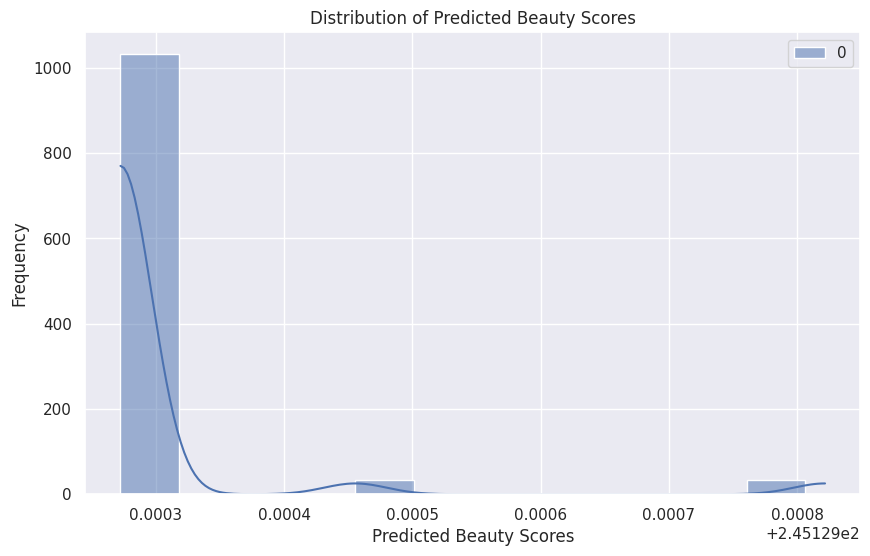

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置seaborn样式
sns.set()

# 创建直方图
plt.figure(figsize=(10, 6))
sns.histplot(val_predictions[0], kde=True)
plt.title("Distribution of Predicted Beauty Scores")
plt.xlabel("Predicted Beauty Scores")
plt.ylabel("Frequency")
plt.show()


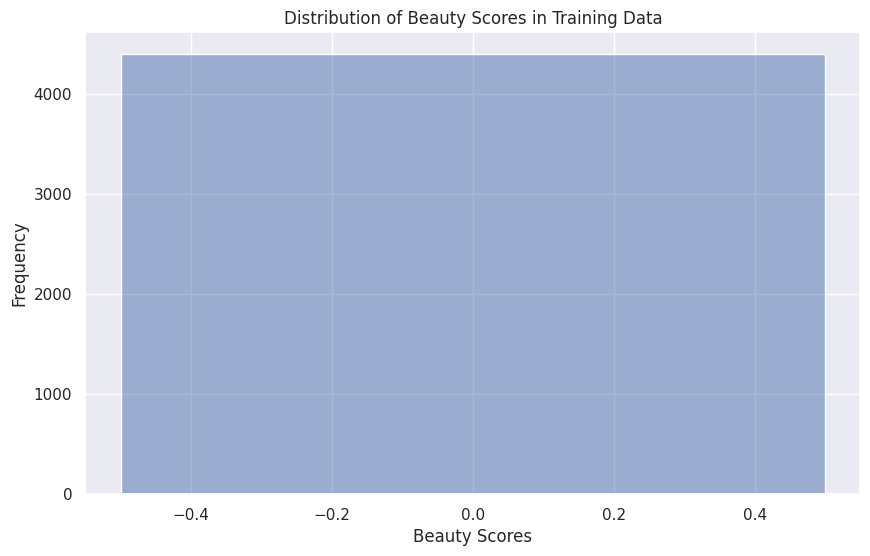

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置seaborn样式
sns.set()

# 创建直方图
plt.figure(figsize=(10, 6))
sns.histplot(y_train[:, 0], kde=True)
plt.title("Distribution of Beauty Scores in Training Data")
plt.xlabel("Beauty Scores")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import tensorflow as tf

def pearson_correlation(y_true, y_pred):
    return tf.contrib.metrics.streaming_pearson_correlation(y_pred, y_true)[1]

def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


In [ ]:
from tensorflow.keras.models import load_model

# Replace 'path/to/your/model.h5' with the actual path of your saved model
saved_model = load_model('/content/drive/MyDrive/DSA5204_FAP_Project/Codes/multi-stream/mult.h5')


In [ ]:
import pandas as pd

# 将历史记录转换为DataFrame
history_df = pd.DataFrame(history.history)

# 将DataFrame保存到CSV文件中
history_df.to_csv('training_history.csv', index=False)


In [ ]:
# 对于loss_weigths设置不同的函数 训练不同的模型
model.compile(optimizer='adam',
              loss={'average_beauty_output': 'mean_squared_error',
                    'average_gender_output': 'sparse_categorical_crossentropy',
                    'average_ethnicity_output': 'sparse_categorical_crossentropy'},
              metrics={'average_beauty_output': 'mean_squared_error',
                       'average_gender_output': 'accuracy',
                       'average_ethnicity_output': 'accuracy'},
              loss_weights={'average_beauty_output': 0.6,
                            'average_gender_output': 0.2,
                            'average_ethnicity_output': 0.2})


In [ ]:
history2 = model.fit({'face_input': X_train,
                     'eye_input': eye_train,
                     'mouth_input': mouth_train,
                     'nose_input': nose_train},
                    {'average_beauty_output': y_train[:, 0],
                     'average_gender_output': y_train[:, 1],
                     'average_ethnicity_output': y_train[:, 2]},
                    validation_data=({'face_input': X_val,
                                      'eye_input': eye_val,
                                      'mouth_input': mouth_val,
                                      'nose_input': nose_val},
                                     {'average_beauty_output': y_val[:, 0],
                                      'average_gender_output': y_val[:, 1],
                                      'average_ethnicity_output': y_val[:, 2]}),
                    batch_size=32,
                    epochs=20)